In [ ]:
# Initialize the random number generator
import random
random.seed(0)

import collections
import io
import math
import os
import random
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageFilter
import pandas as pd

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from keras.applications import VGG16, ResNet50
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Input
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import imutils
from imutils import paths
import os
import tarfile
import shutil
import tensorflow
import cv2
from glob import glob
import matplotlib.pyplot as plt  
from keras.utils import np_utils
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D, BatchNormalization
from tensorflow.keras.layers import Flatten, InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#including GPU to train for large data and deep model
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
  
print('Found GPU at: {}'.format(device_name))

NameError: ignored

## **Plant Seedling Dataset**

In [ ]:
from google.colab import drive #Mounting google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Data directory 
data_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Plant Seedling Classification Data/"

In [ ]:
#Extract data from the zip file
from zipfile import ZipFile
def zip_extract(data_dir,fname="Plant Seedling Classification Data"):
  if not os.path.exists(data_dir):
    with ZipFile(data_dir,'r') as zip:
      zip.extractall("/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/")
  else:
    print("Data Extracted Already")

In [ ]:
zip_extract(data_dir)

Data Extracted Already


In [ ]:
#train and test path
train_path=data_dir+str('/train/')
test_path=data_dir+str('/test/')

In [ ]:
#categories of data
plant_category=os.listdir(train_path)
plant_category

['Cleavers',
 'Maize',
 'Charlock',
 'Common wheat',
 'Loose Silky-bent',
 'Fat Hen',
 'Black-grass',
 'Shepherds Purse',
 'Common Chickweed',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
#Loading Train data
train_data=[]
if not train_data:
  for category_id, category in enumerate(plant_category):
    for file in os.listdir(os.path.join(train_path,category)):
      train_data.append(['train/{}/{}'.format(category,file),file,category_id,category])
  train_data = pd.DataFrame(train_data, columns=['file','filename', 'category_id', 'category'])
  train_data.shape
else:
  print("train data already extracted")

In [ ]:
#Loading Test data
test_data=[]
for file in os.listdir(test_path):
  test_data.append(['test/{}'.format(file),file])
test_data=pd.DataFrame(test_data, columns=['file','filename'])
train_data.shape

(4376, 4)

In [ ]:
test_data.head()

,file,filename
0,test/00c47e980.png,00c47e980.png
1,test/00d090cde.png,00d090cde.png
2,test/0ebf8f2f4.png,0ebf8f2f4.png
3,test/0751c0bbc.png,0751c0bbc.png
4,test/05341a8a6.png,05341a8a6.png


In [ ]:
# one hot encoding target variable
categorical_labels = np_utils.to_categorical(train_data.category_id,num_classes=12)

In [ ]:
img_rows=128
img_cols=128
num_channel=3

In [ ]:
#resizing the train image and save
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

i = 0 # initialisation

for f in tqdm(train_data.file):
     # f for format ,jpg
  train_img = cv2.imread(data_dir+'{}'.format(f))
  label = categorical_labels[i]
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols),interpolation=cv2.INTER_LINEAR) 
  x_feature.append(train_img_resize)
  y_feature.append(label)
  print(train_data.file[i])
  i += 1


  0%|          | 1/4376 [00:00<32:59,  2.21it/s]

train/Cleavers/1ef8ef4af.png


  0%|          | 2/4376 [00:00<27:40,  2.63it/s]

train/Cleavers/11c5eb5b6.png


  0%|          | 3/4376 [00:01<28:04,  2.60it/s]

train/Cleavers/0f557bb1a.png


  0%|          | 4/4376 [00:01<24:09,  3.02it/s]

train/Cleavers/09da4f213.png


  0%|          | 5/4376 [00:01<26:31,  2.75it/s]

train/Cleavers/1bc5bea6c.png


  0%|          | 6/4376 [00:02<28:30,  2.55it/s]

train/Cleavers/1e33a3dce.png


  0%|          | 7/4376 [00:02<31:21,  2.32it/s]

train/Cleavers/0a1e622bc.png


  0%|          | 8/4376 [00:02<26:56,  2.70it/s]

train/Cleavers/005b4a3e3.png


  0%|          | 9/4376 [00:03<31:15,  2.33it/s]

train/Cleavers/1b28a0668.png


  0%|          | 10/4376 [00:03<26:49,  2.71it/s]

train/Cleavers/20964b9b7.png


  0%|          | 11/4376 [00:04<27:47,  2.62it/s]

train/Cleavers/1c43f8251.png


  0%|          | 12/4376 [00:04<31:29,  2.31it/s]

train/Cleavers/1c801fa69.png


  0%|          | 13/4376 [00:04<28:39,  2.54it/s]

train/Cleavers/1896061bc.png


  0%|          | 14/4376 [00:05<28:11,  2.58it/s]

train/Cleavers/265a7f826.png


  0%|          | 16/4376 [00:06<25:05,  2.90it/s]

train/Cleavers/124f732d8.png
train/Cleavers/0b44c3a6c.png


  0%|          | 18/4376 [00:06<24:16,  2.99it/s]

train/Cleavers/2261906cf.png
train/Cleavers/0ac0f0a66.png


  0%|          | 19/4376 [00:07<24:59,  2.91it/s]

train/Cleavers/299190b08.png


  0%|          | 20/4376 [00:07<27:47,  2.61it/s]

train/Cleavers/16e0482dd.png


  0%|          | 21/4376 [00:07<27:28,  2.64it/s]

train/Cleavers/0bec204c7.png


  1%|          | 23/4376 [00:08<20:43,  3.50it/s]

train/Cleavers/153f94019.png
train/Cleavers/198653e67.png


  1%|          | 24/4376 [00:08<23:04,  3.14it/s]

train/Cleavers/2559137f2.png


  1%|          | 26/4376 [00:09<20:58,  3.46it/s]

train/Cleavers/01605ed73.png
train/Cleavers/00aa8d5a4.png


  1%|          | 28/4376 [00:09<16:52,  4.30it/s]

train/Cleavers/06f447848.png
train/Cleavers/11760cf9f.png


  1%|          | 29/4376 [00:10<21:04,  3.44it/s]

train/Cleavers/252585ad8.png


  1%|          | 30/4376 [00:10<20:43,  3.50it/s]

train/Cleavers/1a4fe0d36.png


  1%|          | 31/4376 [00:10<24:18,  2.98it/s]

train/Cleavers/0515bc601.png


  1%|          | 32/4376 [00:11<24:44,  2.93it/s]

train/Cleavers/15917308c.png


  1%|          | 34/4376 [00:11<19:47,  3.66it/s]

train/Cleavers/1526846f7.png
train/Cleavers/1e0caafd3.png


  1%|          | 35/4376 [00:11<20:57,  3.45it/s]

train/Cleavers/1af15c939.png


  1%|          | 37/4376 [00:12<20:46,  3.48it/s]

train/Cleavers/15f41649c.png
train/Cleavers/0dbfac958.png


  1%|          | 38/4376 [00:12<17:48,  4.06it/s]

train/Cleavers/184e9eb16.png


  1%|          | 39/4376 [00:13<20:27,  3.53it/s]

train/Cleavers/1ffcc6d2c.png


  1%|          | 40/4376 [00:13<21:27,  3.37it/s]

train/Cleavers/294d28c60.png


  1%|          | 41/4376 [00:14<31:36,  2.29it/s]

train/Cleavers/1e5041183.png


  1%|          | 42/4376 [00:14<31:29,  2.29it/s]

train/Cleavers/00df90ed6.png


  1%|          | 43/4376 [00:15<32:41,  2.21it/s]

train/Cleavers/2297085a0.png


  1%|          | 44/4376 [00:15<27:36,  2.62it/s]

train/Cleavers/1d0b4527d.png


  1%|          | 45/4376 [00:15<26:35,  2.71it/s]

train/Cleavers/0ac327873.png


  1%|          | 47/4376 [00:16<25:34,  2.82it/s]

train/Cleavers/0a33283c7.png
train/Cleavers/0756fd41e.png


  1%|          | 48/4376 [00:16<25:07,  2.87it/s]

train/Cleavers/07ac7bc07.png


  1%|          | 50/4376 [00:17<20:04,  3.59it/s]

train/Cleavers/0522ec53b.png
train/Cleavers/1e510607e.png


  1%|          | 51/4376 [00:17<23:19,  3.09it/s]

train/Cleavers/0bcf29af7.png


  1%|          | 52/4376 [00:17<22:17,  3.23it/s]

train/Cleavers/0920492fd.png


  1%|          | 53/4376 [00:18<20:23,  3.53it/s]

train/Cleavers/136d5af0b.png


  1%|          | 54/4376 [00:18<23:39,  3.04it/s]

train/Cleavers/10a18e8d1.png


  1%|▏         | 55/4376 [00:18<23:40,  3.04it/s]

train/Cleavers/0bdee2052.png


  1%|▏         | 56/4376 [00:19<24:56,  2.89it/s]

train/Cleavers/03bee43c0.png


  1%|▏         | 57/4376 [00:19<27:31,  2.62it/s]

train/Cleavers/42645d809.png


  1%|▏         | 58/4376 [00:20<29:27,  2.44it/s]

train/Cleavers/3516267fc.png


  1%|▏         | 59/4376 [00:20<29:56,  2.40it/s]

train/Cleavers/368707311.png


  1%|▏         | 60/4376 [00:20<28:17,  2.54it/s]

train/Cleavers/2baa68b6e.png


  1%|▏         | 61/4376 [00:21<28:05,  2.56it/s]

train/Cleavers/398cc8af9.png


  1%|▏         | 62/4376 [00:21<28:56,  2.48it/s]

train/Cleavers/4613b263e.png


  1%|▏         | 63/4376 [00:21<24:59,  2.88it/s]

train/Cleavers/3ccb22924.png


  1%|▏         | 64/4376 [00:22<25:11,  2.85it/s]

train/Cleavers/2e547d792.png


  1%|▏         | 65/4376 [00:22<28:50,  2.49it/s]

train/Cleavers/34f210a03.png


  2%|▏         | 66/4376 [00:23<27:11,  2.64it/s]

train/Cleavers/4449f17c5.png


  2%|▏         | 68/4376 [00:23<20:46,  3.46it/s]

train/Cleavers/413a96d3d.png
train/Cleavers/44047de36.png


  2%|▏         | 69/4376 [00:24<25:43,  2.79it/s]

train/Cleavers/33c1f167f.png


  2%|▏         | 70/4376 [00:24<22:38,  3.17it/s]

train/Cleavers/30418535b.png


  2%|▏         | 71/4376 [00:24<25:35,  2.80it/s]

train/Cleavers/41da62977.png


  2%|▏         | 72/4376 [00:25<23:01,  3.11it/s]

train/Cleavers/3f5b465c6.png


  2%|▏         | 73/4376 [00:25<25:13,  2.84it/s]

train/Cleavers/3fc47de35.png


  2%|▏         | 74/4376 [00:25<22:24,  3.20it/s]

train/Cleavers/44ef950c3.png


  2%|▏         | 75/4376 [00:25<22:52,  3.13it/s]

train/Cleavers/34648ed0b.png


  2%|▏         | 76/4376 [00:26<24:01,  2.98it/s]

train/Cleavers/2f38351b7.png


  2%|▏         | 77/4376 [00:26<24:15,  2.95it/s]

train/Cleavers/4444af894.png


  2%|▏         | 78/4376 [00:27<27:24,  2.61it/s]

train/Cleavers/3a4e50c40.png


  2%|▏         | 80/4376 [00:27<22:24,  3.19it/s]

train/Cleavers/33d0d3358.png
train/Cleavers/2e47c7233.png


  2%|▏         | 81/4376 [00:28<25:32,  2.80it/s]

train/Cleavers/37a3c8675.png


  2%|▏         | 82/4376 [00:28<29:46,  2.40it/s]

train/Cleavers/360f883f6.png


  2%|▏         | 84/4376 [00:29<22:01,  3.25it/s]

train/Cleavers/491286e9c.png
train/Cleavers/3232000bf.png


  2%|▏         | 85/4376 [00:29<22:51,  3.13it/s]

train/Cleavers/323f03521.png


  2%|▏         | 86/4376 [00:29<23:37,  3.03it/s]

train/Cleavers/3d9ea1649.png


  2%|▏         | 87/4376 [00:30<23:57,  2.98it/s]

train/Cleavers/4301f9c21.png


  2%|▏         | 89/4376 [00:30<18:40,  3.83it/s]

train/Cleavers/2c5c4d127.png
train/Cleavers/364a60044.png


  2%|▏         | 90/4376 [00:30<21:32,  3.32it/s]

train/Cleavers/4620b59f7.png


  2%|▏         | 92/4376 [00:31<19:36,  3.64it/s]

train/Cleavers/420f3654f.png
train/Cleavers/2e97487c4.png


  2%|▏         | 93/4376 [00:31<21:01,  3.40it/s]

train/Cleavers/3c2e76718.png


  2%|▏         | 95/4376 [00:32<22:01,  3.24it/s]

train/Cleavers/2a1d10e06.png
train/Cleavers/36e0d8ca6.png


  2%|▏         | 97/4376 [00:33<21:44,  3.28it/s]

train/Cleavers/6820df17f.png
train/Cleavers/68a3d6b27.png


  2%|▏         | 98/4376 [00:33<20:35,  3.46it/s]

train/Cleavers/750c447e0.png


  2%|▏         | 99/4376 [00:33<22:58,  3.10it/s]

train/Cleavers/581c0ecb3.png


  2%|▏         | 101/4376 [00:34<20:32,  3.47it/s]

train/Cleavers/796b61337.png
train/Cleavers/565a81e32.png


  2%|▏         | 103/4376 [00:35<23:11,  3.07it/s]

train/Cleavers/5abac7fbf.png
train/Cleavers/61287f47a.png


  2%|▏         | 104/4376 [00:35<21:25,  3.32it/s]

train/Cleavers/68a24bc47.png


  2%|▏         | 105/4376 [00:35<23:45,  3.00it/s]

train/Cleavers/655d1ffdd.png


  2%|▏         | 106/4376 [00:36<21:35,  3.30it/s]

train/Cleavers/4c7552a5c.png


  2%|▏         | 107/4376 [00:36<22:12,  3.20it/s]

train/Cleavers/591daf862.png


  2%|▏         | 108/4376 [00:36<22:22,  3.18it/s]

train/Cleavers/500a7b5b3.png


  2%|▏         | 109/4376 [00:37<27:36,  2.58it/s]

train/Cleavers/595d40614.png


  3%|▎         | 110/4376 [00:37<23:56,  2.97it/s]

train/Cleavers/495602403.png


  3%|▎         | 111/4376 [00:37<24:32,  2.90it/s]

train/Cleavers/67afc84df.png


  3%|▎         | 112/4376 [00:38<28:15,  2.52it/s]

train/Cleavers/5778852ed.png


  3%|▎         | 114/4376 [00:38<23:09,  3.07it/s]

train/Cleavers/58b68b1ea.png
train/Cleavers/4e01a3eab.png


  3%|▎         | 115/4376 [00:39<24:23,  2.91it/s]

train/Cleavers/7b9729321.png


  3%|▎         | 116/4376 [00:39<27:19,  2.60it/s]

train/Cleavers/6895ae7c9.png


  3%|▎         | 117/4376 [00:41<58:53,  1.21it/s]

train/Cleavers/666fa4f1a.png


  3%|▎         | 118/4376 [00:42<49:22,  1.44it/s]

train/Cleavers/77e4bee70.png


  3%|▎         | 119/4376 [00:42<42:29,  1.67it/s]

train/Cleavers/6e0fa9bcc.png


  3%|▎         | 120/4376 [00:42<37:10,  1.91it/s]

train/Cleavers/58be08e22.png


  3%|▎         | 121/4376 [00:43<36:02,  1.97it/s]

train/Cleavers/794b914bf.png


  3%|▎         | 122/4376 [00:43<32:37,  2.17it/s]

train/Cleavers/5d2b820a9.png


  3%|▎         | 123/4376 [00:43<27:19,  2.59it/s]

train/Cleavers/6bcc0c252.png


  3%|▎         | 124/4376 [00:44<27:20,  2.59it/s]

train/Cleavers/6c10be2a7.png


  3%|▎         | 125/4376 [00:44<27:17,  2.60it/s]

train/Cleavers/5543b3415.png


  3%|▎         | 126/4376 [00:45<28:16,  2.51it/s]

train/Cleavers/5b5a7214a.png


  3%|▎         | 127/4376 [00:45<30:15,  2.34it/s]

train/Cleavers/5aaaf0ea0.png


  3%|▎         | 128/4376 [00:45<28:43,  2.46it/s]

train/Cleavers/6cd9902c0.png


  3%|▎         | 129/4376 [00:46<30:59,  2.28it/s]

train/Cleavers/7b257e388.png


  3%|▎         | 130/4376 [00:46<31:45,  2.23it/s]

train/Cleavers/6acdb8e68.png


  3%|▎         | 131/4376 [00:47<31:47,  2.23it/s]

train/Cleavers/5439f9f36.png


  3%|▎         | 133/4376 [00:47<23:59,  2.95it/s]

train/Cleavers/7a9efaf6c.png
train/Cleavers/4b9125e90.png


  3%|▎         | 135/4376 [00:48<17:40,  4.00it/s]

train/Cleavers/609c74407.png
train/Cleavers/5010487f2.png


  3%|▎         | 136/4376 [00:48<23:41,  2.98it/s]

train/Cleavers/75371625f.png


  3%|▎         | 138/4376 [00:49<22:57,  3.08it/s]

train/Cleavers/78dde1704.png
train/Cleavers/6cead585f.png


  3%|▎         | 140/4376 [00:49<17:30,  4.03it/s]

train/Cleavers/502eee444.png
train/Cleavers/7cef265e7.png


  3%|▎         | 141/4376 [00:50<24:53,  2.84it/s]

train/Cleavers/491b8502a.png


  3%|▎         | 142/4376 [00:50<27:22,  2.58it/s]

train/Cleavers/6a4ef17c2.png


  3%|▎         | 143/4376 [00:51<23:35,  2.99it/s]

train/Cleavers/c3f4b326a.png


  3%|▎         | 144/4376 [00:51<26:07,  2.70it/s]

train/Cleavers/c5f57467a.png


  3%|▎         | 145/4376 [00:52<30:09,  2.34it/s]

train/Cleavers/9b35827fa.png


  3%|▎         | 146/4376 [00:52<30:22,  2.32it/s]

train/Cleavers/a562c2b14.png


  3%|▎         | 148/4376 [00:53<25:01,  2.82it/s]

train/Cleavers/868da1d55.png
train/Cleavers/9e250b25f.png


  3%|▎         | 149/4376 [00:53<21:13,  3.32it/s]

train/Cleavers/c30be2849.png


  3%|▎         | 150/4376 [00:53<21:41,  3.25it/s]

train/Cleavers/b0a1ac210.png


  3%|▎         | 151/4376 [00:54<25:08,  2.80it/s]

train/Cleavers/8035a175e.png


  3%|▎         | 152/4376 [00:54<24:53,  2.83it/s]

train/Cleavers/8a112bfb4.png


  3%|▎         | 153/4376 [00:54<27:36,  2.55it/s]

train/Cleavers/7f3369186.png


  4%|▎         | 155/4376 [00:55<20:09,  3.49it/s]

train/Cleavers/94f82e916.png
train/Cleavers/9b941ac1b.png


  4%|▎         | 156/4376 [00:55<18:35,  3.78it/s]

train/Cleavers/a4cfc9036.png


  4%|▎         | 158/4376 [00:55<16:25,  4.28it/s]

train/Cleavers/c4dfaf0ee.png
train/Cleavers/c33c988c1.png


  4%|▎         | 159/4376 [00:56<15:14,  4.61it/s]

train/Cleavers/863b1dbd4.png


  4%|▎         | 160/4376 [00:56<20:42,  3.39it/s]

train/Cleavers/853b1a32e.png


  4%|▎         | 161/4376 [00:56<19:51,  3.54it/s]

train/Cleavers/bd2fa36aa.png


  4%|▎         | 162/4376 [00:57<26:41,  2.63it/s]

train/Cleavers/a3b9a33dd.png


  4%|▎         | 163/4376 [00:57<25:47,  2.72it/s]

train/Cleavers/95a10dd51.png


  4%|▎         | 164/4376 [00:58<27:11,  2.58it/s]

train/Cleavers/a714fbc63.png


  4%|▍         | 165/4376 [00:58<27:11,  2.58it/s]

train/Cleavers/a96e704e7.png


  4%|▍         | 166/4376 [00:59<29:29,  2.38it/s]

train/Cleavers/9214c2997.png


  4%|▍         | 168/4376 [00:59<21:16,  3.30it/s]

train/Cleavers/a9b4417a7.png
train/Cleavers/c336c8da6.png


  4%|▍         | 169/4376 [00:59<23:45,  2.95it/s]

train/Cleavers/b022e53c3.png


  4%|▍         | 170/4376 [01:00<27:37,  2.54it/s]

train/Cleavers/8df9991b8.png


  4%|▍         | 171/4376 [01:00<24:04,  2.91it/s]

train/Cleavers/bc66f9116.png


  4%|▍         | 172/4376 [01:01<26:36,  2.63it/s]

train/Cleavers/c7b4ce2e3.png


  4%|▍         | 174/4376 [01:01<21:37,  3.24it/s]

train/Cleavers/98937154f.png
train/Cleavers/c806aa45d.png


  4%|▍         | 175/4376 [01:01<22:02,  3.18it/s]

train/Cleavers/85b23f3e6.png


  4%|▍         | 176/4376 [01:02<25:57,  2.70it/s]

train/Cleavers/a5b126385.png


  4%|▍         | 177/4376 [01:02<27:38,  2.53it/s]

train/Cleavers/9b8ed8471.png


  4%|▍         | 178/4376 [01:03<26:16,  2.66it/s]

train/Cleavers/a07efb1e0.png


  4%|▍         | 179/4376 [01:03<28:31,  2.45it/s]

train/Cleavers/b6220c08e.png


  4%|▍         | 180/4376 [01:04<28:54,  2.42it/s]

train/Cleavers/8aa470d03.png


  4%|▍         | 181/4376 [01:04<30:58,  2.26it/s]

train/Cleavers/bd4f2a692.png


  4%|▍         | 183/4376 [01:05<24:45,  2.82it/s]

train/Cleavers/83abc465e.png
train/Cleavers/952540220.png


  4%|▍         | 184/4376 [01:05<21:46,  3.21it/s]

train/Cleavers/7e501d74c.png


  4%|▍         | 185/4376 [01:05<23:00,  3.04it/s]

train/Cleavers/899877fe1.png


  4%|▍         | 187/4376 [01:06<19:12,  3.63it/s]

train/Cleavers/8ee3f0b6f.png
train/Cleavers/8baf67453.png


  4%|▍         | 188/4376 [01:06<21:55,  3.18it/s]

train/Cleavers/ba79cdbcb.png


  4%|▍         | 189/4376 [01:07<22:47,  3.06it/s]

train/Cleavers/c0c1567ab.png


  4%|▍         | 190/4376 [01:07<25:01,  2.79it/s]

train/Cleavers/8cc66b39e.png


  4%|▍         | 191/4376 [01:07<22:26,  3.11it/s]

train/Cleavers/be41914d8.png


  4%|▍         | 192/4376 [01:08<23:02,  3.03it/s]

train/Cleavers/bd6681c02.png


  4%|▍         | 193/4376 [01:08<25:59,  2.68it/s]

train/Cleavers/c9576e39e.png


  4%|▍         | 195/4376 [01:08<19:12,  3.63it/s]

train/Cleavers/a06109e80.png
train/Cleavers/7e8212b65.png


  4%|▍         | 196/4376 [01:09<20:27,  3.41it/s]

train/Cleavers/7e9b71110.png


  5%|▍         | 197/4376 [01:09<25:00,  2.79it/s]

train/Cleavers/8c26d810d.png


  5%|▍         | 198/4376 [01:10<24:50,  2.80it/s]

train/Cleavers/c6c56d45c.png


  5%|▍         | 199/4376 [01:10<27:05,  2.57it/s]

train/Cleavers/b07aeb162.png


  5%|▍         | 200/4376 [01:10<26:58,  2.58it/s]

train/Cleavers/871ec43cc.png


  5%|▍         | 202/4376 [01:11<20:13,  3.44it/s]

train/Cleavers/bf07fe75d.png
train/Cleavers/9d763f383.png


  5%|▍         | 203/4376 [01:11<24:05,  2.89it/s]

train/Cleavers/8c73a6f46.png


  5%|▍         | 204/4376 [01:12<25:04,  2.77it/s]

train/Cleavers/8c0e41a93.png


  5%|▍         | 206/4376 [01:12<24:28,  2.84it/s]

train/Cleavers/9c337ab7a.png
train/Cleavers/c0784c573.png


  5%|▍         | 207/4376 [01:13<25:10,  2.76it/s]

train/Cleavers/a20cd3ec2.png


  5%|▍         | 208/4376 [01:13<26:54,  2.58it/s]

train/Cleavers/82a9322ea.png


  5%|▍         | 209/4376 [01:14<28:43,  2.42it/s]

train/Cleavers/9e966d9db.png


  5%|▍         | 210/4376 [01:14<26:50,  2.59it/s]

train/Cleavers/7da3bda82.png


  5%|▍         | 211/4376 [01:15<28:13,  2.46it/s]

train/Cleavers/944e50e37.png


  5%|▍         | 213/4376 [01:15<24:38,  2.81it/s]

train/Cleavers/c5f01dc34.png
train/Cleavers/c3b79748e.png


  5%|▍         | 214/4376 [01:16<23:31,  2.95it/s]

train/Cleavers/a3085c4c8.png


  5%|▍         | 215/4376 [01:16<25:12,  2.75it/s]

train/Cleavers/becdd9442.png


  5%|▍         | 217/4376 [01:17<22:06,  3.14it/s]

train/Cleavers/a51e6f301.png
train/Cleavers/9e899d1ee.png


  5%|▌         | 219/4376 [01:17<17:49,  3.89it/s]

train/Cleavers/88218400c.png
train/Cleavers/a26d6a898.png


  5%|▌         | 220/4376 [01:17<19:58,  3.47it/s]

train/Cleavers/c4a974463.png


  5%|▌         | 221/4376 [01:18<19:35,  3.54it/s]

train/Cleavers/98ad03ef1.png


  5%|▌         | 222/4376 [01:18<21:02,  3.29it/s]

train/Cleavers/abb763143.png


  5%|▌         | 224/4376 [01:18<18:40,  3.70it/s]

train/Cleavers/8cf59e291.png
train/Cleavers/7da015f0a.png


  5%|▌         | 225/4376 [01:19<18:55,  3.66it/s]

train/Cleavers/94fa687c1.png


  5%|▌         | 226/4376 [01:19<19:49,  3.49it/s]

train/Cleavers/b15ca8e4a.png


  5%|▌         | 227/4376 [01:19<21:06,  3.27it/s]

train/Cleavers/aa2c378e7.png


  5%|▌         | 228/4376 [01:20<22:35,  3.06it/s]

train/Cleavers/857304342.png


  5%|▌         | 229/4376 [01:20<24:11,  2.86it/s]

train/Cleavers/7fa1a92ca.png


  5%|▌         | 230/4376 [01:20<21:15,  3.25it/s]

train/Cleavers/99c858d54.png


  5%|▌         | 231/4376 [01:21<22:19,  3.10it/s]

train/Cleavers/e96ebe7f6.png


  5%|▌         | 232/4376 [01:21<21:54,  3.15it/s]

train/Cleavers/f607ea0bf.png


  5%|▌         | 233/4376 [01:21<20:01,  3.45it/s]

train/Cleavers/da38229c7.png


  5%|▌         | 234/4376 [01:22<22:46,  3.03it/s]

train/Cleavers/ead01d4a3.png


  5%|▌         | 235/4376 [01:22<23:52,  2.89it/s]

train/Cleavers/cc8f45811.png


  5%|▌         | 236/4376 [01:22<24:48,  2.78it/s]

train/Cleavers/d4803dca4.png


  5%|▌         | 237/4376 [01:23<27:00,  2.55it/s]

train/Cleavers/ebe7c4208.png


  5%|▌         | 238/4376 [01:23<24:35,  2.80it/s]

train/Cleavers/cb3f058b9.png


  5%|▌         | 239/4376 [01:23<21:52,  3.15it/s]

train/Cleavers/dbb42229b.png


  5%|▌         | 240/4376 [01:24<22:05,  3.12it/s]

train/Cleavers/ed3e7e5a7.png


  6%|▌         | 241/4376 [01:24<19:52,  3.47it/s]

train/Cleavers/fc26df0cf.png


  6%|▌         | 242/4376 [01:24<21:49,  3.16it/s]

train/Cleavers/d20d68489.png


  6%|▌         | 243/4376 [01:25<23:09,  2.98it/s]

train/Cleavers/db735ff97.png


  6%|▌         | 244/4376 [01:25<25:18,  2.72it/s]

train/Cleavers/e2d1c8a71.png


  6%|▌         | 245/4376 [01:25<23:36,  2.92it/s]

train/Cleavers/c9e078b54.png


  6%|▌         | 246/4376 [01:26<23:47,  2.89it/s]

train/Cleavers/ee5cc2c19.png


  6%|▌         | 247/4376 [01:26<25:08,  2.74it/s]

train/Cleavers/f2d50dae3.png


  6%|▌         | 248/4376 [01:27<28:09,  2.44it/s]

train/Cleavers/ea343a58f.png


  6%|▌         | 249/4376 [01:27<24:28,  2.81it/s]

train/Cleavers/d8f23e930.png


  6%|▌         | 250/4376 [01:27<24:17,  2.83it/s]

train/Cleavers/d90adada5.png


  6%|▌         | 251/4376 [01:28<26:30,  2.59it/s]

train/Cleavers/eb2b0d2f6.png


  6%|▌         | 252/4376 [01:28<30:21,  2.26it/s]

train/Cleavers/d17e2cfa1.png


  6%|▌         | 253/4376 [01:29<29:01,  2.37it/s]

train/Cleavers/fd2400d5f.png


  6%|▌         | 254/4376 [01:29<31:40,  2.17it/s]

train/Cleavers/cf285e97d.png


  6%|▌         | 255/4376 [01:30<30:53,  2.22it/s]

train/Cleavers/f1810d3fa.png


  6%|▌         | 257/4376 [01:30<24:14,  2.83it/s]

train/Cleavers/d9739baa6.png
train/Cleavers/ef4a36963.png


  6%|▌         | 258/4376 [01:30<20:45,  3.31it/s]

train/Cleavers/c977c4903.png


  6%|▌         | 259/4376 [01:31<19:50,  3.46it/s]

train/Cleavers/d3a7492ff.png


  6%|▌         | 260/4376 [01:31<23:29,  2.92it/s]

train/Cleavers/e63ef7169.png


  6%|▌         | 262/4376 [01:32<21:43,  3.16it/s]

train/Cleavers/f4248cc7f.png
train/Cleavers/ee1cd35fa.png


  6%|▌         | 263/4376 [01:32<20:11,  3.39it/s]

train/Cleavers/d99ddf94b.png


  6%|▌         | 264/4376 [01:32<23:01,  2.98it/s]

train/Cleavers/e8398d543.png


  6%|▌         | 265/4376 [01:33<20:15,  3.38it/s]

train/Cleavers/d81f07b0b.png


  6%|▌         | 266/4376 [01:33<18:34,  3.69it/s]

train/Cleavers/f5608b615.png


  6%|▌         | 268/4376 [01:34<19:07,  3.58it/s]

train/Cleavers/c9a021a1a.png
train/Cleavers/e923f523a.png


  6%|▌         | 269/4376 [01:34<18:57,  3.61it/s]

train/Cleavers/db4d4f5a7.png


  6%|▌         | 270/4376 [01:34<19:46,  3.46it/s]

train/Cleavers/f5a58ab42.png


  6%|▌         | 271/4376 [01:34<20:35,  3.32it/s]

train/Cleavers/d55caa949.png


  6%|▌         | 272/4376 [01:35<20:02,  3.41it/s]

train/Cleavers/cd17d9cd6.png


  6%|▌         | 273/4376 [01:35<21:28,  3.18it/s]

train/Cleavers/fd2683ed1.png


  6%|▋         | 274/4376 [01:35<22:15,  3.07it/s]

train/Cleavers/e39dd6305.png


  6%|▋         | 275/4376 [01:36<24:10,  2.83it/s]

train/Cleavers/f60e82a03.png


  6%|▋         | 277/4376 [01:36<21:08,  3.23it/s]

train/Cleavers/f185a1d75.png
train/Cleavers/fd5074d77.png


  6%|▋         | 279/4376 [01:37<20:35,  3.32it/s]

train/Cleavers/eed8f31b8.png
train/Cleavers/d96c1e585.png


  6%|▋         | 281/4376 [01:38<18:41,  3.65it/s]

train/Cleavers/d4552e3f6.png
train/Cleavers/d8597aa6a.png


  6%|▋         | 282/4376 [01:38<20:18,  3.36it/s]

train/Cleavers/fab297bc9.png


  6%|▋         | 283/4376 [01:38<22:07,  3.08it/s]

train/Cleavers/cc2ffb750.png


  6%|▋         | 284/4376 [01:39<22:36,  3.02it/s]

train/Cleavers/df341f2d4.png


  7%|▋         | 286/4376 [01:39<19:48,  3.44it/s]

train/Cleavers/feecf1be6.png
train/Maize/18b6755a1.png


  7%|▋         | 288/4376 [01:40<18:17,  3.72it/s]

train/Maize/16511dd22.png
train/Maize/269a34bb9.png


  7%|▋         | 289/4376 [01:40<16:56,  4.02it/s]

train/Maize/1898398b8.png


  7%|▋         | 290/4376 [01:40<16:10,  4.21it/s]

train/Maize/23775190c.png


  7%|▋         | 291/4376 [01:41<21:19,  3.19it/s]

train/Maize/11dc03905.png


  7%|▋         | 293/4376 [01:41<17:32,  3.88it/s]

train/Maize/0419f5bbc.png
train/Maize/0184ec53f.png


  7%|▋         | 294/4376 [01:41<20:07,  3.38it/s]

train/Maize/1b1ab91eb.png


  7%|▋         | 296/4376 [01:42<21:46,  3.12it/s]

train/Maize/1d21b25f9.png
train/Maize/23a60f63f.png


  7%|▋         | 297/4376 [01:43<23:53,  2.85it/s]

train/Maize/11323514a.png


  7%|▋         | 298/4376 [01:43<24:52,  2.73it/s]

train/Maize/1d8e6686f.png


  7%|▋         | 299/4376 [01:43<24:51,  2.73it/s]

train/Maize/25c87a3cc.png


  7%|▋         | 301/4376 [01:44<21:28,  3.16it/s]

train/Maize/270e121c0.png
train/Maize/27a1dbcdc.png


  7%|▋         | 303/4376 [01:44<19:03,  3.56it/s]

train/Maize/06e1ee6e1.png
train/Maize/051ea51d0.png


  7%|▋         | 304/4376 [01:45<17:44,  3.82it/s]

train/Maize/0f16cf10a.png


  7%|▋         | 305/4376 [01:45<20:43,  3.27it/s]

train/Maize/12025fcc1.png


  7%|▋         | 306/4376 [01:45<18:56,  3.58it/s]

train/Maize/16e38d4af.png


  7%|▋         | 308/4376 [01:46<16:19,  4.15it/s]

train/Maize/0150b5b7e.png
train/Maize/21acedc9b.png


  7%|▋         | 309/4376 [01:46<14:45,  4.59it/s]

train/Maize/01642cae8.png


  7%|▋         | 311/4376 [01:47<17:01,  3.98it/s]

train/Maize/115808876.png
train/Maize/2187ec5fa.png


  7%|▋         | 312/4376 [01:47<15:21,  4.41it/s]

train/Maize/194d34152.png


  7%|▋         | 314/4376 [01:47<15:44,  4.30it/s]

train/Maize/266211c3c.png
train/Maize/18a235096.png


  7%|▋         | 315/4376 [01:47<15:00,  4.51it/s]

train/Maize/0086c28b2.png


  7%|▋         | 316/4376 [01:48<21:59,  3.08it/s]

train/Maize/0bdaf1d8f.png


  7%|▋         | 317/4376 [01:48<19:37,  3.45it/s]

train/Maize/19f880311.png


  7%|▋         | 318/4376 [01:49<23:46,  2.84it/s]

train/Maize/5622305e8.png


  7%|▋         | 319/4376 [01:49<21:00,  3.22it/s]

train/Maize/4ef677ce4.png


  7%|▋         | 320/4376 [01:49<18:59,  3.56it/s]

train/Maize/55083690a.png


  7%|▋         | 322/4376 [01:50<19:45,  3.42it/s]

train/Maize/44d562432.png
train/Maize/365ff4533.png


  7%|▋         | 323/4376 [01:50<17:34,  3.84it/s]

train/Maize/3ef465952.png


  7%|▋         | 325/4376 [01:51<18:49,  3.59it/s]

train/Maize/280c7b4d2.png
train/Maize/2b7549816.png


  7%|▋         | 326/4376 [01:51<17:02,  3.96it/s]

train/Maize/49e58b605.png


  7%|▋         | 327/4376 [01:51<19:16,  3.50it/s]

train/Maize/3a6d4d007.png


  7%|▋         | 328/4376 [01:51<17:49,  3.78it/s]

train/Maize/4f6b0dc39.png


  8%|▊         | 329/4376 [01:52<18:26,  3.66it/s]

train/Maize/4b5aa18ad.png


  8%|▊         | 331/4376 [01:52<17:12,  3.92it/s]

train/Maize/2d8376136.png
train/Maize/2b968a9e0.png


  8%|▊         | 332/4376 [01:52<16:11,  4.16it/s]

train/Maize/2bc5905e2.png


  8%|▊         | 334/4376 [01:53<14:45,  4.56it/s]

train/Maize/5885bb41b.png
train/Maize/2d9adb800.png


  8%|▊         | 336/4376 [01:53<12:15,  5.49it/s]

train/Maize/388317d6c.png
train/Maize/3213aec10.png


  8%|▊         | 338/4376 [01:54<14:01,  4.80it/s]

train/Maize/34c035273.png
train/Maize/50c80a5e4.png


  8%|▊         | 340/4376 [01:54<13:21,  5.04it/s]

train/Maize/4ae8bc1c6.png
train/Maize/3ac5a3def.png


  8%|▊         | 341/4376 [01:54<13:28,  4.99it/s]

train/Maize/30d126c24.png


  8%|▊         | 342/4376 [01:55<20:14,  3.32it/s]

train/Maize/5453bff0b.png


  8%|▊         | 343/4376 [01:55<18:15,  3.68it/s]

train/Maize/5675e608c.png


  8%|▊         | 344/4376 [01:55<23:43,  2.83it/s]

train/Maize/4ba437481.png


  8%|▊         | 346/4376 [01:56<25:33,  2.63it/s]

train/Maize/37156c661.png
train/Maize/5363a9f84.png


  8%|▊         | 347/4376 [01:57<22:22,  3.00it/s]

train/Maize/489da47a5.png


  8%|▊         | 348/4376 [01:57<23:46,  2.82it/s]

train/Maize/44a9a599d.png


  8%|▊         | 350/4376 [01:58<20:38,  3.25it/s]

train/Maize/5150527da.png
train/Maize/3cf92e356.png


  8%|▊         | 352/4376 [01:58<16:28,  4.07it/s]

train/Maize/59f972ef4.png
train/Maize/4a1929689.png


  8%|▊         | 353/4376 [01:58<15:57,  4.20it/s]

train/Maize/3cb4f2c65.png


  8%|▊         | 354/4376 [01:58<18:49,  3.56it/s]

train/Maize/5251d7bbf.png


  8%|▊         | 355/4376 [01:59<17:28,  3.83it/s]

train/Maize/6e9ff31e7.png


  8%|▊         | 356/4376 [01:59<18:45,  3.57it/s]

train/Maize/648ddc558.png


  8%|▊         | 357/4376 [01:59<18:00,  3.72it/s]

train/Maize/5c826024a.png


  8%|▊         | 358/4376 [02:00<22:00,  3.04it/s]

train/Maize/7736aedff.png


  8%|▊         | 359/4376 [02:00<29:37,  2.26it/s]

train/Maize/84ba8107f.png


  8%|▊         | 360/4376 [02:01<27:44,  2.41it/s]

train/Maize/70b85477d.png


  8%|▊         | 361/4376 [02:01<26:05,  2.56it/s]

train/Maize/66a87d834.png


  8%|▊         | 363/4376 [02:02<21:48,  3.07it/s]

train/Maize/85ae913c3.png
train/Maize/8c70f6c91.png


  8%|▊         | 364/4376 [02:02<24:11,  2.76it/s]

train/Maize/7389aea72.png


  8%|▊         | 366/4376 [02:03<19:39,  3.40it/s]

train/Maize/798852825.png
train/Maize/65b4ebc41.png


  8%|▊         | 367/4376 [02:03<17:06,  3.91it/s]

train/Maize/7446f241c.png


  8%|▊         | 369/4376 [02:03<14:53,  4.49it/s]

train/Maize/5d641d627.png
train/Maize/5dfa39111.png


  8%|▊         | 371/4376 [02:04<18:11,  3.67it/s]

train/Maize/606d5c83f.png
train/Maize/85c25b5a2.png


  9%|▊         | 372/4376 [02:04<16:11,  4.12it/s]

train/Maize/822d1163b.png


  9%|▊         | 373/4376 [02:04<15:36,  4.27it/s]

train/Maize/5b94fab70.png


  9%|▊         | 374/4376 [02:05<22:27,  2.97it/s]

train/Maize/6d54412c3.png


  9%|▊         | 375/4376 [02:05<23:05,  2.89it/s]

train/Maize/66e90b455.png


  9%|▊         | 377/4376 [02:06<21:09,  3.15it/s]

train/Maize/665b921f2.png
train/Maize/87a3254c9.png


  9%|▊         | 378/4376 [02:06<18:28,  3.61it/s]

train/Maize/67c3663a8.png


  9%|▊         | 379/4376 [02:07<23:50,  2.79it/s]

train/Maize/62a1614a2.png


  9%|▊         | 380/4376 [02:07<26:29,  2.51it/s]

train/Maize/6219b36db.png


  9%|▊         | 381/4376 [02:07<25:29,  2.61it/s]

train/Maize/8c6fba454.png


  9%|▊         | 382/4376 [02:08<26:02,  2.56it/s]

train/Maize/5fdb1dccf.png


  9%|▉         | 384/4376 [02:09<24:39,  2.70it/s]

train/Maize/64a6f6f65.png
train/Maize/8bfe6860d.png


  9%|▉         | 385/4376 [02:09<25:35,  2.60it/s]

train/Maize/5d6e3b183.png


  9%|▉         | 386/4376 [02:09<22:04,  3.01it/s]

train/Maize/87bbc41eb.png


  9%|▉         | 387/4376 [02:10<23:20,  2.85it/s]

train/Maize/749646c56.png


  9%|▉         | 388/4376 [02:10<21:50,  3.04it/s]

train/Maize/69f06fcbc.png


  9%|▉         | 390/4376 [02:10<19:24,  3.42it/s]

train/Maize/642e055ee.png
train/Maize/814e74c21.png


  9%|▉         | 391/4376 [02:11<23:47,  2.79it/s]

train/Maize/8a257f6f6.png


  9%|▉         | 392/4376 [02:11<22:06,  3.00it/s]

train/Maize/649b7af36.png


  9%|▉         | 394/4376 [02:12<20:54,  3.17it/s]

train/Maize/bf22827fb.png
train/Maize/988113525.png


  9%|▉         | 395/4376 [02:12<23:26,  2.83it/s]

train/Maize/b72a19852.png


  9%|▉         | 397/4376 [02:13<18:33,  3.57it/s]

train/Maize/af014d45e.png
train/Maize/bb9f796ce.png


  9%|▉         | 398/4376 [02:13<20:08,  3.29it/s]

train/Maize/bede27c87.png


  9%|▉         | 399/4376 [02:13<18:17,  3.62it/s]

train/Maize/abadd72ab.png


  9%|▉         | 400/4376 [02:14<23:49,  2.78it/s]

train/Maize/a30702538.png


  9%|▉         | 401/4376 [02:14<26:58,  2.46it/s]

train/Maize/c05a8d7e1.png


  9%|▉         | 403/4376 [02:15<20:11,  3.28it/s]

train/Maize/a4e71c6c3.png
train/Maize/a37e7b7db.png


  9%|▉         | 404/4376 [02:15<21:50,  3.03it/s]

train/Maize/b8b2658d9.png


  9%|▉         | 406/4376 [02:16<18:17,  3.62it/s]

train/Maize/9977e50bc.png
train/Maize/b9ffd31a7.png


  9%|▉         | 407/4376 [02:16<19:47,  3.34it/s]

train/Maize/9d1e59e00.png


  9%|▉         | 409/4376 [02:17<18:29,  3.58it/s]

train/Maize/8d2004e7a.png
train/Maize/8cd93b279.png


  9%|▉         | 410/4376 [02:17<21:25,  3.09it/s]

train/Maize/a353bdbd9.png


  9%|▉         | 411/4376 [02:17<21:42,  3.04it/s]

train/Maize/905f9f385.png


  9%|▉         | 412/4376 [02:18<21:48,  3.03it/s]

train/Maize/919e154c2.png


  9%|▉         | 413/4376 [02:18<19:29,  3.39it/s]

train/Maize/a76555ad2.png


  9%|▉         | 414/4376 [02:18<20:53,  3.16it/s]

train/Maize/ac3de5925.png


  9%|▉         | 415/4376 [02:19<23:29,  2.81it/s]

train/Maize/92c06eaca.png


 10%|▉         | 417/4376 [02:19<20:27,  3.23it/s]

train/Maize/a6e44df4f.png
train/Maize/9fc63a912.png


 10%|▉         | 418/4376 [02:20<25:27,  2.59it/s]

train/Maize/96d476790.png


 10%|▉         | 419/4376 [02:20<24:52,  2.65it/s]

train/Maize/907817b91.png


 10%|▉         | 421/4376 [02:21<20:32,  3.21it/s]

train/Maize/a47bdd663.png
train/Maize/9d3514473.png


 10%|▉         | 423/4376 [02:21<15:39,  4.21it/s]

train/Maize/b273efc22.png
train/Maize/982130e94.png


 10%|▉         | 424/4376 [02:21<15:58,  4.13it/s]

train/Maize/d8ae9a82b.png


 10%|▉         | 426/4376 [02:22<15:59,  4.12it/s]

train/Maize/e45f92ca7.png
train/Maize/cf7b09a39.png


 10%|▉         | 427/4376 [02:22<19:46,  3.33it/s]

train/Maize/cdcb0f735.png


 10%|▉         | 428/4376 [02:23<23:09,  2.84it/s]

train/Maize/eefba9376.png


 10%|▉         | 429/4376 [02:23<22:35,  2.91it/s]

train/Maize/e6d8ba41c.png


 10%|▉         | 430/4376 [02:24<25:27,  2.58it/s]

train/Maize/fbed08a0e.png


 10%|▉         | 431/4376 [02:24<22:16,  2.95it/s]

train/Maize/fdebe4158.png


 10%|▉         | 432/4376 [02:24<22:02,  2.98it/s]

train/Maize/fc68c0525.png


 10%|▉         | 433/4376 [02:24<21:21,  3.08it/s]

train/Maize/cd2b68ba2.png


 10%|▉         | 434/4376 [02:25<22:04,  2.98it/s]

train/Maize/ff4b55219.png


 10%|▉         | 435/4376 [02:25<23:04,  2.85it/s]

train/Maize/f5231714b.png


 10%|▉         | 437/4376 [02:26<17:42,  3.71it/s]

train/Maize/f9ceba607.png
train/Maize/fb6328acb.png


 10%|█         | 438/4376 [02:26<15:46,  4.16it/s]

train/Maize/d3cf21397.png


 10%|█         | 439/4376 [02:26<18:26,  3.56it/s]

train/Maize/c08835318.png


 10%|█         | 440/4376 [02:27<21:08,  3.10it/s]

train/Maize/c5bcc4cb3.png


 10%|█         | 441/4376 [02:27<19:08,  3.43it/s]

train/Maize/fb6bcaf52.png


 10%|█         | 443/4376 [02:27<17:54,  3.66it/s]

train/Maize/e30accd2f.png
train/Maize/fdde1498f.png


 10%|█         | 444/4376 [02:28<18:06,  3.62it/s]

train/Maize/c6fabfb59.png


 10%|█         | 445/4376 [02:28<22:56,  2.86it/s]

train/Maize/e17f5daf0.png


 10%|█         | 446/4376 [02:29<32:17,  2.03it/s]

train/Maize/edd80f8a8.png


 10%|█         | 447/4376 [02:29<29:47,  2.20it/s]

train/Maize/f4dd93492.png


 10%|█         | 448/4376 [02:30<25:04,  2.61it/s]

train/Maize/fd1ef540c.png


 10%|█         | 449/4376 [02:30<21:59,  2.98it/s]

train/Maize/f135a739f.png


 10%|█         | 450/4376 [02:30<23:22,  2.80it/s]

train/Maize/f2c22a1bf.png


 10%|█         | 451/4376 [02:31<25:05,  2.61it/s]

train/Maize/dc7a7bdeb.png


 10%|█         | 452/4376 [02:31<21:42,  3.01it/s]

train/Maize/ce76cb1e5.png


 10%|█         | 453/4376 [02:31<23:53,  2.74it/s]

train/Maize/c6dc512e9.png


 10%|█         | 454/4376 [02:33<42:45,  1.53it/s]

train/Maize/f5e10e5ec.png


 10%|█         | 456/4376 [02:33<29:59,  2.18it/s]

train/Maize/f60369038.png
train/Maize/d3963a326.png


 10%|█         | 457/4376 [02:34<29:27,  2.22it/s]

train/Maize/cc3674663.png


 10%|█         | 458/4376 [02:34<27:28,  2.38it/s]

train/Maize/cccbcc365.png


 10%|█         | 459/4376 [02:34<26:27,  2.47it/s]

train/Maize/fbd09f3a5.png


 11%|█         | 460/4376 [02:35<25:26,  2.56it/s]

train/Maize/e66d87ad7.png


 11%|█         | 461/4376 [02:35<24:24,  2.67it/s]

train/Maize/e364ace75.png


 11%|█         | 463/4376 [02:36<21:34,  3.02it/s]

train/Maize/f34429b11.png
train/Maize/f30971a76.png


 11%|█         | 464/4376 [02:36<19:30,  3.34it/s]

train/Maize/eba973942.png


 11%|█         | 465/4376 [02:36<21:17,  3.06it/s]

train/Charlock/143f07e0d.png


 11%|█         | 466/4376 [02:37<21:22,  3.05it/s]

train/Charlock/0edcd02cd.png


 11%|█         | 467/4376 [02:37<21:44,  3.00it/s]

train/Charlock/0537577cd.png


 11%|█         | 468/4376 [02:37<21:58,  2.96it/s]

train/Charlock/13d67633c.png


 11%|█         | 469/4376 [02:38<22:55,  2.84it/s]

train/Charlock/17199b5a7.png


 11%|█         | 470/4376 [02:38<23:59,  2.71it/s]

train/Charlock/04142acb9.png


 11%|█         | 471/4376 [02:38<23:46,  2.74it/s]

train/Charlock/100f53f2a.png


 11%|█         | 472/4376 [02:39<25:20,  2.57it/s]

train/Charlock/1639ed813.png


 11%|█         | 473/4376 [02:39<25:32,  2.55it/s]

train/Charlock/157ade042.png


 11%|█         | 474/4376 [02:40<24:13,  2.68it/s]

train/Charlock/0c4a435c7.png


 11%|█         | 475/4376 [02:40<26:16,  2.47it/s]

train/Charlock/1876d091f.png


 11%|█         | 476/4376 [02:40<25:00,  2.60it/s]

train/Charlock/0b2fba287.png


 11%|█         | 478/4376 [02:41<20:32,  3.16it/s]

train/Charlock/137c4e78e.png
train/Charlock/145635854.png


 11%|█         | 479/4376 [02:41<18:00,  3.61it/s]

train/Charlock/02c95e601.png


 11%|█         | 480/4376 [02:42<20:35,  3.15it/s]

train/Charlock/12c18399b.png


 11%|█         | 481/4376 [02:42<18:34,  3.49it/s]

train/Charlock/17fa6cd9c.png


 11%|█         | 482/4376 [02:42<19:55,  3.26it/s]

train/Charlock/1b534df5b.png


 11%|█         | 483/4376 [02:43<23:09,  2.80it/s]

train/Charlock/0e51b1876.png


 11%|█         | 484/4376 [02:43<21:35,  3.00it/s]

train/Charlock/167202290.png


 11%|█         | 485/4376 [02:43<19:42,  3.29it/s]

train/Charlock/084a9cb18.png


 11%|█         | 486/4376 [02:44<21:41,  2.99it/s]

train/Charlock/0cf0581b1.png


 11%|█         | 487/4376 [02:44<22:26,  2.89it/s]

train/Charlock/1aae936b7.png


 11%|█         | 488/4376 [02:44<24:02,  2.70it/s]

train/Charlock/0e1627696.png


 11%|█         | 489/4376 [02:45<26:14,  2.47it/s]

train/Charlock/0dba71eba.png


 11%|█         | 491/4376 [02:46<25:08,  2.58it/s]

train/Charlock/1a92d7c2a.png
train/Charlock/09f038ce4.png


 11%|█         | 492/4376 [02:46<24:26,  2.65it/s]

train/Charlock/022179d65.png


 11%|█▏        | 493/4376 [02:46<21:12,  3.05it/s]

train/Charlock/1b31ec656.png


 11%|█▏        | 494/4376 [02:47<22:42,  2.85it/s]

train/Charlock/168982d9c.png


 11%|█▏        | 495/4376 [02:47<24:04,  2.69it/s]

train/Charlock/1716acd53.png


 11%|█▏        | 496/4376 [02:47<20:57,  3.09it/s]

train/Charlock/08fcc43a7.png


 11%|█▏        | 497/4376 [02:48<20:26,  3.16it/s]

train/Charlock/11185184a.png


 11%|█▏        | 498/4376 [02:48<23:33,  2.74it/s]

train/Charlock/0a7e1ca41.png


 11%|█▏        | 500/4376 [02:49<19:30,  3.31it/s]

train/Charlock/10b7d4de4.png
train/Charlock/526a7944e.png


 11%|█▏        | 502/4376 [02:49<18:13,  3.54it/s]

train/Charlock/55d410aca.png
train/Charlock/3981b625f.png


 12%|█▏        | 504/4376 [02:50<17:20,  3.72it/s]

train/Charlock/4537042f3.png
train/Charlock/57b972eb5.png


 12%|█▏        | 505/4376 [02:50<16:02,  4.02it/s]

train/Charlock/42203bff1.png


 12%|█▏        | 506/4376 [02:50<15:24,  4.19it/s]

train/Charlock/1da9ac0ba.png


 12%|█▏        | 507/4376 [02:50<16:58,  3.80it/s]

train/Charlock/25cab77ab.png


 12%|█▏        | 508/4376 [02:51<18:39,  3.46it/s]

train/Charlock/350a133fe.png


 12%|█▏        | 509/4376 [02:51<20:06,  3.21it/s]

train/Charlock/3217ef372.png


 12%|█▏        | 510/4376 [02:51<19:32,  3.30it/s]

train/Charlock/512f3e717.png


 12%|█▏        | 511/4376 [02:52<22:01,  2.92it/s]

train/Charlock/20b955bc3.png


 12%|█▏        | 513/4376 [02:52<20:40,  3.11it/s]

train/Charlock/363fbba0d.png
train/Charlock/3e3cb2246.png


 12%|█▏        | 514/4376 [02:53<18:17,  3.52it/s]

train/Charlock/4c19db861.png


 12%|█▏        | 515/4376 [02:53<17:12,  3.74it/s]

train/Charlock/32fc83278.png


 12%|█▏        | 516/4376 [02:53<18:39,  3.45it/s]

train/Charlock/42868a82d.png


 12%|█▏        | 517/4376 [02:54<19:54,  3.23it/s]

train/Charlock/4cf7fd2d0.png


 12%|█▏        | 518/4376 [02:54<21:10,  3.04it/s]

train/Charlock/5841a3656.png


 12%|█▏        | 519/4376 [02:54<20:11,  3.18it/s]

train/Charlock/1fe41c75c.png


 12%|█▏        | 521/4376 [02:55<20:45,  3.09it/s]

train/Charlock/35e06a98d.png
train/Charlock/420c6475c.png


 12%|█▏        | 523/4376 [02:55<18:26,  3.48it/s]

train/Charlock/34ada5879.png
train/Charlock/200589bf2.png


 12%|█▏        | 524/4376 [02:56<16:16,  3.95it/s]

train/Charlock/30a669574.png


 12%|█▏        | 525/4376 [02:56<17:39,  3.63it/s]

train/Charlock/2097eebd0.png


 12%|█▏        | 526/4376 [02:56<18:44,  3.42it/s]

train/Charlock/1e808df13.png


 12%|█▏        | 527/4376 [02:57<21:27,  2.99it/s]

train/Charlock/5283b8c96.png


 12%|█▏        | 529/4376 [02:57<16:03,  3.99it/s]

train/Charlock/207c8f749.png
train/Charlock/3ba14a843.png


 12%|█▏        | 530/4376 [02:57<14:10,  4.52it/s]

train/Charlock/3b8b3e7be.png


 12%|█▏        | 531/4376 [02:58<17:43,  3.62it/s]

train/Charlock/3d32fbf63.png


 12%|█▏        | 532/4376 [02:58<19:35,  3.27it/s]

train/Charlock/307dcba5f.png


 12%|█▏        | 533/4376 [02:59<24:22,  2.63it/s]

train/Charlock/503bc583a.png


 12%|█▏        | 534/4376 [02:59<25:31,  2.51it/s]

train/Charlock/523c4c9dd.png


 12%|█▏        | 535/4376 [02:59<24:48,  2.58it/s]

train/Charlock/36fad6f5d.png


 12%|█▏        | 536/4376 [03:00<23:29,  2.72it/s]

train/Charlock/447c52f72.png


 12%|█▏        | 537/4376 [03:00<23:06,  2.77it/s]

train/Charlock/1b8281227.png


 12%|█▏        | 539/4376 [03:01<19:22,  3.30it/s]

train/Charlock/47c2398c9.png
train/Charlock/43b607981.png


 12%|█▏        | 540/4376 [03:01<18:56,  3.37it/s]

train/Charlock/23bf27e1f.png


 12%|█▏        | 541/4376 [03:01<21:17,  3.00it/s]

train/Charlock/40ae56209.png


 12%|█▏        | 542/4376 [03:02<25:01,  2.55it/s]

train/Charlock/385a498a1.png


 12%|█▏        | 544/4376 [03:02<21:14,  3.01it/s]

train/Charlock/566cd15f1.png
train/Charlock/562ff38ac.png


 12%|█▏        | 545/4376 [03:03<19:44,  3.23it/s]

train/Charlock/410598462.png


 12%|█▏        | 546/4376 [03:03<25:00,  2.55it/s]

train/Charlock/3ac96f88f.png


 12%|█▎        | 547/4376 [03:04<23:56,  2.67it/s]

train/Charlock/412966c74.png


 13%|█▎        | 548/4376 [03:04<24:11,  2.64it/s]

train/Charlock/4e4234576.png


 13%|█▎        | 549/4376 [03:04<25:19,  2.52it/s]

train/Charlock/4bbc8083f.png


 13%|█▎        | 551/4376 [03:05<18:54,  3.37it/s]

train/Charlock/3e2cf6dc3.png
train/Charlock/34dab243e.png


 13%|█▎        | 552/4376 [03:05<22:28,  2.84it/s]

train/Charlock/2d9af457e.png


 13%|█▎        | 554/4376 [03:06<18:33,  3.43it/s]

train/Charlock/270209308.png
train/Charlock/48ca70ed5.png


 13%|█▎        | 555/4376 [03:06<22:31,  2.83it/s]

train/Charlock/1f6df012f.png


 13%|█▎        | 557/4376 [03:07<17:58,  3.54it/s]

train/Charlock/49a8c3409.png
train/Charlock/1dfeec485.png


 13%|█▎        | 558/4376 [03:07<18:13,  3.49it/s]

train/Charlock/2fd604008.png


 13%|█▎        | 559/4376 [03:08<23:58,  2.65it/s]

train/Charlock/3d957e19d.png


 13%|█▎        | 560/4376 [03:08<24:21,  2.61it/s]

train/Charlock/2f75f171e.png


 13%|█▎        | 561/4376 [03:08<25:16,  2.52it/s]

train/Charlock/1d9676402.png


 13%|█▎        | 562/4376 [03:09<26:23,  2.41it/s]

train/Charlock/6a3339ef1.png


 13%|█▎        | 563/4376 [03:09<27:49,  2.28it/s]

train/Charlock/6e31a4a1b.png


 13%|█▎        | 564/4376 [03:10<28:40,  2.22it/s]

train/Charlock/5ca18ec83.png


 13%|█▎        | 565/4376 [03:10<27:20,  2.32it/s]

train/Charlock/6e891673a.png


 13%|█▎        | 566/4376 [03:11<23:49,  2.66it/s]

train/Charlock/69ee68f42.png


 13%|█▎        | 567/4376 [03:11<22:12,  2.86it/s]

train/Charlock/6b0964b5e.png


 13%|█▎        | 568/4376 [03:11<21:52,  2.90it/s]

train/Charlock/66815e7fd.png


 13%|█▎        | 569/4376 [03:12<25:56,  2.45it/s]

train/Charlock/67af4b8ca.png


 13%|█▎        | 570/4376 [03:12<25:19,  2.50it/s]

train/Charlock/6ed6398a3.png


 13%|█▎        | 572/4376 [03:12<18:36,  3.41it/s]

train/Charlock/73ddcfa90.png
train/Charlock/7066f950c.png


 13%|█▎        | 574/4376 [03:13<18:05,  3.50it/s]

train/Charlock/71472bf20.png
train/Charlock/72f587775.png


 13%|█▎        | 575/4376 [03:13<20:46,  3.05it/s]

train/Charlock/6a84bdf5f.png


 13%|█▎        | 576/4376 [03:15<35:49,  1.77it/s]

train/Charlock/5ecc28145.png


 13%|█▎        | 577/4376 [03:15<31:42,  2.00it/s]

train/Charlock/5db43df54.png


 13%|█▎        | 578/4376 [03:16<32:53,  1.92it/s]

train/Charlock/75dcfc459.png


 13%|█▎        | 579/4376 [03:16<32:06,  1.97it/s]

train/Charlock/6c64e78b5.png


 13%|█▎        | 581/4376 [03:17<26:18,  2.40it/s]

train/Charlock/5e2a94fb3.png
train/Charlock/638267ce4.png


 13%|█▎        | 582/4376 [03:17<23:35,  2.68it/s]

train/Charlock/69734d263.png


 13%|█▎        | 583/4376 [03:18<27:04,  2.33it/s]

train/Charlock/6a773e6f5.png


 13%|█▎        | 584/4376 [03:18<26:11,  2.41it/s]

train/Charlock/692e2c6f0.png


 13%|█▎        | 586/4376 [03:19<24:29,  2.58it/s]

train/Charlock/75ae3b231.png
train/Charlock/65ea4e47c.png


 13%|█▎        | 587/4376 [03:19<24:26,  2.58it/s]

train/Charlock/6a23010e3.png


 13%|█▎        | 588/4376 [03:20<24:44,  2.55it/s]

train/Charlock/66e9a00b7.png


 13%|█▎        | 589/4376 [03:20<24:59,  2.53it/s]

train/Charlock/75e838f3e.png


 13%|█▎        | 590/4376 [03:21<44:12,  1.43it/s]

train/Charlock/5d820b1cb.png


 14%|█▎        | 592/4376 [03:22<30:57,  2.04it/s]

train/Charlock/6ccccc87f.png
train/Charlock/6266112a8.png


 14%|█▎        | 593/4376 [03:22<30:52,  2.04it/s]

train/Charlock/6d8b4041a.png


 14%|█▎        | 594/4376 [03:23<29:11,  2.16it/s]

train/Charlock/6fb06e7ea.png


 14%|█▎        | 596/4376 [03:23<20:52,  3.02it/s]

train/Charlock/654bb174e.png
train/Charlock/6535bc073.png


 14%|█▎        | 597/4376 [03:23<17:49,  3.53it/s]

train/Charlock/6aae02cb3.png


 14%|█▎        | 598/4376 [03:24<19:11,  3.28it/s]

train/Charlock/6dd8febb5.png


 14%|█▎        | 599/4376 [03:24<20:03,  3.14it/s]

train/Charlock/67e37de9b.png


 14%|█▎        | 600/4376 [03:24<20:16,  3.10it/s]

train/Charlock/63a3d8fa0.png


 14%|█▍        | 602/4376 [03:25<19:06,  3.29it/s]

train/Charlock/5f331f09c.png
train/Charlock/5e5644439.png


 14%|█▍        | 603/4376 [03:25<16:53,  3.72it/s]

train/Charlock/5883bf7ce.png


 14%|█▍        | 604/4376 [03:26<15:54,  3.95it/s]

train/Charlock/6a0d339e2.png


 14%|█▍        | 605/4376 [03:26<15:18,  4.10it/s]

train/Charlock/60d99c56c.png


 14%|█▍        | 606/4376 [03:26<18:40,  3.37it/s]

train/Charlock/704e5bf0a.png


 14%|█▍        | 607/4376 [03:27<21:43,  2.89it/s]

train/Charlock/7427b0007.png


 14%|█▍        | 609/4376 [03:27<16:52,  3.72it/s]

train/Charlock/730875fd4.png
train/Charlock/63a15c42c.png


 14%|█▍        | 610/4376 [03:27<15:18,  4.10it/s]

train/Charlock/7249f8ad5.png


 14%|█▍        | 612/4376 [03:28<14:56,  4.20it/s]

train/Charlock/671b2d4eb.png
train/Charlock/5c75eae98.png


 14%|█▍        | 613/4376 [03:28<17:29,  3.59it/s]

train/Charlock/6fa73fdf6.png


 14%|█▍        | 614/4376 [03:28<19:34,  3.20it/s]

train/Charlock/74dc2a5ae.png


 14%|█▍        | 615/4376 [03:29<21:26,  2.92it/s]

train/Charlock/85f558e39.png


 14%|█▍        | 617/4376 [03:29<18:37,  3.36it/s]

train/Charlock/9d7f4d92c.png
train/Charlock/8dd1dbca2.png


 14%|█▍        | 618/4376 [03:30<21:23,  2.93it/s]

train/Charlock/946b7baea.png


 14%|█▍        | 619/4376 [03:30<22:32,  2.78it/s]

train/Charlock/8c9c6b343.png


 14%|█▍        | 620/4376 [03:31<26:23,  2.37it/s]

train/Charlock/9b419387b.png


 14%|█▍        | 621/4376 [03:31<25:17,  2.47it/s]

train/Charlock/7b4d1832b.png


 14%|█▍        | 622/4376 [03:32<26:28,  2.36it/s]

train/Charlock/95d959662.png


 14%|█▍        | 623/4376 [03:32<25:50,  2.42it/s]

train/Charlock/8194f9c87.png


 14%|█▍        | 624/4376 [03:32<26:22,  2.37it/s]

train/Charlock/8b35222d0.png


 14%|█▍        | 625/4376 [03:33<25:10,  2.48it/s]

train/Charlock/88c5a0b11.png


 14%|█▍        | 626/4376 [03:33<23:50,  2.62it/s]

train/Charlock/903fff84f.png


 14%|█▍        | 627/4376 [03:34<24:23,  2.56it/s]

train/Charlock/982f40990.png


 14%|█▍        | 628/4376 [03:34<21:45,  2.87it/s]

train/Charlock/78c15e337.png


 14%|█▍        | 630/4376 [03:34<18:25,  3.39it/s]

train/Charlock/92184e2d6.png
train/Charlock/781470a54.png


 14%|█▍        | 631/4376 [03:35<19:30,  3.20it/s]

train/Charlock/8194b5c6a.png


 14%|█▍        | 632/4376 [03:35<20:59,  2.97it/s]

train/Charlock/84e4249ae.png


 14%|█▍        | 633/4376 [03:35<18:49,  3.31it/s]

train/Charlock/87168f1c7.png


 14%|█▍        | 634/4376 [03:36<25:48,  2.42it/s]

train/Charlock/89b84d6e9.png


 15%|█▍        | 635/4376 [03:36<27:20,  2.28it/s]

train/Charlock/921ef57b0.png


 15%|█▍        | 636/4376 [03:37<24:23,  2.56it/s]

train/Charlock/7b28fc70e.png


 15%|█▍        | 637/4376 [03:37<24:35,  2.53it/s]

train/Charlock/99a661104.png


 15%|█▍        | 638/4376 [03:38<24:38,  2.53it/s]

train/Charlock/89b586174.png


 15%|█▍        | 639/4376 [03:38<24:08,  2.58it/s]

train/Charlock/9c55fa55a.png


 15%|█▍        | 640/4376 [03:38<26:09,  2.38it/s]

train/Charlock/8b3f0fba7.png


 15%|█▍        | 641/4376 [03:39<25:49,  2.41it/s]

train/Charlock/7f251fb9d.png


 15%|█▍        | 642/4376 [03:39<25:27,  2.44it/s]

train/Charlock/97907da1a.png


 15%|█▍        | 643/4376 [03:40<24:33,  2.53it/s]

train/Charlock/8d16914a3.png


 15%|█▍        | 644/4376 [03:40<27:02,  2.30it/s]

train/Charlock/92209cbd5.png


 15%|█▍        | 645/4376 [03:41<29:12,  2.13it/s]

train/Charlock/819cf3a32.png


 15%|█▍        | 646/4376 [03:41<27:41,  2.25it/s]

train/Charlock/8f4d248bd.png


 15%|█▍        | 648/4376 [03:42<22:03,  2.82it/s]

train/Charlock/8df0f80e9.png
train/Charlock/78a4d13c5.png


 15%|█▍        | 650/4376 [03:42<20:03,  3.10it/s]

train/Charlock/961517fac.png
train/Charlock/78fc2ef58.png


 15%|█▍        | 651/4376 [03:43<31:16,  1.98it/s]

train/Charlock/88c2c6f8a.png


 15%|█▍        | 652/4376 [03:43<25:55,  2.39it/s]

train/Charlock/85637dbdc.png


 15%|█▍        | 654/4376 [03:44<21:08,  2.93it/s]

train/Charlock/82b303659.png
train/Charlock/88c8cbb35.png


 15%|█▍        | 655/4376 [03:45<28:47,  2.15it/s]

train/Charlock/79e819019.png


 15%|█▍        | 656/4376 [03:45<30:06,  2.06it/s]

train/Charlock/8cc7a03c6.png


 15%|█▌        | 657/4376 [03:46<28:36,  2.17it/s]

train/Charlock/83ac9fba2.png


 15%|█▌        | 658/4376 [03:46<27:03,  2.29it/s]

train/Charlock/7be37a159.png


 15%|█▌        | 659/4376 [03:46<23:30,  2.63it/s]

train/Charlock/7ed1aa0b2.png


 15%|█▌        | 661/4376 [03:47<18:00,  3.44it/s]

train/Charlock/9ae330eda.png
train/Charlock/7a766307c.png


 15%|█▌        | 663/4376 [03:47<17:47,  3.48it/s]

train/Charlock/7f6d9ef11.png
train/Charlock/90faa7ccd.png


 15%|█▌        | 664/4376 [03:48<19:17,  3.21it/s]

train/Charlock/90981bf00.png


 15%|█▌        | 665/4376 [03:48<19:45,  3.13it/s]

train/Charlock/99f80eb00.png


 15%|█▌        | 666/4376 [03:48<20:12,  3.06it/s]

train/Charlock/94af3e45a.png


 15%|█▌        | 667/4376 [03:49<20:52,  2.96it/s]

train/Charlock/7d16f8f00.png


 15%|█▌        | 668/4376 [03:49<21:44,  2.84it/s]

train/Charlock/a04a7dda2.png


 15%|█▌        | 669/4376 [03:49<22:00,  2.81it/s]

train/Charlock/c0ae1e074.png


 15%|█▌        | 670/4376 [03:50<22:46,  2.71it/s]

train/Charlock/c397b8d1a.png


 15%|█▌        | 671/4376 [03:50<20:34,  3.00it/s]

train/Charlock/c911db696.png


 15%|█▌        | 672/4376 [03:50<19:25,  3.18it/s]

train/Charlock/b50f12de9.png


 15%|█▌        | 673/4376 [03:51<17:41,  3.49it/s]

train/Charlock/9df7399d3.png


 15%|█▌        | 675/4376 [03:51<18:23,  3.35it/s]

train/Charlock/c836af21e.png
train/Charlock/b5b065c02.png


 15%|█▌        | 676/4376 [03:52<19:05,  3.23it/s]

train/Charlock/9f24b0c83.png


 15%|█▌        | 677/4376 [03:52<17:50,  3.45it/s]

train/Charlock/9ffcb543c.png


 15%|█▌        | 678/4376 [03:52<16:18,  3.78it/s]

train/Charlock/b525a32bc.png


 16%|█▌        | 679/4376 [03:52<15:41,  3.93it/s]

train/Charlock/ae813adcd.png


 16%|█▌        | 681/4376 [03:53<15:43,  3.92it/s]

train/Charlock/bacbdf153.png
train/Charlock/b87ad78b7.png


 16%|█▌        | 682/4376 [03:53<17:23,  3.54it/s]

train/Charlock/c0e365810.png


 16%|█▌        | 683/4376 [03:54<18:39,  3.30it/s]

train/Charlock/ae00ed5e0.png


 16%|█▌        | 685/4376 [03:54<18:09,  3.39it/s]

train/Charlock/b182916bb.png
train/Charlock/a1f862ba9.png


 16%|█▌        | 686/4376 [03:54<16:56,  3.63it/s]

train/Charlock/b3b28cf8e.png


 16%|█▌        | 687/4376 [03:55<16:10,  3.80it/s]

train/Charlock/abb06eb1e.png


 16%|█▌        | 688/4376 [03:55<19:13,  3.20it/s]

train/Charlock/ad5acca39.png


 16%|█▌        | 689/4376 [03:55<20:38,  2.98it/s]

train/Charlock/c61d3ee3c.png


 16%|█▌        | 690/4376 [03:56<19:31,  3.15it/s]

train/Charlock/c19bc586d.png


 16%|█▌        | 691/4376 [03:56<17:31,  3.50it/s]

train/Charlock/ba2cfd858.png


 16%|█▌        | 692/4376 [03:56<19:38,  3.13it/s]

train/Charlock/a30113dfc.png


 16%|█▌        | 693/4376 [03:57<21:22,  2.87it/s]

train/Charlock/ba2e2326d.png


 16%|█▌        | 694/4376 [03:57<22:16,  2.75it/s]

train/Charlock/bac8b25d8.png


 16%|█▌        | 695/4376 [03:57<19:34,  3.13it/s]

train/Charlock/c6368b901.png


 16%|█▌        | 697/4376 [03:58<19:51,  3.09it/s]

train/Charlock/c5cca5955.png
train/Charlock/afba2f2ad.png


 16%|█▌        | 698/4376 [03:59<21:26,  2.86it/s]

train/Charlock/c2a1c8163.png


 16%|█▌        | 699/4376 [03:59<22:24,  2.73it/s]

train/Charlock/c39fea9e3.png


 16%|█▌        | 701/4376 [04:00<20:25,  3.00it/s]

train/Charlock/a48a9b71d.png
train/Charlock/adc0ca647.png


 16%|█▌        | 702/4376 [04:00<17:39,  3.47it/s]

train/Charlock/c1b1e4f9d.png


 16%|█▌        | 703/4376 [04:00<19:35,  3.12it/s]

train/Charlock/b1b089347.png


 16%|█▌        | 704/4376 [04:01<21:03,  2.91it/s]

train/Charlock/bec896ebd.png


 16%|█▌        | 705/4376 [04:01<19:26,  3.15it/s]

train/Charlock/a631f152b.png


 16%|█▌        | 706/4376 [04:01<17:35,  3.48it/s]

train/Charlock/a7a3c2a2f.png


 16%|█▌        | 707/4376 [04:01<19:53,  3.07it/s]

train/Charlock/a501dcf4b.png


 16%|█▌        | 708/4376 [04:02<20:47,  2.94it/s]

train/Charlock/ae5116f62.png


 16%|█▌        | 709/4376 [04:02<21:23,  2.86it/s]

train/Charlock/c842c829b.png


 16%|█▌        | 711/4376 [04:03<18:03,  3.38it/s]

train/Charlock/c07c67078.png
train/Charlock/b53281833.png


 16%|█▋        | 713/4376 [04:03<18:38,  3.28it/s]

train/Charlock/a880d32f3.png
train/Charlock/b7b28f840.png


 16%|█▋        | 714/4376 [04:04<16:03,  3.80it/s]

train/Charlock/a96c1356b.png


 16%|█▋        | 715/4376 [04:04<16:02,  3.80it/s]

train/Charlock/c7ac56c83.png


 16%|█▋        | 716/4376 [04:04<15:44,  3.87it/s]

train/Charlock/a51f29e7d.png


 16%|█▋        | 717/4376 [04:05<21:19,  2.86it/s]

train/Charlock/b10fcd298.png


 16%|█▋        | 718/4376 [04:05<24:53,  2.45it/s]

train/Charlock/a5470a35a.png


 16%|█▋        | 720/4376 [04:06<20:23,  2.99it/s]

train/Charlock/a6e31acae.png
train/Charlock/c9601d3ab.png


 16%|█▋        | 722/4376 [04:06<17:26,  3.49it/s]

train/Charlock/b207ff8b2.png
train/Charlock/ae66022e7.png


 17%|█▋        | 723/4376 [04:07<20:44,  2.93it/s]

train/Charlock/b10562f56.png


 17%|█▋        | 724/4376 [04:07<21:52,  2.78it/s]

train/Charlock/c291766ce.png


 17%|█▋        | 725/4376 [04:08<24:26,  2.49it/s]

train/Charlock/bfab71be4.png


 17%|█▋        | 726/4376 [04:08<26:23,  2.30it/s]

train/Charlock/a8e7520de.png


 17%|█▋        | 727/4376 [04:08<24:53,  2.44it/s]

train/Charlock/bef36ff4f.png


 17%|█▋        | 728/4376 [04:09<23:56,  2.54it/s]

train/Charlock/bdc8e6025.png


 17%|█▋        | 730/4376 [04:09<20:11,  3.01it/s]

train/Charlock/abe5f09d9.png
train/Charlock/c45aa7507.png


 17%|█▋        | 732/4376 [04:10<14:49,  4.10it/s]

train/Charlock/e5868b452.png
train/Charlock/e84b5ba79.png


 17%|█▋        | 733/4376 [04:10<19:25,  3.12it/s]

train/Charlock/de0e95661.png


 17%|█▋        | 735/4376 [04:11<15:40,  3.87it/s]

train/Charlock/d5b30d4d2.png
train/Charlock/cdbf55495.png


 17%|█▋        | 737/4376 [04:11<16:21,  3.71it/s]

train/Charlock/ee111c2ae.png
train/Charlock/cb142c018.png


 17%|█▋        | 738/4376 [04:12<17:24,  3.48it/s]

train/Charlock/ed260e354.png


 17%|█▋        | 739/4376 [04:12<18:56,  3.20it/s]

train/Charlock/ce5473300.png


 17%|█▋        | 740/4376 [04:12<20:52,  2.90it/s]

train/Charlock/ddb90e66a.png


 17%|█▋        | 741/4376 [04:13<22:34,  2.68it/s]

train/Charlock/d37702684.png


 17%|█▋        | 742/4376 [04:13<20:19,  2.98it/s]

train/Charlock/d3228543a.png


 17%|█▋        | 743/4376 [04:13<19:15,  3.15it/s]

train/Charlock/e5d2875b4.png


 17%|█▋        | 745/4376 [04:14<16:46,  3.61it/s]

train/Charlock/eeee1a97b.png
train/Charlock/d5f629eb0.png


 17%|█▋        | 746/4376 [04:14<17:40,  3.42it/s]

train/Charlock/d31803377.png


 17%|█▋        | 747/4376 [04:15<18:50,  3.21it/s]

train/Charlock/ec84cacfe.png


 17%|█▋        | 748/4376 [04:15<20:52,  2.90it/s]

train/Charlock/efdd9e2ea.png


 17%|█▋        | 749/4376 [04:15<24:19,  2.48it/s]

train/Charlock/d9de67550.png


 17%|█▋        | 750/4376 [04:16<23:20,  2.59it/s]

train/Charlock/df586ac63.png


 17%|█▋        | 751/4376 [04:16<20:53,  2.89it/s]

train/Charlock/ddf0958d2.png


 17%|█▋        | 752/4376 [04:16<19:04,  3.17it/s]

train/Charlock/d2f07f3af.png


 17%|█▋        | 753/4376 [04:17<19:33,  3.09it/s]

train/Charlock/dfb3d9a79.png


 17%|█▋        | 754/4376 [04:17<23:12,  2.60it/s]

train/Charlock/eeee9e96c.png


 17%|█▋        | 756/4376 [04:18<22:26,  2.69it/s]

train/Charlock/f1f9ab9b0.png
train/Charlock/ddcc7d9bf.png


 17%|█▋        | 757/4376 [04:18<21:45,  2.77it/s]

train/Charlock/e23998a9b.png


 17%|█▋        | 758/4376 [04:19<23:42,  2.54it/s]

train/Charlock/df7d711a9.png


 17%|█▋        | 759/4376 [04:19<22:14,  2.71it/s]

train/Charlock/ead0df392.png


 17%|█▋        | 760/4376 [04:19<22:44,  2.65it/s]

train/Charlock/ea31723d5.png


 17%|█▋        | 761/4376 [04:20<23:57,  2.52it/s]

train/Charlock/c97f86135.png


 17%|█▋        | 762/4376 [04:20<23:42,  2.54it/s]

train/Charlock/f0a9c3b66.png


 17%|█▋        | 763/4376 [04:21<24:24,  2.47it/s]

train/Charlock/d733b32d8.png


 17%|█▋        | 764/4376 [04:21<23:15,  2.59it/s]

train/Charlock/d8690d738.png


 17%|█▋        | 765/4376 [04:21<22:59,  2.62it/s]

train/Charlock/ea0751e51.png


 18%|█▊        | 767/4376 [04:22<20:09,  2.98it/s]

train/Charlock/d0641b545.png
train/Charlock/f0ced8a62.png


 18%|█▊        | 768/4376 [04:22<20:22,  2.95it/s]

train/Charlock/d8bd75282.png


 18%|█▊        | 770/4376 [04:23<19:13,  3.13it/s]

train/Charlock/da2aa8585.png
train/Charlock/dc20df305.png


 18%|█▊        | 771/4376 [04:23<19:15,  3.12it/s]

train/Charlock/e262e89e9.png


 18%|█▊        | 772/4376 [04:24<22:22,  2.69it/s]

train/Charlock/e6918f541.png


 18%|█▊        | 773/4376 [04:24<24:35,  2.44it/s]

train/Charlock/d633facf4.png


 18%|█▊        | 774/4376 [04:25<21:31,  2.79it/s]

train/Charlock/db96c0bab.png


 18%|█▊        | 775/4376 [04:25<21:06,  2.84it/s]

train/Charlock/ec48facfa.png


 18%|█▊        | 776/4376 [04:25<21:59,  2.73it/s]

train/Charlock/ec615729c.png


 18%|█▊        | 777/4376 [04:26<19:21,  3.10it/s]

train/Charlock/d8da05d11.png


 18%|█▊        | 778/4376 [04:26<21:31,  2.79it/s]

train/Charlock/d04eff450.png


 18%|█▊        | 779/4376 [04:26<20:34,  2.91it/s]

train/Charlock/eb9d116cf.png


 18%|█▊        | 780/4376 [04:27<20:29,  2.92it/s]

train/Charlock/ee4a02bf9.png


 18%|█▊        | 781/4376 [04:27<22:26,  2.67it/s]

train/Charlock/e795c53c9.png


 18%|█▊        | 782/4376 [04:27<21:03,  2.85it/s]

train/Charlock/ca1aaeb27.png


 18%|█▊        | 783/4376 [04:28<20:54,  2.86it/s]

train/Charlock/de2cf9517.png


 18%|█▊        | 784/4376 [04:28<24:14,  2.47it/s]

train/Charlock/e260cb2db.png


 18%|█▊        | 785/4376 [04:29<20:55,  2.86it/s]

train/Charlock/e28fd1de4.png


 18%|█▊        | 786/4376 [04:29<21:05,  2.84it/s]

train/Charlock/f193af8d4.png


 18%|█▊        | 787/4376 [04:29<21:33,  2.77it/s]

train/Charlock/d903a2a6d.png


 18%|█▊        | 788/4376 [04:30<21:32,  2.78it/s]

train/Charlock/d9d4e0305.png


 18%|█▊        | 789/4376 [04:30<21:35,  2.77it/s]

train/Charlock/dccc5c0a7.png


 18%|█▊        | 790/4376 [04:30<21:48,  2.74it/s]

train/Charlock/e80aaab6b.png


 18%|█▊        | 791/4376 [04:31<20:26,  2.92it/s]

train/Charlock/f11e74453.png


 18%|█▊        | 792/4376 [04:31<21:06,  2.83it/s]

train/Charlock/cf04964e6.png


 18%|█▊        | 793/4376 [04:31<22:39,  2.64it/s]

train/Charlock/ca8f0f871.png


 18%|█▊        | 794/4376 [04:32<25:47,  2.31it/s]

train/Charlock/dd021836c.png


 18%|█▊        | 795/4376 [04:32<24:26,  2.44it/s]

train/Charlock/caa43063c.png


 18%|█▊        | 796/4376 [04:33<25:29,  2.34it/s]

train/Charlock/fca3c13ca.png


 18%|█▊        | 797/4376 [04:33<24:12,  2.46it/s]

train/Charlock/fc3e15a2e.png


 18%|█▊        | 798/4376 [04:34<23:05,  2.58it/s]

train/Charlock/f5672ef15.png


 18%|█▊        | 799/4376 [04:34<25:00,  2.38it/s]

train/Charlock/fc0a2a9b8.png


 18%|█▊        | 800/4376 [04:34<24:25,  2.44it/s]

train/Charlock/f9a6d5127.png


 18%|█▊        | 802/4376 [04:35<19:12,  3.10it/s]

train/Charlock/f81c60e7b.png
train/Charlock/fc584691c.png


 18%|█▊        | 803/4376 [04:35<16:47,  3.55it/s]

train/Charlock/f5eec02cf.png


 18%|█▊        | 804/4376 [04:35<17:19,  3.44it/s]

train/Charlock/f7edd4688.png


 18%|█▊        | 805/4376 [04:36<22:33,  2.64it/s]

train/Charlock/ffe349114.png


 18%|█▊        | 806/4376 [04:36<22:24,  2.65it/s]

train/Common wheat/096ec46ec.png


 18%|█▊        | 807/4376 [04:37<23:00,  2.59it/s]

train/Common wheat/158e0e65d.png


 18%|█▊        | 809/4376 [04:37<18:38,  3.19it/s]

train/Common wheat/126c8b947.png
train/Common wheat/0ec23ca76.png


 19%|█▊        | 810/4376 [04:38<21:34,  2.75it/s]

train/Common wheat/2c4412af8.png


 19%|█▊        | 811/4376 [04:38<21:33,  2.76it/s]

train/Common wheat/22893299b.png


 19%|█▊        | 812/4376 [04:38<19:13,  3.09it/s]

train/Common wheat/1a5243aa7.png


 19%|█▊        | 814/4376 [04:39<17:00,  3.49it/s]

train/Common wheat/04468fad4.png
train/Common wheat/2163a30d4.png


 19%|█▊        | 815/4376 [04:39<20:30,  2.89it/s]

train/Common wheat/0ff464e3e.png


 19%|█▊        | 816/4376 [04:40<22:33,  2.63it/s]

train/Common wheat/22ad759f1.png


 19%|█▊        | 817/4376 [04:40<22:36,  2.62it/s]

train/Common wheat/373a8d06b.png


 19%|█▊        | 818/4376 [04:41<22:35,  2.62it/s]

train/Common wheat/33870e597.png


 19%|█▊        | 819/4376 [04:41<20:35,  2.88it/s]

train/Common wheat/01a2ae45e.png


 19%|█▊        | 820/4376 [04:41<19:02,  3.11it/s]

train/Common wheat/143774101.png


 19%|█▉        | 821/4376 [04:42<23:48,  2.49it/s]

train/Common wheat/138581771.png


 19%|█▉        | 823/4376 [04:42<19:25,  3.05it/s]

train/Common wheat/106bfb13a.png
train/Common wheat/1a9a859c9.png


 19%|█▉        | 824/4376 [04:43<20:00,  2.96it/s]

train/Common wheat/12e0ffb23.png


 19%|█▉        | 825/4376 [04:43<21:04,  2.81it/s]

train/Common wheat/2f45d4b13.png


 19%|█▉        | 826/4376 [04:43<20:41,  2.86it/s]

train/Common wheat/39f8f1c54.png


 19%|█▉        | 827/4376 [04:44<23:34,  2.51it/s]

train/Common wheat/200457edd.png


 19%|█▉        | 829/4376 [04:44<18:37,  3.17it/s]

train/Common wheat/21f36bdf0.png
train/Common wheat/2e7881f74.png


 19%|█▉        | 830/4376 [04:45<19:23,  3.05it/s]

train/Common wheat/108bf8703.png


 19%|█▉        | 831/4376 [04:45<18:21,  3.22it/s]

train/Common wheat/23c21923f.png


 19%|█▉        | 832/4376 [04:45<17:56,  3.29it/s]

train/Common wheat/11b88da7c.png


 19%|█▉        | 833/4376 [04:46<22:21,  2.64it/s]

train/Common wheat/012db0f43.png


 19%|█▉        | 834/4376 [04:46<22:36,  2.61it/s]

train/Common wheat/17c9616c8.png


 19%|█▉        | 835/4376 [04:47<20:40,  2.86it/s]

train/Common wheat/2d59da822.png


 19%|█▉        | 836/4376 [04:47<20:45,  2.84it/s]

train/Common wheat/1d80baed6.png


 19%|█▉        | 837/4376 [04:47<20:55,  2.82it/s]

train/Common wheat/0382d0faf.png


 19%|█▉        | 838/4376 [04:48<21:32,  2.74it/s]

train/Common wheat/166de2ae2.png


 19%|█▉        | 839/4376 [04:48<22:01,  2.68it/s]

train/Common wheat/0a4a26651.png


 19%|█▉        | 840/4376 [04:48<22:18,  2.64it/s]

train/Common wheat/0975602f4.png


 19%|█▉        | 841/4376 [04:49<19:58,  2.95it/s]

train/Common wheat/3620378ef.png


 19%|█▉        | 842/4376 [04:49<23:54,  2.46it/s]

train/Common wheat/1e3f2459f.png


 19%|█▉        | 844/4376 [04:50<18:54,  3.11it/s]

train/Common wheat/0df5ee8a2.png
train/Common wheat/060e8f499.png


 19%|█▉        | 845/4376 [04:50<19:48,  2.97it/s]

train/Common wheat/1a6add1b0.png


 19%|█▉        | 847/4376 [04:51<17:29,  3.36it/s]

train/Common wheat/136134853.png
train/Common wheat/1478bcfcd.png


 19%|█▉        | 848/4376 [04:51<21:26,  2.74it/s]

train/Common wheat/2c4813e68.png


 19%|█▉        | 849/4376 [04:52<22:41,  2.59it/s]

train/Common wheat/72cccd8cc.png


 19%|█▉        | 850/4376 [04:52<26:42,  2.20it/s]

train/Common wheat/4929747f1.png


 19%|█▉        | 851/4376 [04:53<25:58,  2.26it/s]

train/Common wheat/60f3aa0df.png


 19%|█▉        | 852/4376 [04:53<24:17,  2.42it/s]

train/Common wheat/78e98a1ea.png


 20%|█▉        | 854/4376 [04:54<20:29,  2.87it/s]

train/Common wheat/62368871d.png
train/Common wheat/5689a8503.png


 20%|█▉        | 855/4376 [04:54<20:42,  2.83it/s]

train/Common wheat/71c7dd2a2.png


 20%|█▉        | 856/4376 [04:54<20:18,  2.89it/s]

train/Common wheat/64761ee87.png


 20%|█▉        | 858/4376 [04:55<18:50,  3.11it/s]

train/Common wheat/792c9887d.png
train/Common wheat/4fddf78f3.png


 20%|█▉        | 860/4376 [04:55<14:12,  4.12it/s]

train/Common wheat/68c176337.png
train/Common wheat/42646d53e.png


 20%|█▉        | 861/4376 [04:56<12:53,  4.55it/s]

train/Common wheat/528ef22fe.png


 20%|█▉        | 863/4376 [04:56<12:47,  4.58it/s]

train/Common wheat/4a65b156c.png
train/Common wheat/6e083d6ff.png


 20%|█▉        | 864/4376 [04:56<14:44,  3.97it/s]

train/Common wheat/43795dcec.png


 20%|█▉        | 865/4376 [04:57<16:10,  3.62it/s]

train/Common wheat/42098546c.png


 20%|█▉        | 867/4376 [04:57<16:38,  3.51it/s]

train/Common wheat/6cea44433.png
train/Common wheat/48d7b23ca.png


 20%|█▉        | 868/4376 [04:57<14:45,  3.96it/s]

train/Common wheat/4003af513.png


 20%|█▉        | 869/4376 [04:58<14:49,  3.94it/s]

train/Common wheat/4fe8caddb.png


 20%|█▉        | 870/4376 [04:58<16:10,  3.61it/s]

train/Common wheat/629176d9d.png


 20%|█▉        | 871/4376 [04:58<19:08,  3.05it/s]

train/Common wheat/6dfb9a152.png


 20%|█▉        | 872/4376 [04:59<20:24,  2.86it/s]

train/Common wheat/77e9ac562.png


 20%|█▉        | 873/4376 [04:59<20:24,  2.86it/s]

train/Common wheat/3a40ee68b.png


 20%|█▉        | 874/4376 [05:00<20:28,  2.85it/s]

train/Common wheat/4a56f32c6.png


 20%|█▉        | 875/4376 [05:00<21:06,  2.76it/s]

train/Common wheat/628294daf.png


 20%|██        | 877/4376 [05:01<17:45,  3.28it/s]

train/Common wheat/554ec08a6.png
train/Common wheat/597d0557e.png


 20%|██        | 878/4376 [05:01<18:49,  3.10it/s]

train/Common wheat/5089de64b.png


 20%|██        | 879/4376 [05:01<20:43,  2.81it/s]

train/Common wheat/3bd84db2c.png


 20%|██        | 880/4376 [05:02<18:08,  3.21it/s]

train/Common wheat/6327092cc.png


 20%|██        | 881/4376 [05:02<19:04,  3.05it/s]

train/Common wheat/4836fe8a1.png


 20%|██        | 882/4376 [05:02<19:43,  2.95it/s]

train/Common wheat/470263795.png


 20%|██        | 883/4376 [05:03<22:08,  2.63it/s]

train/Common wheat/725b54918.png


 20%|██        | 884/4376 [05:03<23:24,  2.49it/s]

train/Common wheat/602b2a010.png


 20%|██        | 885/4376 [05:04<22:05,  2.63it/s]

train/Common wheat/4954fcb0d.png


 20%|██        | 886/4376 [05:04<21:38,  2.69it/s]

train/Common wheat/44c6a7f4c.png


 20%|██        | 887/4376 [05:04<22:02,  2.64it/s]

train/Common wheat/6d428b06d.png


 20%|██        | 889/4376 [05:05<18:13,  3.19it/s]

train/Common wheat/73eaf7247.png
train/Common wheat/5386db683.png


 20%|██        | 890/4376 [05:05<19:22,  3.00it/s]

train/Common wheat/427c3fabc.png


 20%|██        | 892/4376 [05:06<17:57,  3.23it/s]

train/Common wheat/6cb186ea3.png
train/Common wheat/3dc5876a5.png


 20%|██        | 894/4376 [05:06<13:18,  4.36it/s]

train/Common wheat/5926abc69.png
train/Common wheat/3bb7f71ae.png


 20%|██        | 895/4376 [05:06<15:32,  3.73it/s]

train/Common wheat/77292d8e9.png


 20%|██        | 897/4376 [05:07<15:26,  3.76it/s]

train/Common wheat/3e23bc37c.png
train/Common wheat/75d126b6e.png


 21%|██        | 898/4376 [05:07<17:18,  3.35it/s]

train/Common wheat/6abbc4d24.png


 21%|██        | 899/4376 [05:08<18:25,  3.15it/s]

train/Common wheat/585041992.png


 21%|██        | 901/4376 [05:08<17:53,  3.24it/s]

train/Common wheat/6646c37a8.png
train/Common wheat/a300eb8b2.png


 21%|██        | 902/4376 [05:09<17:31,  3.30it/s]

train/Common wheat/94cb20fd9.png


 21%|██        | 904/4376 [05:09<16:10,  3.58it/s]

train/Common wheat/b8525b55d.png
train/Common wheat/a04fbc0cd.png


 21%|██        | 905/4376 [05:09<13:56,  4.15it/s]

train/Common wheat/ab8a5145f.png


 21%|██        | 906/4376 [05:10<15:48,  3.66it/s]

train/Common wheat/a25f5ccb5.png


 21%|██        | 907/4376 [05:10<18:30,  3.12it/s]

train/Common wheat/aa7edaf4c.png


 21%|██        | 909/4376 [05:11<15:54,  3.63it/s]

train/Common wheat/a1f2c5550.png
train/Common wheat/8d664b2b6.png


 21%|██        | 910/4376 [05:11<14:17,  4.04it/s]

train/Common wheat/854146480.png


 21%|██        | 912/4376 [05:11<13:46,  4.19it/s]

train/Common wheat/91f32c678.png
train/Common wheat/9509c1ad7.png


 21%|██        | 913/4376 [05:12<18:55,  3.05it/s]

train/Common wheat/a6d21535a.png


 21%|██        | 914/4376 [05:12<19:25,  2.97it/s]

train/Common wheat/975d39600.png


 21%|██        | 915/4376 [05:13<20:21,  2.83it/s]

train/Common wheat/9d99ab3f3.png


 21%|██        | 916/4376 [05:13<20:42,  2.78it/s]

train/Common wheat/8b6ab9181.png


 21%|██        | 917/4376 [05:13<20:00,  2.88it/s]

train/Common wheat/b6454a013.png


 21%|██        | 919/4376 [05:14<17:00,  3.39it/s]

train/Common wheat/8d2bb104d.png
train/Common wheat/ab414e606.png


 21%|██        | 920/4376 [05:14<14:40,  3.92it/s]

train/Common wheat/872174e0f.png


 21%|██        | 921/4376 [05:15<19:54,  2.89it/s]

train/Common wheat/9b3ec2b81.png


 21%|██        | 923/4376 [05:15<17:30,  3.29it/s]

train/Common wheat/ac8a31903.png
train/Common wheat/a8409b0a0.png


 21%|██        | 924/4376 [05:16<19:51,  2.90it/s]

train/Common wheat/861e7b81e.png


 21%|██        | 925/4376 [05:16<22:10,  2.59it/s]

train/Common wheat/7d6424a0c.png


 21%|██        | 927/4376 [05:17<19:51,  2.89it/s]

train/Common wheat/835da3f0f.png
train/Common wheat/a6d688d93.png


 21%|██        | 928/4376 [05:17<17:52,  3.21it/s]

train/Common wheat/b3817bd71.png


 21%|██        | 929/4376 [05:17<16:15,  3.53it/s]

train/Common wheat/a413c7490.png


 21%|██▏       | 930/4376 [05:17<17:07,  3.36it/s]

train/Common wheat/80a57b11f.png


 21%|██▏       | 931/4376 [05:18<19:01,  3.02it/s]

train/Common wheat/98756045d.png


 21%|██▏       | 933/4376 [05:18<17:13,  3.33it/s]

train/Common wheat/828b49c19.png
train/Common wheat/aea5d6bb9.png


 21%|██▏       | 934/4376 [05:19<19:00,  3.02it/s]

train/Common wheat/ac564c384.png


 21%|██▏       | 935/4376 [05:19<21:59,  2.61it/s]

train/Common wheat/a65244218.png


 21%|██▏       | 936/4376 [05:20<21:41,  2.64it/s]

train/Common wheat/9bcfd14d6.png


 21%|██▏       | 937/4376 [05:20<24:33,  2.33it/s]

train/Common wheat/a1c72af26.png


 21%|██▏       | 938/4376 [05:21<22:04,  2.60it/s]

train/Common wheat/b2dbd97fe.png


 21%|██▏       | 939/4376 [05:21<22:03,  2.60it/s]

train/Common wheat/a86689d83.png


 22%|██▏       | 941/4376 [05:21<17:56,  3.19it/s]

train/Common wheat/990636602.png
train/Common wheat/93b577009.png


 22%|██▏       | 942/4376 [05:22<18:17,  3.13it/s]

train/Common wheat/96183ee02.png


 22%|██▏       | 943/4376 [05:22<21:02,  2.72it/s]

train/Common wheat/b2f6f2618.png


 22%|██▏       | 944/4376 [05:23<18:29,  3.09it/s]

train/Common wheat/a9bda6650.png


 22%|██▏       | 945/4376 [05:23<19:09,  2.99it/s]

train/Common wheat/9933db289.png


 22%|██▏       | 946/4376 [05:23<18:55,  3.02it/s]

train/Common wheat/9026da493.png


 22%|██▏       | 947/4376 [05:24<19:41,  2.90it/s]

train/Common wheat/b3166a9b3.png


 22%|██▏       | 948/4376 [05:24<18:28,  3.09it/s]

train/Common wheat/a40bd448a.png


 22%|██▏       | 949/4376 [05:24<20:31,  2.78it/s]

train/Common wheat/aabd29f32.png


 22%|██▏       | 950/4376 [05:25<21:55,  2.60it/s]

train/Common wheat/a53419433.png


 22%|██▏       | 951/4376 [05:25<23:35,  2.42it/s]

train/Common wheat/a5c14c01a.png


 22%|██▏       | 953/4376 [05:26<18:42,  3.05it/s]

train/Common wheat/9dde1db08.png
train/Common wheat/b398cfd9b.png


 22%|██▏       | 954/4376 [05:26<19:41,  2.90it/s]

train/Common wheat/9c8cf72ed.png


 22%|██▏       | 956/4376 [05:27<16:43,  3.41it/s]

train/Common wheat/9efa077b7.png
train/Common wheat/bad392832.png


 22%|██▏       | 957/4376 [05:27<18:13,  3.13it/s]

train/Common wheat/b032c75ba.png


 22%|██▏       | 958/4376 [05:27<19:38,  2.90it/s]

train/Common wheat/d068da45d.png


 22%|██▏       | 959/4376 [05:28<19:42,  2.89it/s]

train/Common wheat/ec0d252e7.png


 22%|██▏       | 961/4376 [05:28<17:15,  3.30it/s]

train/Common wheat/d1e4fc2b4.png
train/Common wheat/fc95f5ed2.png


 22%|██▏       | 962/4376 [05:29<16:25,  3.46it/s]

train/Common wheat/cf0197941.png


 22%|██▏       | 963/4376 [05:29<17:51,  3.19it/s]

train/Common wheat/cb0bc5c02.png


 22%|██▏       | 964/4376 [05:29<16:03,  3.54it/s]

train/Common wheat/c7b35625d.png


 22%|██▏       | 965/4376 [05:30<18:49,  3.02it/s]

train/Common wheat/fe8affe51.png


 22%|██▏       | 967/4376 [05:30<17:58,  3.16it/s]

train/Common wheat/df584ca28.png
train/Common wheat/ccc61dee9.png


 22%|██▏       | 968/4376 [05:31<20:48,  2.73it/s]

train/Common wheat/c6a4e9525.png


 22%|██▏       | 969/4376 [05:31<22:19,  2.54it/s]

train/Common wheat/caf1f8700.png


 22%|██▏       | 971/4376 [05:32<17:54,  3.17it/s]

train/Common wheat/c97e74bd0.png
train/Common wheat/c643a424f.png


 22%|██▏       | 972/4376 [05:32<18:41,  3.04it/s]

train/Common wheat/f48b02a74.png


 22%|██▏       | 973/4376 [05:33<20:08,  2.82it/s]

train/Common wheat/f08107bad.png


 22%|██▏       | 974/4376 [05:34<34:55,  1.62it/s]

train/Common wheat/df389ab82.png


 22%|██▏       | 975/4376 [05:34<30:28,  1.86it/s]

train/Common wheat/eed3033a3.png


 22%|██▏       | 976/4376 [05:34<24:59,  2.27it/s]

train/Common wheat/f3743e142.png


 22%|██▏       | 977/4376 [05:35<25:53,  2.19it/s]

train/Common wheat/d9e6014ea.png


 22%|██▏       | 978/4376 [05:35<25:02,  2.26it/s]

train/Common wheat/eb08e6794.png


 22%|██▏       | 979/4376 [05:35<21:04,  2.69it/s]

train/Common wheat/ebdd5e41a.png


 22%|██▏       | 981/4376 [05:36<17:13,  3.28it/s]

train/Common wheat/d95c8b624.png
train/Common wheat/d9e0c6708.png


 22%|██▏       | 982/4376 [05:36<19:39,  2.88it/s]

train/Common wheat/ee3810dd9.png


 22%|██▏       | 984/4376 [05:37<16:07,  3.51it/s]

train/Common wheat/d174ffbad.png
train/Common wheat/d0237f972.png


 23%|██▎       | 986/4376 [05:37<13:42,  4.12it/s]

train/Common wheat/ca5707e7b.png
train/Common wheat/fd0e54fc5.png


 23%|██▎       | 988/4376 [05:38<11:31,  4.90it/s]

train/Common wheat/be161df32.png
train/Common wheat/c48b788a4.png


 23%|██▎       | 989/4376 [05:38<11:50,  4.76it/s]

train/Common wheat/f77095d24.png


 23%|██▎       | 991/4376 [05:38<11:36,  4.86it/s]

train/Common wheat/c01e07e65.png
train/Common wheat/dd79d08bb.png


 23%|██▎       | 992/4376 [05:38<10:49,  5.21it/s]

train/Common wheat/e475abfde.png


 23%|██▎       | 994/4376 [05:39<10:53,  5.18it/s]

train/Common wheat/ed7f60848.png
train/Common wheat/d42042a90.png


 23%|██▎       | 995/4376 [05:39<13:07,  4.30it/s]

train/Common wheat/cac003231.png


 23%|██▎       | 996/4376 [05:39<13:14,  4.26it/s]

train/Common wheat/c48e223f7.png


 23%|██▎       | 997/4376 [05:40<12:53,  4.37it/s]

train/Common wheat/c9115289b.png


 23%|██▎       | 999/4376 [05:40<13:48,  4.08it/s]

train/Common wheat/e73947cd6.png
train/Common wheat/d21231f1d.png


 23%|██▎       | 1000/4376 [05:40<15:11,  3.71it/s]

train/Common wheat/d14f74215.png


 23%|██▎       | 1001/4376 [05:41<14:09,  3.97it/s]

train/Common wheat/c9562464a.png


 23%|██▎       | 1002/4376 [05:41<15:57,  3.52it/s]

train/Common wheat/fc387c3ba.png


 23%|██▎       | 1003/4376 [05:41<18:53,  2.98it/s]

train/Common wheat/f83183d25.png


 23%|██▎       | 1004/4376 [05:42<18:46,  2.99it/s]

train/Common wheat/ca6c95ade.png


 23%|██▎       | 1005/4376 [05:42<22:07,  2.54it/s]

train/Loose Silky-bent/0962f70a2.png


 23%|██▎       | 1006/4376 [05:43<21:47,  2.58it/s]

train/Loose Silky-bent/06bbb09fb.png


 23%|██▎       | 1008/4376 [05:43<19:02,  2.95it/s]

train/Loose Silky-bent/0cf9eb4ab.png
train/Loose Silky-bent/0822463cb.png


 23%|██▎       | 1010/4376 [05:44<14:58,  3.74it/s]

train/Loose Silky-bent/08fa31aa6.png
train/Loose Silky-bent/0012f11c4.png


 23%|██▎       | 1011/4376 [05:44<13:45,  4.08it/s]

train/Loose Silky-bent/066868de0.png


 23%|██▎       | 1013/4376 [05:45<14:28,  3.87it/s]

train/Loose Silky-bent/05067feb7.png
train/Loose Silky-bent/054ed75f8.png


 23%|██▎       | 1015/4376 [05:45<17:06,  3.27it/s]

train/Loose Silky-bent/04a16ff3b.png
train/Loose Silky-bent/09f47b868.png


 23%|██▎       | 1016/4376 [05:46<15:25,  3.63it/s]

train/Loose Silky-bent/0bc960ef0.png


 23%|██▎       | 1018/4376 [05:46<17:43,  3.16it/s]

train/Loose Silky-bent/065757bb0.png
train/Loose Silky-bent/009d8d799.png


 23%|██▎       | 1020/4376 [05:47<19:25,  2.88it/s]

train/Loose Silky-bent/0865fb4d3.png
train/Loose Silky-bent/0c27150b6.png


 23%|██▎       | 1021/4376 [05:48<20:20,  2.75it/s]

train/Loose Silky-bent/02b15993e.png


 23%|██▎       | 1022/4376 [05:48<20:59,  2.66it/s]

train/Loose Silky-bent/0140dfc02.png


 23%|██▎       | 1023/4376 [05:48<21:14,  2.63it/s]

train/Loose Silky-bent/01897adc9.png


 23%|██▎       | 1024/4376 [05:49<21:18,  2.62it/s]

train/Loose Silky-bent/01ad79c2e.png


 23%|██▎       | 1025/4376 [05:49<22:37,  2.47it/s]

train/Loose Silky-bent/0bcf22873.png


 23%|██▎       | 1026/4376 [05:50<24:47,  2.25it/s]

train/Loose Silky-bent/1266e39c7.png


 23%|██▎       | 1027/4376 [05:50<27:12,  2.05it/s]

train/Loose Silky-bent/180a7bc07.png


 23%|██▎       | 1028/4376 [05:51<22:27,  2.48it/s]

train/Loose Silky-bent/1d11a167c.png


 24%|██▎       | 1029/4376 [05:51<26:00,  2.14it/s]

train/Loose Silky-bent/13c51b503.png


 24%|██▎       | 1030/4376 [05:52<27:35,  2.02it/s]

train/Loose Silky-bent/1fcfb8677.png


 24%|██▎       | 1031/4376 [05:52<25:41,  2.17it/s]

train/Loose Silky-bent/176578292.png


 24%|██▎       | 1032/4376 [05:52<21:30,  2.59it/s]

train/Loose Silky-bent/113b4a298.png


 24%|██▎       | 1034/4376 [05:53<17:14,  3.23it/s]

train/Loose Silky-bent/1c0f5cdf6.png
train/Loose Silky-bent/1b4404d36.png


 24%|██▎       | 1036/4376 [05:53<13:34,  4.10it/s]

train/Loose Silky-bent/209691da0.png
train/Loose Silky-bent/14469febc.png


 24%|██▎       | 1037/4376 [05:53<12:59,  4.28it/s]

train/Loose Silky-bent/230282373.png


 24%|██▎       | 1038/4376 [05:54<14:45,  3.77it/s]

train/Loose Silky-bent/25c3965e9.png


 24%|██▎       | 1039/4376 [05:54<17:30,  3.18it/s]

train/Loose Silky-bent/15b1ea490.png


 24%|██▍       | 1040/4376 [05:54<16:52,  3.30it/s]

train/Loose Silky-bent/230461e8b.png


 24%|██▍       | 1041/4376 [05:55<18:56,  2.93it/s]

train/Loose Silky-bent/19c867cbf.png
train/Loose Silky-bent/178b92275.png

 24%|██▍       | 1042/4376 [05:55<16:37,  3.34it/s]

 24%|██▍       | 1043/4376 [05:55<18:03,  3.08it/s]

train/Loose Silky-bent/1caa729b0.png


 24%|██▍       | 1044/4376 [05:56<16:08,  3.44it/s]

train/Loose Silky-bent/0e2983c97.png


 24%|██▍       | 1045/4376 [05:56<17:25,  3.19it/s]

train/Loose Silky-bent/217c20421.png


 24%|██▍       | 1046/4376 [05:56<18:12,  3.05it/s]

train/Loose Silky-bent/14a9e3564.png


 24%|██▍       | 1048/4376 [05:57<15:42,  3.53it/s]

train/Loose Silky-bent/1656d2df4.png
train/Loose Silky-bent/1eddf5d80.png


 24%|██▍       | 1050/4376 [05:57<13:24,  4.13it/s]

train/Loose Silky-bent/1f8562553.png
train/Loose Silky-bent/1db16c185.png


 24%|██▍       | 1051/4376 [05:58<14:43,  3.77it/s]

train/Loose Silky-bent/2424d70aa.png


 24%|██▍       | 1052/4376 [05:58<18:32,  2.99it/s]

train/Loose Silky-bent/20df07699.png


 24%|██▍       | 1053/4376 [05:58<16:50,  3.29it/s]

train/Loose Silky-bent/17309f0c2.png


 24%|██▍       | 1055/4376 [05:59<16:47,  3.30it/s]

train/Loose Silky-bent/21f99c5c2.png
train/Loose Silky-bent/16ca17775.png


 24%|██▍       | 1057/4376 [05:59<14:12,  3.89it/s]

train/Loose Silky-bent/25c91550e.png
train/Loose Silky-bent/20f5b6513.png


 24%|██▍       | 1058/4376 [06:00<15:28,  3.57it/s]

train/Loose Silky-bent/1f7a21bce.png


 24%|██▍       | 1059/4376 [06:00<14:44,  3.75it/s]

train/Loose Silky-bent/2220076ca.png


 24%|██▍       | 1060/4376 [06:00<17:35,  3.14it/s]

train/Loose Silky-bent/15b5a4c2c.png


 24%|██▍       | 1061/4376 [06:01<16:04,  3.44it/s]

train/Loose Silky-bent/1f154441a.png


 24%|██▍       | 1063/4376 [06:01<12:57,  4.26it/s]

train/Loose Silky-bent/1804ef033.png
train/Loose Silky-bent/1a6a98258.png


 24%|██▍       | 1064/4376 [06:01<16:24,  3.36it/s]

train/Loose Silky-bent/0f9d5c657.png


 24%|██▍       | 1065/4376 [06:02<20:15,  2.72it/s]

train/Loose Silky-bent/267ced076.png


 24%|██▍       | 1067/4376 [06:03<17:04,  3.23it/s]

train/Loose Silky-bent/1f5b705c0.png
train/Loose Silky-bent/0f47f8a00.png


 24%|██▍       | 1069/4376 [06:03<13:59,  3.94it/s]

train/Loose Silky-bent/0db2f82ee.png
train/Loose Silky-bent/217b3e661.png


 24%|██▍       | 1070/4376 [06:03<12:19,  4.47it/s]

train/Loose Silky-bent/2240f47fd.png


 24%|██▍       | 1071/4376 [06:04<15:20,  3.59it/s]

train/Loose Silky-bent/181fb1703.png


 24%|██▍       | 1072/4376 [06:04<14:38,  3.76it/s]

train/Loose Silky-bent/1dc7d9cc4.png


 25%|██▍       | 1074/4376 [06:04<15:20,  3.59it/s]

train/Loose Silky-bent/224274f93.png
train/Loose Silky-bent/1f57bde3c.png


 25%|██▍       | 1075/4376 [06:05<13:59,  3.93it/s]

train/Loose Silky-bent/107afc1c0.png


 25%|██▍       | 1076/4376 [06:05<16:45,  3.28it/s]

train/Loose Silky-bent/2399027ab.png


 25%|██▍       | 1078/4376 [06:06<16:19,  3.37it/s]

train/Loose Silky-bent/0f96904f8.png
train/Loose Silky-bent/2aab840e1.png


 25%|██▍       | 1079/4376 [06:06<20:32,  2.67it/s]

train/Loose Silky-bent/3fe014d30.png


 25%|██▍       | 1080/4376 [06:08<37:22,  1.47it/s]

train/Loose Silky-bent/3b5cbd2cb.png


 25%|██▍       | 1082/4376 [06:08<24:22,  2.25it/s]

train/Loose Silky-bent/298d541a6.png
train/Loose Silky-bent/2e4ca7f12.png


 25%|██▍       | 1083/4376 [06:08<24:33,  2.24it/s]

train/Loose Silky-bent/34634ddc3.png


 25%|██▍       | 1084/4376 [06:09<26:11,  2.09it/s]

train/Loose Silky-bent/4481bff7c.png


 25%|██▍       | 1086/4376 [06:10<20:24,  2.69it/s]

train/Loose Silky-bent/386f3eb28.png
train/Loose Silky-bent/333f36618.png


 25%|██▍       | 1087/4376 [06:10<18:01,  3.04it/s]

train/Loose Silky-bent/397583358.png


 25%|██▍       | 1089/4376 [06:10<15:30,  3.53it/s]

train/Loose Silky-bent/30512e18a.png
train/Loose Silky-bent/322d8de2d.png


 25%|██▍       | 1091/4376 [06:11<13:32,  4.04it/s]

train/Loose Silky-bent/2b85ff393.png
train/Loose Silky-bent/465a268eb.png


 25%|██▍       | 1092/4376 [06:11<18:44,  2.92it/s]

train/Loose Silky-bent/273a79f87.png


 25%|██▍       | 1093/4376 [06:12<16:34,  3.30it/s]

train/Loose Silky-bent/4239dbbcd.png


 25%|██▌       | 1094/4376 [06:12<17:48,  3.07it/s]

train/Loose Silky-bent/4609dd9e5.png


 25%|██▌       | 1095/4376 [06:12<15:51,  3.45it/s]

train/Loose Silky-bent/43645a24d.png


 25%|██▌       | 1096/4376 [06:12<16:50,  3.24it/s]

train/Loose Silky-bent/3c46bd512.png


 25%|██▌       | 1097/4376 [06:13<17:34,  3.11it/s]

train/Loose Silky-bent/463ec2b22.png


 25%|██▌       | 1098/4376 [06:13<20:11,  2.71it/s]

train/Loose Silky-bent/3d9f8222d.png


 25%|██▌       | 1099/4376 [06:14<17:55,  3.05it/s]

train/Loose Silky-bent/44f0c7749.png


 25%|██▌       | 1100/4376 [06:14<21:04,  2.59it/s]

train/Loose Silky-bent/424cd33c0.png


 25%|██▌       | 1102/4376 [06:15<17:39,  3.09it/s]

train/Loose Silky-bent/30f633411.png
train/Loose Silky-bent/43a753822.png


 25%|██▌       | 1104/4376 [06:15<14:28,  3.77it/s]

train/Loose Silky-bent/47f57446f.png
train/Loose Silky-bent/46ebc27d5.png


 25%|██▌       | 1105/4376 [06:15<16:19,  3.34it/s]

train/Loose Silky-bent/280af96c0.png


 25%|██▌       | 1107/4376 [06:16<13:54,  3.92it/s]

train/Loose Silky-bent/278d7ff5d.png
train/Loose Silky-bent/3f130d295.png


 25%|██▌       | 1108/4376 [06:16<13:08,  4.15it/s]

train/Loose Silky-bent/3dd3fc94d.png


 25%|██▌       | 1109/4376 [06:17<15:55,  3.42it/s]

train/Loose Silky-bent/39e081b5f.png


 25%|██▌       | 1110/4376 [06:17<14:41,  3.71it/s]

train/Loose Silky-bent/3dbdb27b4.png


 25%|██▌       | 1111/4376 [06:17<14:25,  3.77it/s]

train/Loose Silky-bent/36c96eb0f.png


 25%|██▌       | 1112/4376 [06:17<17:04,  3.19it/s]

train/Loose Silky-bent/299fcd56d.png


 25%|██▌       | 1113/4376 [06:18<21:51,  2.49it/s]

train/Loose Silky-bent/281f52467.png


 25%|██▌       | 1114/4376 [06:18<20:16,  2.68it/s]

train/Loose Silky-bent/46d1f9c49.png


 26%|██▌       | 1116/4376 [06:19<16:56,  3.21it/s]

train/Loose Silky-bent/27b301a16.png
train/Loose Silky-bent/2e69d1685.png


 26%|██▌       | 1117/4376 [06:19<19:48,  2.74it/s]

train/Loose Silky-bent/433e4a3ff.png


 26%|██▌       | 1119/4376 [06:20<16:39,  3.26it/s]

train/Loose Silky-bent/430dac673.png
train/Loose Silky-bent/3d109d1b0.png


 26%|██▌       | 1120/4376 [06:20<17:44,  3.06it/s]

train/Loose Silky-bent/46db35467.png


 26%|██▌       | 1121/4376 [06:21<18:23,  2.95it/s]

train/Loose Silky-bent/40a8eb603.png


 26%|██▌       | 1122/4376 [06:21<18:32,  2.93it/s]

train/Loose Silky-bent/4387157f1.png


 26%|██▌       | 1123/4376 [06:21<18:58,  2.86it/s]

train/Loose Silky-bent/41e86ec95.png


 26%|██▌       | 1124/4376 [06:22<19:01,  2.85it/s]

train/Loose Silky-bent/3a39e5bc5.png


 26%|██▌       | 1125/4376 [06:22<17:25,  3.11it/s]

train/Loose Silky-bent/3e2609d6a.png


 26%|██▌       | 1127/4376 [06:23<15:55,  3.40it/s]

train/Loose Silky-bent/452d301a7.png
train/Loose Silky-bent/34b65beb4.png


 26%|██▌       | 1129/4376 [06:23<12:31,  4.32it/s]

train/Loose Silky-bent/4075e8be5.png
train/Loose Silky-bent/3affdd752.png


 26%|██▌       | 1130/4376 [06:23<11:45,  4.60it/s]

train/Loose Silky-bent/48e5bd4e8.png


 26%|██▌       | 1131/4376 [06:23<14:40,  3.68it/s]

train/Loose Silky-bent/3cac767c2.png


 26%|██▌       | 1133/4376 [06:24<12:30,  4.32it/s]

train/Loose Silky-bent/481d8400d.png
train/Loose Silky-bent/29b0930d2.png


 26%|██▌       | 1134/4376 [06:24<14:30,  3.72it/s]

train/Loose Silky-bent/378507a71.png


 26%|██▌       | 1135/4376 [06:24<14:12,  3.80it/s]

train/Loose Silky-bent/3fb49152c.png


 26%|██▌       | 1136/4376 [06:25<17:33,  3.08it/s]

train/Loose Silky-bent/3fd2b83fc.png


 26%|██▌       | 1137/4376 [06:25<19:30,  2.77it/s]

train/Loose Silky-bent/30df8fb8d.png


 26%|██▌       | 1139/4376 [06:26<17:41,  3.05it/s]

train/Loose Silky-bent/32c19240b.png
train/Loose Silky-bent/3599550ec.png


 26%|██▌       | 1140/4376 [06:26<15:16,  3.53it/s]

train/Loose Silky-bent/2e6952708.png


 26%|██▌       | 1141/4376 [06:27<16:29,  3.27it/s]

train/Loose Silky-bent/46ae3ab32.png


 26%|██▌       | 1142/4376 [06:27<17:29,  3.08it/s]

train/Loose Silky-bent/2a62cd782.png


 26%|██▌       | 1144/4376 [06:27<15:48,  3.41it/s]

train/Loose Silky-bent/482a936fc.png
train/Loose Silky-bent/4749f4ce1.png


 26%|██▌       | 1145/4376 [06:28<14:23,  3.74it/s]

train/Loose Silky-bent/3459d1d3f.png


 26%|██▌       | 1147/4376 [06:28<14:42,  3.66it/s]

train/Loose Silky-bent/330630db5.png
train/Loose Silky-bent/33709e412.png


 26%|██▌       | 1148/4376 [06:28<13:15,  4.06it/s]

train/Loose Silky-bent/26f6c56c0.png


 26%|██▋       | 1149/4376 [06:29<15:12,  3.54it/s]

train/Loose Silky-bent/351a76eaf.png


 26%|██▋       | 1150/4376 [06:29<16:39,  3.23it/s]

train/Loose Silky-bent/48ed4a318.png


 26%|██▋       | 1152/4376 [06:30<14:53,  3.61it/s]

train/Loose Silky-bent/3f8342a84.png
train/Loose Silky-bent/3cc7097d1.png


 26%|██▋       | 1153/4376 [06:30<12:59,  4.14it/s]

train/Loose Silky-bent/26ec4cf7d.png


 26%|██▋       | 1155/4376 [06:30<13:09,  4.08it/s]

train/Loose Silky-bent/3dcfb94a9.png
train/Loose Silky-bent/37b0e4e91.png


 26%|██▋       | 1156/4376 [06:31<12:12,  4.40it/s]

train/Loose Silky-bent/2773b77ab.png


 26%|██▋       | 1158/4376 [06:31<11:03,  4.85it/s]

train/Loose Silky-bent/3f13f9bae.png
train/Loose Silky-bent/323963103.png


 26%|██▋       | 1159/4376 [06:31<13:43,  3.90it/s]

train/Loose Silky-bent/56ac466ec.png


 27%|██▋       | 1161/4376 [06:32<15:03,  3.56it/s]

train/Loose Silky-bent/4ad784313.png
train/Loose Silky-bent/4c28a9000.png


 27%|██▋       | 1162/4376 [06:32<13:40,  3.92it/s]

train/Loose Silky-bent/49febdc76.png


 27%|██▋       | 1163/4376 [06:33<18:06,  2.96it/s]

train/Loose Silky-bent/4bc5d1c38.png


 27%|██▋       | 1164/4376 [06:33<19:07,  2.80it/s]

train/Loose Silky-bent/53366d2eb.png


 27%|██▋       | 1165/4376 [06:33<17:43,  3.02it/s]

train/Loose Silky-bent/543887ef6.png


 27%|██▋       | 1167/4376 [06:34<13:53,  3.85it/s]

train/Loose Silky-bent/595d95e1f.png
train/Loose Silky-bent/54f9d6792.png


 27%|██▋       | 1168/4376 [06:34<15:22,  3.48it/s]

train/Loose Silky-bent/4f5d80c92.png


 27%|██▋       | 1170/4376 [06:35<14:12,  3.76it/s]

train/Loose Silky-bent/4a660a07c.png
train/Loose Silky-bent/4d2719b52.png


 27%|██▋       | 1171/4376 [06:35<18:49,  2.84it/s]

train/Loose Silky-bent/58f28c75f.png


 27%|██▋       | 1172/4376 [06:36<18:34,  2.87it/s]

train/Loose Silky-bent/57df08978.png


 27%|██▋       | 1173/4376 [06:36<19:58,  2.67it/s]

train/Loose Silky-bent/4a0df8be4.png


 27%|██▋       | 1174/4376 [06:36<18:10,  2.94it/s]

train/Loose Silky-bent/4eb1a1b05.png


 27%|██▋       | 1175/4376 [06:37<18:37,  2.86it/s]

train/Loose Silky-bent/51cbc9929.png


 27%|██▋       | 1177/4376 [06:37<16:14,  3.28it/s]

train/Loose Silky-bent/57d839cf9.png
train/Loose Silky-bent/58e87687a.png


 27%|██▋       | 1178/4376 [06:37<14:45,  3.61it/s]

train/Loose Silky-bent/52949d529.png


 27%|██▋       | 1179/4376 [06:38<14:43,  3.62it/s]

train/Loose Silky-bent/4a82673d7.png


 27%|██▋       | 1180/4376 [06:38<16:36,  3.21it/s]

train/Loose Silky-bent/58d70ef74.png


 27%|██▋       | 1181/4376 [06:39<19:24,  2.74it/s]

train/Loose Silky-bent/501d5f235.png


 27%|██▋       | 1183/4376 [06:39<17:03,  3.12it/s]

train/Loose Silky-bent/50badc5fe.png
train/Loose Silky-bent/4da43b2ae.png


 27%|██▋       | 1184/4376 [06:39<15:42,  3.39it/s]

train/Loose Silky-bent/4c0447f59.png


 27%|██▋       | 1185/4376 [06:40<19:26,  2.74it/s]

train/Loose Silky-bent/4bbc1a820.png


 27%|██▋       | 1186/4376 [06:40<20:45,  2.56it/s]

train/Loose Silky-bent/58258e061.png


 27%|██▋       | 1188/4376 [06:41<16:52,  3.15it/s]

train/Loose Silky-bent/5bd4637e1.png
train/Loose Silky-bent/4c800c3db.png


 27%|██▋       | 1189/4376 [06:41<18:00,  2.95it/s]

train/Loose Silky-bent/5bb2ae820.png


 27%|██▋       | 1190/4376 [06:42<16:00,  3.32it/s]

train/Loose Silky-bent/4b7940ed6.png


 27%|██▋       | 1191/4376 [06:42<18:14,  2.91it/s]

train/Loose Silky-bent/581941d43.png


 27%|██▋       | 1192/4376 [06:42<16:57,  3.13it/s]

train/Loose Silky-bent/5b5ad325a.png


 27%|██▋       | 1194/4376 [06:43<15:36,  3.40it/s]

train/Loose Silky-bent/5b94989ce.png
train/Loose Silky-bent/5425cd169.png


 27%|██▋       | 1195/4376 [06:43<14:53,  3.56it/s]

train/Loose Silky-bent/4fd64a851.png


 27%|██▋       | 1196/4376 [06:44<19:53,  2.66it/s]

train/Loose Silky-bent/549a41c42.png


 27%|██▋       | 1197/4376 [06:44<20:19,  2.61it/s]

train/Loose Silky-bent/5b45f1ab3.png


 27%|██▋       | 1198/4376 [06:44<19:48,  2.67it/s]

train/Loose Silky-bent/5a60a6eb4.png


 27%|██▋       | 1199/4376 [06:45<22:49,  2.32it/s]

train/Loose Silky-bent/4bf7c65dd.png


 27%|██▋       | 1200/4376 [06:45<21:17,  2.49it/s]

train/Loose Silky-bent/5089f984e.png


 27%|██▋       | 1202/4376 [06:46<15:29,  3.41it/s]

train/Loose Silky-bent/5a141b349.png
train/Loose Silky-bent/57d19be1b.png


 28%|██▊       | 1204/4376 [06:46<14:38,  3.61it/s]

train/Loose Silky-bent/4d3517fc8.png
train/Loose Silky-bent/559dae100.png


 28%|██▊       | 1205/4376 [06:47<15:45,  3.35it/s]

train/Loose Silky-bent/50792a0df.png


 28%|██▊       | 1207/4376 [06:47<15:36,  3.39it/s]

train/Loose Silky-bent/52f42c8a5.png
train/Loose Silky-bent/4d6cf6289.png


 28%|██▊       | 1208/4376 [06:47<13:32,  3.90it/s]

train/Loose Silky-bent/4fb56230e.png


 28%|██▊       | 1209/4376 [06:48<15:10,  3.48it/s]

train/Loose Silky-bent/5684aa726.png


 28%|██▊       | 1210/4376 [06:48<14:46,  3.57it/s]

train/Loose Silky-bent/60633ad65.png


 28%|██▊       | 1211/4376 [06:48<13:45,  3.83it/s]

train/Loose Silky-bent/5f29a86e2.png


 28%|██▊       | 1212/4376 [06:49<15:46,  3.34it/s]

train/Loose Silky-bent/6bbc3e3dd.png


 28%|██▊       | 1213/4376 [06:49<16:30,  3.19it/s]

train/Loose Silky-bent/69a3ef92d.png


 28%|██▊       | 1214/4376 [06:49<18:45,  2.81it/s]

train/Loose Silky-bent/5c44bf540.png


 28%|██▊       | 1215/4376 [06:50<16:25,  3.21it/s]

train/Loose Silky-bent/698877cd3.png


 28%|██▊       | 1216/4376 [06:50<22:18,  2.36it/s]

train/Loose Silky-bent/70ea37ffc.png


 28%|██▊       | 1217/4376 [06:51<21:39,  2.43it/s]

train/Loose Silky-bent/6bf6d3f24.png


 28%|██▊       | 1219/4376 [06:51<16:40,  3.16it/s]

train/Loose Silky-bent/6b006cb85.png
train/Loose Silky-bent/64a4abfca.png


 28%|██▊       | 1221/4376 [06:52<15:01,  3.50it/s]

train/Loose Silky-bent/685074d33.png
train/Loose Silky-bent/5fda67f10.png


 28%|██▊       | 1222/4376 [06:52<15:33,  3.38it/s]

train/Loose Silky-bent/6ec8464dd.png


 28%|██▊       | 1223/4376 [06:53<19:38,  2.67it/s]

train/Loose Silky-bent/5f3a942e4.png


 28%|██▊       | 1224/4376 [06:53<19:56,  2.63it/s]

train/Loose Silky-bent/730b45269.png


 28%|██▊       | 1225/4376 [06:53<17:28,  3.01it/s]

train/Loose Silky-bent/6c9de038f.png


 28%|██▊       | 1227/4376 [06:54<17:50,  2.94it/s]

train/Loose Silky-bent/5d3b1db09.png
train/Loose Silky-bent/6202edcfd.png


 28%|██▊       | 1229/4376 [06:54<14:48,  3.54it/s]

train/Loose Silky-bent/658956a0b.png
train/Loose Silky-bent/624288db1.png


 28%|██▊       | 1230/4376 [06:55<15:47,  3.32it/s]

train/Loose Silky-bent/5c6fb9849.png


 28%|██▊       | 1232/4376 [06:55<14:01,  3.74it/s]

train/Loose Silky-bent/68085b562.png
train/Loose Silky-bent/6530d3c24.png


 28%|██▊       | 1233/4376 [06:56<14:59,  3.50it/s]

train/Loose Silky-bent/65c207aa6.png


 28%|██▊       | 1234/4376 [06:56<14:06,  3.71it/s]

train/Loose Silky-bent/629d857bf.png


 28%|██▊       | 1235/4376 [06:56<15:50,  3.30it/s]

train/Loose Silky-bent/5db7b4179.png


 28%|██▊       | 1237/4376 [06:57<16:50,  3.11it/s]

train/Loose Silky-bent/5cb45767e.png
train/Loose Silky-bent/72a81627f.png


 28%|██▊       | 1238/4376 [06:57<14:22,  3.64it/s]

train/Loose Silky-bent/621c601f1.png


 28%|██▊       | 1239/4376 [06:57<15:22,  3.40it/s]

train/Loose Silky-bent/6d78ef24f.png


 28%|██▊       | 1240/4376 [06:58<15:45,  3.32it/s]

train/Loose Silky-bent/6c4d469c8.png


 28%|██▊       | 1241/4376 [06:58<15:25,  3.39it/s]

train/Loose Silky-bent/6347090c6.png


 28%|██▊       | 1242/4376 [06:58<15:17,  3.41it/s]

train/Loose Silky-bent/6850ccd12.png


 28%|██▊       | 1243/4376 [06:59<15:24,  3.39it/s]

train/Loose Silky-bent/650dd0e5a.png


 28%|██▊       | 1244/4376 [06:59<17:46,  2.94it/s]

train/Loose Silky-bent/72579dc61.png


 28%|██▊       | 1246/4376 [07:00<16:28,  3.17it/s]

train/Loose Silky-bent/6f112750f.png
train/Loose Silky-bent/73fd71a9d.png


 29%|██▊       | 1248/4376 [07:00<13:06,  3.98it/s]

train/Loose Silky-bent/5dbd18569.png
train/Loose Silky-bent/5e5d9f92f.png


 29%|██▊       | 1249/4376 [07:00<11:41,  4.46it/s]

train/Loose Silky-bent/6f9567a5b.png


 29%|██▊       | 1251/4376 [07:01<12:41,  4.10it/s]

train/Loose Silky-bent/5ded4ca05.png
train/Loose Silky-bent/73a9fb9aa.png


 29%|██▊       | 1252/4376 [07:01<14:21,  3.62it/s]

train/Loose Silky-bent/6325fd82b.png


 29%|██▊       | 1253/4376 [07:02<19:15,  2.70it/s]

train/Loose Silky-bent/73a56527d.png


 29%|██▊       | 1255/4376 [07:02<16:49,  3.09it/s]

train/Loose Silky-bent/5c0097147.png
train/Loose Silky-bent/6033b17af.png


 29%|██▊       | 1257/4376 [07:03<13:20,  3.90it/s]

train/Loose Silky-bent/6aa8cc9d9.png
train/Loose Silky-bent/63d2782fc.png


 29%|██▊       | 1258/4376 [07:03<15:08,  3.43it/s]

train/Loose Silky-bent/620fdcc9b.png


 29%|██▉       | 1259/4376 [07:04<17:53,  2.90it/s]

train/Loose Silky-bent/73f67dafe.png


 29%|██▉       | 1261/4376 [07:04<16:12,  3.20it/s]

train/Loose Silky-bent/6ad2ae242.png
train/Loose Silky-bent/623b479d5.png


 29%|██▉       | 1263/4376 [07:05<17:58,  2.89it/s]

train/Loose Silky-bent/6604aadc8.png
train/Loose Silky-bent/6e04be655.png


 29%|██▉       | 1264/4376 [07:06<22:17,  2.33it/s]

train/Loose Silky-bent/7324d3cc4.png


 29%|██▉       | 1265/4376 [07:06<21:27,  2.42it/s]

train/Loose Silky-bent/5deb3574c.png


 29%|██▉       | 1266/4376 [07:06<20:48,  2.49it/s]

train/Loose Silky-bent/61a45cb4d.png


 29%|██▉       | 1267/4376 [07:07<22:43,  2.28it/s]

train/Loose Silky-bent/6210b8de1.png


 29%|██▉       | 1269/4376 [07:07<18:01,  2.87it/s]

train/Loose Silky-bent/6d0ad6911.png
train/Loose Silky-bent/698ce4468.png


 29%|██▉       | 1270/4376 [07:08<15:24,  3.36it/s]

train/Loose Silky-bent/611680af6.png


 29%|██▉       | 1272/4376 [07:08<14:26,  3.58it/s]

train/Loose Silky-bent/6483c1720.png
train/Loose Silky-bent/6af4dbc15.png


 29%|██▉       | 1273/4376 [07:08<12:40,  4.08it/s]

train/Loose Silky-bent/69505e138.png


 29%|██▉       | 1274/4376 [07:09<18:10,  2.85it/s]

train/Loose Silky-bent/77ea88509.png


 29%|██▉       | 1276/4376 [07:10<16:23,  3.15it/s]

train/Loose Silky-bent/7b48abef4.png
train/Loose Silky-bent/7b4598d18.png


 29%|██▉       | 1277/4376 [07:10<15:10,  3.40it/s]

train/Loose Silky-bent/7720c60d0.png


 29%|██▉       | 1278/4376 [07:10<18:47,  2.75it/s]

train/Loose Silky-bent/7dafa389c.png


 29%|██▉       | 1279/4376 [07:11<18:38,  2.77it/s]

train/Loose Silky-bent/7861c340d.png


 29%|██▉       | 1280/4376 [07:11<21:50,  2.36it/s]

train/Loose Silky-bent/74012c9fe.png


 29%|██▉       | 1281/4376 [07:12<20:07,  2.56it/s]

train/Loose Silky-bent/79860d6ef.png


 29%|██▉       | 1282/4376 [07:12<20:18,  2.54it/s]

train/Loose Silky-bent/7c8202c53.png


 29%|██▉       | 1283/4376 [07:12<17:44,  2.91it/s]

train/Loose Silky-bent/80d615a4a.png


 29%|██▉       | 1284/4376 [07:12<15:51,  3.25it/s]

train/Loose Silky-bent/77b27933d.png


 29%|██▉       | 1285/4376 [07:13<14:53,  3.46it/s]

train/Loose Silky-bent/7ebd4f913.png


 29%|██▉       | 1286/4376 [07:13<15:27,  3.33it/s]

train/Loose Silky-bent/746275a76.png


 29%|██▉       | 1288/4376 [07:13<12:56,  3.98it/s]

train/Loose Silky-bent/7d4cbdef9.png
train/Loose Silky-bent/7890b9f6a.png


 29%|██▉       | 1289/4376 [07:14<15:44,  3.27it/s]

train/Loose Silky-bent/7a8370ede.png


 29%|██▉       | 1290/4376 [07:14<15:58,  3.22it/s]

train/Loose Silky-bent/77b0abed9.png


 30%|██▉       | 1291/4376 [07:15<16:54,  3.04it/s]

train/Loose Silky-bent/759d40ddf.png


 30%|██▉       | 1293/4376 [07:15<15:09,  3.39it/s]

train/Loose Silky-bent/780b7ab63.png
train/Loose Silky-bent/75902535c.png


 30%|██▉       | 1295/4376 [07:15<12:14,  4.20it/s]

train/Loose Silky-bent/80cf1232d.png
train/Loose Silky-bent/82bf95b2c.png


 30%|██▉       | 1297/4376 [07:16<10:23,  4.94it/s]

train/Loose Silky-bent/7d36fb3eb.png
train/Loose Silky-bent/80f4097f5.png


 30%|██▉       | 1298/4376 [07:16<10:34,  4.85it/s]

train/Loose Silky-bent/798eeca3b.png


 30%|██▉       | 1300/4376 [07:17<11:04,  4.63it/s]

train/Loose Silky-bent/7a237e6bb.png
train/Loose Silky-bent/79506c07d.png


 30%|██▉       | 1301/4376 [07:17<15:45,  3.25it/s]

train/Loose Silky-bent/79cc28175.png


 30%|██▉       | 1303/4376 [07:18<15:01,  3.41it/s]

train/Loose Silky-bent/77dc3df93.png
train/Loose Silky-bent/74425d617.png


 30%|██▉       | 1304/4376 [07:18<13:24,  3.82it/s]

train/Loose Silky-bent/7d5f89994.png


 30%|██▉       | 1305/4376 [07:18<12:38,  4.05it/s]

train/Loose Silky-bent/7a6ab6192.png


 30%|██▉       | 1306/4376 [07:18<12:24,  4.13it/s]

train/Loose Silky-bent/811e2b508.png


 30%|██▉       | 1308/4376 [07:19<14:15,  3.58it/s]

train/Loose Silky-bent/88aa00385.png
train/Loose Silky-bent/89aa6c641.png


 30%|██▉       | 1309/4376 [07:19<13:00,  3.93it/s]

train/Loose Silky-bent/8c796e67b.png


 30%|██▉       | 1311/4376 [07:20<12:17,  4.15it/s]

train/Loose Silky-bent/8521a1b1a.png
train/Loose Silky-bent/953a9aefd.png


 30%|███       | 1313/4376 [07:20<12:54,  3.96it/s]

train/Loose Silky-bent/93806ccdb.png
train/Loose Silky-bent/863e7ae9b.png


 30%|███       | 1314/4376 [07:20<11:45,  4.34it/s]

train/Loose Silky-bent/9030f88a0.png


 30%|███       | 1316/4376 [07:21<12:42,  4.01it/s]

train/Loose Silky-bent/82e4a193e.png
train/Loose Silky-bent/9495b8cda.png


 30%|███       | 1317/4376 [07:21<14:22,  3.55it/s]

train/Loose Silky-bent/858541bfd.png


 30%|███       | 1319/4376 [07:22<13:12,  3.86it/s]

train/Loose Silky-bent/96def553d.png
train/Loose Silky-bent/9306b0731.png


 30%|███       | 1320/4376 [07:22<15:19,  3.32it/s]

train/Loose Silky-bent/93d9858f0.png


 30%|███       | 1321/4376 [07:22<14:25,  3.53it/s]

train/Loose Silky-bent/8e8904d72.png


 30%|███       | 1322/4376 [07:23<15:39,  3.25it/s]

train/Loose Silky-bent/843adc7e9.png


 30%|███       | 1323/4376 [07:23<17:52,  2.85it/s]

train/Loose Silky-bent/95b1c779f.png


 30%|███       | 1325/4376 [07:24<14:07,  3.60it/s]

train/Loose Silky-bent/98fe7c3ae.png
train/Loose Silky-bent/8759db7d3.png


 30%|███       | 1326/4376 [07:24<12:25,  4.09it/s]

train/Loose Silky-bent/943edde10.png


 30%|███       | 1328/4376 [07:24<13:17,  3.82it/s]

train/Loose Silky-bent/8f12e398f.png
train/Loose Silky-bent/96345de76.png


 30%|███       | 1329/4376 [07:25<15:03,  3.37it/s]

train/Loose Silky-bent/8f1f0f8e6.png


 30%|███       | 1330/4376 [07:25<17:05,  2.97it/s]

train/Loose Silky-bent/8bfc50c8e.png


 30%|███       | 1331/4376 [07:26<16:57,  2.99it/s]

train/Loose Silky-bent/9a2b47af1.png


 30%|███       | 1332/4376 [07:26<16:51,  3.01it/s]

train/Loose Silky-bent/88a48f427.png


 30%|███       | 1333/4376 [07:26<14:55,  3.40it/s]

train/Loose Silky-bent/8e5f8c5e7.png


 30%|███       | 1334/4376 [07:26<13:55,  3.64it/s]

train/Loose Silky-bent/870cbbd42.png


 31%|███       | 1336/4376 [07:27<13:16,  3.81it/s]

train/Loose Silky-bent/93f8327c5.png
train/Loose Silky-bent/8844e8224.png


 31%|███       | 1337/4376 [07:27<16:19,  3.10it/s]

train/Loose Silky-bent/93d283bce.png


 31%|███       | 1339/4376 [07:28<15:01,  3.37it/s]

train/Loose Silky-bent/9289f58fd.png
train/Loose Silky-bent/970834d96.png


 31%|███       | 1341/4376 [07:28<12:57,  3.90it/s]

train/Loose Silky-bent/86761b812.png
train/Loose Silky-bent/8742a85f0.png


 31%|███       | 1343/4376 [07:29<12:51,  3.93it/s]

train/Loose Silky-bent/8cf31d387.png
train/Loose Silky-bent/997ffd9ae.png


 31%|███       | 1344/4376 [07:29<14:51,  3.40it/s]

train/Loose Silky-bent/86f407dd7.png


 31%|███       | 1345/4376 [07:30<13:34,  3.72it/s]

train/Loose Silky-bent/874893994.png


 31%|███       | 1347/4376 [07:30<11:52,  4.25it/s]

train/Loose Silky-bent/92835e424.png
train/Loose Silky-bent/897db9248.png


 31%|███       | 1348/4376 [07:30<10:57,  4.60it/s]

train/Loose Silky-bent/8ab06ae81.png


 31%|███       | 1349/4376 [07:31<13:36,  3.71it/s]

train/Loose Silky-bent/978ca7607.png


 31%|███       | 1350/4376 [07:31<16:13,  3.11it/s]

train/Loose Silky-bent/973d6c568.png


 31%|███       | 1352/4376 [07:31<12:58,  3.89it/s]

train/Loose Silky-bent/972c2c8f7.png
train/Loose Silky-bent/830455097.png


 31%|███       | 1353/4376 [07:32<11:57,  4.21it/s]

train/Loose Silky-bent/97e8ebbbe.png


 31%|███       | 1354/4376 [07:32<11:41,  4.31it/s]

train/Loose Silky-bent/8dcfdf361.png


 31%|███       | 1355/4376 [07:32<11:27,  4.39it/s]

train/Loose Silky-bent/9589aea99.png


 31%|███       | 1356/4376 [07:32<13:52,  3.63it/s]

train/Loose Silky-bent/8fb04526c.png


 31%|███       | 1357/4376 [07:33<17:14,  2.92it/s]

train/Loose Silky-bent/834903369.png


 31%|███       | 1358/4376 [07:33<15:29,  3.25it/s]

train/Loose Silky-bent/91c7359d1.png


 31%|███       | 1359/4376 [07:34<20:18,  2.48it/s]

train/Loose Silky-bent/881498f15.png


 31%|███       | 1360/4376 [07:34<19:25,  2.59it/s]

train/Loose Silky-bent/96504ba69.png


 31%|███       | 1362/4376 [07:35<15:33,  3.23it/s]

train/Loose Silky-bent/8c22f7d82.png
train/Loose Silky-bent/95273b4a1.png


 31%|███       | 1363/4376 [07:35<13:31,  3.71it/s]

train/Loose Silky-bent/9046f0356.png


 31%|███       | 1364/4376 [07:35<13:57,  3.60it/s]

train/Loose Silky-bent/9aac949ec.png


 31%|███       | 1365/4376 [07:35<14:41,  3.42it/s]

train/Loose Silky-bent/8fab11dfb.png


 31%|███       | 1366/4376 [07:36<15:58,  3.14it/s]

train/Loose Silky-bent/9774bec4b.png


 31%|███       | 1367/4376 [07:36<16:15,  3.08it/s]

train/Loose Silky-bent/8a53a8d6f.png


 31%|███▏      | 1368/4376 [07:36<14:44,  3.40it/s]

train/Loose Silky-bent/86dfb25ea.png


 31%|███▏      | 1369/4376 [07:37<15:46,  3.18it/s]

train/Loose Silky-bent/8ee4c4f97.png


 31%|███▏      | 1370/4376 [07:37<16:44,  2.99it/s]

train/Loose Silky-bent/875ef92d7.png


 31%|███▏      | 1371/4376 [07:37<15:19,  3.27it/s]

train/Loose Silky-bent/87ab65336.png


 31%|███▏      | 1372/4376 [07:38<15:42,  3.19it/s]

train/Loose Silky-bent/a7467a0ae.png


 31%|███▏      | 1373/4376 [07:38<15:42,  3.18it/s]

train/Loose Silky-bent/a20b31b68.png


 31%|███▏      | 1375/4376 [07:38<13:02,  3.84it/s]

train/Loose Silky-bent/9e2523c37.png
train/Loose Silky-bent/9c05edbce.png


 31%|███▏      | 1376/4376 [07:39<11:48,  4.23it/s]

train/Loose Silky-bent/9d1161173.png


 31%|███▏      | 1378/4376 [07:39<12:17,  4.06it/s]

train/Loose Silky-bent/a6c5cd3b8.png
train/Loose Silky-bent/aa7620ab1.png


 32%|███▏      | 1379/4376 [07:39<11:23,  4.39it/s]

train/Loose Silky-bent/a89d6d72f.png


 32%|███▏      | 1381/4376 [07:40<11:08,  4.48it/s]

train/Loose Silky-bent/a60d26781.png
train/Loose Silky-bent/a8085a6fc.png


 32%|███▏      | 1383/4376 [07:40<11:15,  4.43it/s]

train/Loose Silky-bent/a4dcf7616.png
train/Loose Silky-bent/9bf1450b6.png


 32%|███▏      | 1384/4376 [07:40<10:24,  4.79it/s]

train/Loose Silky-bent/ab66b14f0.png


 32%|███▏      | 1386/4376 [07:41<13:13,  3.77it/s]

train/Loose Silky-bent/a3fe95411.png
train/Loose Silky-bent/9f1e7cc01.png


 32%|███▏      | 1388/4376 [07:42<13:07,  3.79it/s]

train/Loose Silky-bent/a5e621f3f.png
train/Loose Silky-bent/9bfa9d719.png


 32%|███▏      | 1389/4376 [07:42<12:09,  4.09it/s]

train/Loose Silky-bent/a43014876.png


 32%|███▏      | 1390/4376 [07:42<13:57,  3.56it/s]

train/Loose Silky-bent/a49930f40.png


 32%|███▏      | 1391/4376 [07:42<13:04,  3.81it/s]

train/Loose Silky-bent/a1210bea8.png


 32%|███▏      | 1392/4376 [07:43<15:32,  3.20it/s]

train/Loose Silky-bent/a905c1080.png


 32%|███▏      | 1393/4376 [07:43<16:59,  2.93it/s]

train/Loose Silky-bent/9cf880bda.png


 32%|███▏      | 1394/4376 [07:44<19:55,  2.50it/s]

train/Loose Silky-bent/ab47c78db.png


 32%|███▏      | 1395/4376 [07:44<19:05,  2.60it/s]

train/Loose Silky-bent/9c46a8faf.png


 32%|███▏      | 1396/4376 [07:45<21:48,  2.28it/s]

train/Loose Silky-bent/a719f6d93.png


 32%|███▏      | 1397/4376 [07:45<20:37,  2.41it/s]

train/Loose Silky-bent/a4204df25.png


 32%|███▏      | 1398/4376 [07:45<19:31,  2.54it/s]

train/Loose Silky-bent/a5bb0ae6a.png


 32%|███▏      | 1399/4376 [07:46<19:23,  2.56it/s]

train/Loose Silky-bent/a17554c02.png


 32%|███▏      | 1401/4376 [07:46<14:02,  3.53it/s]

train/Loose Silky-bent/9dc674d5d.png
train/Loose Silky-bent/a2bdb69e0.png


 32%|███▏      | 1402/4376 [07:46<12:49,  3.86it/s]

train/Loose Silky-bent/a34a04820.png


 32%|███▏      | 1403/4376 [07:47<12:28,  3.97it/s]

train/Loose Silky-bent/a96276a20.png


 32%|███▏      | 1404/4376 [07:47<14:00,  3.54it/s]

train/Loose Silky-bent/a9600a185.png


 32%|███▏      | 1405/4376 [07:47<15:57,  3.10it/s]

train/Loose Silky-bent/a954a2f55.png


 32%|███▏      | 1406/4376 [07:48<14:17,  3.47it/s]

train/Loose Silky-bent/a5429dac9.png


 32%|███▏      | 1407/4376 [07:48<15:05,  3.28it/s]

train/Loose Silky-bent/9dee801a8.png


 32%|███▏      | 1408/4376 [07:48<15:32,  3.18it/s]

train/Loose Silky-bent/bc3fc4221.png


 32%|███▏      | 1410/4376 [07:49<13:11,  3.75it/s]

train/Loose Silky-bent/bcf82b0f4.png
train/Loose Silky-bent/b2b62db50.png


 32%|███▏      | 1411/4376 [07:49<12:39,  3.90it/s]

train/Loose Silky-bent/b01d0bbea.png


 32%|███▏      | 1412/4376 [07:49<15:03,  3.28it/s]

train/Loose Silky-bent/b983cb52d.png


 32%|███▏      | 1414/4376 [07:50<15:20,  3.22it/s]

train/Loose Silky-bent/b396ce363.png
train/Loose Silky-bent/b9c2cd1c5.png


 32%|███▏      | 1416/4376 [07:51<13:31,  3.65it/s]

train/Loose Silky-bent/b0aee48c3.png
train/Loose Silky-bent/b67fe9b5f.png


 32%|███▏      | 1417/4376 [07:51<13:09,  3.75it/s]

train/Loose Silky-bent/b5585594a.png


 32%|███▏      | 1418/4376 [07:51<14:29,  3.40it/s]

train/Loose Silky-bent/af355776d.png


 32%|███▏      | 1419/4376 [07:51<13:43,  3.59it/s]

train/Loose Silky-bent/b8301c724.png


 32%|███▏      | 1420/4376 [07:52<14:27,  3.41it/s]

train/Loose Silky-bent/b6c7bb164.png


 32%|███▏      | 1421/4376 [07:52<15:24,  3.19it/s]

train/Loose Silky-bent/b81690ccf.png


 32%|███▏      | 1422/4376 [07:53<16:29,  2.99it/s]

train/Loose Silky-bent/ae1c97a42.png


 33%|███▎      | 1423/4376 [07:53<17:22,  2.83it/s]

train/Loose Silky-bent/b7c642fb5.png


 33%|███▎      | 1424/4376 [07:53<15:44,  3.13it/s]

train/Loose Silky-bent/bee138256.png


 33%|███▎      | 1425/4376 [07:54<19:07,  2.57it/s]

train/Loose Silky-bent/bc72693f3.png


 33%|███▎      | 1427/4376 [07:54<15:47,  3.11it/s]

train/Loose Silky-bent/b32f49c26.png
train/Loose Silky-bent/bb63894a1.png


 33%|███▎      | 1428/4376 [07:54<13:39,  3.60it/s]

train/Loose Silky-bent/b2f98cf38.png


 33%|███▎      | 1429/4376 [07:55<14:10,  3.46it/s]

train/Loose Silky-bent/ac8027304.png


 33%|███▎      | 1431/4376 [07:55<14:47,  3.32it/s]

train/Loose Silky-bent/bd7ea42d4.png
train/Loose Silky-bent/af36b12f3.png


 33%|███▎      | 1432/4376 [07:56<13:28,  3.64it/s]

train/Loose Silky-bent/bdd598dec.png


 33%|███▎      | 1433/4376 [07:56<14:44,  3.33it/s]

train/Loose Silky-bent/b3184549e.png


 33%|███▎      | 1435/4376 [07:57<13:10,  3.72it/s]

train/Loose Silky-bent/b204c0ea0.png
train/Loose Silky-bent/b735abe17.png


 33%|███▎      | 1436/4376 [07:57<15:03,  3.25it/s]

train/Loose Silky-bent/ac6377773.png


 33%|███▎      | 1437/4376 [07:57<13:41,  3.58it/s]

train/Loose Silky-bent/b0cebe0d0.png


 33%|███▎      | 1438/4376 [07:58<15:31,  3.15it/s]

train/Loose Silky-bent/b7e5943b5.png


 33%|███▎      | 1439/4376 [07:58<14:29,  3.38it/s]

train/Loose Silky-bent/ae0dc5708.png


 33%|███▎      | 1440/4376 [07:58<13:17,  3.68it/s]

train/Loose Silky-bent/bc20079b6.png


 33%|███▎      | 1442/4376 [07:58<12:22,  3.95it/s]

train/Loose Silky-bent/b0b2c3bdd.png
train/Loose Silky-bent/b49c19b6a.png


 33%|███▎      | 1443/4376 [07:59<11:12,  4.36it/s]

train/Loose Silky-bent/b6466cc30.png


 33%|███▎      | 1444/4376 [07:59<13:45,  3.55it/s]

train/Loose Silky-bent/abe1fdd5c.png


 33%|███▎      | 1446/4376 [07:59<11:45,  4.16it/s]

train/Loose Silky-bent/b40d772a4.png
train/Loose Silky-bent/c05473022.png


 33%|███▎      | 1447/4376 [08:00<14:02,  3.48it/s]

train/Loose Silky-bent/b4aeeab74.png


 33%|███▎      | 1448/4376 [08:00<13:10,  3.71it/s]

train/Loose Silky-bent/af2465f9e.png


 33%|███▎      | 1449/4376 [08:01<16:14,  3.00it/s]

train/Loose Silky-bent/bcc2bbc1d.png


 33%|███▎      | 1450/4376 [08:01<20:49,  2.34it/s]

train/Loose Silky-bent/b3f997421.png


 33%|███▎      | 1451/4376 [08:01<17:43,  2.75it/s]

train/Loose Silky-bent/accab3c58.png


 33%|███▎      | 1453/4376 [08:02<15:19,  3.18it/s]

train/Loose Silky-bent/ad648af69.png
train/Loose Silky-bent/b6c2e77db.png


 33%|███▎      | 1455/4376 [08:02<11:37,  4.19it/s]

train/Loose Silky-bent/be4702751.png
train/Loose Silky-bent/af48352aa.png


 33%|███▎      | 1457/4376 [08:03<10:22,  4.69it/s]

train/Loose Silky-bent/d106fca01.png
train/Loose Silky-bent/c167ddff0.png


 33%|███▎      | 1459/4376 [08:03<10:59,  4.42it/s]

train/Loose Silky-bent/c88c61e2b.png
train/Loose Silky-bent/c421f4454.png


 33%|███▎      | 1460/4376 [08:04<12:58,  3.75it/s]

train/Loose Silky-bent/d211c4f89.png


 33%|███▎      | 1461/4376 [08:04<15:08,  3.21it/s]

train/Loose Silky-bent/ca57fa675.png


 33%|███▎      | 1462/4376 [08:04<16:23,  2.96it/s]

train/Loose Silky-bent/cc4f96146.png


 33%|███▎      | 1463/4376 [08:05<14:28,  3.35it/s]

train/Loose Silky-bent/c5688e1f8.png


 33%|███▎      | 1464/4376 [08:05<15:55,  3.05it/s]

train/Loose Silky-bent/ca34fdafb.png


 33%|███▎      | 1465/4376 [08:05<14:19,  3.39it/s]

train/Loose Silky-bent/d22fac46d.png


 34%|███▎      | 1466/4376 [08:05<13:05,  3.70it/s]

train/Loose Silky-bent/c35d5c3c3.png


 34%|███▎      | 1467/4376 [08:06<12:26,  3.90it/s]

train/Loose Silky-bent/cffbd81fb.png


 34%|███▎      | 1468/4376 [08:06<11:47,  4.11it/s]

train/Loose Silky-bent/c932d467d.png


 34%|███▎      | 1469/4376 [08:06<15:45,  3.07it/s]

train/Loose Silky-bent/d260a6bc4.png


 34%|███▎      | 1471/4376 [08:07<12:09,  3.98it/s]

train/Loose Silky-bent/d25c7447d.png
train/Loose Silky-bent/c6cf972b8.png


 34%|███▎      | 1472/4376 [08:07<15:35,  3.10it/s]

train/Loose Silky-bent/d1653b4c3.png


 34%|███▎      | 1474/4376 [08:08<12:36,  3.83it/s]

train/Loose Silky-bent/c629a95e2.png
train/Loose Silky-bent/d1a8e6b41.png


 34%|███▎      | 1475/4376 [08:08<11:57,  4.05it/s]

train/Loose Silky-bent/c1af927f2.png


 34%|███▎      | 1476/4376 [08:08<12:24,  3.89it/s]

train/Loose Silky-bent/c14ba6a17.png


 34%|███▍      | 1477/4376 [08:09<14:34,  3.31it/s]

train/Loose Silky-bent/c646f63c7.png


 34%|███▍      | 1478/4376 [08:09<18:10,  2.66it/s]

train/Loose Silky-bent/c3b34e88c.png


 34%|███▍      | 1479/4376 [08:09<16:46,  2.88it/s]

train/Loose Silky-bent/cb8ebfa74.png


 34%|███▍      | 1480/4376 [08:10<16:55,  2.85it/s]

train/Loose Silky-bent/c334c6791.png


 34%|███▍      | 1481/4376 [08:10<15:04,  3.20it/s]

train/Loose Silky-bent/c5b5a2f6f.png


 34%|███▍      | 1483/4376 [08:11<13:29,  3.57it/s]

train/Loose Silky-bent/cc5e3a6b0.png
train/Loose Silky-bent/d1d87fa3e.png


 34%|███▍      | 1484/4376 [08:11<16:23,  2.94it/s]

train/Loose Silky-bent/c09b10389.png


 34%|███▍      | 1486/4376 [08:12<14:37,  3.29it/s]

train/Loose Silky-bent/d0228efc3.png
train/Loose Silky-bent/c4b6392d0.png


 34%|███▍      | 1488/4376 [08:12<11:46,  4.09it/s]

train/Loose Silky-bent/cdc38fb13.png
train/Loose Silky-bent/c0f87cf17.png


 34%|███▍      | 1489/4376 [08:12<11:42,  4.11it/s]

train/Loose Silky-bent/cc3f7e692.png


 34%|███▍      | 1490/4376 [08:13<14:36,  3.29it/s]

train/Loose Silky-bent/c21fd1c63.png


 34%|███▍      | 1491/4376 [08:13<14:44,  3.26it/s]

train/Loose Silky-bent/c5bb1b336.png


 34%|███▍      | 1492/4376 [08:13<13:24,  3.59it/s]

train/Loose Silky-bent/c6f54e816.png


 34%|███▍      | 1493/4376 [08:13<12:22,  3.88it/s]

train/Loose Silky-bent/c18683c6b.png


 34%|███▍      | 1494/4376 [08:14<16:58,  2.83it/s]

train/Loose Silky-bent/c611dbbd0.png


 34%|███▍      | 1495/4376 [08:14<17:32,  2.74it/s]

train/Loose Silky-bent/ce70bc8a7.png


 34%|███▍      | 1496/4376 [08:15<17:55,  2.68it/s]

train/Loose Silky-bent/d160d5d69.png


 34%|███▍      | 1497/4376 [08:15<17:33,  2.73it/s]

train/Loose Silky-bent/d4715e76f.png


 34%|███▍      | 1498/4376 [08:15<17:52,  2.68it/s]

train/Loose Silky-bent/da09ecea8.png


 34%|███▍      | 1499/4376 [08:16<21:54,  2.19it/s]

train/Loose Silky-bent/d31724b7f.png


 34%|███▍      | 1501/4376 [08:17<19:04,  2.51it/s]

train/Loose Silky-bent/db5a0970c.png
train/Loose Silky-bent/d89fa34ab.png


 34%|███▍      | 1502/4376 [08:17<16:49,  2.85it/s]

train/Loose Silky-bent/dcdd20842.png


 34%|███▍      | 1503/4376 [08:18<17:28,  2.74it/s]

train/Loose Silky-bent/d6c2bcfe8.png


 34%|███▍      | 1504/4376 [08:18<18:09,  2.64it/s]

train/Loose Silky-bent/d5f5108df.png


 34%|███▍      | 1505/4376 [08:18<19:48,  2.41it/s]

train/Loose Silky-bent/d41f0cd9c.png


 34%|███▍      | 1506/4376 [08:19<19:16,  2.48it/s]

train/Loose Silky-bent/d94aa2cfc.png


 34%|███▍      | 1507/4376 [08:19<18:46,  2.55it/s]

train/Loose Silky-bent/d7fe62bae.png


 34%|███▍      | 1508/4376 [08:20<20:24,  2.34it/s]

train/Loose Silky-bent/d734ed06a.png


 35%|███▍      | 1510/4376 [08:20<16:30,  2.89it/s]

train/Loose Silky-bent/d4d65f637.png
train/Loose Silky-bent/dbe5c4ab1.png


 35%|███▍      | 1511/4376 [08:21<17:12,  2.77it/s]

train/Loose Silky-bent/d766d9692.png


 35%|███▍      | 1512/4376 [08:21<15:55,  3.00it/s]

train/Loose Silky-bent/d37099c79.png


 35%|███▍      | 1513/4376 [08:21<17:31,  2.72it/s]

train/Loose Silky-bent/d3bc96906.png


 35%|███▍      | 1514/4376 [08:22<17:26,  2.74it/s]

train/Loose Silky-bent/d64d0d197.png


 35%|███▍      | 1516/4376 [08:23<17:21,  2.75it/s]

train/Loose Silky-bent/d6e1e93a8.png
train/Loose Silky-bent/dc623538a.png


 35%|███▍      | 1517/4376 [08:23<15:14,  3.13it/s]

train/Loose Silky-bent/dbcc62b36.png


 35%|███▍      | 1518/4376 [08:23<15:58,  2.98it/s]

train/Loose Silky-bent/d36c7675c.png


 35%|███▍      | 1520/4376 [08:24<12:29,  3.81it/s]

train/Loose Silky-bent/da007048a.png
train/Loose Silky-bent/d62f8f844.png


 35%|███▍      | 1522/4376 [08:24<10:10,  4.67it/s]

train/Loose Silky-bent/d9061cf70.png
train/Loose Silky-bent/d681d1b9b.png


 35%|███▍      | 1523/4376 [08:24<11:05,  4.28it/s]

train/Loose Silky-bent/db5bc3276.png


 35%|███▍      | 1524/4376 [08:25<14:18,  3.32it/s]

train/Loose Silky-bent/d4e30eb20.png


 35%|███▍      | 1525/4376 [08:25<15:32,  3.06it/s]

train/Loose Silky-bent/df27638ee.png


 35%|███▍      | 1526/4376 [08:25<13:57,  3.40it/s]

train/Loose Silky-bent/e51811621.png


 35%|███▍      | 1527/4376 [08:26<15:10,  3.13it/s]

train/Loose Silky-bent/e0f5afd45.png


 35%|███▍      | 1528/4376 [08:26<13:42,  3.46it/s]

train/Loose Silky-bent/ee23cb68c.png


 35%|███▍      | 1529/4376 [08:26<15:16,  3.11it/s]

train/Loose Silky-bent/e5fef8fc7.png


 35%|███▍      | 1531/4376 [08:27<14:05,  3.37it/s]

train/Loose Silky-bent/e8258bf4a.png
train/Loose Silky-bent/dfbdda5d7.png


 35%|███▌      | 1532/4376 [08:27<18:20,  2.58it/s]

train/Loose Silky-bent/e513efb9a.png


 35%|███▌      | 1533/4376 [08:28<15:57,  2.97it/s]

train/Loose Silky-bent/ddf6295e6.png


 35%|███▌      | 1535/4376 [08:28<12:50,  3.69it/s]

train/Loose Silky-bent/f2b027c00.png
train/Loose Silky-bent/e984f580b.png


 35%|███▌      | 1537/4376 [08:28<11:21,  4.16it/s]

train/Loose Silky-bent/f25b51762.png
train/Loose Silky-bent/f4a2acf34.png


 35%|███▌      | 1539/4376 [08:29<10:57,  4.32it/s]

train/Loose Silky-bent/eda07616f.png
train/Loose Silky-bent/df28839c9.png


 35%|███▌      | 1540/4376 [08:29<12:26,  3.80it/s]

train/Loose Silky-bent/eafe89ea6.png


 35%|███▌      | 1541/4376 [08:29<11:49,  4.00it/s]

train/Loose Silky-bent/f3166a830.png


 35%|███▌      | 1542/4376 [08:30<14:14,  3.32it/s]

train/Loose Silky-bent/dd4251469.png


 35%|███▌      | 1543/4376 [08:30<16:52,  2.80it/s]

train/Loose Silky-bent/e7d948ade.png


 35%|███▌      | 1544/4376 [08:31<20:08,  2.34it/s]

train/Loose Silky-bent/e9e0e6feb.png


 35%|███▌      | 1545/4376 [08:31<17:17,  2.73it/s]

train/Loose Silky-bent/e311f2112.png


 35%|███▌      | 1546/4376 [08:32<17:21,  2.72it/s]

train/Loose Silky-bent/ee72ab40b.png


 35%|███▌      | 1547/4376 [08:32<15:39,  3.01it/s]

train/Loose Silky-bent/e9ef76a8d.png


 35%|███▌      | 1549/4376 [08:32<13:02,  3.61it/s]

train/Loose Silky-bent/f2a87f91f.png
train/Loose Silky-bent/efd3b6718.png


 35%|███▌      | 1550/4376 [08:33<14:57,  3.15it/s]

train/Loose Silky-bent/f5602e151.png


 35%|███▌      | 1552/4376 [08:33<11:47,  3.99it/s]

train/Loose Silky-bent/e26600777.png
train/Loose Silky-bent/eeddd27da.png


 35%|███▌      | 1553/4376 [08:33<11:00,  4.27it/s]

train/Loose Silky-bent/f099e9a3c.png


 36%|███▌      | 1554/4376 [08:34<12:40,  3.71it/s]

train/Loose Silky-bent/e616fd2f3.png


 36%|███▌      | 1556/4376 [08:34<10:53,  4.32it/s]

train/Loose Silky-bent/e0c207a01.png
train/Loose Silky-bent/ee4a45967.png


 36%|███▌      | 1557/4376 [08:35<14:20,  3.28it/s]

train/Loose Silky-bent/e1063a052.png


 36%|███▌      | 1558/4376 [08:35<17:45,  2.65it/s]

train/Loose Silky-bent/eca81d5e8.png


 36%|███▌      | 1559/4376 [08:35<17:12,  2.73it/s]

train/Loose Silky-bent/f3d10b887.png


 36%|███▌      | 1560/4376 [08:36<15:44,  2.98it/s]

train/Loose Silky-bent/de8b3b16b.png


 36%|███▌      | 1561/4376 [08:36<14:33,  3.22it/s]

train/Loose Silky-bent/eaebb4472.png


 36%|███▌      | 1563/4376 [08:37<14:13,  3.30it/s]

train/Loose Silky-bent/e60e41d92.png
train/Loose Silky-bent/e70f5f158.png


 36%|███▌      | 1564/4376 [08:37<15:22,  3.05it/s]

train/Loose Silky-bent/df615189b.png


 36%|███▌      | 1565/4376 [08:37<14:07,  3.31it/s]

train/Loose Silky-bent/e89b48837.png


 36%|███▌      | 1567/4376 [08:38<11:46,  3.97it/s]

train/Loose Silky-bent/e5140f585.png
train/Loose Silky-bent/e55c8ded3.png


 36%|███▌      | 1568/4376 [08:38<10:56,  4.28it/s]

train/Loose Silky-bent/f40d45ecd.png


 36%|███▌      | 1570/4376 [08:38<11:33,  4.04it/s]

train/Loose Silky-bent/dee2a5307.png
train/Loose Silky-bent/de82f96f1.png


 36%|███▌      | 1572/4376 [08:39<11:05,  4.21it/s]

train/Loose Silky-bent/ea5f902eb.png
train/Loose Silky-bent/f9d597956.png


 36%|███▌      | 1573/4376 [08:39<12:46,  3.66it/s]

train/Loose Silky-bent/fdf2e6159.png


 36%|███▌      | 1575/4376 [08:40<12:51,  3.63it/s]

train/Loose Silky-bent/fa99ad032.png
train/Loose Silky-bent/f992263d7.png


 36%|███▌      | 1576/4376 [08:40<11:35,  4.03it/s]

train/Loose Silky-bent/fd0430c6e.png


 36%|███▌      | 1577/4376 [08:40<11:09,  4.18it/s]

train/Loose Silky-bent/f9aca9f1f.png


 36%|███▌      | 1579/4376 [08:41<11:58,  3.89it/s]

train/Loose Silky-bent/ffbc907bc.png
train/Loose Silky-bent/fbe2de7e7.png


 36%|███▌      | 1581/4376 [08:41<10:28,  4.45it/s]

train/Loose Silky-bent/f6439330f.png
train/Loose Silky-bent/fe944dee4.png


 36%|███▌      | 1583/4376 [08:42<09:01,  5.16it/s]

train/Loose Silky-bent/f75f5a9d1.png
train/Loose Silky-bent/f9a8a0e39.png


 36%|███▌      | 1585/4376 [08:42<09:30,  4.89it/s]

train/Loose Silky-bent/fe23251ed.png
train/Loose Silky-bent/f89f44126.png


 36%|███▋      | 1587/4376 [08:42<09:23,  4.95it/s]

train/Loose Silky-bent/fced10d82.png
train/Loose Silky-bent/ff1f224a5.png


 36%|███▋      | 1588/4376 [08:43<13:28,  3.45it/s]

train/Loose Silky-bent/f5c98860a.png


 36%|███▋      | 1589/4376 [08:43<14:40,  3.17it/s]

train/Loose Silky-bent/f83bb45eb.png


 36%|███▋      | 1590/4376 [08:43<13:32,  3.43it/s]

train/Loose Silky-bent/f6ab6c208.png


 36%|███▋      | 1591/4376 [08:44<14:13,  3.26it/s]

train/Loose Silky-bent/fdb42d1ce.png


 36%|███▋      | 1592/4376 [08:44<15:01,  3.09it/s]

train/Loose Silky-bent/fe2016da9.png


 36%|███▋      | 1593/4376 [08:44<14:25,  3.22it/s]

train/Loose Silky-bent/f76dc25a9.png


 36%|███▋      | 1594/4376 [08:45<15:23,  3.01it/s]

train/Loose Silky-bent/ff771d06e.png


 36%|███▋      | 1596/4376 [08:46<16:01,  2.89it/s]

train/Loose Silky-bent/fe621cd95.png
train/Loose Silky-bent/ffccdc58a.png


 36%|███▋      | 1597/4376 [08:46<18:21,  2.52it/s]

train/Loose Silky-bent/f770f10e4.png


 37%|███▋      | 1598/4376 [08:47<20:42,  2.24it/s]

train/Fat Hen/0dfbbc7fe.png


 37%|███▋      | 1599/4376 [08:47<17:29,  2.65it/s]

train/Fat Hen/03100eb7e.png


 37%|███▋      | 1600/4376 [08:47<19:54,  2.32it/s]

train/Fat Hen/0c03386a9.png


 37%|███▋      | 1601/4376 [08:48<19:49,  2.33it/s]

train/Fat Hen/077190c7a.png


 37%|███▋      | 1602/4376 [08:48<16:48,  2.75it/s]

train/Fat Hen/08fe5538d.png


 37%|███▋      | 1603/4376 [08:48<16:35,  2.79it/s]

train/Fat Hen/02a67d111.png


 37%|███▋      | 1604/4376 [08:49<16:13,  2.85it/s]

train/Fat Hen/020ac5b06.png


 37%|███▋      | 1605/4376 [08:49<15:00,  3.08it/s]

train/Fat Hen/00268e97d.png


 37%|███▋      | 1607/4376 [08:50<13:46,  3.35it/s]

train/Fat Hen/0c5368b03.png
train/Fat Hen/075cb6666.png


 37%|███▋      | 1609/4376 [08:50<11:42,  3.94it/s]

train/Fat Hen/07636139b.png
train/Fat Hen/01437202b.png


 37%|███▋      | 1610/4376 [08:51<14:20,  3.21it/s]

train/Fat Hen/009004da3.png


 37%|███▋      | 1611/4376 [08:51<16:10,  2.85it/s]

train/Fat Hen/01396e759.png


 37%|███▋      | 1612/4376 [08:51<17:03,  2.70it/s]

train/Fat Hen/008f1b92d.png


 37%|███▋      | 1613/4376 [08:52<19:47,  2.33it/s]

train/Fat Hen/0486762e1.png


 37%|███▋      | 1614/4376 [08:52<20:13,  2.28it/s]

train/Fat Hen/038850f48.png


 37%|███▋      | 1615/4376 [08:53<17:38,  2.61it/s]

train/Fat Hen/0e4df9f15.png


 37%|███▋      | 1616/4376 [08:53<15:23,  2.99it/s]

train/Fat Hen/07d939b1e.png


 37%|███▋      | 1618/4376 [08:53<13:57,  3.29it/s]

train/Fat Hen/0a1480ed8.png
train/Fat Hen/0157c4199.png


 37%|███▋      | 1620/4376 [08:54<13:29,  3.40it/s]

train/Fat Hen/066395555.png
train/Fat Hen/0a4ab470e.png


 37%|███▋      | 1622/4376 [08:55<11:44,  3.91it/s]

train/Fat Hen/0d5ece722.png
train/Fat Hen/1797f5460.png


 37%|███▋      | 1623/4376 [08:55<14:24,  3.18it/s]

train/Fat Hen/10553b4e8.png


 37%|███▋      | 1624/4376 [08:55<15:45,  2.91it/s]

train/Fat Hen/2d34a64af.png


 37%|███▋      | 1625/4376 [08:56<15:36,  2.94it/s]

train/Fat Hen/1a5354a5b.png


 37%|███▋      | 1626/4376 [08:56<17:08,  2.67it/s]

train/Fat Hen/3ac434ccd.png


 37%|███▋      | 1627/4376 [08:56<14:52,  3.08it/s]

train/Fat Hen/2a56e7fec.png


 37%|███▋      | 1628/4376 [08:57<13:19,  3.44it/s]

train/Fat Hen/326c83b87.png


 37%|███▋      | 1629/4376 [08:57<12:49,  3.57it/s]

train/Fat Hen/22d4656ff.png


 37%|███▋      | 1630/4376 [08:57<14:40,  3.12it/s]

train/Fat Hen/100ef76fb.png


 37%|███▋      | 1631/4376 [08:58<13:40,  3.35it/s]

train/Fat Hen/109e25d2a.png


 37%|███▋      | 1632/4376 [08:58<15:14,  3.00it/s]

train/Fat Hen/2cab73c25.png


 37%|███▋      | 1633/4376 [08:58<16:56,  2.70it/s]

train/Fat Hen/149dbba5f.png


 37%|███▋      | 1634/4376 [08:59<17:35,  2.60it/s]

train/Fat Hen/19c84bc7c.png


 37%|███▋      | 1635/4376 [08:59<19:15,  2.37it/s]

train/Fat Hen/2d6ffd537.png


 37%|███▋      | 1636/4376 [09:00<16:28,  2.77it/s]

train/Fat Hen/143e09ce6.png


 37%|███▋      | 1637/4376 [09:00<14:47,  3.08it/s]

train/Fat Hen/3b6a97588.png


 37%|███▋      | 1638/4376 [09:00<15:44,  2.90it/s]

train/Fat Hen/0eeb0c7c1.png


 37%|███▋      | 1639/4376 [09:01<15:49,  2.88it/s]

train/Fat Hen/134db7c0e.png


 37%|███▋      | 1640/4376 [09:01<17:30,  2.60it/s]

train/Fat Hen/302a3a8ba.png


 38%|███▊      | 1641/4376 [09:01<18:52,  2.41it/s]

train/Fat Hen/370af1cdd.png


 38%|███▊      | 1642/4376 [09:02<16:38,  2.74it/s]

train/Fat Hen/190b948d5.png


 38%|███▊      | 1643/4376 [09:02<14:36,  3.12it/s]

train/Fat Hen/34cec646b.png


 38%|███▊      | 1644/4376 [09:02<16:10,  2.81it/s]

train/Fat Hen/2dea1d8a6.png


 38%|███▊      | 1646/4376 [09:03<14:16,  3.19it/s]

train/Fat Hen/2c25bee0b.png
train/Fat Hen/207d4e9ce.png


 38%|███▊      | 1647/4376 [09:03<12:51,  3.54it/s]

train/Fat Hen/28fad5a34.png


 38%|███▊      | 1648/4376 [09:03<12:24,  3.67it/s]

train/Fat Hen/1bdf63082.png


 38%|███▊      | 1649/4376 [09:04<14:22,  3.16it/s]

train/Fat Hen/19bd579f5.png


 38%|███▊      | 1650/4376 [09:04<17:37,  2.58it/s]

train/Fat Hen/184f64b26.png


 38%|███▊      | 1651/4376 [09:05<17:36,  2.58it/s]

train/Fat Hen/11e284489.png


 38%|███▊      | 1652/4376 [09:05<15:16,  2.97it/s]

train/Fat Hen/22cd06b64.png


 38%|███▊      | 1653/4376 [09:05<14:04,  3.22it/s]

train/Fat Hen/295ddd0b8.png


 38%|███▊      | 1654/4376 [09:06<13:33,  3.35it/s]

train/Fat Hen/10a61c74f.png


 38%|███▊      | 1655/4376 [09:06<13:25,  3.38it/s]

train/Fat Hen/14f7687d1.png


 38%|███▊      | 1656/4376 [09:06<17:16,  2.63it/s]

train/Fat Hen/23525c578.png


 38%|███▊      | 1658/4376 [09:07<14:54,  3.04it/s]

train/Fat Hen/302f8959d.png
train/Fat Hen/2f80532a2.png


 38%|███▊      | 1659/4376 [09:07<14:00,  3.23it/s]

train/Fat Hen/34eb21afb.png


 38%|███▊      | 1660/4376 [09:08<15:38,  2.89it/s]

train/Fat Hen/25ff4825d.png


 38%|███▊      | 1661/4376 [09:08<16:39,  2.72it/s]

train/Fat Hen/1eb0d7c5f.png


 38%|███▊      | 1662/4376 [09:08<14:51,  3.04it/s]

train/Fat Hen/2760cb984.png


 38%|███▊      | 1663/4376 [09:09<15:13,  2.97it/s]

train/Fat Hen/2f1633635.png


 38%|███▊      | 1664/4376 [09:09<13:49,  3.27it/s]

train/Fat Hen/13d56e652.png


 38%|███▊      | 1665/4376 [09:09<12:32,  3.60it/s]

train/Fat Hen/3c18b504d.png


 38%|███▊      | 1666/4376 [09:09<13:09,  3.43it/s]

train/Fat Hen/1df9e7301.png


 38%|███▊      | 1668/4376 [09:10<13:44,  3.29it/s]

train/Fat Hen/27d310b2a.png
train/Fat Hen/19fc23481.png


 38%|███▊      | 1670/4376 [09:11<11:13,  4.02it/s]

train/Fat Hen/35083f3c2.png
train/Fat Hen/2918206b5.png


 38%|███▊      | 1671/4376 [09:11<10:15,  4.39it/s]

train/Fat Hen/268e72cee.png


 38%|███▊      | 1673/4376 [09:11<09:35,  4.70it/s]

train/Fat Hen/193f4c946.png
train/Fat Hen/2df7f8513.png


 38%|███▊      | 1675/4376 [09:12<12:05,  3.72it/s]

train/Fat Hen/180f41d53.png
train/Fat Hen/1d9743b35.png


 38%|███▊      | 1676/4376 [09:12<11:12,  4.02it/s]

train/Fat Hen/11e40532a.png


 38%|███▊      | 1677/4376 [09:12<13:30,  3.33it/s]

train/Fat Hen/2b17dc2ba.png


 38%|███▊      | 1678/4376 [09:13<14:50,  3.03it/s]

train/Fat Hen/3c51bc884.png


 38%|███▊      | 1679/4376 [09:13<15:25,  2.91it/s]

train/Fat Hen/2412cb19b.png


 38%|███▊      | 1680/4376 [09:14<14:28,  3.10it/s]

train/Fat Hen/35ae5f914.png


 38%|███▊      | 1681/4376 [09:14<17:42,  2.54it/s]

train/Fat Hen/158ac618f.png


 38%|███▊      | 1682/4376 [09:15<20:00,  2.24it/s]

train/Fat Hen/160dacec0.png


 38%|███▊      | 1684/4376 [09:15<14:19,  3.13it/s]

train/Fat Hen/216b1daa0.png
train/Fat Hen/33c6627d2.png


 39%|███▊      | 1685/4376 [09:15<13:07,  3.42it/s]

train/Fat Hen/2719ff172.png


 39%|███▊      | 1686/4376 [09:16<13:44,  3.26it/s]

train/Fat Hen/3c2e5c7ad.png


 39%|███▊      | 1687/4376 [09:16<15:54,  2.82it/s]

train/Fat Hen/370b70617.png


 39%|███▊      | 1689/4376 [09:17<16:18,  2.75it/s]

train/Fat Hen/211c3f24f.png
train/Fat Hen/38cc62ed1.png


 39%|███▊      | 1690/4376 [09:17<17:04,  2.62it/s]

train/Fat Hen/3ae60f149.png


 39%|███▊      | 1691/4376 [09:18<17:50,  2.51it/s]

train/Fat Hen/3572c1951.png


 39%|███▊      | 1692/4376 [09:18<17:40,  2.53it/s]

train/Fat Hen/2509e5bc5.png


 39%|███▊      | 1694/4376 [09:19<13:35,  3.29it/s]

train/Fat Hen/2b16fb022.png
train/Fat Hen/1fb586773.png


 39%|███▊      | 1695/4376 [09:19<14:29,  3.08it/s]

train/Fat Hen/1012b652c.png


 39%|███▉      | 1696/4376 [09:19<13:58,  3.20it/s]

train/Fat Hen/2eb6d7f8e.png


 39%|███▉      | 1698/4376 [09:20<11:17,  3.95it/s]

train/Fat Hen/1e9c7a82f.png
train/Fat Hen/1688c9a5f.png


 39%|███▉      | 1699/4376 [09:20<13:06,  3.40it/s]

train/Fat Hen/2160ec61c.png


 39%|███▉      | 1701/4376 [09:20<10:57,  4.07it/s]

train/Fat Hen/214f2dbcb.png
train/Fat Hen/165407507.png


 39%|███▉      | 1702/4376 [09:21<12:06,  3.68it/s]

train/Fat Hen/1266ac5cb.png


 39%|███▉      | 1703/4376 [09:21<11:30,  3.87it/s]

train/Fat Hen/1bcdf1f95.png


 39%|███▉      | 1704/4376 [09:21<10:59,  4.05it/s]

train/Fat Hen/1c4f59d14.png


 39%|███▉      | 1705/4376 [09:22<12:14,  3.64it/s]

train/Fat Hen/42912adf2.png


 39%|███▉      | 1706/4376 [09:22<13:27,  3.31it/s]

train/Fat Hen/420e17575.png


 39%|███▉      | 1707/4376 [09:22<15:16,  2.91it/s]

train/Fat Hen/40321aa58.png


 39%|███▉      | 1708/4376 [09:23<15:35,  2.85it/s]

train/Fat Hen/40721b002.png


 39%|███▉      | 1709/4376 [09:23<14:06,  3.15it/s]

train/Fat Hen/3ffc2f66d.png


 39%|███▉      | 1710/4376 [09:23<15:40,  2.84it/s]

train/Fat Hen/3cafef989.png


 39%|███▉      | 1711/4376 [09:24<14:15,  3.12it/s]

train/Fat Hen/3c5e42c9a.png


 39%|███▉      | 1713/4376 [09:24<11:28,  3.87it/s]

train/Fat Hen/3fe21a3d4.png
train/Fat Hen/3dbdd9fe7.png


 39%|███▉      | 1714/4376 [09:24<12:22,  3.59it/s]

train/Fat Hen/3d2f3ad0f.png


 39%|███▉      | 1715/4376 [09:25<12:05,  3.67it/s]

train/Fat Hen/4058dd2cd.png


 39%|███▉      | 1716/4376 [09:25<11:35,  3.82it/s]

train/Fat Hen/427bbd2fb.png


 39%|███▉      | 1717/4376 [09:25<11:11,  3.96it/s]

train/Fat Hen/4374a9eef.png


 39%|███▉      | 1719/4376 [09:26<11:13,  3.95it/s]

train/Fat Hen/3d07c273b.png
train/Fat Hen/43633755b.png


 39%|███▉      | 1720/4376 [09:26<13:25,  3.30it/s]

train/Fat Hen/6f7c00476.png


 39%|███▉      | 1721/4376 [09:27<15:40,  2.82it/s]

train/Fat Hen/4979cba5a.png


 39%|███▉      | 1723/4376 [09:27<14:20,  3.08it/s]

train/Fat Hen/5f6ad629d.png
train/Fat Hen/524942b65.png


 39%|███▉      | 1725/4376 [09:28<12:28,  3.54it/s]

train/Fat Hen/5c2f52e61.png
train/Fat Hen/6ac7f6411.png


 39%|███▉      | 1727/4376 [09:28<09:55,  4.45it/s]

train/Fat Hen/4f2f35ea4.png
train/Fat Hen/4b5f2e2a0.png


 39%|███▉      | 1728/4376 [09:28<09:50,  4.49it/s]

train/Fat Hen/6f099ece0.png


 40%|███▉      | 1729/4376 [09:29<11:57,  3.69it/s]

train/Fat Hen/60f67d18f.png


 40%|███▉      | 1730/4376 [09:29<11:24,  3.87it/s]

train/Fat Hen/5a4dfea94.png


 40%|███▉      | 1731/4376 [09:29<13:01,  3.38it/s]

train/Fat Hen/61d4251ca.png


 40%|███▉      | 1732/4376 [09:29<11:56,  3.69it/s]

train/Fat Hen/5cc2862dc.png


 40%|███▉      | 1733/4376 [09:30<11:31,  3.82it/s]

train/Fat Hen/629185134.png


 40%|███▉      | 1735/4376 [09:30<10:34,  4.16it/s]

train/Fat Hen/655471b48.png
train/Fat Hen/4d2efbb45.png


 40%|███▉      | 1737/4376 [09:31<12:53,  3.41it/s]

train/Fat Hen/58028a2fb.png
train/Fat Hen/65d2f9cc0.png


 40%|███▉      | 1738/4376 [09:31<11:48,  3.72it/s]

train/Fat Hen/4e2f543a2.png


 40%|███▉      | 1739/4376 [09:32<14:20,  3.07it/s]

train/Fat Hen/510f3ba19.png


 40%|███▉      | 1740/4376 [09:32<13:05,  3.36it/s]

train/Fat Hen/5aae43c81.png


 40%|███▉      | 1741/4376 [09:32<15:11,  2.89it/s]

train/Fat Hen/5bdfa3a44.png


 40%|███▉      | 1742/4376 [09:33<13:36,  3.23it/s]

train/Fat Hen/45c197012.png


 40%|███▉      | 1743/4376 [09:33<15:11,  2.89it/s]

train/Fat Hen/6b6061001.png


 40%|███▉      | 1744/4376 [09:33<14:08,  3.10it/s]

train/Fat Hen/5357849ba.png


 40%|███▉      | 1745/4376 [09:34<13:45,  3.19it/s]

train/Fat Hen/565d13821.png


 40%|███▉      | 1746/4376 [09:34<14:02,  3.12it/s]

train/Fat Hen/5f5015641.png


 40%|███▉      | 1747/4376 [09:34<13:11,  3.32it/s]

train/Fat Hen/52bcf3283.png


 40%|███▉      | 1749/4376 [09:35<13:07,  3.33it/s]

train/Fat Hen/5f24e1079.png
train/Fat Hen/6b175ade7.png


 40%|███▉      | 1750/4376 [09:35<13:16,  3.30it/s]

train/Fat Hen/6dc0cf03c.png


 40%|████      | 1752/4376 [09:36<12:56,  3.38it/s]

train/Fat Hen/5e2cfbee3.png
train/Fat Hen/685091401.png


 40%|████      | 1753/4376 [09:36<13:18,  3.28it/s]

train/Fat Hen/4c832853a.png


 40%|████      | 1754/4376 [09:36<12:37,  3.46it/s]

train/Fat Hen/5ca463797.png


 40%|████      | 1756/4376 [09:37<11:57,  3.65it/s]

train/Fat Hen/6cfecf7c5.png
train/Fat Hen/614b0792a.png


 40%|████      | 1757/4376 [09:37<10:37,  4.11it/s]

train/Fat Hen/67e5eeea7.png


 40%|████      | 1759/4376 [09:38<10:50,  4.02it/s]

train/Fat Hen/4a320f8be.png
train/Fat Hen/67659c7df.png


 40%|████      | 1760/4376 [09:38<10:04,  4.33it/s]

train/Fat Hen/52c144a42.png


 40%|████      | 1761/4376 [09:38<11:38,  3.74it/s]

train/Fat Hen/56ee7f90f.png


 40%|████      | 1763/4376 [09:39<11:51,  3.67it/s]

train/Fat Hen/4f1566bb4.png
train/Fat Hen/52e6df585.png


 40%|████      | 1764/4376 [09:39<13:53,  3.14it/s]

train/Fat Hen/62f3abbd1.png


 40%|████      | 1765/4376 [09:39<12:40,  3.43it/s]

train/Fat Hen/4f0092891.png


 40%|████      | 1766/4376 [09:40<13:42,  3.17it/s]

train/Fat Hen/6e735b605.png


 40%|████      | 1767/4376 [09:40<14:39,  2.97it/s]

train/Fat Hen/6e54ab8b9.png


 40%|████      | 1768/4376 [09:40<15:43,  2.76it/s]

train/Fat Hen/56d88c09d.png


 40%|████      | 1769/4376 [09:41<16:46,  2.59it/s]

train/Fat Hen/5c3a4a6ed.png


 40%|████      | 1770/4376 [09:41<14:39,  2.96it/s]

train/Fat Hen/5298e390e.png


 40%|████      | 1771/4376 [09:42<19:27,  2.23it/s]

train/Fat Hen/57914613f.png


 40%|████      | 1772/4376 [09:42<19:33,  2.22it/s]

train/Fat Hen/5dc10869f.png


 41%|████      | 1773/4376 [09:43<19:10,  2.26it/s]

train/Fat Hen/6d9dafb55.png


 41%|████      | 1774/4376 [09:43<18:20,  2.36it/s]

train/Fat Hen/496ca82ae.png


 41%|████      | 1776/4376 [09:44<13:10,  3.29it/s]

train/Fat Hen/5f2ad45c4.png
train/Fat Hen/6e6b9a20f.png


 41%|████      | 1777/4376 [09:44<15:30,  2.79it/s]

train/Fat Hen/4a44a00eb.png


 41%|████      | 1778/4376 [09:45<18:34,  2.33it/s]

train/Fat Hen/53c6c6221.png


 41%|████      | 1780/4376 [09:45<16:10,  2.67it/s]

train/Fat Hen/4d7fd4020.png
train/Fat Hen/59b1f956d.png


 41%|████      | 1782/4376 [09:46<13:10,  3.28it/s]

train/Fat Hen/5f6634fa4.png
train/Fat Hen/6644e24c8.png


 41%|████      | 1783/4376 [09:46<11:52,  3.64it/s]

train/Fat Hen/64034603a.png


 41%|████      | 1784/4376 [09:46<11:23,  3.79it/s]

train/Fat Hen/61fd68900.png


 41%|████      | 1785/4376 [09:47<14:43,  2.93it/s]

train/Fat Hen/46fa84dad.png


 41%|████      | 1787/4376 [09:47<14:02,  3.07it/s]

train/Fat Hen/5281f6020.png
train/Fat Hen/661a6866f.png


 41%|████      | 1788/4376 [09:48<12:05,  3.57it/s]

train/Fat Hen/5d9dd8926.png


 41%|████      | 1789/4376 [09:48<11:09,  3.86it/s]

train/Fat Hen/4c835827d.png


 41%|████      | 1791/4376 [09:48<10:06,  4.26it/s]

train/Fat Hen/5e72c6e8f.png
train/Fat Hen/5f1fd3c70.png


 41%|████      | 1793/4376 [09:49<10:21,  4.16it/s]

train/Fat Hen/5a1183fff.png
train/Fat Hen/67d48e1b4.png


 41%|████      | 1794/4376 [09:49<12:07,  3.55it/s]

train/Fat Hen/64f46676b.png


 41%|████      | 1795/4376 [09:50<13:22,  3.21it/s]

train/Fat Hen/44db98326.png


 41%|████      | 1796/4376 [09:50<17:10,  2.50it/s]

train/Fat Hen/4570becfb.png


 41%|████      | 1797/4376 [09:51<16:55,  2.54it/s]

train/Fat Hen/61f732692.png


 41%|████      | 1798/4376 [09:51<14:42,  2.92it/s]

train/Fat Hen/7026b68e9.png


 41%|████      | 1799/4376 [09:51<13:32,  3.17it/s]

train/Fat Hen/5aa1ee0b1.png


 41%|████      | 1800/4376 [09:51<15:02,  2.86it/s]

train/Fat Hen/88ea1ed2a.png


 41%|████      | 1801/4376 [09:52<16:13,  2.64it/s]

train/Fat Hen/8611e1c13.png


 41%|████      | 1802/4376 [09:52<16:27,  2.61it/s]

train/Fat Hen/83be0f22d.png


 41%|████      | 1803/4376 [09:53<18:24,  2.33it/s]

train/Fat Hen/8f56f8b0e.png


 41%|████      | 1804/4376 [09:53<16:46,  2.56it/s]

train/Fat Hen/9f4788348.png


 41%|████      | 1805/4376 [09:54<16:46,  2.55it/s]

train/Fat Hen/85a848757.png


 41%|████▏     | 1806/4376 [09:54<16:47,  2.55it/s]

train/Fat Hen/9d25b73be.png


 41%|████▏     | 1807/4376 [09:54<16:21,  2.62it/s]

train/Fat Hen/75739ff4d.png


 41%|████▏     | 1808/4376 [09:55<15:58,  2.68it/s]

train/Fat Hen/8f6b56be9.png


 41%|████▏     | 1809/4376 [09:55<13:50,  3.09it/s]

train/Fat Hen/8cb53bccc.png


 41%|████▏     | 1810/4376 [09:55<14:28,  2.96it/s]

train/Fat Hen/7e98e4aa6.png


 41%|████▏     | 1811/4376 [09:55<13:04,  3.27it/s]

train/Fat Hen/88e4077c5.png


 41%|████▏     | 1812/4376 [09:56<14:21,  2.98it/s]

train/Fat Hen/8a748cf8b.png


 41%|████▏     | 1814/4376 [09:56<10:58,  3.89it/s]

train/Fat Hen/704b0fe2c.png
train/Fat Hen/92954f77f.png


 41%|████▏     | 1816/4376 [09:57<11:14,  3.79it/s]

train/Fat Hen/854fdbe6a.png
train/Fat Hen/8689b3765.png


 42%|████▏     | 1818/4376 [09:57<11:11,  3.81it/s]

train/Fat Hen/9e8727146.png
train/Fat Hen/98cf53a24.png


 42%|████▏     | 1819/4376 [09:58<12:20,  3.45it/s]

train/Fat Hen/7894abcbb.png


 42%|████▏     | 1821/4376 [09:58<10:19,  4.12it/s]

train/Fat Hen/79933186c.png
train/Fat Hen/9168bde0c.png


 42%|████▏     | 1822/4376 [09:58<11:40,  3.64it/s]

train/Fat Hen/79cec7209.png


 42%|████▏     | 1823/4376 [09:59<10:49,  3.93it/s]

train/Fat Hen/9d4722e74.png


 42%|████▏     | 1824/4376 [09:59<13:15,  3.21it/s]

train/Fat Hen/81db6f8a2.png


 42%|████▏     | 1825/4376 [09:59<14:07,  3.01it/s]

train/Fat Hen/7e4b6625f.png


 42%|████▏     | 1826/4376 [10:00<15:33,  2.73it/s]

train/Fat Hen/8e0c81139.png


 42%|████▏     | 1827/4376 [10:00<17:27,  2.43it/s]

train/Fat Hen/886db2427.png


 42%|████▏     | 1828/4376 [10:01<15:47,  2.69it/s]

train/Fat Hen/765502bd2.png


 42%|████▏     | 1829/4376 [10:01<13:54,  3.05it/s]

train/Fat Hen/95f035f39.png


 42%|████▏     | 1830/4376 [10:01<14:11,  2.99it/s]

train/Fat Hen/803474779.png


 42%|████▏     | 1831/4376 [10:02<15:36,  2.72it/s]

train/Fat Hen/786319e1b.png


 42%|████▏     | 1832/4376 [10:02<13:33,  3.13it/s]

train/Fat Hen/7b0bd3d8d.png


 42%|████▏     | 1834/4376 [10:02<10:27,  4.05it/s]

train/Fat Hen/9a8531ba0.png
train/Fat Hen/91e05c100.png


 42%|████▏     | 1835/4376 [10:02<09:39,  4.38it/s]

train/Fat Hen/77fcd0e5d.png


 42%|████▏     | 1836/4376 [10:03<09:51,  4.29it/s]

train/Fat Hen/9708f9c0e.png


 42%|████▏     | 1838/4376 [10:03<10:58,  3.85it/s]

train/Fat Hen/91a5d8724.png
train/Fat Hen/94ff7314b.png


 42%|████▏     | 1839/4376 [10:04<12:03,  3.50it/s]

train/Fat Hen/9284ed9c9.png


 42%|████▏     | 1841/4376 [10:04<12:06,  3.49it/s]

train/Fat Hen/8eed146cd.png
train/Fat Hen/9d2684128.png


 42%|████▏     | 1842/4376 [10:05<13:40,  3.09it/s]

train/Fat Hen/7195021a5.png


 42%|████▏     | 1843/4376 [10:05<12:27,  3.39it/s]

train/Fat Hen/84097b0b7.png


 42%|████▏     | 1844/4376 [10:05<11:37,  3.63it/s]

train/Fat Hen/840018e57.png


 42%|████▏     | 1845/4376 [10:06<15:37,  2.70it/s]

train/Fat Hen/70f84707a.png


 42%|████▏     | 1846/4376 [10:06<15:12,  2.77it/s]

train/Fat Hen/7678bf0c5.png


 42%|████▏     | 1847/4376 [10:06<15:05,  2.79it/s]

train/Fat Hen/9f2435711.png


 42%|████▏     | 1849/4376 [10:07<13:33,  3.11it/s]

train/Fat Hen/86536f469.png
train/Fat Hen/72103b235.png


 42%|████▏     | 1850/4376 [10:07<14:28,  2.91it/s]

train/Fat Hen/7085a144b.png


 42%|████▏     | 1851/4376 [10:08<17:04,  2.46it/s]

train/Fat Hen/83f907552.png


 42%|████▏     | 1852/4376 [10:08<16:41,  2.52it/s]

train/Fat Hen/8b3943e1e.png


 42%|████▏     | 1854/4376 [10:09<13:47,  3.05it/s]

train/Fat Hen/9064640e8.png
train/Fat Hen/91bc7d91c.png


 42%|████▏     | 1855/4376 [10:09<13:04,  3.21it/s]

train/Fat Hen/817eefb90.png


 42%|████▏     | 1856/4376 [10:10<17:53,  2.35it/s]

train/Fat Hen/9297b85f6.png


 42%|████▏     | 1857/4376 [10:11<20:24,  2.06it/s]

train/Fat Hen/73600b4ed.png


 42%|████▏     | 1858/4376 [10:11<16:59,  2.47it/s]

train/Fat Hen/7f731311e.png


 42%|████▏     | 1859/4376 [10:11<16:40,  2.51it/s]

train/Fat Hen/7bb3a73ca.png


 43%|████▎     | 1860/4376 [10:11<16:06,  2.60it/s]

train/Fat Hen/946b48f62.png


 43%|████▎     | 1861/4376 [10:12<16:08,  2.60it/s]

train/Fat Hen/8a8b1f0fd.png


 43%|████▎     | 1862/4376 [10:12<14:12,  2.95it/s]

train/Fat Hen/9812f690c.png


 43%|████▎     | 1863/4376 [10:13<16:46,  2.50it/s]

train/Fat Hen/994001cab.png


 43%|████▎     | 1864/4376 [10:13<16:10,  2.59it/s]

train/Fat Hen/85e6fa66d.png


 43%|████▎     | 1865/4376 [10:13<14:19,  2.92it/s]

train/Fat Hen/9dc631eaa.png


 43%|████▎     | 1866/4376 [10:14<14:20,  2.92it/s]

train/Fat Hen/91c33cc1c.png


 43%|████▎     | 1868/4376 [10:14<11:22,  3.67it/s]

train/Fat Hen/7ce630c2a.png
train/Fat Hen/952f0a5fa.png


 43%|████▎     | 1869/4376 [10:14<10:13,  4.08it/s]

train/Fat Hen/7abe4427d.png


 43%|████▎     | 1870/4376 [10:15<12:40,  3.30it/s]

train/Fat Hen/842f5555e.png


 43%|████▎     | 1871/4376 [10:15<16:40,  2.50it/s]

train/Fat Hen/a02a0c284.png


 43%|████▎     | 1872/4376 [10:15<14:26,  2.89it/s]

train/Fat Hen/7637818c7.png


 43%|████▎     | 1873/4376 [10:16<15:21,  2.72it/s]

train/Fat Hen/9e59fcd81.png


 43%|████▎     | 1874/4376 [10:16<13:25,  3.11it/s]

train/Fat Hen/81af6efb2.png


 43%|████▎     | 1875/4376 [10:16<13:57,  2.99it/s]

train/Fat Hen/c734bade3.png


 43%|████▎     | 1876/4376 [10:17<16:18,  2.55it/s]

train/Fat Hen/b89d9f403.png


 43%|████▎     | 1878/4376 [10:18<13:53,  3.00it/s]

train/Fat Hen/a5ca3b845.png
train/Fat Hen/c5a0bd47e.png


 43%|████▎     | 1879/4376 [10:18<12:03,  3.45it/s]

train/Fat Hen/c8ce795f0.png


 43%|████▎     | 1880/4376 [10:18<13:01,  3.19it/s]

train/Fat Hen/a7d5da828.png


 43%|████▎     | 1881/4376 [10:19<14:25,  2.88it/s]

train/Fat Hen/c3aa41593.png


 43%|████▎     | 1882/4376 [10:19<13:02,  3.19it/s]

train/Fat Hen/bd70765e4.png


 43%|████▎     | 1883/4376 [10:19<12:01,  3.45it/s]

train/Fat Hen/c068b9fb7.png


 43%|████▎     | 1884/4376 [10:19<13:58,  2.97it/s]

train/Fat Hen/bbcb520e8.png


 43%|████▎     | 1885/4376 [10:20<12:31,  3.31it/s]

train/Fat Hen/c1d528ca2.png


 43%|████▎     | 1886/4376 [10:20<15:47,  2.63it/s]

train/Fat Hen/c386194a6.png


 43%|████▎     | 1887/4376 [10:21<16:23,  2.53it/s]

train/Fat Hen/bc10332f0.png


 43%|████▎     | 1888/4376 [10:21<15:12,  2.73it/s]

train/Fat Hen/ad5ee2832.png


 43%|████▎     | 1890/4376 [10:22<15:11,  2.73it/s]

train/Fat Hen/ad58587fb.png
train/Fat Hen/b88da8e21.png


 43%|████▎     | 1891/4376 [10:22<17:52,  2.32it/s]

train/Fat Hen/be71f0cc0.png


 43%|████▎     | 1892/4376 [10:23<17:09,  2.41it/s]

train/Fat Hen/a7e5ce252.png


 43%|████▎     | 1893/4376 [10:23<16:30,  2.51it/s]

train/Fat Hen/afac20b21.png


 43%|████▎     | 1894/4376 [10:23<15:28,  2.67it/s]

train/Fat Hen/c44243e23.png


 43%|████▎     | 1895/4376 [10:24<17:11,  2.40it/s]

train/Fat Hen/c679a9396.png


 43%|████▎     | 1896/4376 [10:24<16:39,  2.48it/s]

train/Fat Hen/a1a3e2515.png


 43%|████▎     | 1897/4376 [10:25<14:57,  2.76it/s]

train/Fat Hen/bd4003440.png


 43%|████▎     | 1898/4376 [10:25<16:58,  2.43it/s]

train/Fat Hen/c17447438.png


 43%|████▎     | 1899/4376 [10:26<17:08,  2.41it/s]

train/Fat Hen/a7fef768d.png


 43%|████▎     | 1900/4376 [10:26<16:38,  2.48it/s]

train/Fat Hen/a4d7cddff.png


 43%|████▎     | 1901/4376 [10:26<17:16,  2.39it/s]

train/Fat Hen/c4b7cf7f5.png


 43%|████▎     | 1902/4376 [10:27<19:46,  2.09it/s]

train/Fat Hen/c315f4c96.png


 43%|████▎     | 1903/4376 [10:27<19:03,  2.16it/s]

train/Fat Hen/b2f74bf81.png


 44%|████▎     | 1904/4376 [10:28<15:49,  2.60it/s]

train/Fat Hen/ba5c8f87f.png


 44%|████▎     | 1905/4376 [10:28<17:50,  2.31it/s]

train/Fat Hen/a57f8af28.png


 44%|████▎     | 1906/4376 [10:29<19:35,  2.10it/s]

train/Fat Hen/b8e3dd9ae.png


 44%|████▎     | 1907/4376 [10:29<21:24,  1.92it/s]

train/Fat Hen/a3e1e7ffd.png


 44%|████▎     | 1908/4376 [10:30<20:36,  2.00it/s]

train/Fat Hen/ac88a6662.png


 44%|████▎     | 1910/4376 [10:31<17:16,  2.38it/s]

train/Fat Hen/b4e6ee3d2.png
train/Fat Hen/c3a35fbde.png


 44%|████▎     | 1911/4376 [10:31<17:51,  2.30it/s]

train/Fat Hen/b3e1dda94.png


 44%|████▎     | 1912/4376 [10:32<18:33,  2.21it/s]

train/Fat Hen/bdc98dfaf.png


 44%|████▎     | 1913/4376 [10:32<16:00,  2.57it/s]

train/Fat Hen/b07391323.png


 44%|████▍     | 1915/4376 [10:32<13:31,  3.03it/s]

train/Fat Hen/c1350e0ae.png
train/Fat Hen/a1971cff3.png


 44%|████▍     | 1916/4376 [10:33<12:04,  3.40it/s]

train/Fat Hen/bbee46239.png


 44%|████▍     | 1917/4376 [10:33<15:18,  2.68it/s]

train/Fat Hen/c8e77995b.png


 44%|████▍     | 1918/4376 [10:34<16:19,  2.51it/s]

train/Fat Hen/b4fd78671.png


 44%|████▍     | 1919/4376 [10:34<17:23,  2.35it/s]

train/Fat Hen/bdf58ae69.png


 44%|████▍     | 1920/4376 [10:34<15:36,  2.62it/s]

train/Fat Hen/bf17c8991.png


 44%|████▍     | 1921/4376 [10:35<13:49,  2.96it/s]

train/Fat Hen/beb11008f.png


 44%|████▍     | 1923/4376 [10:35<12:51,  3.18it/s]

train/Fat Hen/b0398be3d.png
train/Fat Hen/b43d0a350.png


 44%|████▍     | 1924/4376 [10:36<14:54,  2.74it/s]

train/Fat Hen/b59aec1e1.png


 44%|████▍     | 1925/4376 [10:36<17:46,  2.30it/s]

train/Fat Hen/c354695d7.png


 44%|████▍     | 1926/4376 [10:37<17:48,  2.29it/s]

train/Fat Hen/bfaab608c.png


 44%|████▍     | 1927/4376 [10:37<16:11,  2.52it/s]

train/Fat Hen/b039fd244.png


 44%|████▍     | 1928/4376 [10:38<18:21,  2.22it/s]

train/Fat Hen/aa4c94174.png


 44%|████▍     | 1929/4376 [10:38<19:38,  2.08it/s]

train/Fat Hen/a140930c0.png


 44%|████▍     | 1930/4376 [10:39<18:20,  2.22it/s]

train/Fat Hen/c740aa55a.png


 44%|████▍     | 1931/4376 [10:39<15:49,  2.58it/s]

train/Fat Hen/c206f4602.png


 44%|████▍     | 1932/4376 [10:39<13:43,  2.97it/s]

train/Fat Hen/bcb9e211a.png


 44%|████▍     | 1933/4376 [10:39<14:32,  2.80it/s]

train/Fat Hen/a5c5b9386.png


 44%|████▍     | 1934/4376 [10:40<17:31,  2.32it/s]

train/Fat Hen/bfdeafadd.png


 44%|████▍     | 1935/4376 [10:41<18:05,  2.25it/s]

train/Fat Hen/ac502b28e.png


 44%|████▍     | 1936/4376 [10:41<19:58,  2.04it/s]

train/Fat Hen/bf37d581c.png


 44%|████▍     | 1937/4376 [10:42<19:31,  2.08it/s]

train/Fat Hen/a5aa3564a.png


 44%|████▍     | 1938/4376 [10:42<18:17,  2.22it/s]

train/Fat Hen/aa0f9c454.png


 44%|████▍     | 1939/4376 [10:42<18:15,  2.23it/s]

train/Fat Hen/a7547b978.png


 44%|████▍     | 1940/4376 [10:43<16:29,  2.46it/s]

train/Fat Hen/ac50d45a7.png


 44%|████▍     | 1941/4376 [10:43<16:21,  2.48it/s]

train/Fat Hen/bd3b1cb2e.png


 44%|████▍     | 1942/4376 [10:43<16:08,  2.51it/s]

train/Fat Hen/bd8a05057.png


 44%|████▍     | 1944/4376 [10:44<12:40,  3.20it/s]

train/Fat Hen/c75a48496.png
train/Fat Hen/a74864d83.png


 44%|████▍     | 1945/4376 [10:44<12:48,  3.16it/s]

train/Fat Hen/c41bd998c.png


 44%|████▍     | 1946/4376 [10:45<11:46,  3.44it/s]

train/Fat Hen/ba9dc6742.png


 44%|████▍     | 1947/4376 [10:45<11:01,  3.67it/s]

train/Fat Hen/beafe5bb1.png


 45%|████▍     | 1948/4376 [10:45<12:52,  3.14it/s]

train/Fat Hen/a309725cd.png


 45%|████▍     | 1949/4376 [10:46<14:47,  2.73it/s]

train/Fat Hen/a86b9c0cd.png


 45%|████▍     | 1951/4376 [10:46<11:11,  3.61it/s]

train/Fat Hen/aaf5833f8.png
train/Fat Hen/a258e82f2.png


 45%|████▍     | 1952/4376 [10:46<13:11,  3.06it/s]

train/Fat Hen/bcbbdd3bd.png


 45%|████▍     | 1953/4376 [10:47<14:31,  2.78it/s]

train/Fat Hen/b4e738f6b.png


 45%|████▍     | 1954/4376 [10:47<13:48,  2.92it/s]

train/Fat Hen/e27bb5522.png


 45%|████▍     | 1955/4376 [10:48<15:05,  2.67it/s]

train/Fat Hen/ea239a8cd.png


 45%|████▍     | 1956/4376 [10:48<15:38,  2.58it/s]

train/Fat Hen/c99df077e.png


 45%|████▍     | 1957/4376 [10:49<16:32,  2.44it/s]

train/Fat Hen/cb698f0ea.png


 45%|████▍     | 1958/4376 [10:49<18:21,  2.20it/s]

train/Fat Hen/f180203df.png


 45%|████▍     | 1959/4376 [10:50<22:20,  1.80it/s]

train/Fat Hen/d09f9b311.png


 45%|████▍     | 1960/4376 [10:51<23:04,  1.75it/s]

train/Fat Hen/ef1f257d9.png


 45%|████▍     | 1961/4376 [10:51<19:03,  2.11it/s]

train/Fat Hen/cf149b185.png


 45%|████▍     | 1962/4376 [10:51<16:17,  2.47it/s]

train/Fat Hen/df62f1c7d.png


 45%|████▍     | 1963/4376 [10:51<14:29,  2.77it/s]

train/Fat Hen/c96ca4b01.png


 45%|████▍     | 1965/4376 [10:52<15:03,  2.67it/s]

train/Fat Hen/d10feb105.png
train/Fat Hen/e5e1416a2.png


 45%|████▍     | 1966/4376 [10:52<12:51,  3.12it/s]

train/Fat Hen/ed22ec740.png


 45%|████▍     | 1967/4376 [10:53<15:15,  2.63it/s]

train/Fat Hen/d2e16e332.png


 45%|████▍     | 1968/4376 [10:53<13:22,  3.00it/s]

train/Fat Hen/e0cab89f3.png


 45%|████▍     | 1969/4376 [10:54<14:55,  2.69it/s]

train/Fat Hen/cbf4c5ad2.png


 45%|████▌     | 1970/4376 [10:54<13:04,  3.07it/s]

train/Fat Hen/d6576bc79.png


 45%|████▌     | 1971/4376 [10:54<17:07,  2.34it/s]

train/Fat Hen/e805aa0a2.png


 45%|████▌     | 1972/4376 [10:55<17:30,  2.29it/s]

train/Fat Hen/f09c51a67.png


 45%|████▌     | 1973/4376 [10:55<17:04,  2.35it/s]

train/Fat Hen/ce49ecca3.png


 45%|████▌     | 1974/4376 [10:56<18:03,  2.22it/s]

train/Fat Hen/e3279d465.png


 45%|████▌     | 1975/4376 [10:56<15:57,  2.51it/s]

train/Fat Hen/d870ecd2c.png


 45%|████▌     | 1976/4376 [10:56<14:24,  2.78it/s]

train/Fat Hen/ce0d8c3b2.png


 45%|████▌     | 1977/4376 [10:57<12:35,  3.18it/s]

train/Fat Hen/e777e1303.png


 45%|████▌     | 1979/4376 [10:57<11:52,  3.36it/s]

train/Fat Hen/f0dbc5e1e.png
train/Fat Hen/ea6e91be6.png


 45%|████▌     | 1980/4376 [10:57<10:49,  3.69it/s]

train/Fat Hen/e00ed0e9e.png


 45%|████▌     | 1981/4376 [10:58<14:02,  2.84it/s]

train/Fat Hen/ea775ab85.png


 45%|████▌     | 1982/4376 [10:58<16:20,  2.44it/s]

train/Fat Hen/dff210db9.png


 45%|████▌     | 1983/4376 [10:59<15:58,  2.50it/s]

train/Fat Hen/d47349f62.png


 45%|████▌     | 1984/4376 [10:59<16:55,  2.36it/s]

train/Fat Hen/d0c3b7610.png


 45%|████▌     | 1985/4376 [11:00<14:43,  2.71it/s]

train/Fat Hen/db673dc46.png


 45%|████▌     | 1987/4376 [11:00<12:43,  3.13it/s]

train/Fat Hen/e6b756e98.png
train/Fat Hen/ccc42874e.png


 45%|████▌     | 1988/4376 [11:01<15:41,  2.54it/s]

train/Fat Hen/c926ade1d.png


 45%|████▌     | 1990/4376 [11:01<11:53,  3.35it/s]

train/Fat Hen/ec81b8667.png
train/Fat Hen/f0923dcd6.png


 45%|████▌     | 1991/4376 [11:01<10:29,  3.79it/s]

train/Fat Hen/caca90aca.png


 46%|████▌     | 1992/4376 [11:02<15:50,  2.51it/s]

train/Fat Hen/d3e5f8c5e.png


 46%|████▌     | 1993/4376 [11:02<15:57,  2.49it/s]

train/Fat Hen/df17b3ba5.png


 46%|████▌     | 1994/4376 [11:03<16:56,  2.34it/s]

train/Fat Hen/ea5ac32c1.png


 46%|████▌     | 1995/4376 [11:03<18:29,  2.15it/s]

train/Fat Hen/cbdb42238.png


 46%|████▌     | 1996/4376 [11:04<15:35,  2.55it/s]

train/Fat Hen/e7d278e0e.png


 46%|████▌     | 1997/4376 [11:04<16:31,  2.40it/s]

train/Fat Hen/d569925d7.png


 46%|████▌     | 1998/4376 [11:04<14:28,  2.74it/s]

train/Fat Hen/e7fbf693d.png


 46%|████▌     | 1999/4376 [11:05<13:24,  2.95it/s]

train/Fat Hen/e4541fd1c.png


 46%|████▌     | 2000/4376 [11:05<14:26,  2.74it/s]

train/Fat Hen/e9f00ae2c.png


 46%|████▌     | 2001/4376 [11:06<16:44,  2.36it/s]

train/Fat Hen/cd16fe7e4.png


 46%|████▌     | 2002/4376 [11:06<16:40,  2.37it/s]

train/Fat Hen/f052e1db1.png


 46%|████▌     | 2003/4376 [11:07<17:21,  2.28it/s]

train/Fat Hen/ec7cde707.png


 46%|████▌     | 2004/4376 [11:07<15:25,  2.56it/s]

train/Fat Hen/c9e6722d4.png


 46%|████▌     | 2006/4376 [11:08<14:16,  2.77it/s]

train/Fat Hen/ef1303b4a.png
train/Fat Hen/df9ce5e1f.png


 46%|████▌     | 2007/4376 [11:08<13:41,  2.88it/s]

train/Fat Hen/e8c85738d.png


 46%|████▌     | 2008/4376 [11:08<12:18,  3.21it/s]

train/Fat Hen/e0308226e.png


 46%|████▌     | 2010/4376 [11:09<11:24,  3.46it/s]

train/Fat Hen/d199b75a6.png
train/Fat Hen/f0e75e3bf.png


 46%|████▌     | 2011/4376 [11:09<13:02,  3.02it/s]

train/Fat Hen/ea7e6ec7f.png


 46%|████▌     | 2013/4376 [11:10<10:22,  3.79it/s]

train/Fat Hen/d614cd719.png
train/Fat Hen/d674d9e99.png


 46%|████▌     | 2014/4376 [11:10<10:39,  3.70it/s]

train/Fat Hen/e6befd0af.png


 46%|████▌     | 2016/4376 [11:10<08:50,  4.44it/s]

train/Fat Hen/d6a104d24.png
train/Fat Hen/cca9e1864.png


 46%|████▌     | 2017/4376 [11:10<09:06,  4.32it/s]

train/Fat Hen/d99fa0e0b.png


 46%|████▌     | 2019/4376 [11:11<09:27,  4.16it/s]

train/Fat Hen/e34aec452.png
train/Fat Hen/e973ac6bc.png


 46%|████▌     | 2020/4376 [11:11<08:55,  4.40it/s]

train/Fat Hen/d1d6c2904.png


 46%|████▌     | 2021/4376 [11:11<09:24,  4.17it/s]

train/Fat Hen/d233d03bb.png


 46%|████▌     | 2022/4376 [11:12<11:02,  3.55it/s]

train/Fat Hen/e2462573b.png


 46%|████▌     | 2023/4376 [11:12<12:50,  3.05it/s]

train/Fat Hen/eace614b4.png


 46%|████▋     | 2024/4376 [11:13<13:02,  3.00it/s]

train/Fat Hen/cc590cddc.png


 46%|████▋     | 2025/4376 [11:13<14:03,  2.79it/s]

train/Fat Hen/d87eb38df.png


 46%|████▋     | 2026/4376 [11:13<15:01,  2.61it/s]

train/Fat Hen/d210b0125.png


 46%|████▋     | 2027/4376 [11:14<13:05,  2.99it/s]

train/Fat Hen/d402cc5ca.png


 46%|████▋     | 2029/4376 [11:14<11:25,  3.43it/s]

train/Fat Hen/e5e1f6d81.png
train/Fat Hen/d2434e784.png


 46%|████▋     | 2031/4376 [11:15<11:31,  3.39it/s]

train/Fat Hen/cc40c32ed.png
train/Fat Hen/e1783ecc3.png


 46%|████▋     | 2032/4376 [11:15<10:24,  3.75it/s]

train/Fat Hen/eb6811993.png


 46%|████▋     | 2033/4376 [11:15<10:20,  3.78it/s]

train/Fat Hen/ccb763490.png


 46%|████▋     | 2034/4376 [11:16<11:56,  3.27it/s]

train/Fat Hen/f1b52dd6f.png


 47%|████▋     | 2035/4376 [11:16<15:17,  2.55it/s]

train/Fat Hen/f2b9bb477.png


 47%|████▋     | 2036/4376 [11:17<15:17,  2.55it/s]

train/Fat Hen/f44059ad0.png


 47%|████▋     | 2038/4376 [11:17<12:10,  3.20it/s]

train/Fat Hen/f605d4fb8.png
train/Fat Hen/fe2ad3d8c.png


 47%|████▋     | 2040/4376 [11:18<11:35,  3.36it/s]

train/Fat Hen/fdc1eedc6.png
train/Fat Hen/fdfb296da.png


 47%|████▋     | 2041/4376 [11:18<10:06,  3.85it/s]

train/Fat Hen/f86c14eaf.png


 47%|████▋     | 2042/4376 [11:18<12:13,  3.18it/s]

train/Fat Hen/f36b25868.png


 47%|████▋     | 2043/4376 [11:19<11:05,  3.51it/s]

train/Fat Hen/ff202577d.png


 47%|████▋     | 2044/4376 [11:19<15:02,  2.58it/s]

train/Fat Hen/f33cee49e.png


 47%|████▋     | 2045/4376 [11:20<14:28,  2.68it/s]

train/Fat Hen/fa57ed595.png


 47%|████▋     | 2046/4376 [11:20<13:59,  2.78it/s]

train/Fat Hen/fee90e281.png


 47%|████▋     | 2047/4376 [11:20<14:01,  2.77it/s]

train/Fat Hen/f3f6559bf.png


 47%|████▋     | 2048/4376 [11:21<12:44,  3.04it/s]

train/Fat Hen/fe23b8530.png


 47%|████▋     | 2049/4376 [11:21<13:04,  2.97it/s]

train/Fat Hen/fbd995178.png


 47%|████▋     | 2050/4376 [11:21<14:34,  2.66it/s]

train/Fat Hen/fbd8e91d3.png


 47%|████▋     | 2051/4376 [11:22<14:57,  2.59it/s]

train/Fat Hen/fea20eec7.png


 47%|████▋     | 2052/4376 [11:22<12:55,  3.00it/s]

train/Fat Hen/f348e35e9.png


 47%|████▋     | 2053/4376 [11:22<13:38,  2.84it/s]

train/Fat Hen/ff9f29145.png


 47%|████▋     | 2054/4376 [11:23<13:04,  2.96it/s]

train/Black-grass/082314602.png


 47%|████▋     | 2055/4376 [11:23<16:01,  2.41it/s]

train/Black-grass/078eae073.png


 47%|████▋     | 2056/4376 [11:24<15:52,  2.44it/s]

train/Black-grass/0050f38b3.png


 47%|████▋     | 2057/4376 [11:24<14:53,  2.60it/s]

train/Black-grass/075d004bc.png


 47%|████▋     | 2058/4376 [11:24<15:37,  2.47it/s]

train/Black-grass/0183fdf68.png


 47%|████▋     | 2059/4376 [11:25<14:36,  2.64it/s]

train/Black-grass/05eedce4d.png


 47%|████▋     | 2061/4376 [11:25<12:50,  3.01it/s]

train/Black-grass/1af1eddd3.png
train/Black-grass/260c4eed3.png


 47%|████▋     | 2062/4376 [11:26<13:19,  2.89it/s]

train/Black-grass/0b228a6b8.png


 47%|████▋     | 2063/4376 [11:26<13:37,  2.83it/s]

train/Black-grass/2269e0a1e.png


 47%|████▋     | 2064/4376 [11:26<11:55,  3.23it/s]

train/Black-grass/173cec485.png


 47%|████▋     | 2065/4376 [11:27<12:33,  3.07it/s]

train/Black-grass/0be707615.png


 47%|████▋     | 2066/4376 [11:27<13:34,  2.83it/s]

train/Black-grass/0d1a9985f.png


 47%|████▋     | 2067/4376 [11:27<11:53,  3.24it/s]

train/Black-grass/2f0ae1b34.png


 47%|████▋     | 2068/4376 [11:28<12:28,  3.08it/s]

train/Black-grass/163e571a6.png


 47%|████▋     | 2069/4376 [11:28<13:23,  2.87it/s]

train/Black-grass/0fe440ed5.png


 47%|████▋     | 2070/4376 [11:29<15:27,  2.49it/s]

train/Black-grass/129c51855.png


 47%|████▋     | 2071/4376 [11:29<15:10,  2.53it/s]

train/Black-grass/20b2cbaed.png


 47%|████▋     | 2072/4376 [11:29<15:24,  2.49it/s]

train/Black-grass/163c13912.png


 47%|████▋     | 2073/4376 [11:30<15:47,  2.43it/s]

train/Black-grass/1576ce9fd.png


 47%|████▋     | 2074/4376 [11:30<15:34,  2.46it/s]

train/Black-grass/0d28c429b.png


 47%|████▋     | 2075/4376 [11:31<15:14,  2.52it/s]

train/Black-grass/0b3e7a7a9.png


 47%|████▋     | 2076/4376 [11:31<15:45,  2.43it/s]

train/Black-grass/2ed589264.png


 47%|████▋     | 2077/4376 [11:31<15:48,  2.42it/s]

train/Black-grass/279ac215b.png


 47%|████▋     | 2078/4376 [11:33<23:33,  1.63it/s]

train/Black-grass/1d39b8f30.png


 48%|████▊     | 2079/4376 [11:33<22:09,  1.73it/s]

train/Black-grass/2aa60045d.png


 48%|████▊     | 2080/4376 [11:34<20:52,  1.83it/s]

train/Black-grass/0dad57e7f.png


 48%|████▊     | 2081/4376 [11:34<21:40,  1.77it/s]

train/Black-grass/28a707630.png


 48%|████▊     | 2082/4376 [11:35<21:05,  1.81it/s]

train/Black-grass/22be204a3.png


 48%|████▊     | 2083/4376 [11:35<17:22,  2.20it/s]

train/Black-grass/2ee4dad8c.png


 48%|████▊     | 2084/4376 [11:35<17:17,  2.21it/s]

train/Black-grass/20d4fab57.png


 48%|████▊     | 2085/4376 [11:36<17:04,  2.24it/s]

train/Black-grass/228d8ad5c.png


 48%|████▊     | 2087/4376 [11:36<13:38,  2.80it/s]

train/Black-grass/1276dffba.png
train/Black-grass/16c69a6d8.png


 48%|████▊     | 2088/4376 [11:37<14:08,  2.70it/s]

train/Black-grass/448a59eac.png


 48%|████▊     | 2089/4376 [11:37<16:56,  2.25it/s]

train/Black-grass/3de7650a2.png


 48%|████▊     | 2090/4376 [11:38<14:17,  2.67it/s]

train/Black-grass/470608aba.png


 48%|████▊     | 2091/4376 [11:38<16:58,  2.24it/s]

train/Black-grass/3e9ef1999.png


 48%|████▊     | 2093/4376 [11:39<15:05,  2.52it/s]

train/Black-grass/31958c132.png
train/Black-grass/31f2766cb.png


 48%|████▊     | 2094/4376 [11:39<15:19,  2.48it/s]

train/Black-grass/37d85d833.png


 48%|████▊     | 2095/4376 [11:40<15:46,  2.41it/s]

train/Black-grass/5a1295fb4.png


 48%|████▊     | 2096/4376 [11:40<13:59,  2.71it/s]

train/Black-grass/42336b187.png


 48%|████▊     | 2097/4376 [11:41<16:02,  2.37it/s]

train/Black-grass/3fb361e79.png


 48%|████▊     | 2098/4376 [11:41<17:32,  2.16it/s]

train/Black-grass/495cebacf.png


 48%|████▊     | 2100/4376 [11:42<12:08,  3.12it/s]

train/Black-grass/4a3b96198.png
train/Black-grass/40bf7be90.png


 48%|████▊     | 2101/4376 [11:42<13:34,  2.79it/s]

train/Black-grass/461feacba.png


 48%|████▊     | 2102/4376 [11:42<14:08,  2.68it/s]

train/Black-grass/594485a0c.png


 48%|████▊     | 2103/4376 [11:43<12:39,  2.99it/s]

train/Black-grass/3f268bcf8.png


 48%|████▊     | 2104/4376 [11:43<15:56,  2.38it/s]

train/Black-grass/34a672a63.png


 48%|████▊     | 2105/4376 [11:44<15:45,  2.40it/s]

train/Black-grass/3a8c485bc.png


 48%|████▊     | 2106/4376 [11:44<17:34,  2.15it/s]

train/Black-grass/4cd2a07dd.png


 48%|████▊     | 2107/4376 [11:44<14:42,  2.57it/s]

train/Black-grass/3ff68fa8a.png


 48%|████▊     | 2108/4376 [11:45<12:54,  2.93it/s]

train/Black-grass/498269666.png


 48%|████▊     | 2109/4376 [11:45<13:14,  2.85it/s]

train/Black-grass/4cf922aea.png


 48%|████▊     | 2110/4376 [11:45<13:58,  2.70it/s]

train/Black-grass/3002e5d9d.png


 48%|████▊     | 2112/4376 [11:46<13:20,  2.83it/s]

train/Black-grass/4f0dcbcc3.png
train/Black-grass/3b7d1fe82.png


 48%|████▊     | 2113/4376 [11:47<13:54,  2.71it/s]

train/Black-grass/2f6bc240a.png


 48%|████▊     | 2114/4376 [11:47<13:39,  2.76it/s]

train/Black-grass/53ab7a3da.png


 48%|████▊     | 2116/4376 [11:48<12:02,  3.13it/s]

train/Black-grass/54c6dbde4.png
train/Black-grass/595e77ddf.png


 48%|████▊     | 2117/4376 [11:48<12:59,  2.90it/s]

train/Black-grass/3dc08a0f7.png


 48%|████▊     | 2118/4376 [11:49<16:01,  2.35it/s]

train/Black-grass/355cad34c.png


 48%|████▊     | 2120/4376 [11:49<13:30,  2.78it/s]

train/Black-grass/48141d6a7.png
train/Black-grass/418808d19.png


 48%|████▊     | 2121/4376 [11:50<14:09,  2.66it/s]

train/Black-grass/39e9bf4c7.png


 48%|████▊     | 2122/4376 [11:50<15:18,  2.45it/s]

train/Black-grass/7050b0b8a.png


 49%|████▊     | 2124/4376 [11:51<12:39,  2.97it/s]

train/Black-grass/6aabdeb45.png
train/Black-grass/5c405ae2d.png


 49%|████▊     | 2125/4376 [11:51<14:45,  2.54it/s]

train/Black-grass/765a69082.png


 49%|████▊     | 2126/4376 [11:52<16:34,  2.26it/s]

train/Black-grass/5e21fa6f1.png


 49%|████▊     | 2127/4376 [11:52<18:16,  2.05it/s]

train/Black-grass/6e027ec7d.png


 49%|████▊     | 2128/4376 [11:53<17:56,  2.09it/s]

train/Black-grass/72fd52505.png


 49%|████▊     | 2130/4376 [11:53<13:15,  2.82it/s]

train/Black-grass/5db29d0b5.png
train/Black-grass/75ef53b3b.png


 49%|████▊     | 2132/4376 [11:54<11:57,  3.13it/s]

train/Black-grass/6afa7c717.png
train/Black-grass/69ad6773e.png


 49%|████▊     | 2133/4376 [11:54<12:41,  2.95it/s]

train/Black-grass/77629b9e3.png


 49%|████▉     | 2135/4376 [11:55<11:12,  3.33it/s]

train/Black-grass/6e193f1bb.png
train/Black-grass/6104de96e.png


 49%|████▉     | 2136/4376 [11:56<14:45,  2.53it/s]

train/Black-grass/71f6e3227.png


 49%|████▉     | 2137/4376 [11:56<13:17,  2.81it/s]

train/Black-grass/70bfa70ff.png


 49%|████▉     | 2138/4376 [11:56<14:53,  2.50it/s]

train/Black-grass/686132594.png


 49%|████▉     | 2139/4376 [11:57<15:50,  2.35it/s]

train/Black-grass/7b72b398d.png


 49%|████▉     | 2140/4376 [11:57<13:39,  2.73it/s]

train/Black-grass/6182bd48c.png


 49%|████▉     | 2141/4376 [11:57<14:32,  2.56it/s]

train/Black-grass/6a19547c5.png


 49%|████▉     | 2142/4376 [11:58<14:57,  2.49it/s]

train/Black-grass/675a6956e.png


 49%|████▉     | 2143/4376 [11:58<15:02,  2.48it/s]

train/Black-grass/7b71d3e65.png


 49%|████▉     | 2144/4376 [11:59<14:43,  2.53it/s]

train/Black-grass/775735fb9.png


 49%|████▉     | 2145/4376 [11:59<14:23,  2.58it/s]

train/Black-grass/6172f64fd.png


 49%|████▉     | 2146/4376 [11:59<12:22,  3.00it/s]

train/Black-grass/82e0d98d2.png


 49%|████▉     | 2147/4376 [12:00<13:45,  2.70it/s]

train/Black-grass/5e65dbdd7.png


 49%|████▉     | 2148/4376 [12:00<17:50,  2.08it/s]

train/Black-grass/7f84c8699.png


 49%|████▉     | 2149/4376 [12:01<17:20,  2.14it/s]

train/Black-grass/840a7ed59.png


 49%|████▉     | 2150/4376 [12:01<17:05,  2.17it/s]

train/Black-grass/9443199bb.png


 49%|████▉     | 2152/4376 [12:02<13:52,  2.67it/s]

train/Black-grass/a7d2b005e.png
train/Black-grass/a6f939a8b.png


 49%|████▉     | 2153/4376 [12:02<14:10,  2.61it/s]

train/Black-grass/9959fb099.png


 49%|████▉     | 2154/4376 [12:03<14:41,  2.52it/s]

train/Black-grass/a0baf5f7b.png


 49%|████▉     | 2155/4376 [12:03<15:23,  2.40it/s]

train/Black-grass/87dd8ebac.png


 49%|████▉     | 2156/4376 [12:04<18:39,  1.98it/s]

train/Black-grass/9e2bfa93d.png


 49%|████▉     | 2157/4376 [12:04<17:31,  2.11it/s]

train/Black-grass/898ecfa78.png


 49%|████▉     | 2158/4376 [12:05<17:08,  2.16it/s]

train/Black-grass/a26cb8017.png


 49%|████▉     | 2160/4376 [12:05<12:09,  3.04it/s]

train/Black-grass/a08892355.png
train/Black-grass/8dd397cd9.png


 49%|████▉     | 2161/4376 [12:06<13:06,  2.81it/s]

train/Black-grass/891c720f8.png


 49%|████▉     | 2162/4376 [12:06<11:53,  3.10it/s]

train/Black-grass/91a175741.png


 49%|████▉     | 2163/4376 [12:06<11:47,  3.13it/s]

train/Black-grass/963dbc831.png


 49%|████▉     | 2165/4376 [12:07<13:29,  2.73it/s]

train/Black-grass/97cbef805.png
train/Black-grass/9052e3e7f.png


 49%|████▉     | 2166/4376 [12:08<16:26,  2.24it/s]

train/Black-grass/abe0f4751.png


 50%|████▉     | 2167/4376 [12:08<15:38,  2.35it/s]

train/Black-grass/90ea1e327.png


 50%|████▉     | 2168/4376 [12:09<16:17,  2.26it/s]

train/Black-grass/a37d61200.png


 50%|████▉     | 2169/4376 [12:09<15:33,  2.36it/s]

train/Black-grass/983663c56.png


 50%|████▉     | 2170/4376 [12:09<15:03,  2.44it/s]

train/Black-grass/9b1c42272.png


 50%|████▉     | 2171/4376 [12:10<14:05,  2.61it/s]

train/Black-grass/a1cb5a321.png


 50%|████▉     | 2172/4376 [12:10<14:43,  2.50it/s]

train/Black-grass/a47cfeec4.png


 50%|████▉     | 2173/4376 [12:10<12:41,  2.89it/s]

train/Black-grass/ac47ebc4d.png


 50%|████▉     | 2174/4376 [12:11<11:42,  3.14it/s]

train/Black-grass/9e99f6a34.png


 50%|████▉     | 2175/4376 [12:11<15:01,  2.44it/s]

train/Black-grass/a8ab1ff26.png


 50%|████▉     | 2176/4376 [12:11<12:58,  2.83it/s]

train/Black-grass/92e5fcce4.png


 50%|████▉     | 2177/4376 [12:12<14:24,  2.54it/s]

train/Black-grass/a87fd277c.png


 50%|████▉     | 2178/4376 [12:13<16:39,  2.20it/s]

train/Black-grass/88fceea2f.png


 50%|████▉     | 2179/4376 [12:13<15:58,  2.29it/s]

train/Black-grass/ac56bd408.png


 50%|████▉     | 2180/4376 [12:13<16:58,  2.16it/s]

train/Black-grass/89f06ca64.png


 50%|████▉     | 2181/4376 [12:14<15:51,  2.31it/s]

train/Black-grass/84e43f2ff.png


 50%|████▉     | 2182/4376 [12:14<15:41,  2.33it/s]

train/Black-grass/a8de8a80a.png


 50%|████▉     | 2183/4376 [12:15<15:20,  2.38it/s]

train/Black-grass/86dfe670c.png


 50%|████▉     | 2184/4376 [12:15<15:28,  2.36it/s]

train/Black-grass/d112c9c28.png


 50%|████▉     | 2186/4376 [12:16<12:19,  2.96it/s]

train/Black-grass/b9dfffe2a.png
train/Black-grass/b9e36fa79.png


 50%|████▉     | 2187/4376 [12:16<12:58,  2.81it/s]

train/Black-grass/af3e2c6da.png


 50%|█████     | 2188/4376 [12:16<13:09,  2.77it/s]

train/Black-grass/befaed3e4.png


 50%|█████     | 2189/4376 [12:17<13:20,  2.73it/s]

train/Black-grass/d6036a0f4.png


 50%|█████     | 2190/4376 [12:17<13:06,  2.78it/s]

train/Black-grass/d0ad9c78b.png


 50%|█████     | 2191/4376 [12:17<13:35,  2.68it/s]

train/Black-grass/cfbe062b3.png


 50%|█████     | 2192/4376 [12:18<20:06,  1.81it/s]

train/Black-grass/c3b38d028.png


 50%|█████     | 2193/4376 [12:19<19:54,  1.83it/s]

train/Black-grass/cd8031a0c.png


 50%|█████     | 2194/4376 [12:19<19:00,  1.91it/s]

train/Black-grass/bac2710a2.png


 50%|█████     | 2195/4376 [12:20<16:47,  2.16it/s]

train/Black-grass/c66bab8b6.png


 50%|█████     | 2196/4376 [12:20<15:52,  2.29it/s]

train/Black-grass/cc90c662f.png


 50%|█████     | 2198/4376 [12:21<12:03,  3.01it/s]

train/Black-grass/c1ab59648.png
train/Black-grass/c39541d9a.png


 50%|█████     | 2200/4376 [12:21<09:15,  3.92it/s]

train/Black-grass/b561b3bc2.png
train/Black-grass/d3e69adad.png


 50%|█████     | 2202/4376 [12:22<09:26,  3.84it/s]

train/Black-grass/afaade548.png
train/Black-grass/b937353c0.png


 50%|█████     | 2203/4376 [12:22<15:23,  2.35it/s]

train/Black-grass/bab8eb04a.png


 50%|█████     | 2205/4376 [12:23<12:42,  2.85it/s]

train/Black-grass/ae8f69724.png
train/Black-grass/c999c3095.png


 50%|█████     | 2206/4376 [12:23<12:46,  2.83it/s]

train/Black-grass/b790f7be5.png


 50%|█████     | 2207/4376 [12:24<14:32,  2.49it/s]

train/Black-grass/c1a625098.png


 50%|█████     | 2208/4376 [12:24<14:26,  2.50it/s]

train/Black-grass/b024eeb75.png


 50%|█████     | 2209/4376 [12:25<14:17,  2.53it/s]

train/Black-grass/c9f6ffa0c.png


 51%|█████     | 2210/4376 [12:25<13:29,  2.68it/s]

train/Black-grass/d3c72d4c3.png


 51%|█████     | 2211/4376 [12:25<14:35,  2.47it/s]

train/Black-grass/c8884407d.png


 51%|█████     | 2212/4376 [12:26<14:13,  2.53it/s]

train/Black-grass/f20bf670a.png


 51%|█████     | 2213/4376 [12:26<15:39,  2.30it/s]

train/Black-grass/dde665ea5.png


 51%|█████     | 2214/4376 [12:27<15:12,  2.37it/s]

train/Black-grass/d622ca3d2.png


 51%|█████     | 2215/4376 [12:27<15:09,  2.38it/s]

train/Black-grass/ed4b42936.png


 51%|█████     | 2216/4376 [12:27<13:08,  2.74it/s]

train/Black-grass/e5f50d22a.png


 51%|█████     | 2217/4376 [12:28<13:21,  2.69it/s]

train/Black-grass/dca86daba.png


 51%|█████     | 2218/4376 [12:28<12:15,  2.93it/s]

train/Black-grass/db337c4e7.png


 51%|█████     | 2219/4376 [12:28<12:54,  2.79it/s]

train/Black-grass/e67dbce63.png


 51%|█████     | 2220/4376 [12:29<12:12,  2.94it/s]

train/Black-grass/dd091a2a9.png


 51%|█████     | 2221/4376 [12:29<13:37,  2.64it/s]

train/Black-grass/e62aa6d6e.png


 51%|█████     | 2223/4376 [12:30<12:01,  2.99it/s]

train/Black-grass/daa7d4620.png
train/Black-grass/da4f48653.png


 51%|█████     | 2224/4376 [12:30<14:13,  2.52it/s]

train/Black-grass/ea85eb4a1.png


 51%|█████     | 2225/4376 [12:31<15:45,  2.27it/s]

train/Black-grass/da5082ce2.png


 51%|█████     | 2226/4376 [12:31<14:56,  2.40it/s]

train/Black-grass/f423f84da.png


 51%|█████     | 2228/4376 [12:32<12:03,  2.97it/s]

train/Black-grass/df2e6e002.png
train/Black-grass/e0380dff9.png


 51%|█████     | 2230/4376 [12:32<09:28,  3.77it/s]

train/Black-grass/dcbd3fa08.png
train/Black-grass/f39ddbe0a.png


 51%|█████     | 2231/4376 [12:33<12:12,  2.93it/s]

train/Black-grass/e5a6e8ebc.png


 51%|█████     | 2232/4376 [12:33<15:18,  2.33it/s]

train/Black-grass/ed17d766b.png


 51%|█████     | 2233/4376 [12:34<16:33,  2.16it/s]

train/Black-grass/ebd2350df.png


 51%|█████     | 2235/4376 [12:35<13:13,  2.70it/s]

train/Black-grass/ed540beb6.png
train/Black-grass/e2b2a20b2.png


 51%|█████     | 2237/4376 [12:35<10:24,  3.42it/s]

train/Black-grass/ecd14321d.png
train/Black-grass/fb487c5a4.png


 51%|█████     | 2239/4376 [12:36<12:30,  2.85it/s]

train/Black-grass/f7f671785.png
train/Black-grass/fab809601.png


 51%|█████     | 2240/4376 [12:36<12:57,  2.75it/s]

train/Black-grass/fef14b865.png


 51%|█████     | 2241/4376 [12:37<13:41,  2.60it/s]

train/Black-grass/f47390401.png


 51%|█████     | 2242/4376 [12:37<13:25,  2.65it/s]

train/Black-grass/f82d13d23.png


 51%|█████▏    | 2243/4376 [12:37<13:39,  2.60it/s]

train/Black-grass/fc1001932.png


 51%|█████▏    | 2244/4376 [12:38<14:03,  2.53it/s]

train/Shepherds Purse/04e064c46.png


 51%|█████▏    | 2246/4376 [12:38<11:34,  3.07it/s]

train/Shepherds Purse/00dd0d16a.png
train/Shepherds Purse/01aef64d2.png


 51%|█████▏    | 2248/4376 [12:39<08:48,  4.03it/s]

train/Shepherds Purse/07f867aa5.png
train/Shepherds Purse/006a4d00d.png


 51%|█████▏    | 2250/4376 [12:39<08:35,  4.13it/s]

train/Shepherds Purse/04fafa0d3.png
train/Shepherds Purse/02afc3d7a.png


 51%|█████▏    | 2251/4376 [12:40<08:26,  4.20it/s]

train/Shepherds Purse/05ea7f987.png


 51%|█████▏    | 2253/4376 [12:40<08:37,  4.11it/s]

train/Shepherds Purse/15ca828c8.png
train/Shepherds Purse/5f125eee7.png


 52%|█████▏    | 2254/4376 [12:40<07:52,  4.49it/s]

train/Shepherds Purse/150ab985f.png


 52%|█████▏    | 2255/4376 [12:41<10:25,  3.39it/s]

train/Shepherds Purse/5fec8215c.png


 52%|█████▏    | 2257/4376 [12:41<09:28,  3.73it/s]

train/Shepherds Purse/21cfeb62a.png
train/Shepherds Purse/1ea4479e9.png


 52%|█████▏    | 2259/4376 [12:42<08:12,  4.30it/s]

train/Shepherds Purse/416478ca2.png
train/Shepherds Purse/4eebeadb6.png


 52%|█████▏    | 2261/4376 [12:42<07:22,  4.78it/s]

train/Shepherds Purse/3e0ccc451.png
train/Shepherds Purse/0ddeaa6e7.png


 52%|█████▏    | 2262/4376 [12:42<07:42,  4.57it/s]

train/Shepherds Purse/465fc11b5.png


 52%|█████▏    | 2263/4376 [12:43<09:31,  3.70it/s]

train/Shepherds Purse/6346a5813.png


 52%|█████▏    | 2264/4376 [12:43<10:16,  3.43it/s]

train/Shepherds Purse/500bd1f17.png


 52%|█████▏    | 2265/4376 [12:43<09:35,  3.67it/s]

train/Shepherds Purse/28a237418.png


 52%|█████▏    | 2266/4376 [12:44<10:34,  3.32it/s]

train/Shepherds Purse/3a98ad207.png


 52%|█████▏    | 2267/4376 [12:44<11:51,  2.97it/s]

train/Shepherds Purse/0bef4ae08.png


 52%|█████▏    | 2268/4376 [12:45<15:13,  2.31it/s]

train/Shepherds Purse/42556bc41.png


 52%|█████▏    | 2269/4376 [12:45<12:54,  2.72it/s]

train/Shepherds Purse/179cedc9e.png


 52%|█████▏    | 2270/4376 [12:45<12:59,  2.70it/s]

train/Shepherds Purse/5512ca7ba.png


 52%|█████▏    | 2271/4376 [12:46<13:08,  2.67it/s]

train/Shepherds Purse/19fb8b2cc.png


 52%|█████▏    | 2273/4376 [12:46<09:48,  3.58it/s]

train/Shepherds Purse/0e93f4d05.png
train/Shepherds Purse/20533da92.png


 52%|█████▏    | 2274/4376 [12:46<08:33,  4.10it/s]

train/Shepherds Purse/2926b17c0.png


 52%|█████▏    | 2275/4376 [12:47<11:58,  2.92it/s]

train/Shepherds Purse/65241684b.png


 52%|█████▏    | 2276/4376 [12:47<14:31,  2.41it/s]

train/Shepherds Purse/3f6c41870.png


 52%|█████▏    | 2277/4376 [12:48<12:31,  2.79it/s]

train/Shepherds Purse/60ee96ab9.png


 52%|█████▏    | 2279/4376 [12:48<10:42,  3.26it/s]

train/Shepherds Purse/2a3704b9a.png
train/Shepherds Purse/2a5b49dc8.png


 52%|█████▏    | 2280/4376 [12:48<09:09,  3.81it/s]

train/Shepherds Purse/5ec0b1607.png


 52%|█████▏    | 2281/4376 [12:49<09:52,  3.54it/s]

train/Shepherds Purse/2bf8eac60.png


 52%|█████▏    | 2283/4376 [12:49<09:17,  3.76it/s]

train/Shepherds Purse/4f1efce37.png
train/Shepherds Purse/5f87b1a93.png


 52%|█████▏    | 2284/4376 [12:49<08:49,  3.95it/s]

train/Shepherds Purse/1c95a2c57.png


 52%|█████▏    | 2285/4376 [12:50<11:39,  2.99it/s]

train/Shepherds Purse/1022cc155.png


 52%|█████▏    | 2287/4376 [12:50<10:40,  3.26it/s]

train/Shepherds Purse/1cf4ed969.png
train/Shepherds Purse/63b3aba11.png


 52%|█████▏    | 2289/4376 [12:51<08:35,  4.05it/s]

train/Shepherds Purse/4e74df4b6.png
train/Shepherds Purse/3d32f86f4.png


 52%|█████▏    | 2290/4376 [12:51<09:01,  3.85it/s]

train/Shepherds Purse/63555c98b.png


 52%|█████▏    | 2291/4376 [12:51<08:37,  4.03it/s]

train/Shepherds Purse/52f0b365d.png


 52%|█████▏    | 2293/4376 [12:52<08:01,  4.32it/s]

train/Shepherds Purse/638b6a858.png
train/Shepherds Purse/3fd1a2e97.png


 52%|█████▏    | 2294/4376 [12:52<07:36,  4.56it/s]

train/Shepherds Purse/57c4a1666.png


 52%|█████▏    | 2296/4376 [12:52<07:35,  4.57it/s]

train/Shepherds Purse/52e1bd10e.png
train/Shepherds Purse/53a5c74cd.png


 52%|█████▏    | 2297/4376 [12:53<09:15,  3.74it/s]

train/Shepherds Purse/14db20a90.png


 53%|█████▎    | 2299/4376 [12:53<08:13,  4.21it/s]

train/Shepherds Purse/354c39125.png
train/Shepherds Purse/0ad0ef03e.png


 53%|█████▎    | 2300/4376 [12:54<08:14,  4.20it/s]

train/Shepherds Purse/5a3e2360a.png


 53%|█████▎    | 2301/4376 [12:54<13:27,  2.57it/s]

train/Shepherds Purse/33ea3207a.png


 53%|█████▎    | 2302/4376 [12:55<13:48,  2.50it/s]

train/Shepherds Purse/42de1a9d5.png


 53%|█████▎    | 2303/4376 [12:56<19:45,  1.75it/s]

train/Shepherds Purse/276fd5f88.png


 53%|█████▎    | 2304/4376 [12:56<16:15,  2.12it/s]

train/Shepherds Purse/657606617.png


 53%|█████▎    | 2305/4376 [12:56<13:36,  2.54it/s]

train/Shepherds Purse/3f408c295.png


 53%|█████▎    | 2306/4376 [12:56<12:47,  2.70it/s]

train/Shepherds Purse/4e3c115a4.png


 53%|█████▎    | 2308/4376 [12:57<10:46,  3.20it/s]

train/Shepherds Purse/557c7a2aa.png
train/Shepherds Purse/143203030.png


 53%|█████▎    | 2310/4376 [12:58<09:46,  3.52it/s]

train/Shepherds Purse/33010c8cb.png
train/Shepherds Purse/1c6a48d4f.png


 53%|█████▎    | 2311/4376 [12:58<09:41,  3.55it/s]

train/Shepherds Purse/5f731b96c.png


 53%|█████▎    | 2312/4376 [12:58<09:23,  3.66it/s]

train/Shepherds Purse/1b547ac21.png


 53%|█████▎    | 2313/4376 [12:58<09:52,  3.48it/s]

train/Shepherds Purse/31abca20c.png


 53%|█████▎    | 2314/4376 [12:59<11:43,  2.93it/s]

train/Shepherds Purse/57fe6d08a.png


 53%|█████▎    | 2315/4376 [12:59<11:32,  2.98it/s]

train/Shepherds Purse/18bec843e.png


 53%|█████▎    | 2317/4376 [13:00<08:50,  3.88it/s]

train/Shepherds Purse/0b1df6f5a.png
train/Shepherds Purse/0ca928305.png


 53%|█████▎    | 2318/4376 [13:00<10:02,  3.42it/s]

train/Shepherds Purse/1a067ec6e.png


 53%|█████▎    | 2320/4376 [13:00<09:22,  3.66it/s]

train/Shepherds Purse/56cfc17ec.png
train/Shepherds Purse/46c449cdf.png


 53%|█████▎    | 2321/4376 [13:01<09:59,  3.43it/s]

train/Shepherds Purse/50ef0e765.png


 53%|█████▎    | 2322/4376 [13:01<10:50,  3.16it/s]

train/Shepherds Purse/270bc051c.png


 53%|█████▎    | 2323/4376 [13:02<11:29,  2.98it/s]

train/Shepherds Purse/65ab41503.png


 53%|█████▎    | 2324/4376 [13:02<13:26,  2.55it/s]

train/Shepherds Purse/132d3d6e7.png


 53%|█████▎    | 2326/4376 [13:02<10:13,  3.34it/s]

train/Shepherds Purse/3827a969f.png
train/Shepherds Purse/8159eeb82.png


 53%|█████▎    | 2327/4376 [13:03<13:02,  2.62it/s]

train/Shepherds Purse/6ce2cfd88.png


 53%|█████▎    | 2328/4376 [13:04<15:23,  2.22it/s]

train/Shepherds Purse/6d92a3538.png


 53%|█████▎    | 2329/4376 [13:04<12:58,  2.63it/s]

train/Shepherds Purse/6fe86aa3b.png


 53%|█████▎    | 2331/4376 [13:04<10:47,  3.16it/s]

train/Shepherds Purse/810110db6.png
train/Shepherds Purse/670b97558.png


 53%|█████▎    | 2332/4376 [13:05<13:10,  2.58it/s]

train/Shepherds Purse/840fdb281.png


 53%|█████▎    | 2334/4376 [13:06<11:24,  2.98it/s]

train/Shepherds Purse/74fd5da5b.png
train/Shepherds Purse/688da98a7.png


 53%|█████▎    | 2335/4376 [13:06<09:38,  3.53it/s]

train/Shepherds Purse/72f3f9101.png


 53%|█████▎    | 2336/4376 [13:06<09:30,  3.57it/s]

train/Shepherds Purse/759bf2b19.png


 53%|█████▎    | 2337/4376 [13:06<10:15,  3.31it/s]

train/Shepherds Purse/7a9a62dac.png


 53%|█████▎    | 2338/4376 [13:07<11:05,  3.06it/s]

train/Shepherds Purse/74be44aef.png


 53%|█████▎    | 2339/4376 [13:07<09:49,  3.45it/s]

train/Shepherds Purse/718cee59f.png


 53%|█████▎    | 2340/4376 [13:08<14:11,  2.39it/s]

train/Shepherds Purse/6fe09ced5.png


 53%|█████▎    | 2341/4376 [13:08<13:34,  2.50it/s]

train/Shepherds Purse/72b292a3b.png


 54%|█████▎    | 2342/4376 [13:08<11:34,  2.93it/s]

train/Shepherds Purse/75d522cd3.png


 54%|█████▎    | 2344/4376 [13:09<08:48,  3.84it/s]

train/Shepherds Purse/8056c3590.png
train/Shepherds Purse/846e1f63b.png


 54%|█████▎    | 2345/4376 [13:09<10:46,  3.14it/s]

train/Shepherds Purse/77686f343.png


 54%|█████▎    | 2346/4376 [13:09<10:33,  3.21it/s]

train/Shepherds Purse/6fe76b379.png


 54%|█████▎    | 2348/4376 [13:10<09:37,  3.51it/s]

train/Shepherds Purse/7fe0c99d5.png
train/Shepherds Purse/682d79dee.png


 54%|█████▎    | 2349/4376 [13:10<10:47,  3.13it/s]

train/Shepherds Purse/74bb3f0c1.png


 54%|█████▎    | 2351/4376 [13:11<10:29,  3.22it/s]

train/Shepherds Purse/70aedd14d.png
train/Shepherds Purse/7a1c3e5b8.png


 54%|█████▍    | 2353/4376 [13:11<08:43,  3.87it/s]

train/Shepherds Purse/7d5f8aab4.png
train/Shepherds Purse/905aee3f2.png


 54%|█████▍    | 2355/4376 [13:12<09:03,  3.72it/s]

train/Shepherds Purse/87d1a75df.png
train/Shepherds Purse/a73168ffd.png


 54%|█████▍    | 2356/4376 [13:12<09:01,  3.73it/s]

train/Shepherds Purse/950c3e930.png


 54%|█████▍    | 2358/4376 [13:13<08:00,  4.20it/s]

train/Shepherds Purse/97bfbdcf0.png
train/Shepherds Purse/9123349c5.png


 54%|█████▍    | 2359/4376 [13:13<07:06,  4.73it/s]

train/Shepherds Purse/9617b5025.png


 54%|█████▍    | 2360/4376 [13:13<07:29,  4.48it/s]

train/Shepherds Purse/ab3a8d4d6.png


 54%|█████▍    | 2362/4376 [13:14<08:35,  3.91it/s]

train/Shepherds Purse/9308e84bc.png
train/Shepherds Purse/a0ec33869.png


 54%|█████▍    | 2363/4376 [13:14<07:59,  4.20it/s]

train/Shepherds Purse/94adb2c3b.png


 54%|█████▍    | 2365/4376 [13:14<08:25,  3.98it/s]

train/Shepherds Purse/8d9512864.png
train/Shepherds Purse/847872e08.png


 54%|█████▍    | 2367/4376 [13:15<07:51,  4.26it/s]

train/Shepherds Purse/a2f172e0a.png
train/Shepherds Purse/8bfd7bba7.png


 54%|█████▍    | 2368/4376 [13:15<08:52,  3.77it/s]

train/Shepherds Purse/8e3462539.png


 54%|█████▍    | 2369/4376 [13:16<09:52,  3.38it/s]

train/Shepherds Purse/93d6a65a2.png


 54%|█████▍    | 2370/4376 [13:16<11:23,  2.94it/s]

train/Shepherds Purse/b085af335.png


 54%|█████▍    | 2371/4376 [13:16<10:18,  3.24it/s]

train/Shepherds Purse/896a23ea3.png


 54%|█████▍    | 2372/4376 [13:17<10:38,  3.14it/s]

train/Shepherds Purse/8f72e841a.png


 54%|█████▍    | 2373/4376 [13:17<09:44,  3.43it/s]

train/Shepherds Purse/867bd5d63.png


 54%|█████▍    | 2374/4376 [13:17<09:30,  3.51it/s]

train/Shepherds Purse/a27721a9b.png


 54%|█████▍    | 2375/4376 [13:18<10:20,  3.23it/s]

train/Shepherds Purse/917af97ab.png


 54%|█████▍    | 2376/4376 [13:18<09:14,  3.60it/s]

train/Shepherds Purse/8e1efae9e.png


 54%|█████▍    | 2377/4376 [13:18<10:43,  3.11it/s]

train/Shepherds Purse/aee19a2d1.png


 54%|█████▍    | 2378/4376 [13:18<09:33,  3.48it/s]

train/Shepherds Purse/a13743637.png


 54%|█████▍    | 2379/4376 [13:19<09:03,  3.68it/s]

train/Shepherds Purse/9db0aa841.png


 54%|█████▍    | 2381/4376 [13:19<09:03,  3.67it/s]

train/Shepherds Purse/8a3902c95.png
train/Shepherds Purse/9ac112817.png


 54%|█████▍    | 2382/4376 [13:20<13:56,  2.38it/s]

train/Shepherds Purse/aad81b27b.png


 54%|█████▍    | 2383/4376 [13:20<11:50,  2.81it/s]

train/Shepherds Purse/afb08d410.png


 54%|█████▍    | 2384/4376 [13:21<12:13,  2.72it/s]

train/Shepherds Purse/9451dd4d2.png


 55%|█████▍    | 2385/4376 [13:21<10:43,  3.09it/s]

train/Shepherds Purse/95e89ddd3.png


 55%|█████▍    | 2387/4376 [13:21<09:58,  3.32it/s]

train/Shepherds Purse/85c77d977.png
train/Shepherds Purse/a59d03b99.png


 55%|█████▍    | 2388/4376 [13:22<09:15,  3.58it/s]

train/Shepherds Purse/adb2d81e7.png


 55%|█████▍    | 2390/4376 [13:22<08:08,  4.06it/s]

train/Shepherds Purse/995a8bd85.png
train/Shepherds Purse/a4ae6ec8b.png


 55%|█████▍    | 2391/4376 [13:22<09:21,  3.53it/s]

train/Shepherds Purse/a538401ce.png


 55%|█████▍    | 2392/4376 [13:23<08:56,  3.70it/s]

train/Shepherds Purse/98431cfc6.png


 55%|█████▍    | 2393/4376 [13:23<09:42,  3.40it/s]

train/Shepherds Purse/debcefa3f.png


 55%|█████▍    | 2394/4376 [13:23<11:03,  2.99it/s]

train/Shepherds Purse/b3e5c949e.png


 55%|█████▍    | 2396/4376 [13:24<10:13,  3.23it/s]

train/Shepherds Purse/f19c334fe.png
train/Shepherds Purse/df362ae68.png


 55%|█████▍    | 2397/4376 [13:24<11:02,  2.99it/s]

train/Shepherds Purse/d62879538.png


 55%|█████▍    | 2399/4376 [13:25<08:44,  3.77it/s]

train/Shepherds Purse/de0e770b2.png
train/Shepherds Purse/f00311fd8.png


 55%|█████▍    | 2400/4376 [13:25<08:08,  4.04it/s]

train/Shepherds Purse/fd0d400b6.png


 55%|█████▍    | 2401/4376 [13:25<08:07,  4.05it/s]

train/Shepherds Purse/fbc21a114.png


 55%|█████▍    | 2402/4376 [13:26<10:21,  3.18it/s]

train/Shepherds Purse/bbeb86100.png


 55%|█████▍    | 2404/4376 [13:26<09:54,  3.31it/s]

train/Shepherds Purse/f90b0ca05.png
train/Shepherds Purse/cf5ec9251.png


 55%|█████▍    | 2405/4376 [13:27<08:59,  3.65it/s]

train/Shepherds Purse/cc2c012f7.png


 55%|█████▍    | 2406/4376 [13:27<08:30,  3.86it/s]

train/Shepherds Purse/b886d79e6.png


 55%|█████▌    | 2407/4376 [13:27<10:08,  3.24it/s]

train/Shepherds Purse/da6621ac8.png


 55%|█████▌    | 2408/4376 [13:28<10:38,  3.08it/s]

train/Shepherds Purse/cd616827b.png


 55%|█████▌    | 2410/4376 [13:28<09:19,  3.52it/s]

train/Shepherds Purse/be99eac09.png
train/Shepherds Purse/c9457398b.png


 55%|█████▌    | 2412/4376 [13:29<08:16,  3.95it/s]

train/Shepherds Purse/d26e5c8fc.png
train/Shepherds Purse/df376f5c7.png


 55%|█████▌    | 2413/4376 [13:29<07:18,  4.47it/s]

train/Shepherds Purse/fdd0a59e3.png


 55%|█████▌    | 2414/4376 [13:30<12:41,  2.58it/s]

train/Shepherds Purse/d308ef21b.png


 55%|█████▌    | 2416/4376 [13:30<10:53,  3.00it/s]

train/Shepherds Purse/f35608a5c.png
train/Shepherds Purse/b5bc245d4.png


 55%|█████▌    | 2418/4376 [13:31<08:28,  3.85it/s]

train/Shepherds Purse/ffb54800c.png
train/Shepherds Purse/f428f843f.png


 55%|█████▌    | 2420/4376 [13:31<07:24,  4.40it/s]

train/Shepherds Purse/bd1e1acdd.png
train/Shepherds Purse/e724165c5.png


 55%|█████▌    | 2421/4376 [13:32<11:53,  2.74it/s]

train/Shepherds Purse/ba3795245.png


 55%|█████▌    | 2422/4376 [13:32<12:16,  2.65it/s]

train/Shepherds Purse/de457c61d.png


 55%|█████▌    | 2423/4376 [13:32<12:20,  2.64it/s]

train/Shepherds Purse/eb9bd2f4a.png


 55%|█████▌    | 2425/4376 [13:33<09:28,  3.43it/s]

train/Shepherds Purse/e3d414b44.png
train/Shepherds Purse/c16206dca.png


 55%|█████▌    | 2427/4376 [13:34<09:58,  3.26it/s]

train/Shepherds Purse/eae41be4f.png
train/Shepherds Purse/b54f52362.png


 55%|█████▌    | 2428/4376 [13:34<10:43,  3.03it/s]

train/Shepherds Purse/f981da6df.png


 56%|█████▌    | 2430/4376 [13:34<09:06,  3.56it/s]

train/Shepherds Purse/d33d10a18.png
train/Shepherds Purse/bb8144729.png


 56%|█████▌    | 2432/4376 [13:35<07:23,  4.38it/s]

train/Shepherds Purse/f927e469b.png
train/Shepherds Purse/dbb602af5.png


 56%|█████▌    | 2433/4376 [13:35<08:53,  3.64it/s]

train/Shepherds Purse/e19023937.png


 56%|█████▌    | 2434/4376 [13:35<08:19,  3.89it/s]

train/Shepherds Purse/b30a50916.png


 56%|█████▌    | 2435/4376 [13:36<07:49,  4.13it/s]

train/Shepherds Purse/bea1ec909.png


 56%|█████▌    | 2436/4376 [13:36<08:04,  4.00it/s]

train/Shepherds Purse/fe2bf1883.png


 56%|█████▌    | 2438/4376 [13:36<08:20,  3.87it/s]

train/Shepherds Purse/b41bee0f3.png
train/Shepherds Purse/c7a718917.png


 56%|█████▌    | 2439/4376 [13:37<07:39,  4.22it/s]

train/Shepherds Purse/dca1ac479.png


 56%|█████▌    | 2440/4376 [13:37<08:59,  3.59it/s]

train/Shepherds Purse/ff46c64b4.png


 56%|█████▌    | 2442/4376 [13:37<08:06,  3.97it/s]

train/Shepherds Purse/fe3bcb925.png
train/Shepherds Purse/bcaf2f2dc.png


 56%|█████▌    | 2443/4376 [13:38<07:16,  4.43it/s]

train/Shepherds Purse/e0bc6c676.png


 56%|█████▌    | 2444/4376 [13:38<08:22,  3.84it/s]

train/Shepherds Purse/f2fb09190.png


 56%|█████▌    | 2446/4376 [13:38<07:35,  4.24it/s]

train/Shepherds Purse/f38565506.png
train/Shepherds Purse/d9f0623e1.png


 56%|█████▌    | 2448/4376 [13:39<06:39,  4.83it/s]

train/Shepherds Purse/cd3e9d61c.png
train/Shepherds Purse/de81a9d77.png


 56%|█████▌    | 2449/4376 [13:39<07:53,  4.07it/s]

train/Shepherds Purse/fe0f1b30d.png


 56%|█████▌    | 2450/4376 [13:39<09:32,  3.37it/s]

train/Shepherds Purse/f0127f70d.png


 56%|█████▌    | 2451/4376 [13:40<10:04,  3.18it/s]

train/Shepherds Purse/ed2fe7bb9.png


 56%|█████▌    | 2452/4376 [13:40<10:23,  3.09it/s]

train/Shepherds Purse/c43abfa03.png


 56%|█████▌    | 2453/4376 [13:41<11:41,  2.74it/s]

train/Shepherds Purse/ee4100782.png


 56%|█████▌    | 2454/4376 [13:41<11:33,  2.77it/s]

train/Shepherds Purse/e9b5f28cd.png


 56%|█████▌    | 2455/4376 [13:41<12:26,  2.57it/s]

train/Shepherds Purse/bfedca16c.png


 56%|█████▌    | 2456/4376 [13:42<10:44,  2.98it/s]

train/Shepherds Purse/cc25cd1ad.png


 56%|█████▌    | 2458/4376 [13:42<08:22,  3.82it/s]

train/Shepherds Purse/d4f0adef4.png
train/Shepherds Purse/e9eb110ce.png


 56%|█████▌    | 2460/4376 [13:42<07:05,  4.50it/s]

train/Shepherds Purse/f4dc7d0ad.png
train/Shepherds Purse/ecca0b65c.png


 56%|█████▋    | 2462/4376 [13:43<06:09,  5.19it/s]

train/Shepherds Purse/bbb2fe0b4.png
train/Shepherds Purse/d30a460b4.png


 56%|█████▋    | 2464/4376 [13:43<05:35,  5.70it/s]

train/Shepherds Purse/c819c3429.png
train/Shepherds Purse/f900b7684.png


 56%|█████▋    | 2465/4376 [13:43<05:51,  5.44it/s]

train/Common Chickweed/00d33935c.png


 56%|█████▋    | 2466/4376 [13:44<08:03,  3.95it/s]

train/Common Chickweed/017a3000a.png


 56%|█████▋    | 2467/4376 [13:44<07:47,  4.08it/s]

train/Common Chickweed/04b597a3f.png


 56%|█████▋    | 2469/4376 [13:45<08:31,  3.73it/s]

train/Common Chickweed/0118f1f70.png
train/Common Chickweed/019c3bbea.png


 56%|█████▋    | 2471/4376 [13:45<08:21,  3.80it/s]

train/Common Chickweed/037295da4.png
train/Common Chickweed/0331a0d41.png


 57%|█████▋    | 2473/4376 [13:45<07:03,  4.49it/s]

train/Common Chickweed/00b6eee9f.png
train/Common Chickweed/04baa9ae6.png


 57%|█████▋    | 2474/4376 [13:46<06:44,  4.70it/s]

train/Common Chickweed/04526c399.png


 57%|█████▋    | 2475/4376 [13:46<09:09,  3.46it/s]

train/Common Chickweed/02ad544a4.png


 57%|█████▋    | 2476/4376 [13:47<10:43,  2.95it/s]

train/Common Chickweed/01eef6041.png


 57%|█████▋    | 2478/4376 [13:47<08:57,  3.53it/s]

train/Common Chickweed/024b144e3.png
train/Common Chickweed/0366e36eb.png


 57%|█████▋    | 2479/4376 [13:47<08:52,  3.56it/s]

train/Common Chickweed/036eca712.png


 57%|█████▋    | 2480/4376 [13:48<08:37,  3.67it/s]

train/Common Chickweed/054a3e47e.png


 57%|█████▋    | 2481/4376 [13:48<09:26,  3.34it/s]

train/Common Chickweed/02beb950e.png


 57%|█████▋    | 2483/4376 [13:48<07:29,  4.21it/s]

train/Common Chickweed/00ba5f88a.png
train/Common Chickweed/0704bc02b.png


 57%|█████▋    | 2484/4376 [13:48<07:05,  4.45it/s]

train/Common Chickweed/1df8e3b62.png


 57%|█████▋    | 2486/4376 [13:49<08:01,  3.92it/s]

train/Common Chickweed/22f1fd645.png
train/Common Chickweed/2133c16c5.png


 57%|█████▋    | 2487/4376 [13:49<07:12,  4.37it/s]

train/Common Chickweed/096eb593d.png


 57%|█████▋    | 2488/4376 [13:50<08:41,  3.62it/s]

train/Common Chickweed/17bd14c74.png


 57%|█████▋    | 2489/4376 [13:50<09:32,  3.29it/s]

train/Common Chickweed/142c503e1.png


 57%|█████▋    | 2490/4376 [13:50<10:09,  3.09it/s]

train/Common Chickweed/15cbad146.png


 57%|█████▋    | 2491/4376 [13:51<09:08,  3.44it/s]

train/Common Chickweed/168fed6c3.png


 57%|█████▋    | 2492/4376 [13:51<08:44,  3.59it/s]

train/Common Chickweed/0593874ae.png


 57%|█████▋    | 2493/4376 [13:51<08:22,  3.75it/s]

train/Common Chickweed/168b7d0ec.png


 57%|█████▋    | 2495/4376 [13:52<07:18,  4.29it/s]

train/Common Chickweed/0cc84e7b2.png
train/Common Chickweed/1640f4ae3.png


 57%|█████▋    | 2496/4376 [13:52<07:17,  4.30it/s]

train/Common Chickweed/0b91b1f50.png


 57%|█████▋    | 2498/4376 [13:52<06:54,  4.53it/s]

train/Common Chickweed/21ace47d3.png
train/Common Chickweed/20a04ea79.png


 57%|█████▋    | 2499/4376 [13:52<06:36,  4.73it/s]

train/Common Chickweed/23316b4b0.png


 57%|█████▋    | 2500/4376 [13:53<07:52,  3.97it/s]

train/Common Chickweed/2424bfd5a.png


 57%|█████▋    | 2502/4376 [13:53<08:01,  3.89it/s]

train/Common Chickweed/21689ecb6.png
train/Common Chickweed/16f17c7d1.png


 57%|█████▋    | 2503/4376 [13:53<07:14,  4.32it/s]

train/Common Chickweed/085df38fb.png


 57%|█████▋    | 2505/4376 [13:54<06:50,  4.56it/s]

train/Common Chickweed/1d00f7fab.png
train/Common Chickweed/0e261908b.png


 57%|█████▋    | 2507/4376 [13:54<07:45,  4.01it/s]

train/Common Chickweed/09d0908b0.png
train/Common Chickweed/0f872f09e.png


 57%|█████▋    | 2508/4376 [13:55<07:34,  4.11it/s]

train/Common Chickweed/07e651912.png


 57%|█████▋    | 2509/4376 [13:55<08:40,  3.58it/s]

train/Common Chickweed/186660f3e.png


 57%|█████▋    | 2511/4376 [13:56<08:24,  3.70it/s]

train/Common Chickweed/0f390ed98.png
train/Common Chickweed/0a8227413.png


 57%|█████▋    | 2512/4376 [13:56<09:14,  3.36it/s]

train/Common Chickweed/1007fd84f.png


 57%|█████▋    | 2513/4376 [13:56<09:33,  3.25it/s]

train/Common Chickweed/0ff3c628c.png


 57%|█████▋    | 2515/4376 [13:57<07:47,  3.98it/s]

train/Common Chickweed/1e21aff50.png
train/Common Chickweed/146feb316.png


 57%|█████▋    | 2516/4376 [13:57<08:53,  3.48it/s]

train/Common Chickweed/0a1c68ef9.png


 58%|█████▊    | 2518/4376 [13:58<07:59,  3.88it/s]

train/Common Chickweed/16033c75c.png
train/Common Chickweed/128d62bc2.png


 58%|█████▊    | 2519/4376 [13:58<07:14,  4.28it/s]

train/Common Chickweed/23686333f.png


 58%|█████▊    | 2520/4376 [13:58<07:06,  4.35it/s]

train/Common Chickweed/151a67732.png


 58%|█████▊    | 2521/4376 [13:58<08:27,  3.66it/s]

train/Common Chickweed/14486549c.png


 58%|█████▊    | 2522/4376 [13:59<07:58,  3.87it/s]

train/Common Chickweed/1efb03a94.png


 58%|█████▊    | 2523/4376 [13:59<08:46,  3.52it/s]

train/Common Chickweed/19a44418c.png


 58%|█████▊    | 2525/4376 [13:59<08:06,  3.81it/s]

train/Common Chickweed/0c07d7246.png
train/Common Chickweed/0ffbcb790.png


 58%|█████▊    | 2526/4376 [14:00<07:34,  4.07it/s]

train/Common Chickweed/1b32b40d8.png


 58%|█████▊    | 2527/4376 [14:00<08:29,  3.63it/s]

train/Common Chickweed/10c956c81.png


 58%|█████▊    | 2528/4376 [14:00<09:55,  3.11it/s]

train/Common Chickweed/0965e0741.png


 58%|█████▊    | 2529/4376 [14:01<10:14,  3.01it/s]

train/Common Chickweed/2071d617e.png


 58%|█████▊    | 2530/4376 [14:01<10:23,  2.96it/s]

train/Common Chickweed/0f44cf2af.png


 58%|█████▊    | 2531/4376 [14:01<10:45,  2.86it/s]

train/Common Chickweed/1b76d1681.png


 58%|█████▊    | 2533/4376 [14:02<09:43,  3.16it/s]

train/Common Chickweed/05675900a.png
train/Common Chickweed/1265c4a42.png


 58%|█████▊    | 2534/4376 [14:02<09:05,  3.37it/s]

train/Common Chickweed/0573b0ff7.png


 58%|█████▊    | 2536/4376 [14:03<07:34,  4.04it/s]

train/Common Chickweed/0c7fc717a.png
train/Common Chickweed/062f0fec6.png


 58%|█████▊    | 2537/4376 [14:03<06:58,  4.39it/s]

train/Common Chickweed/06c42cf3f.png


 58%|█████▊    | 2538/4376 [14:03<07:01,  4.36it/s]

train/Common Chickweed/09a6108ae.png


 58%|█████▊    | 2539/4376 [14:04<08:22,  3.65it/s]

train/Common Chickweed/1120761ef.png


 58%|█████▊    | 2540/4376 [14:04<07:55,  3.86it/s]

train/Common Chickweed/05a56fcc4.png


 58%|█████▊    | 2542/4376 [14:05<09:56,  3.08it/s]

train/Common Chickweed/108dfd224.png
train/Common Chickweed/15f6bed07.png


 58%|█████▊    | 2544/4376 [14:05<07:19,  4.16it/s]

train/Common Chickweed/1a81a6532.png
train/Common Chickweed/149f0527e.png


 58%|█████▊    | 2546/4376 [14:05<06:13,  4.90it/s]

train/Common Chickweed/18b1f733a.png
train/Common Chickweed/0907487ed.png


 58%|█████▊    | 2547/4376 [14:06<06:30,  4.69it/s]

train/Common Chickweed/2241265bb.png


 58%|█████▊    | 2549/4376 [14:06<06:12,  4.90it/s]

train/Common Chickweed/09202a9a6.png
train/Common Chickweed/21535707f.png


 58%|█████▊    | 2550/4376 [14:06<07:02,  4.32it/s]

train/Common Chickweed/1c1cce1e6.png


 58%|█████▊    | 2551/4376 [14:06<07:09,  4.25it/s]

train/Common Chickweed/1a4f7a1e1.png


 58%|█████▊    | 2552/4376 [14:07<07:32,  4.03it/s]

train/Common Chickweed/15ff4b029.png


 58%|█████▊    | 2554/4376 [14:07<08:12,  3.70it/s]

train/Common Chickweed/1bb666d37.png
train/Common Chickweed/14b7eab5d.png


 58%|█████▊    | 2556/4376 [14:08<06:49,  4.44it/s]

train/Common Chickweed/0a2d20538.png
train/Common Chickweed/1c05c26a1.png


 58%|█████▊    | 2557/4376 [14:08<06:17,  4.82it/s]

train/Common Chickweed/08cdaa9ed.png


 58%|█████▊    | 2559/4376 [14:08<06:55,  4.38it/s]

train/Common Chickweed/18757e215.png
train/Common Chickweed/0c25871d9.png


 59%|█████▊    | 2561/4376 [14:09<06:03,  5.00it/s]

train/Common Chickweed/137dad5ef.png
train/Common Chickweed/125c2316a.png


 59%|█████▊    | 2562/4376 [14:09<05:51,  5.16it/s]

train/Common Chickweed/09f58b32a.png


 59%|█████▊    | 2564/4376 [14:10<06:59,  4.32it/s]

train/Common Chickweed/16c5adff0.png
train/Common Chickweed/06e9bbeba.png


 59%|█████▊    | 2565/4376 [14:10<06:23,  4.73it/s]

train/Common Chickweed/0a26afdf8.png


 59%|█████▊    | 2566/4376 [14:10<08:48,  3.43it/s]

train/Common Chickweed/16b1530ce.png


 59%|█████▊    | 2567/4376 [14:11<11:06,  2.71it/s]

train/Common Chickweed/1a5c28e0a.png


 59%|█████▊    | 2569/4376 [14:11<08:26,  3.57it/s]

train/Common Chickweed/22e7c17b2.png
train/Common Chickweed/072fc34f1.png


 59%|█████▊    | 2570/4376 [14:11<07:29,  4.02it/s]

train/Common Chickweed/24a0d8df6.png


 59%|█████▉    | 2571/4376 [14:12<07:16,  4.14it/s]

train/Common Chickweed/0bc00be9f.png


 59%|█████▉    | 2573/4376 [14:12<07:59,  3.76it/s]

train/Common Chickweed/2625375c8.png
train/Common Chickweed/169afb6aa.png


 59%|█████▉    | 2574/4376 [14:13<08:55,  3.37it/s]

train/Common Chickweed/10a42d01f.png


 59%|█████▉    | 2575/4376 [14:13<08:53,  3.38it/s]

train/Common Chickweed/19f62aae6.png


 59%|█████▉    | 2577/4376 [14:13<08:22,  3.58it/s]

train/Common Chickweed/1a459e1de.png
train/Common Chickweed/1599e5ec9.png


 59%|█████▉    | 2578/4376 [14:14<07:17,  4.11it/s]

train/Common Chickweed/145b9d73c.png


 59%|█████▉    | 2579/4376 [14:14<08:18,  3.61it/s]

train/Common Chickweed/20d3a67d3.png


 59%|█████▉    | 2580/4376 [14:14<08:04,  3.71it/s]

train/Common Chickweed/2e5123448.png


 59%|█████▉    | 2581/4376 [14:14<07:35,  3.94it/s]

train/Common Chickweed/45204fe38.png


 59%|█████▉    | 2582/4376 [14:15<08:22,  3.57it/s]

train/Common Chickweed/2aa88416e.png


 59%|█████▉    | 2584/4376 [14:15<08:07,  3.68it/s]

train/Common Chickweed/3a2a3ddb9.png
train/Common Chickweed/35f374f74.png


 59%|█████▉    | 2585/4376 [14:16<09:19,  3.20it/s]

train/Common Chickweed/36f392b83.png


 59%|█████▉    | 2587/4376 [14:16<07:52,  3.78it/s]

train/Common Chickweed/4e65c6702.png
train/Common Chickweed/3e85b8e5c.png


 59%|█████▉    | 2588/4376 [14:16<07:50,  3.80it/s]

train/Common Chickweed/40c5757c0.png


 59%|█████▉    | 2589/4376 [14:17<09:37,  3.09it/s]

train/Common Chickweed/4c4b75233.png


 59%|█████▉    | 2590/4376 [14:17<10:31,  2.83it/s]

train/Common Chickweed/495d1a520.png


 59%|█████▉    | 2591/4376 [14:18<11:33,  2.57it/s]

train/Common Chickweed/27f0e13ae.png


 59%|█████▉    | 2593/4376 [14:18<08:30,  3.49it/s]

train/Common Chickweed/326192149.png
train/Common Chickweed/4825503ed.png


 59%|█████▉    | 2594/4376 [14:18<07:30,  3.95it/s]

train/Common Chickweed/2f60156c7.png


 59%|█████▉    | 2596/4376 [14:19<06:45,  4.38it/s]

train/Common Chickweed/39c7819ff.png
train/Common Chickweed/31b2aa8b5.png


 59%|█████▉    | 2598/4376 [14:19<07:23,  4.01it/s]

train/Common Chickweed/3ea21cf79.png
train/Common Chickweed/2e025ece6.png


 59%|█████▉    | 2599/4376 [14:20<06:53,  4.30it/s]

train/Common Chickweed/3a8202693.png


 59%|█████▉    | 2601/4376 [14:20<07:00,  4.22it/s]

train/Common Chickweed/4cc8e1334.png
train/Common Chickweed/430ef0660.png


 59%|█████▉    | 2603/4376 [14:20<06:01,  4.90it/s]

train/Common Chickweed/37b291dab.png
train/Common Chickweed/4d6cbfb1e.png


 60%|█████▉    | 2604/4376 [14:21<06:24,  4.61it/s]

train/Common Chickweed/4dad46a5a.png


 60%|█████▉    | 2606/4376 [14:21<07:14,  4.08it/s]

train/Common Chickweed/4a1121f7d.png
train/Common Chickweed/301114e3e.png


 60%|█████▉    | 2608/4376 [14:22<07:23,  3.99it/s]

train/Common Chickweed/436ac575f.png
train/Common Chickweed/2e4aad6ec.png


 60%|█████▉    | 2609/4376 [14:22<06:45,  4.36it/s]

train/Common Chickweed/2d4fc5fe9.png


 60%|█████▉    | 2611/4376 [14:22<06:19,  4.65it/s]

train/Common Chickweed/34455bf75.png
train/Common Chickweed/3cc8e571f.png


 60%|█████▉    | 2612/4376 [14:22<05:59,  4.91it/s]

train/Common Chickweed/387ad12e8.png


 60%|█████▉    | 2613/4376 [14:23<07:30,  3.91it/s]

train/Common Chickweed/2a6305dc1.png


 60%|█████▉    | 2614/4376 [14:23<07:22,  3.99it/s]

train/Common Chickweed/4d9ece5a7.png


 60%|█████▉    | 2615/4376 [14:24<08:39,  3.39it/s]

train/Common Chickweed/43e643775.png


 60%|█████▉    | 2616/4376 [14:24<09:15,  3.17it/s]

train/Common Chickweed/440d51444.png


 60%|█████▉    | 2617/4376 [14:24<09:44,  3.01it/s]

train/Common Chickweed/4861b377f.png


 60%|█████▉    | 2618/4376 [14:25<11:53,  2.46it/s]

train/Common Chickweed/3cf9ae5a3.png


 60%|█████▉    | 2619/4376 [14:25<10:11,  2.87it/s]

train/Common Chickweed/27d08b6f9.png


 60%|█████▉    | 2620/4376 [14:25<09:19,  3.14it/s]

train/Common Chickweed/48bc50005.png


 60%|█████▉    | 2621/4376 [14:26<09:43,  3.01it/s]

train/Common Chickweed/2caa226b8.png


 60%|█████▉    | 2623/4376 [14:26<07:39,  3.81it/s]

train/Common Chickweed/29cc438e4.png
train/Common Chickweed/306e7dbd9.png


 60%|█████▉    | 2624/4376 [14:26<07:48,  3.74it/s]

train/Common Chickweed/3777e7b53.png


 60%|██████    | 2626/4376 [14:27<06:58,  4.18it/s]

train/Common Chickweed/3ee3ef6a3.png
train/Common Chickweed/37cea3ddd.png


 60%|██████    | 2627/4376 [14:27<06:46,  4.30it/s]

train/Common Chickweed/40274f484.png


 60%|██████    | 2629/4376 [14:27<06:05,  4.78it/s]

train/Common Chickweed/422cf9f7d.png
train/Common Chickweed/310656b36.png


 60%|██████    | 2630/4376 [14:28<06:42,  4.33it/s]

train/Common Chickweed/3f84b7aae.png


 60%|██████    | 2631/4376 [14:28<06:40,  4.36it/s]

train/Common Chickweed/4f3fb3fa7.png


 60%|██████    | 2632/4376 [14:28<08:05,  3.59it/s]

train/Common Chickweed/29d790068.png


 60%|██████    | 2633/4376 [14:29<09:41,  3.00it/s]

train/Common Chickweed/46b9f0a87.png


 60%|██████    | 2634/4376 [14:29<10:25,  2.79it/s]

train/Common Chickweed/4c7ef6d25.png


 60%|██████    | 2636/4376 [14:30<08:15,  3.51it/s]

train/Common Chickweed/2d4a05fa0.png
train/Common Chickweed/4e34f35c1.png


 60%|██████    | 2637/4376 [14:30<08:37,  3.36it/s]

train/Common Chickweed/4e334d9c0.png


 60%|██████    | 2639/4376 [14:31<08:12,  3.53it/s]

train/Common Chickweed/3847a86c2.png
train/Common Chickweed/2e795ccf1.png


 60%|██████    | 2641/4376 [14:31<07:12,  4.01it/s]

train/Common Chickweed/4d8c841b3.png
train/Common Chickweed/37c20876e.png


 60%|██████    | 2642/4376 [14:31<08:02,  3.59it/s]

train/Common Chickweed/3f5dfb308.png


 60%|██████    | 2644/4376 [14:32<08:12,  3.52it/s]

train/Common Chickweed/27a78683b.png
train/Common Chickweed/2d131b7e6.png


 60%|██████    | 2645/4376 [14:32<07:38,  3.78it/s]

train/Common Chickweed/47b316d8f.png


 60%|██████    | 2647/4376 [14:33<07:02,  4.10it/s]

train/Common Chickweed/264e8b9b5.png
train/Common Chickweed/289e929b2.png


 61%|██████    | 2648/4376 [14:33<08:12,  3.51it/s]

train/Common Chickweed/4d7682775.png


 61%|██████    | 2649/4376 [14:34<10:23,  2.77it/s]

train/Common Chickweed/2bf2f5ff0.png


 61%|██████    | 2650/4376 [14:34<10:07,  2.84it/s]

train/Common Chickweed/378a40743.png


 61%|██████    | 2651/4376 [14:34<10:16,  2.80it/s]

train/Common Chickweed/3740d90d5.png


 61%|██████    | 2652/4376 [14:34<09:22,  3.06it/s]

train/Common Chickweed/28285eb94.png


 61%|██████    | 2654/4376 [14:35<07:32,  3.81it/s]

train/Common Chickweed/2de5e6eaf.png
train/Common Chickweed/41e3d1276.png


 61%|██████    | 2655/4376 [14:35<08:59,  3.19it/s]

train/Common Chickweed/3f018d6bd.png


 61%|██████    | 2656/4376 [14:36<08:08,  3.52it/s]

train/Common Chickweed/303835197.png


 61%|██████    | 2657/4376 [14:36<09:58,  2.87it/s]

train/Common Chickweed/29c8ca750.png


 61%|██████    | 2659/4376 [14:37<08:24,  3.40it/s]

train/Common Chickweed/2f963cc5b.png
train/Common Chickweed/4284d5831.png


 61%|██████    | 2660/4376 [14:37<07:44,  3.70it/s]

train/Common Chickweed/4b33a6880.png


 61%|██████    | 2661/4376 [14:37<09:34,  2.99it/s]

train/Common Chickweed/4426efc94.png


 61%|██████    | 2662/4376 [14:38<09:16,  3.08it/s]

train/Common Chickweed/4adc3cf32.png


 61%|██████    | 2663/4376 [14:38<08:17,  3.45it/s]

train/Common Chickweed/4e1e4b61e.png


 61%|██████    | 2665/4376 [14:38<08:16,  3.45it/s]

train/Common Chickweed/36a913120.png
train/Common Chickweed/30a166665.png


 61%|██████    | 2666/4376 [14:39<07:20,  3.88it/s]

train/Common Chickweed/38fb092f0.png


 61%|██████    | 2668/4376 [14:39<06:15,  4.54it/s]

train/Common Chickweed/2b7768772.png
train/Common Chickweed/4db7bbfbf.png


 61%|██████    | 2669/4376 [14:39<06:22,  4.46it/s]

train/Common Chickweed/41140fa6a.png


 61%|██████    | 2670/4376 [14:40<08:03,  3.53it/s]

train/Common Chickweed/486885e8d.png


 61%|██████    | 2671/4376 [14:40<07:25,  3.83it/s]

train/Common Chickweed/32077f532.png


 61%|██████    | 2673/4376 [14:40<06:10,  4.60it/s]

train/Common Chickweed/410876711.png
train/Common Chickweed/4e726de0b.png


 61%|██████    | 2675/4376 [14:41<05:34,  5.08it/s]

train/Common Chickweed/35e31b2b5.png
train/Common Chickweed/3ab7ac054.png


 61%|██████    | 2676/4376 [14:41<07:20,  3.86it/s]

train/Common Chickweed/646556430.png


 61%|██████    | 2677/4376 [14:41<07:02,  4.02it/s]

train/Common Chickweed/5e0f7d75d.png


 61%|██████    | 2678/4376 [14:42<07:50,  3.61it/s]

train/Common Chickweed/604fddba7.png


 61%|██████    | 2679/4376 [14:42<08:44,  3.24it/s]

train/Common Chickweed/6504263bb.png


 61%|██████    | 2680/4376 [14:42<09:35,  2.95it/s]

train/Common Chickweed/5a044c06b.png


 61%|██████▏   | 2682/4376 [14:43<08:22,  3.37it/s]

train/Common Chickweed/5790e7b05.png
train/Common Chickweed/61a3a0f94.png


 61%|██████▏   | 2684/4376 [14:43<06:50,  4.12it/s]

train/Common Chickweed/5ace4b78d.png
train/Common Chickweed/5687df8c6.png


 61%|██████▏   | 2686/4376 [14:44<05:47,  4.86it/s]

train/Common Chickweed/64923f954.png
train/Common Chickweed/63bbfb907.png


 61%|██████▏   | 2688/4376 [14:44<06:53,  4.08it/s]

train/Common Chickweed/5f128ee9b.png
train/Common Chickweed/5713630ed.png


 61%|██████▏   | 2689/4376 [14:44<07:00,  4.02it/s]

train/Common Chickweed/532228e34.png


 61%|██████▏   | 2690/4376 [14:45<07:56,  3.54it/s]

train/Common Chickweed/5f2d126eb.png


 62%|██████▏   | 2692/4376 [14:45<07:26,  3.77it/s]

train/Common Chickweed/5ea01515a.png
train/Common Chickweed/56f69db16.png


 62%|██████▏   | 2693/4376 [14:46<07:11,  3.90it/s]

train/Common Chickweed/60fc956cf.png


 62%|██████▏   | 2694/4376 [14:46<06:49,  4.11it/s]

train/Common Chickweed/61e613144.png


 62%|██████▏   | 2695/4376 [14:46<07:42,  3.63it/s]

train/Common Chickweed/6283e8862.png


 62%|██████▏   | 2696/4376 [14:47<08:58,  3.12it/s]

train/Common Chickweed/50b0d5abf.png


 62%|██████▏   | 2697/4376 [14:47<08:12,  3.41it/s]

train/Common Chickweed/520224ad0.png


 62%|██████▏   | 2698/4376 [14:47<08:31,  3.28it/s]

train/Common Chickweed/63e5b3269.png


 62%|██████▏   | 2699/4376 [14:47<07:41,  3.63it/s]

train/Common Chickweed/57731eb29.png


 62%|██████▏   | 2700/4376 [14:48<08:22,  3.33it/s]

train/Common Chickweed/6232a5fcb.png


 62%|██████▏   | 2702/4376 [14:48<08:32,  3.27it/s]

train/Common Chickweed/5f39564f3.png
train/Common Chickweed/5ef4bcfa9.png


 62%|██████▏   | 2703/4376 [14:49<08:11,  3.40it/s]

train/Common Chickweed/61cb94bb2.png


 62%|██████▏   | 2704/4376 [14:49<07:30,  3.71it/s]

train/Common Chickweed/58b405634.png


 62%|██████▏   | 2705/4376 [14:49<07:10,  3.89it/s]

train/Common Chickweed/57eaf2687.png


 62%|██████▏   | 2706/4376 [14:49<06:53,  4.04it/s]

train/Common Chickweed/58aeb692f.png


 62%|██████▏   | 2707/4376 [14:50<08:14,  3.38it/s]

train/Common Chickweed/4f89e332f.png


 62%|██████▏   | 2708/4376 [14:50<07:32,  3.68it/s]

train/Common Chickweed/517dd299e.png


 62%|██████▏   | 2709/4376 [14:50<07:00,  3.96it/s]

train/Common Chickweed/5b4b5f5ca.png


 62%|██████▏   | 2711/4376 [14:51<06:20,  4.37it/s]

train/Common Chickweed/63ac8cb8b.png
train/Common Chickweed/56a3e134b.png


 62%|██████▏   | 2712/4376 [14:51<07:30,  3.70it/s]

train/Common Chickweed/66f599454.png


 62%|██████▏   | 2713/4376 [14:51<06:59,  3.96it/s]

train/Common Chickweed/5324a9ab2.png


 62%|██████▏   | 2714/4376 [14:52<08:09,  3.40it/s]

train/Common Chickweed/54a3a899b.png


 62%|██████▏   | 2716/4376 [14:52<06:56,  3.98it/s]

train/Common Chickweed/5629b467c.png
train/Common Chickweed/57664aa6b.png


 62%|██████▏   | 2718/4376 [14:52<06:05,  4.54it/s]

train/Common Chickweed/533a926b2.png
train/Common Chickweed/5139b104e.png


 62%|██████▏   | 2720/4376 [14:53<05:39,  4.87it/s]

train/Common Chickweed/53585f37d.png
train/Common Chickweed/518787d0b.png


 62%|██████▏   | 2722/4376 [14:53<05:41,  4.84it/s]

train/Common Chickweed/4f9359d80.png
train/Common Chickweed/5b4414b1e.png


 62%|██████▏   | 2724/4376 [14:54<06:15,  4.40it/s]

train/Common Chickweed/57c3c7b86.png
train/Common Chickweed/66c7f42fb.png


 62%|██████▏   | 2725/4376 [14:54<08:42,  3.16it/s]

train/Common Chickweed/62351b320.png


 62%|██████▏   | 2726/4376 [14:54<07:58,  3.45it/s]

train/Common Chickweed/654021d0e.png


 62%|██████▏   | 2727/4376 [14:55<09:49,  2.80it/s]

train/Common Chickweed/593e2f0e9.png


 62%|██████▏   | 2728/4376 [14:55<09:49,  2.79it/s]

train/Common Chickweed/50659ebe2.png


 62%|██████▏   | 2729/4376 [14:56<09:52,  2.78it/s]

train/Common Chickweed/63625a31d.png


 62%|██████▏   | 2730/4376 [14:56<08:48,  3.12it/s]

train/Common Chickweed/5fc9fac58.png


 62%|██████▏   | 2732/4376 [14:56<07:07,  3.84it/s]

train/Common Chickweed/654f701ad.png
train/Common Chickweed/5cd0ccfc1.png


 62%|██████▏   | 2734/4376 [14:57<06:52,  3.98it/s]

train/Common Chickweed/51122ffd7.png
train/Common Chickweed/5ba9f6698.png


 62%|██████▎   | 2735/4376 [14:57<06:22,  4.29it/s]

train/Common Chickweed/611fc426b.png


 63%|██████▎   | 2736/4376 [14:58<08:29,  3.22it/s]

train/Common Chickweed/5c62f507e.png


 63%|██████▎   | 2738/4376 [14:58<08:16,  3.30it/s]

train/Common Chickweed/58f366d30.png
train/Common Chickweed/5fe2a641d.png


 63%|██████▎   | 2739/4376 [14:58<07:50,  3.48it/s]

train/Common Chickweed/5dcac8cb4.png


 63%|██████▎   | 2741/4376 [14:59<06:45,  4.03it/s]

train/Common Chickweed/5c82a988b.png
train/Common Chickweed/63bb36f63.png


 63%|██████▎   | 2743/4376 [14:59<06:00,  4.53it/s]

train/Common Chickweed/6ab3f3bf8.png
train/Common Chickweed/6dcb4a699.png


 63%|██████▎   | 2745/4376 [15:00<05:17,  5.14it/s]

train/Common Chickweed/70083d11f.png
train/Common Chickweed/7723b22fe.png


 63%|██████▎   | 2746/4376 [15:00<05:53,  4.61it/s]

train/Common Chickweed/77b53a29c.png


 63%|██████▎   | 2748/4376 [15:00<05:39,  4.79it/s]

train/Common Chickweed/70d2d710d.png
train/Common Chickweed/6b6df19b2.png


 63%|██████▎   | 2750/4376 [15:01<05:16,  5.13it/s]

train/Common Chickweed/6e64646e7.png
train/Common Chickweed/6cc932059.png


 63%|██████▎   | 2751/4376 [15:01<05:05,  5.33it/s]

train/Common Chickweed/7178d1aa1.png


 63%|██████▎   | 2753/4376 [15:01<06:11,  4.37it/s]

train/Common Chickweed/67ea1b535.png
train/Common Chickweed/76deb2f76.png


 63%|██████▎   | 2754/4376 [15:02<06:32,  4.13it/s]

train/Common Chickweed/70031d587.png


 63%|██████▎   | 2755/4376 [15:02<07:26,  3.63it/s]

train/Common Chickweed/75742ed25.png


 63%|██████▎   | 2756/4376 [15:02<08:48,  3.07it/s]

train/Common Chickweed/672982f1f.png


 63%|██████▎   | 2758/4376 [15:03<07:53,  3.42it/s]

train/Common Chickweed/6c2a49621.png
train/Common Chickweed/6afe50f7c.png


 63%|██████▎   | 2760/4376 [15:03<06:12,  4.34it/s]

train/Common Chickweed/6abbe7528.png
train/Common Chickweed/6b392ca91.png


 63%|██████▎   | 2761/4376 [15:04<06:02,  4.45it/s]

train/Common Chickweed/687fdd0f0.png


 63%|██████▎   | 2762/4376 [15:04<05:56,  4.52it/s]

train/Common Chickweed/6f6c3d6aa.png


 63%|██████▎   | 2763/4376 [15:04<06:08,  4.37it/s]

train/Common Chickweed/6a7ea6097.png


 63%|██████▎   | 2764/4376 [15:04<07:25,  3.62it/s]

train/Common Chickweed/672d71ed0.png


 63%|██████▎   | 2765/4376 [15:05<08:34,  3.13it/s]

train/Common Chickweed/7175e9d7d.png


 63%|██████▎   | 2767/4376 [15:05<06:58,  3.84it/s]

train/Common Chickweed/709ff44b4.png
train/Common Chickweed/6d993edb1.png


 63%|██████▎   | 2768/4376 [15:06<06:53,  3.89it/s]

train/Common Chickweed/68d61152a.png


 63%|██████▎   | 2770/4376 [15:06<06:22,  4.20it/s]

train/Common Chickweed/763b0b8cd.png
train/Common Chickweed/774bf7020.png


 63%|██████▎   | 2771/4376 [15:06<06:01,  4.44it/s]

train/Common Chickweed/77990844c.png


 63%|██████▎   | 2772/4376 [15:07<08:07,  3.29it/s]

train/Common Chickweed/7acfcf6cf.png


 63%|██████▎   | 2773/4376 [15:07<07:48,  3.42it/s]

train/Common Chickweed/8d2429f5b.png


 63%|██████▎   | 2775/4376 [15:08<07:41,  3.47it/s]

train/Common Chickweed/7efcaa68a.png
train/Common Chickweed/793d8f855.png


 63%|██████▎   | 2776/4376 [15:08<06:43,  3.97it/s]

train/Common Chickweed/94613db53.png


 63%|██████▎   | 2778/4376 [15:08<06:45,  3.94it/s]

train/Common Chickweed/78604fc59.png
train/Common Chickweed/841b56a7c.png


 64%|██████▎   | 2780/4376 [15:09<06:18,  4.22it/s]

train/Common Chickweed/7ec5a6226.png
train/Common Chickweed/7dd728ef8.png


 64%|██████▎   | 2782/4376 [15:09<06:26,  4.12it/s]

train/Common Chickweed/88314d63e.png
train/Common Chickweed/82525f45c.png


 64%|██████▎   | 2783/4376 [15:09<05:47,  4.58it/s]

train/Common Chickweed/8a66600c0.png


 64%|██████▎   | 2785/4376 [15:10<05:38,  4.70it/s]

train/Common Chickweed/7a2d25120.png
train/Common Chickweed/786df0a52.png


 64%|██████▎   | 2786/4376 [15:10<06:35,  4.02it/s]

train/Common Chickweed/85942cd42.png


 64%|██████▎   | 2787/4376 [15:11<09:33,  2.77it/s]

train/Common Chickweed/8b5f42788.png


 64%|██████▎   | 2788/4376 [15:11<09:54,  2.67it/s]

train/Common Chickweed/8ebf898d1.png


 64%|██████▎   | 2789/4376 [15:12<10:07,  2.61it/s]

train/Common Chickweed/89fe8aa9d.png


 64%|██████▍   | 2790/4376 [15:12<09:52,  2.68it/s]

train/Common Chickweed/88e1e3d2b.png


 64%|██████▍   | 2791/4376 [15:12<09:59,  2.64it/s]

train/Common Chickweed/8060d0736.png


 64%|██████▍   | 2793/4376 [15:13<08:28,  3.11it/s]

train/Common Chickweed/7a597f825.png
train/Common Chickweed/8349ffb69.png


 64%|██████▍   | 2794/4376 [15:13<07:19,  3.60it/s]

train/Common Chickweed/7da7bd2e3.png


 64%|██████▍   | 2796/4376 [15:14<07:24,  3.56it/s]

train/Common Chickweed/880cabce7.png
train/Common Chickweed/8a22b4f1f.png


 64%|██████▍   | 2797/4376 [15:14<08:46,  3.00it/s]

train/Common Chickweed/839fad8be.png


 64%|██████▍   | 2798/4376 [15:14<08:06,  3.24it/s]

train/Common Chickweed/8384040ba.png


 64%|██████▍   | 2800/4376 [15:15<07:34,  3.47it/s]

train/Common Chickweed/92bd3b2b7.png
train/Common Chickweed/8422af10c.png


 64%|██████▍   | 2801/4376 [15:15<07:05,  3.71it/s]

train/Common Chickweed/8a2539acf.png


 64%|██████▍   | 2802/4376 [15:16<07:11,  3.65it/s]

train/Common Chickweed/7cb13f366.png


 64%|██████▍   | 2803/4376 [15:16<07:41,  3.41it/s]

train/Common Chickweed/8d1805187.png


 64%|██████▍   | 2804/4376 [15:16<07:55,  3.30it/s]

train/Common Chickweed/937319dc7.png


 64%|██████▍   | 2805/4376 [15:16<07:39,  3.42it/s]

train/Common Chickweed/78836bb95.png


 64%|██████▍   | 2807/4376 [15:17<06:08,  4.26it/s]

train/Common Chickweed/846dfcd48.png
train/Common Chickweed/7e6037c88.png


 64%|██████▍   | 2808/4376 [15:17<05:31,  4.73it/s]

train/Common Chickweed/91d294b43.png


 64%|██████▍   | 2809/4376 [15:17<06:46,  3.85it/s]

train/Common Chickweed/852fd9b8a.png


 64%|██████▍   | 2810/4376 [15:18<07:49,  3.33it/s]

train/Common Chickweed/9011a592f.png


 64%|██████▍   | 2812/4376 [15:18<07:09,  3.64it/s]

train/Common Chickweed/8d7b4ca96.png
train/Common Chickweed/7c867adb0.png


 64%|██████▍   | 2813/4376 [15:19<07:38,  3.41it/s]

train/Common Chickweed/879f9bc26.png


 64%|██████▍   | 2814/4376 [15:19<09:59,  2.60it/s]

train/Common Chickweed/8d6288d95.png


 64%|██████▍   | 2815/4376 [15:20<09:45,  2.67it/s]

train/Common Chickweed/82561432a.png


 64%|██████▍   | 2817/4376 [15:20<07:45,  3.35it/s]

train/Common Chickweed/8575a6820.png
train/Common Chickweed/7b5ff3a68.png


 64%|██████▍   | 2818/4376 [15:20<08:19,  3.12it/s]

train/Common Chickweed/8530528b4.png


 64%|██████▍   | 2819/4376 [15:21<08:13,  3.15it/s]

train/Common Chickweed/7b4e40d34.png


 64%|██████▍   | 2820/4376 [15:21<08:35,  3.02it/s]

train/Common Chickweed/838c25c16.png


 64%|██████▍   | 2821/4376 [15:21<08:00,  3.24it/s]

train/Common Chickweed/891a5fdca.png


 65%|██████▍   | 2823/4376 [15:22<08:02,  3.22it/s]

train/Common Chickweed/892382b05.png
train/Common Chickweed/9253be20b.png


 65%|██████▍   | 2824/4376 [15:22<07:06,  3.64it/s]

train/Common Chickweed/7b0586012.png


 65%|██████▍   | 2826/4376 [15:23<07:00,  3.69it/s]

train/Common Chickweed/7e2d89904.png
train/Common Chickweed/7a7c2d6f8.png


 65%|██████▍   | 2827/4376 [15:23<06:53,  3.75it/s]

train/Common Chickweed/9204a01d8.png


 65%|██████▍   | 2828/4376 [15:23<07:43,  3.34it/s]

train/Common Chickweed/8e5447e81.png


 65%|██████▍   | 2829/4376 [15:24<07:02,  3.66it/s]

train/Common Chickweed/8b9cc2752.png


 65%|██████▍   | 2831/4376 [15:24<06:10,  4.17it/s]

train/Common Chickweed/9435b2c58.png
train/Common Chickweed/808d8b604.png


 65%|██████▍   | 2833/4376 [15:24<05:44,  4.48it/s]

train/Common Chickweed/7c933aa92.png
train/Common Chickweed/88823573a.png


 65%|██████▍   | 2835/4376 [15:25<05:34,  4.60it/s]

train/Common Chickweed/930ebfb48.png
train/Common Chickweed/7b177457d.png


 65%|██████▍   | 2836/4376 [15:25<05:44,  4.47it/s]

train/Common Chickweed/8594bb8c9.png


 65%|██████▍   | 2837/4376 [15:26<06:59,  3.67it/s]

train/Common Chickweed/7e3aa91d2.png


 65%|██████▍   | 2838/4376 [15:26<08:07,  3.16it/s]

train/Common Chickweed/7b1018f5f.png


 65%|██████▍   | 2839/4376 [15:26<07:36,  3.37it/s]

train/Common Chickweed/7d7675873.png


 65%|██████▍   | 2840/4376 [15:27<09:41,  2.64it/s]

train/Common Chickweed/92e13ce8b.png


 65%|██████▍   | 2842/4376 [15:27<07:25,  3.44it/s]

train/Common Chickweed/bd4304980.png
train/Common Chickweed/ab9a60c53.png


 65%|██████▍   | 2843/4376 [15:27<07:02,  3.63it/s]

train/Common Chickweed/a23bbb5c9.png


 65%|██████▌   | 2845/4376 [15:28<06:30,  3.92it/s]

train/Common Chickweed/a88bd5aef.png
train/Common Chickweed/a38aa2204.png


 65%|██████▌   | 2846/4376 [15:28<07:35,  3.36it/s]

train/Common Chickweed/acca2b10d.png


 65%|██████▌   | 2847/4376 [15:29<08:25,  3.03it/s]

train/Common Chickweed/bb7ac7386.png


 65%|██████▌   | 2848/4376 [15:29<08:50,  2.88it/s]

train/Common Chickweed/98f407d78.png


 65%|██████▌   | 2850/4376 [15:30<07:09,  3.55it/s]

train/Common Chickweed/b0b543038.png
train/Common Chickweed/b53c5ac08.png


 65%|██████▌   | 2851/4376 [15:30<08:09,  3.11it/s]

train/Common Chickweed/b8e6c7b66.png


 65%|██████▌   | 2852/4376 [15:30<07:37,  3.33it/s]

train/Common Chickweed/9ea59b076.png


 65%|██████▌   | 2854/4376 [15:31<07:08,  3.55it/s]

train/Common Chickweed/965f8a9c2.png
train/Common Chickweed/a8968f15a.png


 65%|██████▌   | 2855/4376 [15:31<07:05,  3.57it/s]

train/Common Chickweed/aba570b21.png


 65%|██████▌   | 2856/4376 [15:31<07:48,  3.24it/s]

train/Common Chickweed/9b09003fa.png


 65%|██████▌   | 2857/4376 [15:32<07:19,  3.46it/s]

train/Common Chickweed/ab6338bd1.png


 65%|██████▌   | 2858/4376 [15:32<07:40,  3.30it/s]

train/Common Chickweed/b116fabdd.png


 65%|██████▌   | 2859/4376 [15:32<08:01,  3.15it/s]

train/Common Chickweed/ad2df5fa3.png


 65%|██████▌   | 2860/4376 [15:33<08:15,  3.06it/s]

train/Common Chickweed/afeabc763.png


 65%|██████▌   | 2861/4376 [15:33<08:39,  2.92it/s]

train/Common Chickweed/b953bb136.png


 65%|██████▌   | 2862/4376 [15:34<09:08,  2.76it/s]

train/Common Chickweed/b61695466.png


 65%|██████▌   | 2864/4376 [15:34<07:59,  3.16it/s]

train/Common Chickweed/9ad3aa199.png
train/Common Chickweed/a669c101f.png


 65%|██████▌   | 2865/4376 [15:34<07:41,  3.27it/s]

train/Common Chickweed/aa28f442c.png


 65%|██████▌   | 2866/4376 [15:35<06:58,  3.61it/s]

train/Common Chickweed/a0c39c1dd.png


 66%|██████▌   | 2868/4376 [15:35<06:34,  3.82it/s]

train/Common Chickweed/a3e3b178c.png
train/Common Chickweed/a6d54c45c.png


 66%|██████▌   | 2870/4376 [15:36<05:40,  4.42it/s]

train/Common Chickweed/bbfa8d1c9.png
train/Common Chickweed/a96438dae.png


 66%|██████▌   | 2872/4376 [15:36<06:20,  3.95it/s]

train/Common Chickweed/983aed879.png
train/Common Chickweed/97ab5baf0.png


 66%|██████▌   | 2873/4376 [15:36<06:15,  4.01it/s]

train/Common Chickweed/af005febb.png


 66%|██████▌   | 2875/4376 [15:37<05:40,  4.41it/s]

train/Common Chickweed/a9e03b3a1.png
train/Common Chickweed/993fcfaa4.png


 66%|██████▌   | 2876/4376 [15:37<05:05,  4.90it/s]

train/Common Chickweed/b25c85290.png


 66%|██████▌   | 2877/4376 [15:37<05:21,  4.66it/s]

train/Common Chickweed/af98e2c11.png


 66%|██████▌   | 2879/4376 [15:38<05:43,  4.36it/s]

train/Common Chickweed/bd4565df5.png
train/Common Chickweed/a855cbc06.png


 66%|██████▌   | 2880/4376 [15:38<08:08,  3.06it/s]

train/Common Chickweed/9fb44806e.png


 66%|██████▌   | 2882/4376 [15:39<06:27,  3.86it/s]

train/Common Chickweed/b4bf76e9f.png
train/Common Chickweed/9c721a7dc.png


 66%|██████▌   | 2883/4376 [15:39<05:47,  4.30it/s]

train/Common Chickweed/bb52da32b.png


 66%|██████▌   | 2884/4376 [15:39<06:20,  3.92it/s]

train/Common Chickweed/9ca2edaab.png


 66%|██████▌   | 2886/4376 [15:39<05:28,  4.53it/s]

train/Common Chickweed/a04f38d7e.png
train/Common Chickweed/ac0b860c4.png


 66%|██████▌   | 2887/4376 [15:40<05:38,  4.40it/s]

train/Common Chickweed/b9c8f7046.png


 66%|██████▌   | 2889/4376 [15:40<06:54,  3.58it/s]

train/Common Chickweed/9c383ae53.png
train/Common Chickweed/b48e67073.png


 66%|██████▌   | 2891/4376 [15:41<05:44,  4.31it/s]

train/Common Chickweed/ad5906a2f.png
train/Common Chickweed/a98a9b092.png


 66%|██████▌   | 2892/4376 [15:41<07:17,  3.39it/s]

train/Common Chickweed/9b3f2f7a1.png


 66%|██████▌   | 2893/4376 [15:42<07:41,  3.21it/s]

train/Common Chickweed/b176751f4.png


 66%|██████▌   | 2895/4376 [15:42<07:06,  3.47it/s]

train/Common Chickweed/b40d58c8e.png
train/Common Chickweed/9d1b4794a.png


 66%|██████▌   | 2897/4376 [15:43<06:51,  3.60it/s]

train/Common Chickweed/bc92f8149.png
train/Common Chickweed/a194c0dd6.png


 66%|██████▌   | 2898/4376 [15:43<07:19,  3.36it/s]

train/Common Chickweed/a2478ca57.png


 66%|██████▋   | 2900/4376 [15:44<06:56,  3.54it/s]

train/Common Chickweed/bc8889926.png
train/Common Chickweed/a42ddba4f.png


 66%|██████▋   | 2902/4376 [15:44<06:42,  3.66it/s]

train/Common Chickweed/aa83de6bb.png
train/Common Chickweed/990f7310e.png


 66%|██████▋   | 2904/4376 [15:45<05:29,  4.47it/s]

train/Common Chickweed/a85a62939.png
train/Common Chickweed/985eb4e09.png


 66%|██████▋   | 2905/4376 [15:45<05:24,  4.54it/s]

train/Common Chickweed/99c59a981.png


 66%|██████▋   | 2907/4376 [15:45<05:46,  4.23it/s]

train/Common Chickweed/9ca3fd969.png
train/Common Chickweed/bcf088ff7.png


 66%|██████▋   | 2908/4376 [15:46<07:02,  3.48it/s]

train/Common Chickweed/a8045aea3.png


 66%|██████▋   | 2909/4376 [15:46<06:30,  3.76it/s]

train/Common Chickweed/b35eaa0a1.png


 66%|██████▋   | 2910/4376 [15:46<07:06,  3.43it/s]

train/Common Chickweed/ae7415e25.png


 67%|██████▋   | 2911/4376 [15:47<06:37,  3.68it/s]

train/Common Chickweed/aa8778e2d.png


 67%|██████▋   | 2913/4376 [15:47<06:49,  3.57it/s]

train/Common Chickweed/ab3d174fc.png
train/Common Chickweed/974108721.png


 67%|██████▋   | 2915/4376 [15:48<06:11,  3.94it/s]

train/Common Chickweed/b962fdcfc.png
train/Common Chickweed/9902103a5.png


 67%|██████▋   | 2917/4376 [15:48<06:19,  3.84it/s]

train/Common Chickweed/b2b8055ad.png
train/Common Chickweed/bb824511b.png


 67%|██████▋   | 2918/4376 [15:48<06:10,  3.93it/s]

train/Common Chickweed/a9e3465f8.png


 67%|██████▋   | 2920/4376 [15:49<06:02,  4.01it/s]

train/Common Chickweed/a6c251d63.png
train/Common Chickweed/a47105ef4.png


 67%|██████▋   | 2921/4376 [15:49<06:06,  3.97it/s]

train/Common Chickweed/a5b9d84a3.png


 67%|██████▋   | 2922/4376 [15:50<06:36,  3.66it/s]

train/Common Chickweed/bddde0312.png


 67%|██████▋   | 2923/4376 [15:50<07:21,  3.29it/s]

train/Common Chickweed/aac309dc5.png


 67%|██████▋   | 2924/4376 [15:50<07:40,  3.15it/s]

train/Common Chickweed/ac85f848f.png


 67%|██████▋   | 2925/4376 [15:51<08:01,  3.02it/s]

train/Common Chickweed/b4e188202.png


 67%|██████▋   | 2926/4376 [15:51<07:10,  3.37it/s]

train/Common Chickweed/98b18ed7a.png


 67%|██████▋   | 2928/4376 [15:51<05:40,  4.26it/s]

train/Common Chickweed/adf3032af.png
train/Common Chickweed/b9f4cec11.png


 67%|██████▋   | 2930/4376 [15:52<05:15,  4.59it/s]

train/Common Chickweed/cfda6ed03.png
train/Common Chickweed/d397d1c9c.png


 67%|██████▋   | 2932/4376 [15:52<05:12,  4.62it/s]

train/Common Chickweed/e1b642054.png
train/Common Chickweed/c41644ed6.png


 67%|██████▋   | 2934/4376 [15:53<06:16,  3.83it/s]

train/Common Chickweed/d14306ba9.png
train/Common Chickweed/dd575058e.png


 67%|██████▋   | 2936/4376 [15:53<05:22,  4.46it/s]

train/Common Chickweed/d6f625574.png
train/Common Chickweed/c7d7cbd73.png


 67%|██████▋   | 2938/4376 [15:54<05:36,  4.27it/s]

train/Common Chickweed/bf351fa53.png
train/Common Chickweed/e3f88fcde.png


 67%|██████▋   | 2940/4376 [15:54<04:51,  4.93it/s]

train/Common Chickweed/e8cef28fa.png
train/Common Chickweed/cf6e5d506.png


 67%|██████▋   | 2941/4376 [15:55<07:18,  3.28it/s]

train/Common Chickweed/c16801386.png


 67%|██████▋   | 2942/4376 [15:55<07:52,  3.03it/s]

train/Common Chickweed/c7e585163.png


 67%|██████▋   | 2944/4376 [15:55<06:11,  3.85it/s]

train/Common Chickweed/e7aca715c.png
train/Common Chickweed/dc18969ae.png


 67%|██████▋   | 2945/4376 [15:55<05:29,  4.34it/s]

train/Common Chickweed/cb5e1b823.png


 67%|██████▋   | 2947/4376 [15:56<05:40,  4.20it/s]

train/Common Chickweed/cc2a8c766.png
train/Common Chickweed/d021a9611.png


 67%|██████▋   | 2949/4376 [15:56<05:34,  4.27it/s]

train/Common Chickweed/dd76f845f.png
train/Common Chickweed/bf0667924.png


 67%|██████▋   | 2950/4376 [15:57<06:53,  3.45it/s]

train/Common Chickweed/d13abd726.png


 67%|██████▋   | 2952/4376 [15:57<06:27,  3.67it/s]

train/Common Chickweed/c0b85294c.png
train/Common Chickweed/c9aea5d7b.png


 67%|██████▋   | 2953/4376 [15:58<06:01,  3.94it/s]

train/Common Chickweed/c67da9c32.png


 68%|██████▊   | 2955/4376 [15:58<06:23,  3.70it/s]

train/Common Chickweed/ce0fb7c25.png
train/Common Chickweed/d974f1537.png


 68%|██████▊   | 2957/4376 [15:59<05:40,  4.17it/s]

train/Common Chickweed/e64ffaebb.png
train/Common Chickweed/e00df1f35.png


 68%|██████▊   | 2958/4376 [15:59<05:08,  4.59it/s]

train/Common Chickweed/e1c89faa5.png


 68%|██████▊   | 2959/4376 [15:59<06:43,  3.51it/s]

train/Common Chickweed/bf9f74bd3.png


 68%|██████▊   | 2960/4376 [16:00<07:19,  3.22it/s]

train/Common Chickweed/e1f62327d.png


 68%|██████▊   | 2961/4376 [16:00<06:39,  3.54it/s]

train/Common Chickweed/d7cf2db87.png


 68%|██████▊   | 2963/4376 [16:00<06:13,  3.79it/s]

train/Common Chickweed/c5ddfa4a2.png
train/Common Chickweed/cb199a0d6.png


 68%|██████▊   | 2964/4376 [16:01<05:31,  4.26it/s]

train/Common Chickweed/e9ba4c313.png


 68%|██████▊   | 2965/4376 [16:01<06:15,  3.76it/s]

train/Common Chickweed/e44eed3d0.png


 68%|██████▊   | 2966/4376 [16:01<07:03,  3.33it/s]

train/Common Chickweed/c88a5b482.png


 68%|██████▊   | 2967/4376 [16:02<07:40,  3.06it/s]

train/Common Chickweed/e977a6aa7.png


 68%|██████▊   | 2968/4376 [16:02<07:06,  3.30it/s]

train/Common Chickweed/c0fd4e4aa.png


 68%|██████▊   | 2970/4376 [16:02<06:25,  3.65it/s]

train/Common Chickweed/d22156fb3.png
train/Common Chickweed/e33673091.png


 68%|██████▊   | 2971/4376 [16:03<05:47,  4.04it/s]

train/Common Chickweed/e768d348e.png


 68%|██████▊   | 2972/4376 [16:03<06:55,  3.38it/s]

train/Common Chickweed/dc467ebaa.png


 68%|██████▊   | 2973/4376 [16:03<06:18,  3.70it/s]

train/Common Chickweed/cae5588d0.png


 68%|██████▊   | 2975/4376 [16:04<06:01,  3.87it/s]

train/Common Chickweed/d9d1602c7.png
train/Common Chickweed/c6f9ba1cd.png


 68%|██████▊   | 2977/4376 [16:04<05:13,  4.46it/s]

train/Common Chickweed/cae00a248.png
train/Common Chickweed/dfc7cb278.png


 68%|██████▊   | 2979/4376 [16:05<05:32,  4.20it/s]

train/Common Chickweed/d4a084033.png
train/Common Chickweed/c23f79208.png


 68%|██████▊   | 2980/4376 [16:05<07:08,  3.26it/s]

train/Common Chickweed/beda08ba5.png


 68%|██████▊   | 2982/4376 [16:06<06:54,  3.37it/s]

train/Common Chickweed/d690ebc8b.png
train/Common Chickweed/bfa5d2e2f.png


 68%|██████▊   | 2983/4376 [16:06<07:18,  3.18it/s]

train/Common Chickweed/bfb59c16f.png


 68%|██████▊   | 2985/4376 [16:07<06:37,  3.50it/s]

train/Common Chickweed/d07da6faf.png
train/Common Chickweed/cb64ce021.png


 68%|██████▊   | 2987/4376 [16:07<06:08,  3.77it/s]

train/Common Chickweed/d194fd113.png
train/Common Chickweed/c908a478e.png


 68%|██████▊   | 2988/4376 [16:08<06:55,  3.34it/s]

train/Common Chickweed/d88a609d1.png


 68%|██████▊   | 2990/4376 [16:08<05:37,  4.11it/s]

train/Common Chickweed/c2f4c85d1.png
train/Common Chickweed/e2e49c76e.png


 68%|██████▊   | 2991/4376 [16:08<07:05,  3.26it/s]

train/Common Chickweed/dfa83c1d5.png


 68%|██████▊   | 2993/4376 [16:09<05:51,  3.94it/s]

train/Common Chickweed/ddbd81175.png
train/Common Chickweed/cba7f2307.png


 68%|██████▊   | 2994/4376 [16:09<05:23,  4.28it/s]

train/Common Chickweed/d07b7062b.png


 68%|██████▊   | 2995/4376 [16:09<06:10,  3.73it/s]

train/Common Chickweed/c27253052.png


 68%|██████▊   | 2996/4376 [16:10<06:18,  3.64it/s]

train/Common Chickweed/d0bd8f934.png


 68%|██████▊   | 2997/4376 [16:10<07:13,  3.18it/s]

train/Common Chickweed/be325b3b9.png


 69%|██████▊   | 2998/4376 [16:10<06:50,  3.35it/s]

train/Common Chickweed/cbd1cffdb.png


 69%|██████▊   | 3000/4376 [16:11<05:25,  4.22it/s]

train/Common Chickweed/e18f7124b.png
train/Common Chickweed/dd3f63ce0.png


 69%|██████▊   | 3001/4376 [16:11<05:03,  4.53it/s]

train/Common Chickweed/db4775157.png


 69%|██████▊   | 3002/4376 [16:11<06:16,  3.65it/s]

train/Common Chickweed/bf77ce974.png


 69%|██████▊   | 3003/4376 [16:12<06:29,  3.53it/s]

train/Common Chickweed/caae3c376.png


 69%|██████▊   | 3005/4376 [16:12<05:41,  4.01it/s]

train/Common Chickweed/d1dd866ee.png
train/Common Chickweed/cffd34ae2.png


 69%|██████▊   | 3007/4376 [16:13<05:53,  3.87it/s]

train/Common Chickweed/c9d5d691e.png
train/Common Chickweed/c6cf113bc.png


 69%|██████▊   | 3008/4376 [16:13<05:30,  4.14it/s]

train/Common Chickweed/e32fdd03a.png


 69%|██████▉   | 3009/4376 [16:14<12:39,  1.80it/s]

train/Common Chickweed/e7792c058.png


 69%|██████▉   | 3010/4376 [16:15<11:38,  1.95it/s]

train/Common Chickweed/c2c1a8787.png


 69%|██████▉   | 3011/4376 [16:15<10:37,  2.14it/s]

train/Common Chickweed/e231ad747.png


 69%|██████▉   | 3013/4376 [16:15<08:10,  2.78it/s]

train/Common Chickweed/c2e069515.png
train/Common Chickweed/c5535e3b8.png


 69%|██████▉   | 3014/4376 [16:16<07:03,  3.22it/s]

train/Common Chickweed/d920f1441.png


 69%|██████▉   | 3015/4376 [16:16<06:23,  3.54it/s]

train/Common Chickweed/c2b5f56d8.png


 69%|██████▉   | 3017/4376 [16:16<05:28,  4.14it/s]

train/Common Chickweed/d643fc811.png
train/Common Chickweed/c2ab91ad2.png


 69%|██████▉   | 3019/4376 [16:17<05:40,  3.99it/s]

train/Common Chickweed/ce19a867c.png
train/Common Chickweed/d018c5d19.png


 69%|██████▉   | 3020/4376 [16:17<06:29,  3.48it/s]

train/Common Chickweed/d7c27119a.png


 69%|██████▉   | 3021/4376 [16:18<07:33,  2.99it/s]

train/Common Chickweed/d958d346f.png


 69%|██████▉   | 3022/4376 [16:18<06:42,  3.36it/s]

train/Common Chickweed/e686b7cb2.png


 69%|██████▉   | 3024/4376 [16:18<06:13,  3.62it/s]

train/Common Chickweed/fefaeec6d.png
train/Common Chickweed/fd08aae02.png


 69%|██████▉   | 3025/4376 [16:19<05:24,  4.16it/s]

train/Common Chickweed/f69475d12.png


 69%|██████▉   | 3027/4376 [16:19<05:29,  4.10it/s]

train/Common Chickweed/f1d313b52.png
train/Common Chickweed/f3e74582f.png


 69%|██████▉   | 3029/4376 [16:20<06:06,  3.68it/s]

train/Common Chickweed/eb6b7fe4c.png
train/Common Chickweed/f1258d04a.png


 69%|██████▉   | 3031/4376 [16:20<05:24,  4.14it/s]

train/Common Chickweed/f956911a6.png
train/Common Chickweed/f394b73f6.png


 69%|██████▉   | 3032/4376 [16:20<05:56,  3.77it/s]

train/Common Chickweed/fe801c9c0.png


 69%|██████▉   | 3033/4376 [16:21<06:40,  3.35it/s]

train/Common Chickweed/ff934fcc7.png


 69%|██████▉   | 3034/4376 [16:21<07:16,  3.08it/s]

train/Common Chickweed/fe03224a0.png


 69%|██████▉   | 3036/4376 [16:22<06:32,  3.41it/s]

train/Common Chickweed/fcfb8df3d.png
train/Common Chickweed/eb47d3894.png


 69%|██████▉   | 3037/4376 [16:22<05:41,  3.92it/s]

train/Common Chickweed/ed0299f6d.png


 69%|██████▉   | 3038/4376 [16:22<06:01,  3.70it/s]

train/Common Chickweed/f2806a6a2.png


 69%|██████▉   | 3039/4376 [16:23<06:35,  3.38it/s]

train/Common Chickweed/fcceab9ee.png


 69%|██████▉   | 3040/4376 [16:23<07:38,  2.91it/s]

train/Common Chickweed/ebce04afd.png


 69%|██████▉   | 3041/4376 [16:23<06:50,  3.25it/s]

train/Common Chickweed/eebe14887.png


 70%|██████▉   | 3043/4376 [16:24<06:09,  3.61it/s]

train/Common Chickweed/ffc02550b.png
train/Common Chickweed/ef255fde9.png


 70%|██████▉   | 3044/4376 [16:24<06:24,  3.47it/s]

train/Common Chickweed/eddaf3d47.png


 70%|██████▉   | 3046/4376 [16:24<05:03,  4.38it/s]

train/Common Chickweed/ee1935fb6.png
train/Common Chickweed/f1f82a44c.png


 70%|██████▉   | 3047/4376 [16:25<06:17,  3.52it/s]

train/Common Chickweed/ea3e13899.png


 70%|██████▉   | 3048/4376 [16:25<07:55,  2.79it/s]

train/Common Chickweed/eaeb6ab45.png


 70%|██████▉   | 3050/4376 [16:26<06:26,  3.43it/s]

train/Common Chickweed/f84bd627e.png
train/Common Chickweed/ea5034835.png


 70%|██████▉   | 3051/4376 [16:26<07:26,  2.97it/s]

train/Common Chickweed/fe1092cd5.png


 70%|██████▉   | 3052/4376 [16:27<07:20,  3.01it/s]

train/Common Chickweed/f9b43d3c6.png


 70%|██████▉   | 3053/4376 [16:27<07:42,  2.86it/s]

train/Common Chickweed/f17e5a3c3.png


 70%|██████▉   | 3054/4376 [16:27<06:47,  3.25it/s]

train/Common Chickweed/fa468d955.png


 70%|██████▉   | 3055/4376 [16:28<07:05,  3.10it/s]

train/Common Chickweed/ea395710d.png


 70%|██████▉   | 3056/4376 [16:28<06:17,  3.50it/s]

train/Common Chickweed/f41055895.png


 70%|██████▉   | 3058/4376 [16:28<05:36,  3.91it/s]

train/Common Chickweed/f1530c3e3.png
train/Common Chickweed/f63b0be0d.png


 70%|██████▉   | 3060/4376 [16:29<04:59,  4.40it/s]

train/Common Chickweed/feafa22cc.png
train/Common Chickweed/f3521cf79.png


 70%|██████▉   | 3061/4376 [16:29<06:20,  3.45it/s]

train/Common Chickweed/ffdddcf4e.png


 70%|██████▉   | 3063/4376 [16:30<06:28,  3.38it/s]

train/Common Chickweed/f1f8a7190.png
train/Common Chickweed/feb7699d0.png


 70%|███████   | 3064/4376 [16:30<05:47,  3.78it/s]

train/Common Chickweed/fe7373785.png


 70%|███████   | 3065/4376 [16:30<05:27,  4.00it/s]

train/Common Chickweed/f1ed58cdb.png


 70%|███████   | 3066/4376 [16:31<06:23,  3.41it/s]

train/Common Chickweed/f18f2ca04.png


 70%|███████   | 3067/4376 [16:31<07:12,  3.03it/s]

train/Common Chickweed/ef9e034f0.png


 70%|███████   | 3068/4376 [16:31<07:22,  2.95it/s]

train/Common Chickweed/efd04a634.png


 70%|███████   | 3070/4376 [16:32<06:00,  3.62it/s]

train/Common Chickweed/eac94830d.png
train/Common Chickweed/f71a0f489.png


 70%|███████   | 3071/4376 [16:32<05:28,  3.97it/s]

train/Common Chickweed/f50c8181a.png


 70%|███████   | 3072/4376 [16:32<06:16,  3.46it/s]

train/Common Chickweed/ee30999d4.png


 70%|███████   | 3074/4376 [16:33<05:23,  4.03it/s]

train/Common Chickweed/f47065e0a.png
train/Common Chickweed/fb78383ae.png


 70%|███████   | 3076/4376 [16:33<04:46,  4.54it/s]

train/Common Chickweed/f7b86986a.png
train/Scentless Mayweed/03906fdd7.png


 70%|███████   | 3078/4376 [16:34<04:04,  5.32it/s]

train/Scentless Mayweed/03ee6340f.png
train/Scentless Mayweed/01e90ef62.png


 70%|███████   | 3079/4376 [16:34<03:51,  5.59it/s]

train/Scentless Mayweed/0438cc647.png


 70%|███████   | 3080/4376 [16:34<04:04,  5.30it/s]

train/Scentless Mayweed/03a92ad22.png


 70%|███████   | 3082/4376 [16:34<04:02,  5.35it/s]

train/Scentless Mayweed/0372b48e1.png
train/Scentless Mayweed/01358344b.png


 70%|███████   | 3083/4376 [16:34<03:56,  5.47it/s]

train/Scentless Mayweed/02ae4e8a3.png


 70%|███████   | 3085/4376 [16:35<04:22,  4.92it/s]

train/Scentless Mayweed/015215883.png
train/Scentless Mayweed/0258481da.png


 71%|███████   | 3086/4376 [16:35<04:15,  5.06it/s]

train/Scentless Mayweed/025155400.png


 71%|███████   | 3088/4376 [16:36<04:33,  4.72it/s]

train/Scentless Mayweed/18387e60f.png
train/Scentless Mayweed/271f14517.png


 71%|███████   | 3089/4376 [16:36<04:26,  4.84it/s]

train/Scentless Mayweed/1247e28dc.png


 71%|███████   | 3090/4376 [16:36<06:19,  3.39it/s]

train/Scentless Mayweed/22b53d9e5.png


 71%|███████   | 3092/4376 [16:37<05:33,  3.85it/s]

train/Scentless Mayweed/09653e8fa.png
train/Scentless Mayweed/152cc15e0.png


 71%|███████   | 3094/4376 [16:37<04:39,  4.58it/s]

train/Scentless Mayweed/10c34a660.png
train/Scentless Mayweed/2ab910bdf.png


 71%|███████   | 3095/4376 [16:37<05:01,  4.25it/s]

train/Scentless Mayweed/0e4c95d3a.png


 71%|███████   | 3096/4376 [16:38<05:47,  3.68it/s]

train/Scentless Mayweed/2a5938731.png


 71%|███████   | 3097/4376 [16:38<05:45,  3.70it/s]

train/Scentless Mayweed/0ae9acf83.png


 71%|███████   | 3098/4376 [16:38<06:36,  3.22it/s]

train/Scentless Mayweed/278256e68.png


 71%|███████   | 3100/4376 [16:39<05:28,  3.88it/s]

train/Scentless Mayweed/2a3777469.png
train/Scentless Mayweed/0a2bcaf43.png


 71%|███████   | 3101/4376 [16:39<04:53,  4.35it/s]

train/Scentless Mayweed/195397e91.png


 71%|███████   | 3102/4376 [16:39<05:33,  3.82it/s]

train/Scentless Mayweed/1c6e51b29.png


 71%|███████   | 3103/4376 [16:40<07:10,  2.95it/s]

train/Scentless Mayweed/0bccfe309.png


 71%|███████   | 3104/4376 [16:40<08:41,  2.44it/s]

train/Scentless Mayweed/10c61689b.png


 71%|███████   | 3105/4376 [16:41<08:19,  2.55it/s]

train/Scentless Mayweed/1300c3cd9.png


 71%|███████   | 3106/4376 [16:41<09:12,  2.30it/s]

train/Scentless Mayweed/29b4e98c4.png


 71%|███████   | 3107/4376 [16:42<08:41,  2.43it/s]

train/Scentless Mayweed/163de1bde.png


 71%|███████   | 3109/4376 [16:42<07:29,  2.82it/s]

train/Scentless Mayweed/1968974c8.png
train/Scentless Mayweed/0d5b79c3c.png


 71%|███████   | 3111/4376 [16:43<06:31,  3.23it/s]

train/Scentless Mayweed/2a6edb04e.png
train/Scentless Mayweed/1c5665dde.png


 71%|███████   | 3113/4376 [16:43<05:38,  3.73it/s]

train/Scentless Mayweed/1c0322399.png
train/Scentless Mayweed/04dff1857.png


 71%|███████   | 3114/4376 [16:44<06:21,  3.31it/s]

train/Scentless Mayweed/05ceff7d1.png


 71%|███████   | 3116/4376 [16:44<05:11,  4.04it/s]

train/Scentless Mayweed/140c4d852.png
train/Scentless Mayweed/133553324.png


 71%|███████   | 3117/4376 [16:44<05:12,  4.03it/s]

train/Scentless Mayweed/1f29d1c75.png


 71%|███████▏  | 3118/4376 [16:45<05:49,  3.60it/s]

train/Scentless Mayweed/1750dd2c8.png


 71%|███████▏  | 3120/4376 [16:45<05:09,  4.05it/s]

train/Scentless Mayweed/0f9e58b1a.png
train/Scentless Mayweed/2a17238d0.png


 71%|███████▏  | 3122/4376 [16:46<05:02,  4.15it/s]

train/Scentless Mayweed/0efb0719f.png
train/Scentless Mayweed/163ffa4d7.png


 71%|███████▏  | 3123/4376 [16:46<05:39,  3.69it/s]

train/Scentless Mayweed/10fc19a04.png


 71%|███████▏  | 3125/4376 [16:47<05:59,  3.48it/s]

train/Scentless Mayweed/1ae3fa200.png
train/Scentless Mayweed/1a570b7db.png


 71%|███████▏  | 3126/4376 [16:47<06:32,  3.19it/s]

train/Scentless Mayweed/061592f02.png


 71%|███████▏  | 3127/4376 [16:47<07:24,  2.81it/s]

train/Scentless Mayweed/1fb56ac4d.png


 71%|███████▏  | 3128/4376 [16:48<06:48,  3.05it/s]

train/Scentless Mayweed/18dbd6d8c.png


 72%|███████▏  | 3130/4376 [16:48<05:23,  3.85it/s]

train/Scentless Mayweed/0b4517fcf.png
train/Scentless Mayweed/2bb431697.png


 72%|███████▏  | 3131/4376 [16:48<04:52,  4.26it/s]

train/Scentless Mayweed/1ffabce72.png


 72%|███████▏  | 3133/4376 [16:49<04:25,  4.68it/s]

train/Scentless Mayweed/0e978005a.png
train/Scentless Mayweed/28e427bed.png


 72%|███████▏  | 3134/4376 [16:49<04:11,  4.94it/s]

train/Scentless Mayweed/198f88ef2.png


 72%|███████▏  | 3135/4376 [16:49<04:23,  4.71it/s]

train/Scentless Mayweed/083a8c7d2.png


 72%|███████▏  | 3136/4376 [16:49<04:31,  4.57it/s]

train/Scentless Mayweed/0d58d5433.png


 72%|███████▏  | 3138/4376 [16:50<04:46,  4.31it/s]

train/Scentless Mayweed/0919cf5f1.png
train/Scentless Mayweed/126d55392.png


 72%|███████▏  | 3139/4376 [16:50<04:21,  4.73it/s]

train/Scentless Mayweed/237bcb5cb.png


 72%|███████▏  | 3140/4376 [16:50<05:14,  3.93it/s]

train/Scentless Mayweed/192bf26cb.png


 72%|███████▏  | 3142/4376 [16:51<05:15,  3.91it/s]

train/Scentless Mayweed/11256441a.png
train/Scentless Mayweed/0cbef3166.png


 72%|███████▏  | 3144/4376 [16:52<05:19,  3.85it/s]

train/Scentless Mayweed/05f76f20c.png
train/Scentless Mayweed/17bf55e51.png


 72%|███████▏  | 3145/4376 [16:52<05:26,  3.77it/s]

train/Scentless Mayweed/04f89976a.png


 72%|███████▏  | 3146/4376 [16:52<06:00,  3.41it/s]

train/Scentless Mayweed/24e93bc82.png


 72%|███████▏  | 3147/4376 [16:52<05:46,  3.55it/s]

train/Scentless Mayweed/20f9f0a0c.png


 72%|███████▏  | 3148/4376 [16:53<05:43,  3.57it/s]

train/Scentless Mayweed/22e662983.png


 72%|███████▏  | 3150/4376 [16:53<05:09,  3.96it/s]

train/Scentless Mayweed/0eaa11631.png
train/Scentless Mayweed/1ab17251b.png


 72%|███████▏  | 3151/4376 [16:53<04:39,  4.39it/s]

train/Scentless Mayweed/060f69cd9.png


 72%|███████▏  | 3152/4376 [16:54<05:22,  3.80it/s]

train/Scentless Mayweed/21fcc7b8b.png


 72%|███████▏  | 3154/4376 [16:54<05:16,  3.86it/s]

train/Scentless Mayweed/086894274.png
train/Scentless Mayweed/1ea513913.png


 72%|███████▏  | 3155/4376 [16:54<04:45,  4.27it/s]

train/Scentless Mayweed/0e2b8c097.png


 72%|███████▏  | 3157/4376 [16:55<04:32,  4.48it/s]

train/Scentless Mayweed/1c9b1eb8b.png
train/Scentless Mayweed/06efbd2bf.png


 72%|███████▏  | 3159/4376 [16:55<04:01,  5.04it/s]

train/Scentless Mayweed/0e6d5af38.png
train/Scentless Mayweed/137f5ea2f.png


 72%|███████▏  | 3161/4376 [16:56<03:41,  5.48it/s]

train/Scentless Mayweed/1ea60c734.png
train/Scentless Mayweed/275152b11.png


 72%|███████▏  | 3162/4376 [16:56<03:40,  5.50it/s]

train/Scentless Mayweed/12752c388.png


 72%|███████▏  | 3164/4376 [16:56<04:09,  4.86it/s]

train/Scentless Mayweed/0dd73ae6a.png
train/Scentless Mayweed/202651138.png


 72%|███████▏  | 3165/4376 [16:56<03:53,  5.18it/s]

train/Scentless Mayweed/2b5ec01e6.png


 72%|███████▏  | 3166/4376 [16:57<05:36,  3.60it/s]

train/Scentless Mayweed/1ea84cfc7.png


 72%|███████▏  | 3167/4376 [16:57<05:09,  3.90it/s]

train/Scentless Mayweed/15a668fa4.png


 72%|███████▏  | 3169/4376 [16:58<05:24,  3.72it/s]

train/Scentless Mayweed/07bed57ea.png
train/Scentless Mayweed/299bd761f.png


 72%|███████▏  | 3170/4376 [16:58<05:08,  3.91it/s]

train/Scentless Mayweed/1ed148332.png


 72%|███████▏  | 3171/4376 [16:58<05:04,  3.95it/s]

train/Scentless Mayweed/304fb9580.png


 73%|███████▎  | 3173/4376 [16:59<04:35,  4.37it/s]

train/Scentless Mayweed/2bdd11146.png
train/Scentless Mayweed/3456b7270.png


 73%|███████▎  | 3175/4376 [16:59<04:20,  4.60it/s]

train/Scentless Mayweed/32bcfcf02.png
train/Scentless Mayweed/319667b0f.png


 73%|███████▎  | 3176/4376 [16:59<04:22,  4.56it/s]

train/Scentless Mayweed/2fe02f029.png


 73%|███████▎  | 3178/4376 [17:00<04:51,  4.11it/s]

train/Scentless Mayweed/3585db717.png
train/Scentless Mayweed/371ab36bf.png


 73%|███████▎  | 3179/4376 [17:00<04:39,  4.28it/s]

train/Scentless Mayweed/2c28f05a9.png


 73%|███████▎  | 3181/4376 [17:01<04:51,  4.09it/s]

train/Scentless Mayweed/2fe0fea3e.png
train/Scentless Mayweed/2c6d58f91.png


 73%|███████▎  | 3182/4376 [17:01<05:36,  3.55it/s]

train/Scentless Mayweed/31bfdd75e.png


 73%|███████▎  | 3183/4376 [17:01<05:15,  3.78it/s]

train/Scentless Mayweed/2f7452cdd.png


 73%|███████▎  | 3184/4376 [17:02<06:14,  3.18it/s]

train/Scentless Mayweed/2befc73e1.png


 73%|███████▎  | 3185/4376 [17:02<06:21,  3.12it/s]

train/Scentless Mayweed/2e2bb8089.png


 73%|███████▎  | 3186/4376 [17:02<05:50,  3.40it/s]

train/Scentless Mayweed/2cbb15881.png


 73%|███████▎  | 3188/4376 [17:03<05:04,  3.90it/s]

train/Scentless Mayweed/2e4ae28f4.png
train/Scentless Mayweed/35ebfa716.png


 73%|███████▎  | 3190/4376 [17:03<04:11,  4.72it/s]

train/Scentless Mayweed/2e25a0433.png
train/Scentless Mayweed/3362b3eae.png


 73%|███████▎  | 3191/4376 [17:03<05:00,  3.94it/s]

train/Scentless Mayweed/303b50030.png


 73%|███████▎  | 3192/4376 [17:04<06:33,  3.01it/s]

train/Scentless Mayweed/3655d2892.png


 73%|███████▎  | 3193/4376 [17:04<08:44,  2.26it/s]

train/Scentless Mayweed/2de4ec934.png


 73%|███████▎  | 3194/4376 [17:05<07:20,  2.69it/s]

train/Scentless Mayweed/368fb9035.png


 73%|███████▎  | 3195/4376 [17:05<07:06,  2.77it/s]

train/Scentless Mayweed/2f998af91.png


 73%|███████▎  | 3197/4376 [17:06<06:21,  3.09it/s]

train/Scentless Mayweed/3418f9acf.png
train/Scentless Mayweed/313242291.png


 73%|███████▎  | 3198/4376 [17:06<06:50,  2.87it/s]

train/Scentless Mayweed/3059893a2.png


 73%|███████▎  | 3200/4376 [17:06<05:16,  3.71it/s]

train/Scentless Mayweed/356088e4b.png
train/Scentless Mayweed/2f2e95f3a.png


 73%|███████▎  | 3201/4376 [17:07<04:56,  3.96it/s]

train/Scentless Mayweed/32dd5e36d.png


 73%|███████▎  | 3202/4376 [17:07<07:03,  2.78it/s]

train/Scentless Mayweed/2c2da55ca.png


 73%|███████▎  | 3204/4376 [17:08<05:58,  3.27it/s]

train/Scentless Mayweed/38ddbde70.png
train/Scentless Mayweed/45d74776a.png


 73%|███████▎  | 3205/4376 [17:08<06:24,  3.04it/s]

train/Scentless Mayweed/599f49480.png


 73%|███████▎  | 3207/4376 [17:09<05:13,  3.73it/s]

train/Scentless Mayweed/493210bcc.png
train/Scentless Mayweed/47ca1a63c.png


 73%|███████▎  | 3208/4376 [17:09<04:51,  4.01it/s]

train/Scentless Mayweed/3fe4205e0.png


 73%|███████▎  | 3210/4376 [17:09<04:40,  4.16it/s]

train/Scentless Mayweed/51a00928f.png
train/Scentless Mayweed/3f7434daa.png


 73%|███████▎  | 3212/4376 [17:10<03:52,  5.02it/s]

train/Scentless Mayweed/3f6ec61f6.png
train/Scentless Mayweed/4d2960a00.png


 73%|███████▎  | 3213/4376 [17:10<03:49,  5.06it/s]

train/Scentless Mayweed/50549436d.png


 73%|███████▎  | 3215/4376 [17:10<03:36,  5.36it/s]

train/Scentless Mayweed/577c79af0.png
train/Scentless Mayweed/49a407787.png


 73%|███████▎  | 3216/4376 [17:10<03:46,  5.11it/s]

train/Scentless Mayweed/3b87c72b8.png


 74%|███████▎  | 3217/4376 [17:11<04:01,  4.80it/s]

train/Scentless Mayweed/3a4f03cad.png


 74%|███████▎  | 3218/4376 [17:11<05:04,  3.80it/s]

train/Scentless Mayweed/59cb79559.png


 74%|███████▎  | 3220/4376 [17:11<04:25,  4.36it/s]

train/Scentless Mayweed/3fb764193.png
train/Scentless Mayweed/447b46d12.png


 74%|███████▎  | 3221/4376 [17:12<04:14,  4.54it/s]

train/Scentless Mayweed/37573d77c.png


 74%|███████▎  | 3222/4376 [17:12<06:04,  3.17it/s]

train/Scentless Mayweed/4358bc332.png


 74%|███████▎  | 3223/4376 [17:13<06:26,  2.99it/s]

train/Scentless Mayweed/3d44bca16.png


 74%|███████▎  | 3224/4376 [17:13<05:49,  3.30it/s]

train/Scentless Mayweed/4ae592695.png


 74%|███████▎  | 3225/4376 [17:13<06:44,  2.85it/s]

train/Scentless Mayweed/478505edb.png


 74%|███████▎  | 3227/4376 [17:14<05:14,  3.65it/s]

train/Scentless Mayweed/4277f2371.png
train/Scentless Mayweed/3e7f883f3.png


 74%|███████▍  | 3228/4376 [17:14<04:46,  4.01it/s]

train/Scentless Mayweed/3c69e3279.png


 74%|███████▍  | 3229/4376 [17:14<04:32,  4.20it/s]

train/Scentless Mayweed/4076ae5ce.png


 74%|███████▍  | 3230/4376 [17:14<05:22,  3.56it/s]

train/Scentless Mayweed/5542d13dd.png


 74%|███████▍  | 3232/4376 [17:15<05:22,  3.55it/s]

train/Scentless Mayweed/557340b87.png
train/Scentless Mayweed/41c73ed49.png


 74%|███████▍  | 3234/4376 [17:16<05:57,  3.20it/s]

train/Scentless Mayweed/3bf4f0c04.png
train/Scentless Mayweed/586524a24.png


 74%|███████▍  | 3235/4376 [17:16<05:30,  3.45it/s]

train/Scentless Mayweed/5186c72ca.png


 74%|███████▍  | 3236/4376 [17:16<05:59,  3.17it/s]

train/Scentless Mayweed/51adc8b21.png


 74%|███████▍  | 3237/4376 [17:17<05:57,  3.18it/s]

train/Scentless Mayweed/553e69068.png


 74%|███████▍  | 3238/4376 [17:17<05:56,  3.19it/s]

train/Scentless Mayweed/5b3fe64c3.png


 74%|███████▍  | 3239/4376 [17:17<06:39,  2.85it/s]

train/Scentless Mayweed/406f54018.png


 74%|███████▍  | 3241/4376 [17:18<05:20,  3.54it/s]

train/Scentless Mayweed/425efb679.png
train/Scentless Mayweed/395ff5971.png


 74%|███████▍  | 3243/4376 [17:18<04:21,  4.33it/s]

train/Scentless Mayweed/576951fce.png
train/Scentless Mayweed/4205830a0.png


 74%|███████▍  | 3245/4376 [17:19<04:01,  4.68it/s]

train/Scentless Mayweed/3a64d0130.png
train/Scentless Mayweed/549c186a8.png


 74%|███████▍  | 3246/4376 [17:19<03:40,  5.13it/s]

train/Scentless Mayweed/525f70f91.png


 74%|███████▍  | 3247/4376 [17:19<05:29,  3.43it/s]

train/Scentless Mayweed/4646a4ae6.png


 74%|███████▍  | 3248/4376 [17:20<05:36,  3.36it/s]

train/Scentless Mayweed/534691880.png


 74%|███████▍  | 3249/4376 [17:20<05:18,  3.54it/s]

train/Scentless Mayweed/3adc567c4.png


 74%|███████▍  | 3250/4376 [17:20<05:17,  3.55it/s]

train/Scentless Mayweed/493815dcf.png


 74%|███████▍  | 3251/4376 [17:21<05:57,  3.15it/s]

train/Scentless Mayweed/517c2f5ab.png


 74%|███████▍  | 3253/4376 [17:21<04:37,  4.04it/s]

train/Scentless Mayweed/5add1370e.png
train/Scentless Mayweed/44e7a9365.png


 74%|███████▍  | 3254/4376 [17:21<04:33,  4.11it/s]

train/Scentless Mayweed/5906bcd76.png


 74%|███████▍  | 3255/4376 [17:22<05:16,  3.54it/s]

train/Scentless Mayweed/4487c184f.png


 74%|███████▍  | 3257/4376 [17:22<04:39,  4.00it/s]

train/Scentless Mayweed/51e71ddde.png
train/Scentless Mayweed/54f414890.png


 74%|███████▍  | 3258/4376 [17:22<04:34,  4.08it/s]

train/Scentless Mayweed/4b910467f.png


 74%|███████▍  | 3259/4376 [17:23<06:45,  2.75it/s]

train/Scentless Mayweed/523edb175.png


 74%|███████▍  | 3260/4376 [17:23<07:48,  2.38it/s]

train/Scentless Mayweed/40eea04f4.png


 75%|███████▍  | 3261/4376 [17:24<06:49,  2.72it/s]

train/Scentless Mayweed/4ae939d7d.png


 75%|███████▍  | 3262/4376 [17:24<07:32,  2.46it/s]

train/Scentless Mayweed/43442896c.png


 75%|███████▍  | 3263/4376 [17:24<06:44,  2.75it/s]

train/Scentless Mayweed/388071819.png


 75%|███████▍  | 3265/4376 [17:25<05:47,  3.19it/s]

train/Scentless Mayweed/3ab04bdf0.png
train/Scentless Mayweed/5423cd5b5.png


 75%|███████▍  | 3267/4376 [17:25<04:27,  4.14it/s]

train/Scentless Mayweed/379781ae4.png
train/Scentless Mayweed/69ed658dd.png


 75%|███████▍  | 3268/4376 [17:26<05:26,  3.39it/s]

train/Scentless Mayweed/6d0662339.png


 75%|███████▍  | 3270/4376 [17:26<05:31,  3.34it/s]

train/Scentless Mayweed/6cb03c2ec.png
train/Scentless Mayweed/734fc97ac.png


 75%|███████▍  | 3272/4376 [17:27<04:13,  4.36it/s]

train/Scentless Mayweed/64176476e.png
train/Scentless Mayweed/6256740a1.png


 75%|███████▍  | 3274/4376 [17:27<04:36,  3.99it/s]

train/Scentless Mayweed/5ff65344b.png
train/Scentless Mayweed/6d119dc1b.png


 75%|███████▍  | 3276/4376 [17:28<04:36,  3.97it/s]

train/Scentless Mayweed/68f032e5b.png
train/Scentless Mayweed/64fb55b43.png


 75%|███████▍  | 3278/4376 [17:28<03:55,  4.67it/s]

train/Scentless Mayweed/75632b096.png
train/Scentless Mayweed/6956b6e58.png


 75%|███████▍  | 3279/4376 [17:29<04:49,  3.78it/s]

train/Scentless Mayweed/6908c743e.png


 75%|███████▍  | 3281/4376 [17:29<04:45,  3.84it/s]

train/Scentless Mayweed/727fe56ac.png
train/Scentless Mayweed/61730c6aa.png


 75%|███████▌  | 3282/4376 [17:29<04:43,  3.86it/s]

train/Scentless Mayweed/763ce5af0.png


 75%|███████▌  | 3283/4376 [17:30<04:25,  4.12it/s]

train/Scentless Mayweed/65532d3bd.png


 75%|███████▌  | 3285/4376 [17:30<04:45,  3.82it/s]

train/Scentless Mayweed/66b33c098.png
train/Scentless Mayweed/5e6b8c2a1.png


 75%|███████▌  | 3286/4376 [17:30<04:16,  4.24it/s]

train/Scentless Mayweed/6df9e4b85.png


 75%|███████▌  | 3287/4376 [17:31<04:11,  4.34it/s]

train/Scentless Mayweed/5fa64f7ab.png


 75%|███████▌  | 3289/4376 [17:31<03:45,  4.83it/s]

train/Scentless Mayweed/6c404cca3.png
train/Scentless Mayweed/6af99dc3d.png


 75%|███████▌  | 3290/4376 [17:31<03:59,  4.54it/s]

train/Scentless Mayweed/6540c684a.png


 75%|███████▌  | 3292/4376 [17:32<03:51,  4.69it/s]

train/Scentless Mayweed/63bbcaafe.png
train/Scentless Mayweed/61a79f4a1.png


 75%|███████▌  | 3293/4376 [17:32<04:53,  3.69it/s]

train/Scentless Mayweed/5b7eb7b82.png


 75%|███████▌  | 3294/4376 [17:33<05:58,  3.02it/s]

train/Scentless Mayweed/6f6b0c523.png


 75%|███████▌  | 3296/4376 [17:33<04:43,  3.81it/s]

train/Scentless Mayweed/5e58beff8.png
train/Scentless Mayweed/69af17ea5.png


 75%|███████▌  | 3298/4376 [17:33<04:04,  4.41it/s]

train/Scentless Mayweed/69da83055.png
train/Scentless Mayweed/6d80eac2a.png


 75%|███████▌  | 3299/4376 [17:34<03:45,  4.79it/s]

train/Scentless Mayweed/65148b580.png


 75%|███████▌  | 3300/4376 [17:34<05:09,  3.48it/s]

train/Scentless Mayweed/72824c328.png


 75%|███████▌  | 3301/4376 [17:34<05:53,  3.04it/s]

train/Scentless Mayweed/618922851.png


 75%|███████▌  | 3302/4376 [17:35<05:15,  3.40it/s]

train/Scentless Mayweed/66d94aa80.png


 75%|███████▌  | 3303/4376 [17:35<06:02,  2.96it/s]

train/Scentless Mayweed/62d1b63f3.png


 76%|███████▌  | 3304/4376 [17:35<05:36,  3.18it/s]

train/Scentless Mayweed/6c2cef408.png


 76%|███████▌  | 3305/4376 [17:36<06:04,  2.94it/s]

train/Scentless Mayweed/67cd81694.png


 76%|███████▌  | 3307/4376 [17:36<04:42,  3.78it/s]

train/Scentless Mayweed/6398c3458.png
train/Scentless Mayweed/6901b24e7.png


 76%|███████▌  | 3309/4376 [17:36<03:55,  4.54it/s]

train/Scentless Mayweed/72d1abef3.png
train/Scentless Mayweed/657eccef3.png


 76%|███████▌  | 3311/4376 [17:37<03:25,  5.17it/s]

train/Scentless Mayweed/620457a5f.png
train/Scentless Mayweed/607bb6891.png


 76%|███████▌  | 3313/4376 [17:37<03:16,  5.42it/s]

train/Scentless Mayweed/6a45a19ec.png
train/Scentless Mayweed/737fe1702.png


 76%|███████▌  | 3314/4376 [17:38<04:12,  4.20it/s]

train/Scentless Mayweed/6334e8b6d.png


 76%|███████▌  | 3315/4376 [17:38<04:24,  4.01it/s]

train/Scentless Mayweed/689c2b218.png


 76%|███████▌  | 3317/4376 [17:38<04:21,  4.05it/s]

train/Scentless Mayweed/726c2bcb1.png
train/Scentless Mayweed/712b2a926.png


 76%|███████▌  | 3318/4376 [17:39<04:05,  4.31it/s]

train/Scentless Mayweed/61974ff26.png


 76%|███████▌  | 3320/4376 [17:39<05:42,  3.09it/s]

train/Scentless Mayweed/66f70d982.png
train/Scentless Mayweed/6f9829b56.png


 76%|███████▌  | 3321/4376 [17:40<04:55,  3.57it/s]

train/Scentless Mayweed/628b08c82.png


 76%|███████▌  | 3323/4376 [17:40<04:51,  3.61it/s]

train/Scentless Mayweed/5c0a9c9c2.png
train/Scentless Mayweed/6ae097017.png


 76%|███████▌  | 3324/4376 [17:41<05:47,  3.03it/s]

train/Scentless Mayweed/5c9defa0f.png


 76%|███████▌  | 3325/4376 [17:41<06:24,  2.73it/s]

train/Scentless Mayweed/731cd4d26.png


 76%|███████▌  | 3326/4376 [17:41<05:53,  2.97it/s]

train/Scentless Mayweed/690595798.png


 76%|███████▌  | 3328/4376 [17:42<04:25,  3.94it/s]

train/Scentless Mayweed/724363df7.png
train/Scentless Mayweed/6132624ad.png


 76%|███████▌  | 3329/4376 [17:42<04:58,  3.51it/s]

train/Scentless Mayweed/5c79ed488.png


 76%|███████▌  | 3331/4376 [17:43<04:31,  3.84it/s]

train/Scentless Mayweed/98317755c.png
train/Scentless Mayweed/870b828ff.png


 76%|███████▌  | 3332/4376 [17:43<05:07,  3.40it/s]

train/Scentless Mayweed/7ab5ba33e.png


 76%|███████▌  | 3333/4376 [17:43<05:51,  2.97it/s]

train/Scentless Mayweed/898a9fd7e.png


 76%|███████▌  | 3334/4376 [17:44<05:19,  3.27it/s]

train/Scentless Mayweed/92e4b5803.png


 76%|███████▌  | 3335/4376 [17:44<04:54,  3.53it/s]

train/Scentless Mayweed/94ba133c0.png


 76%|███████▋  | 3337/4376 [17:44<04:04,  4.25it/s]

train/Scentless Mayweed/9694fa686.png
train/Scentless Mayweed/7b95f2701.png


 76%|███████▋  | 3338/4376 [17:44<03:40,  4.71it/s]

train/Scentless Mayweed/8334bb575.png


 76%|███████▋  | 3339/4376 [17:45<04:20,  3.98it/s]

train/Scentless Mayweed/7dcb6bd4e.png


 76%|███████▋  | 3341/4376 [17:45<03:46,  4.57it/s]

train/Scentless Mayweed/872673b5f.png
train/Scentless Mayweed/7917df3ec.png


 76%|███████▋  | 3342/4376 [17:45<03:36,  4.78it/s]

train/Scentless Mayweed/8c1d546d9.png


 76%|███████▋  | 3343/4376 [17:46<03:39,  4.72it/s]

train/Scentless Mayweed/8e6c73968.png


 76%|███████▋  | 3345/4376 [17:46<05:11,  3.31it/s]

train/Scentless Mayweed/78d0fe480.png
train/Scentless Mayweed/8f63f6073.png


 76%|███████▋  | 3346/4376 [17:47<05:04,  3.38it/s]

train/Scentless Mayweed/7f3b7d37e.png


 77%|███████▋  | 3348/4376 [17:47<04:16,  4.00it/s]

train/Scentless Mayweed/911a91de2.png
train/Scentless Mayweed/89960b2fb.png


 77%|███████▋  | 3350/4376 [17:48<04:07,  4.15it/s]

train/Scentless Mayweed/7fdcb7bcf.png
train/Scentless Mayweed/8fdd4fc59.png


 77%|███████▋  | 3351/4376 [17:48<03:44,  4.57it/s]

train/Scentless Mayweed/87c6cf4ed.png


 77%|███████▋  | 3353/4376 [17:48<03:41,  4.61it/s]

train/Scentless Mayweed/7863544c8.png
train/Scentless Mayweed/948251df3.png


 77%|███████▋  | 3354/4376 [17:48<03:36,  4.72it/s]

train/Scentless Mayweed/8c742310c.png


 77%|███████▋  | 3356/4376 [17:49<03:58,  4.28it/s]

train/Scentless Mayweed/8ea94061e.png
train/Scentless Mayweed/84d2e187d.png


 77%|███████▋  | 3357/4376 [17:49<04:22,  3.87it/s]

train/Scentless Mayweed/97ea07cab.png


 77%|███████▋  | 3359/4376 [17:50<04:19,  3.92it/s]

train/Scentless Mayweed/9524b09c2.png
train/Scentless Mayweed/8fed2b599.png


 77%|███████▋  | 3360/4376 [17:50<03:52,  4.37it/s]

train/Scentless Mayweed/8b227f1b2.png


 77%|███████▋  | 3361/4376 [17:50<03:55,  4.31it/s]

train/Scentless Mayweed/866893cf2.png


 77%|███████▋  | 3363/4376 [17:51<04:07,  4.10it/s]

train/Scentless Mayweed/8edb4ab22.png
train/Scentless Mayweed/809f6f322.png


 77%|███████▋  | 3365/4376 [17:51<03:21,  5.01it/s]

train/Scentless Mayweed/936334172.png
train/Scentless Mayweed/8c496e84a.png


 77%|███████▋  | 3366/4376 [17:51<04:16,  3.93it/s]

train/Scentless Mayweed/82a15579e.png


 77%|███████▋  | 3368/4376 [17:52<04:05,  4.10it/s]

train/Scentless Mayweed/79eb0958f.png
train/Scentless Mayweed/789f292b3.png


 77%|███████▋  | 3369/4376 [17:52<03:42,  4.52it/s]

train/Scentless Mayweed/8f2534b22.png


 77%|███████▋  | 3371/4376 [17:53<04:03,  4.12it/s]

train/Scentless Mayweed/7864499c6.png
train/Scentless Mayweed/8842741cb.png


 77%|███████▋  | 3372/4376 [17:53<04:26,  3.77it/s]

train/Scentless Mayweed/8bf8cb21a.png


 77%|███████▋  | 3373/4376 [17:53<04:10,  4.00it/s]

train/Scentless Mayweed/7d1f27d5c.png


 77%|███████▋  | 3375/4376 [17:54<04:11,  3.97it/s]

train/Scentless Mayweed/883119ddc.png
train/Scentless Mayweed/7f9735492.png


 77%|███████▋  | 3376/4376 [17:54<04:57,  3.37it/s]

train/Scentless Mayweed/8bc379617.png


 77%|███████▋  | 3377/4376 [17:54<04:39,  3.58it/s]

train/Scentless Mayweed/8d2e6cf31.png


 77%|███████▋  | 3378/4376 [17:55<04:56,  3.37it/s]

train/Scentless Mayweed/7d69c71e1.png


 77%|███████▋  | 3379/4376 [17:55<05:24,  3.07it/s]

train/Scentless Mayweed/8e69ea8a0.png


 77%|███████▋  | 3380/4376 [17:55<05:06,  3.25it/s]

train/Scentless Mayweed/8d18b1983.png


 77%|███████▋  | 3382/4376 [17:56<04:36,  3.59it/s]

train/Scentless Mayweed/767558fe0.png
train/Scentless Mayweed/7b1d526d2.png


 77%|███████▋  | 3384/4376 [17:56<03:39,  4.51it/s]

train/Scentless Mayweed/7d3b1def6.png
train/Scentless Mayweed/7ff4c69a1.png


 77%|███████▋  | 3386/4376 [17:57<03:34,  4.61it/s]

train/Scentless Mayweed/8ff65b054.png
train/Scentless Mayweed/9469abe24.png


 77%|███████▋  | 3387/4376 [17:57<03:14,  5.08it/s]

train/Scentless Mayweed/77c4b1d27.png


 77%|███████▋  | 3388/4376 [17:57<03:30,  4.69it/s]

train/Scentless Mayweed/818952af9.png


 77%|███████▋  | 3390/4376 [17:57<03:13,  5.09it/s]

train/Scentless Mayweed/84e4410c2.png
train/Scentless Mayweed/88b1699ea.png


 78%|███████▊  | 3392/4376 [17:58<03:13,  5.08it/s]

train/Scentless Mayweed/8ccb53e12.png
train/Scentless Mayweed/7d18ff4c6.png


 78%|███████▊  | 3394/4376 [17:59<04:14,  3.86it/s]

train/Scentless Mayweed/8d65bde6a.png
train/Scentless Mayweed/96c6d3af6.png


 78%|███████▊  | 3395/4376 [17:59<05:07,  3.20it/s]

train/Scentless Mayweed/7cde4ff67.png


 78%|███████▊  | 3397/4376 [18:00<04:43,  3.46it/s]

train/Scentless Mayweed/78cbf0faf.png
train/Scentless Mayweed/9151d1f37.png


 78%|███████▊  | 3399/4376 [18:00<03:46,  4.32it/s]

train/Scentless Mayweed/856ab3606.png
train/Scentless Mayweed/7790dac42.png


 78%|███████▊  | 3401/4376 [18:00<03:36,  4.51it/s]

train/Scentless Mayweed/a88a52491.png
train/Scentless Mayweed/a7ee2d8a4.png


 78%|███████▊  | 3402/4376 [18:01<04:20,  3.74it/s]

train/Scentless Mayweed/acd879423.png


 78%|███████▊  | 3403/4376 [18:01<04:51,  3.34it/s]

train/Scentless Mayweed/b901006cb.png


 78%|███████▊  | 3404/4376 [18:01<04:57,  3.26it/s]

train/Scentless Mayweed/9c6d64872.png


 78%|███████▊  | 3406/4376 [18:02<04:55,  3.28it/s]

train/Scentless Mayweed/9e6395cd2.png
train/Scentless Mayweed/9b5bc7b68.png


 78%|███████▊  | 3407/4376 [18:02<04:33,  3.54it/s]

train/Scentless Mayweed/b62d20d32.png


 78%|███████▊  | 3408/4376 [18:03<04:37,  3.49it/s]

train/Scentless Mayweed/aeff0bf8c.png


 78%|███████▊  | 3409/4376 [18:03<05:00,  3.22it/s]

train/Scentless Mayweed/a5976876c.png


 78%|███████▊  | 3410/4376 [18:03<05:17,  3.04it/s]

train/Scentless Mayweed/a3290e2dc.png


 78%|███████▊  | 3411/4376 [18:04<04:55,  3.27it/s]

train/Scentless Mayweed/a390479c5.png


 78%|███████▊  | 3412/4376 [18:04<05:17,  3.04it/s]

train/Scentless Mayweed/b7b9ee150.png


 78%|███████▊  | 3413/4376 [18:04<04:42,  3.41it/s]

train/Scentless Mayweed/b3ab2acea.png


 78%|███████▊  | 3414/4376 [18:04<04:29,  3.58it/s]

train/Scentless Mayweed/b75a19e14.png


 78%|███████▊  | 3415/4376 [18:05<04:46,  3.35it/s]

train/Scentless Mayweed/a4daf7050.png


 78%|███████▊  | 3416/4376 [18:05<05:39,  2.83it/s]

train/Scentless Mayweed/bf1ef2197.png


 78%|███████▊  | 3417/4376 [18:05<04:58,  3.22it/s]

train/Scentless Mayweed/bf5217e5b.png


 78%|███████▊  | 3418/4376 [18:06<05:43,  2.79it/s]

train/Scentless Mayweed/9b32813c0.png


 78%|███████▊  | 3419/4376 [18:06<06:24,  2.49it/s]

train/Scentless Mayweed/a06111202.png


 78%|███████▊  | 3421/4376 [18:07<05:11,  3.07it/s]

train/Scentless Mayweed/9f04c1af6.png
train/Scentless Mayweed/99ec6cf98.png


 78%|███████▊  | 3422/4376 [18:07<04:29,  3.53it/s]

train/Scentless Mayweed/a1b632391.png


 78%|███████▊  | 3423/4376 [18:08<04:50,  3.28it/s]

train/Scentless Mayweed/b931ffcc2.png


 78%|███████▊  | 3424/4376 [18:08<04:40,  3.39it/s]

train/Scentless Mayweed/a0044fa37.png


 78%|███████▊  | 3426/4376 [18:08<03:50,  4.13it/s]

train/Scentless Mayweed/a5ccc5275.png
train/Scentless Mayweed/aa4b8d708.png


 78%|███████▊  | 3428/4376 [18:09<03:20,  4.73it/s]

train/Scentless Mayweed/a0a13a1fe.png
train/Scentless Mayweed/b349deff8.png


 78%|███████▊  | 3430/4376 [18:09<03:45,  4.19it/s]

train/Scentless Mayweed/ba30944b9.png
train/Scentless Mayweed/a29a89017.png


 78%|███████▊  | 3432/4376 [18:10<03:59,  3.94it/s]

train/Scentless Mayweed/ae73ac763.png
train/Scentless Mayweed/a80860b81.png


 78%|███████▊  | 3434/4376 [18:10<03:18,  4.74it/s]

train/Scentless Mayweed/b5a8e95f3.png
train/Scentless Mayweed/9f76f53bd.png


 79%|███████▊  | 3436/4376 [18:10<03:19,  4.72it/s]

train/Scentless Mayweed/9985f08e7.png
train/Scentless Mayweed/af5cd5756.png


 79%|███████▊  | 3437/4376 [18:11<05:15,  2.98it/s]

train/Scentless Mayweed/ad6b8c74c.png


 79%|███████▊  | 3438/4376 [18:11<04:43,  3.31it/s]

train/Scentless Mayweed/b5ce957cf.png


 79%|███████▊  | 3439/4376 [18:12<05:41,  2.74it/s]

train/Scentless Mayweed/ae64f6530.png


 79%|███████▊  | 3440/4376 [18:12<06:11,  2.52it/s]

train/Scentless Mayweed/9ab3b61db.png


 79%|███████▊  | 3442/4376 [18:13<04:34,  3.40it/s]

train/Scentless Mayweed/b0e6ba84f.png
train/Scentless Mayweed/a591343fd.png


 79%|███████▊  | 3444/4376 [18:13<03:52,  4.00it/s]

train/Scentless Mayweed/9e0ef139f.png
train/Scentless Mayweed/a8f2c9322.png


 79%|███████▊  | 3445/4376 [18:13<04:21,  3.57it/s]

train/Scentless Mayweed/b5e1f76d3.png


 79%|███████▊  | 3446/4376 [18:14<04:00,  3.86it/s]

train/Scentless Mayweed/b7b392448.png


 79%|███████▉  | 3448/4376 [18:14<03:33,  4.35it/s]

train/Scentless Mayweed/9a9058dd6.png
train/Scentless Mayweed/b50e33f38.png


 79%|███████▉  | 3449/4376 [18:14<03:14,  4.77it/s]

train/Scentless Mayweed/a5f531177.png


 79%|███████▉  | 3450/4376 [18:14<03:13,  4.78it/s]

train/Scentless Mayweed/a5b0c23ea.png


 79%|███████▉  | 3452/4376 [18:15<04:11,  3.68it/s]

train/Scentless Mayweed/a75b742cd.png
train/Scentless Mayweed/bbd2ce539.png


 79%|███████▉  | 3454/4376 [18:16<03:37,  4.25it/s]

train/Scentless Mayweed/b8c3b0f4b.png
train/Scentless Mayweed/ba28e9c09.png


 79%|███████▉  | 3455/4376 [18:16<03:33,  4.32it/s]

train/Scentless Mayweed/a8d82b05a.png


 79%|███████▉  | 3456/4376 [18:16<04:40,  3.29it/s]

train/Scentless Mayweed/afa4576dc.png


 79%|███████▉  | 3457/4376 [18:17<04:52,  3.14it/s]

train/Scentless Mayweed/a1eced3b5.png


 79%|███████▉  | 3458/4376 [18:17<05:21,  2.85it/s]

train/Scentless Mayweed/ac997b063.png


 79%|███████▉  | 3459/4376 [18:17<04:57,  3.08it/s]

train/Scentless Mayweed/b7f695669.png


 79%|███████▉  | 3460/4376 [18:18<05:49,  2.62it/s]

train/Scentless Mayweed/b72f89405.png


 79%|███████▉  | 3461/4376 [18:18<05:39,  2.69it/s]

train/Scentless Mayweed/bb82cef14.png


 79%|███████▉  | 3463/4376 [18:19<04:44,  3.21it/s]

train/Scentless Mayweed/99f32c27f.png
train/Scentless Mayweed/ba1bc108d.png


 79%|███████▉  | 3464/4376 [18:19<05:07,  2.97it/s]

train/Scentless Mayweed/b95608a3e.png


 79%|███████▉  | 3466/4376 [18:20<04:12,  3.61it/s]

train/Scentless Mayweed/bd745fff9.png
train/Scentless Mayweed/c013688a9.png


 79%|███████▉  | 3467/4376 [18:20<03:58,  3.82it/s]

train/Scentless Mayweed/a74f659c5.png


 79%|███████▉  | 3469/4376 [18:21<04:20,  3.48it/s]

train/Scentless Mayweed/a5545b963.png
train/Scentless Mayweed/bc656f071.png


 79%|███████▉  | 3470/4376 [18:21<03:48,  3.97it/s]

train/Scentless Mayweed/a0dbc4a62.png


 79%|███████▉  | 3471/4376 [18:21<03:37,  4.17it/s]

train/Scentless Mayweed/b4383df28.png


 79%|███████▉  | 3472/4376 [18:21<04:32,  3.32it/s]

train/Scentless Mayweed/991bc45af.png


 79%|███████▉  | 3473/4376 [18:22<04:10,  3.61it/s]

train/Scentless Mayweed/a029e78bb.png


 79%|███████▉  | 3474/4376 [18:22<04:40,  3.22it/s]

train/Scentless Mayweed/b8664f705.png


 79%|███████▉  | 3476/4376 [18:22<04:11,  3.58it/s]

train/Scentless Mayweed/a62fc0648.png
train/Scentless Mayweed/b0885ca26.png


 79%|███████▉  | 3477/4376 [18:23<03:38,  4.11it/s]

train/Scentless Mayweed/b75110745.png


 79%|███████▉  | 3478/4376 [18:23<04:04,  3.68it/s]

train/Scentless Mayweed/b9fb44d3e.png


 80%|███████▉  | 3480/4376 [18:24<04:05,  3.64it/s]

train/Scentless Mayweed/a82d370cd.png
train/Scentless Mayweed/a74ecf401.png


 80%|███████▉  | 3481/4376 [18:24<05:20,  2.79it/s]

train/Scentless Mayweed/a035386ae.png


 80%|███████▉  | 3482/4376 [18:25<05:35,  2.66it/s]

train/Scentless Mayweed/9d63dc050.png


 80%|███████▉  | 3484/4376 [18:25<04:47,  3.10it/s]

train/Scentless Mayweed/9b40fd5b4.png
train/Scentless Mayweed/b05d99d59.png


 80%|███████▉  | 3485/4376 [18:25<04:02,  3.68it/s]

train/Scentless Mayweed/9dc4c048e.png


 80%|███████▉  | 3486/4376 [18:26<04:05,  3.63it/s]

train/Scentless Mayweed/b15980d50.png


 80%|███████▉  | 3487/4376 [18:26<04:33,  3.25it/s]

train/Scentless Mayweed/d9ae7cf9d.png


 80%|███████▉  | 3489/4376 [18:27<04:12,  3.52it/s]

train/Scentless Mayweed/d53f66132.png
train/Scentless Mayweed/e5dd11bac.png


 80%|███████▉  | 3491/4376 [18:27<04:11,  3.52it/s]

train/Scentless Mayweed/d1f4f2cd7.png
train/Scentless Mayweed/e9dea2c74.png


 80%|███████▉  | 3492/4376 [18:28<05:02,  2.93it/s]

train/Scentless Mayweed/e08d10fe1.png


 80%|███████▉  | 3493/4376 [18:28<05:02,  2.92it/s]

train/Scentless Mayweed/d8dd45bb1.png


 80%|███████▉  | 3495/4376 [18:29<04:27,  3.30it/s]

train/Scentless Mayweed/e5bb2e2cf.png
train/Scentless Mayweed/d76c8b573.png


 80%|███████▉  | 3496/4376 [18:29<05:33,  2.64it/s]

train/Scentless Mayweed/d1e775b97.png


 80%|███████▉  | 3498/4376 [18:30<04:44,  3.09it/s]

train/Scentless Mayweed/c87695e0e.png
train/Scentless Mayweed/cba4db693.png


 80%|███████▉  | 3499/4376 [18:30<04:30,  3.24it/s]

train/Scentless Mayweed/d748c7307.png


 80%|███████▉  | 3500/4376 [18:30<04:10,  3.50it/s]

train/Scentless Mayweed/ddf258405.png


 80%|████████  | 3501/4376 [18:30<03:50,  3.80it/s]

train/Scentless Mayweed/e07e7b55b.png


 80%|████████  | 3502/4376 [18:31<04:15,  3.42it/s]

train/Scentless Mayweed/deb23c029.png


 80%|████████  | 3504/4376 [18:31<04:24,  3.30it/s]

train/Scentless Mayweed/c13cfa6ca.png
train/Scentless Mayweed/efdb1fd72.png


 80%|████████  | 3506/4376 [18:32<03:42,  3.92it/s]

train/Scentless Mayweed/ce3bee65a.png
train/Scentless Mayweed/c24269f00.png


 80%|████████  | 3508/4376 [18:32<03:42,  3.91it/s]

train/Scentless Mayweed/c609814b6.png
train/Scentless Mayweed/e850905dd.png


 80%|████████  | 3509/4376 [18:33<04:15,  3.40it/s]

train/Scentless Mayweed/e61b6ff29.png


 80%|████████  | 3510/4376 [18:33<03:54,  3.69it/s]

train/Scentless Mayweed/ef6841bdb.png


 80%|████████  | 3511/4376 [18:33<03:41,  3.91it/s]

train/Scentless Mayweed/ec6e6cfdb.png


 80%|████████  | 3512/4376 [18:33<03:29,  4.12it/s]

train/Scentless Mayweed/ddb46795d.png


 80%|████████  | 3513/4376 [18:34<03:31,  4.07it/s]

train/Scentless Mayweed/eef749129.png


 80%|████████  | 3514/4376 [18:34<04:05,  3.50it/s]

train/Scentless Mayweed/d898c90db.png


 80%|████████  | 3516/4376 [18:34<03:38,  3.94it/s]

train/Scentless Mayweed/d48058bb8.png
train/Scentless Mayweed/e4f5d3cf6.png


 80%|████████  | 3517/4376 [18:35<04:02,  3.55it/s]

train/Scentless Mayweed/d0af40a2d.png


 80%|████████  | 3518/4376 [18:35<04:23,  3.26it/s]

train/Scentless Mayweed/dd1e759c0.png


 80%|████████  | 3520/4376 [18:36<03:59,  3.58it/s]

train/Scentless Mayweed/f0fcd1a29.png
train/Scentless Mayweed/df62ac910.png


 80%|████████  | 3522/4376 [18:36<03:12,  4.43it/s]

train/Scentless Mayweed/d5785bd03.png
train/Scentless Mayweed/ef23c4d59.png


 81%|████████  | 3523/4376 [18:36<03:09,  4.51it/s]

train/Scentless Mayweed/c895464a5.png


 81%|████████  | 3524/4376 [18:37<03:09,  4.49it/s]

train/Scentless Mayweed/c4732c9bf.png


 81%|████████  | 3526/4376 [18:37<03:00,  4.72it/s]

train/Scentless Mayweed/d554d9ad6.png
train/Scentless Mayweed/f2e756037.png


 81%|████████  | 3527/4376 [18:37<02:49,  4.99it/s]

train/Scentless Mayweed/cd9bc8c1f.png


 81%|████████  | 3528/4376 [18:37<03:04,  4.60it/s]

train/Scentless Mayweed/ccda21dc0.png


 81%|████████  | 3530/4376 [18:38<02:56,  4.80it/s]

train/Scentless Mayweed/da762a730.png
train/Scentless Mayweed/c8c89b850.png


 81%|████████  | 3531/4376 [18:38<02:53,  4.86it/s]

train/Scentless Mayweed/e63e4f653.png


 81%|████████  | 3532/4376 [18:38<02:54,  4.84it/s]

train/Scentless Mayweed/da97861ed.png


 81%|████████  | 3534/4376 [18:39<02:53,  4.84it/s]

train/Scentless Mayweed/f20fced05.png
train/Scentless Mayweed/edd5b2b13.png


 81%|████████  | 3536/4376 [18:39<03:19,  4.20it/s]

train/Scentless Mayweed/c2c5708be.png
train/Scentless Mayweed/f0c068cc9.png


 81%|████████  | 3537/4376 [18:39<03:05,  4.53it/s]

train/Scentless Mayweed/dbe72b0cd.png


 81%|████████  | 3539/4376 [18:40<03:00,  4.64it/s]

train/Scentless Mayweed/d318c0f8d.png
train/Scentless Mayweed/de67fb3e7.png


 81%|████████  | 3540/4376 [18:40<02:46,  5.01it/s]

train/Scentless Mayweed/c4cfb9893.png


 81%|████████  | 3541/4376 [18:40<03:20,  4.17it/s]

train/Scentless Mayweed/d30507567.png


 81%|████████  | 3542/4376 [18:41<03:49,  3.63it/s]

train/Scentless Mayweed/e1d303581.png


 81%|████████  | 3544/4376 [18:41<03:15,  4.25it/s]

train/Scentless Mayweed/f12c028d0.png
train/Scentless Mayweed/c0810829c.png


 81%|████████  | 3546/4376 [18:42<03:11,  4.34it/s]

train/Scentless Mayweed/c6e95a334.png
train/Scentless Mayweed/ed9a20b24.png


 81%|████████  | 3547/4376 [18:42<03:00,  4.60it/s]

train/Scentless Mayweed/dbd132843.png


 81%|████████  | 3549/4376 [18:42<03:20,  4.12it/s]

train/Scentless Mayweed/e3b88c3c0.png
train/Scentless Mayweed/e9935ccc7.png


 81%|████████  | 3551/4376 [18:43<03:01,  4.55it/s]

train/Scentless Mayweed/d9a052c2a.png
train/Scentless Mayweed/c53eb8d52.png


 81%|████████  | 3552/4376 [18:43<02:48,  4.90it/s]

train/Scentless Mayweed/de1097101.png


 81%|████████  | 3553/4376 [18:43<02:53,  4.75it/s]

train/Scentless Mayweed/d512071bd.png


 81%|████████  | 3555/4376 [18:44<02:59,  4.59it/s]

train/Scentless Mayweed/ee04c6528.png
train/Scentless Mayweed/da9acbb63.png


 81%|████████▏ | 3556/4376 [18:44<02:43,  5.02it/s]

train/Scentless Mayweed/d9a8c6ed5.png


 81%|████████▏ | 3557/4376 [18:44<04:10,  3.26it/s]

train/Scentless Mayweed/dafec933b.png


 81%|████████▏ | 3558/4376 [18:45<05:06,  2.67it/s]

train/Scentless Mayweed/fc3c746c3.png


 81%|████████▏ | 3559/4376 [18:45<04:26,  3.07it/s]

train/Scentless Mayweed/fd0ca2322.png


 81%|████████▏ | 3560/4376 [18:45<04:09,  3.27it/s]

train/Scentless Mayweed/fafcf1ece.png


 81%|████████▏ | 3561/4376 [18:46<04:20,  3.13it/s]

train/Scentless Mayweed/fa57f2070.png


 81%|████████▏ | 3562/4376 [18:46<04:46,  2.84it/s]

train/Scentless Mayweed/fbfe32278.png


 81%|████████▏ | 3563/4376 [18:46<05:04,  2.67it/s]

train/Scentless Mayweed/f7bbaeed3.png


 81%|████████▏ | 3564/4376 [18:47<05:43,  2.36it/s]

train/Scentless Mayweed/fdc682350.png


 81%|████████▏ | 3565/4376 [18:47<05:43,  2.36it/s]

train/Scentless Mayweed/fa51a663c.png


 81%|████████▏ | 3566/4376 [18:48<04:59,  2.70it/s]

train/Scentless Mayweed/f8abf5974.png


 82%|████████▏ | 3567/4376 [18:48<04:51,  2.77it/s]

train/Scentless Mayweed/f76772c24.png


 82%|████████▏ | 3569/4376 [18:49<04:10,  3.22it/s]

train/Scentless Mayweed/f52937aa1.png
train/Scentless Mayweed/fa55f4be4.png


 82%|████████▏ | 3570/4376 [18:49<04:20,  3.09it/s]

train/Scentless Mayweed/fa440ea1b.png


 82%|████████▏ | 3571/4376 [18:49<04:31,  2.97it/s]

train/Scentless Mayweed/f3f60c384.png


 82%|████████▏ | 3573/4376 [18:50<03:59,  3.36it/s]

train/Scentless Mayweed/f616c6831.png
train/Scentless Mayweed/f86cff347.png


 82%|████████▏ | 3575/4376 [18:50<03:03,  4.35it/s]

train/Scentless Mayweed/f83626ff7.png
train/Scentless Mayweed/f8c96bd65.png


 82%|████████▏ | 3577/4376 [18:50<02:30,  5.30it/s]

train/Scentless Mayweed/fb95e0cfa.png
train/Scentless Mayweed/fa32e1e7f.png


 82%|████████▏ | 3578/4376 [18:51<04:06,  3.24it/s]

train/Scentless Mayweed/f7458fedd.png


 82%|████████▏ | 3579/4376 [18:51<04:19,  3.07it/s]

train/Scentless Mayweed/fbeecf2d0.png


 82%|████████▏ | 3580/4376 [18:52<04:32,  2.92it/s]

train/Scentless Mayweed/f44371b31.png


 82%|████████▏ | 3581/4376 [18:52<04:42,  2.82it/s]

train/Scentless Mayweed/fb1ba1eb6.png


 82%|████████▏ | 3583/4376 [18:53<03:46,  3.50it/s]

train/Scentless Mayweed/fdc37b24c.png
train/Small-flowered Cranesbill/018c28574.png


 82%|████████▏ | 3584/4376 [18:53<04:16,  3.09it/s]

train/Small-flowered Cranesbill/01e18fd1a.png


 82%|████████▏ | 3585/4376 [18:53<04:04,  3.23it/s]

train/Small-flowered Cranesbill/0268ecbe2.png


 82%|████████▏ | 3586/4376 [18:54<04:12,  3.13it/s]

train/Small-flowered Cranesbill/003402ea0.png


 82%|████████▏ | 3587/4376 [18:54<04:13,  3.11it/s]

train/Small-flowered Cranesbill/00cc58829.png


 82%|████████▏ | 3588/4376 [18:54<04:00,  3.28it/s]

train/Small-flowered Cranesbill/00e049fe8.png


 82%|████████▏ | 3589/4376 [18:55<04:27,  2.94it/s]

train/Small-flowered Cranesbill/21f880735.png


 82%|████████▏ | 3590/4376 [18:55<04:38,  2.82it/s]

train/Small-flowered Cranesbill/1f916d537.png


 82%|████████▏ | 3591/4376 [18:55<04:22,  3.00it/s]

train/Small-flowered Cranesbill/1b7110883.png


 82%|████████▏ | 3592/4376 [18:56<04:24,  2.97it/s]

train/Small-flowered Cranesbill/1f14ed265.png


 82%|████████▏ | 3593/4376 [18:56<04:30,  2.90it/s]

train/Small-flowered Cranesbill/0a2ff1911.png


 82%|████████▏ | 3594/4376 [18:56<04:09,  3.14it/s]

train/Small-flowered Cranesbill/21cb65ed2.png


 82%|████████▏ | 3596/4376 [18:57<03:55,  3.31it/s]

train/Small-flowered Cranesbill/1c41c5fd4.png
train/Small-flowered Cranesbill/25a9d7da2.png


 82%|████████▏ | 3597/4376 [18:57<04:33,  2.85it/s]

train/Small-flowered Cranesbill/273fdc7f5.png


 82%|████████▏ | 3599/4376 [18:58<03:52,  3.35it/s]

train/Small-flowered Cranesbill/188dcbe7b.png
train/Small-flowered Cranesbill/2ab0c21fb.png


 82%|████████▏ | 3600/4376 [18:58<04:09,  3.11it/s]

train/Small-flowered Cranesbill/2b03e0abc.png


 82%|████████▏ | 3601/4376 [18:59<04:29,  2.87it/s]

train/Small-flowered Cranesbill/13729b12c.png


 82%|████████▏ | 3603/4376 [19:00<04:32,  2.83it/s]

train/Small-flowered Cranesbill/1de219f93.png
train/Small-flowered Cranesbill/028329f45.png


 82%|████████▏ | 3604/4376 [19:00<03:49,  3.36it/s]

train/Small-flowered Cranesbill/085debc4e.png


 82%|████████▏ | 3605/4376 [19:00<03:48,  3.37it/s]

train/Small-flowered Cranesbill/29acf70e6.png


 82%|████████▏ | 3606/4376 [19:00<03:41,  3.47it/s]

train/Small-flowered Cranesbill/13b87795c.png


 82%|████████▏ | 3607/4376 [19:01<04:04,  3.14it/s]

train/Small-flowered Cranesbill/29c3df915.png


 82%|████████▏ | 3608/4376 [19:01<04:26,  2.88it/s]

train/Small-flowered Cranesbill/1476d787e.png


 82%|████████▏ | 3609/4376 [19:01<04:30,  2.84it/s]

train/Small-flowered Cranesbill/0ff5ac7e1.png


 82%|████████▏ | 3610/4376 [19:02<04:18,  2.96it/s]

train/Small-flowered Cranesbill/29ed37400.png


 83%|████████▎ | 3611/4376 [19:02<04:53,  2.60it/s]

train/Small-flowered Cranesbill/0958bdb64.png


 83%|████████▎ | 3612/4376 [19:03<04:35,  2.77it/s]

train/Small-flowered Cranesbill/18a460203.png


 83%|████████▎ | 3613/4376 [19:03<04:59,  2.55it/s]

train/Small-flowered Cranesbill/1a73adfd9.png


 83%|████████▎ | 3614/4376 [19:03<04:58,  2.55it/s]

train/Small-flowered Cranesbill/16ecc632f.png


 83%|████████▎ | 3615/4376 [19:04<04:17,  2.95it/s]

train/Small-flowered Cranesbill/17c80c4fd.png


 83%|████████▎ | 3616/4376 [19:04<04:15,  2.97it/s]

train/Small-flowered Cranesbill/09d34fe5b.png


 83%|████████▎ | 3617/4376 [19:04<04:24,  2.87it/s]

train/Small-flowered Cranesbill/28f8c7f43.png


 83%|████████▎ | 3619/4376 [19:05<04:07,  3.06it/s]

train/Small-flowered Cranesbill/29926ea63.png
train/Small-flowered Cranesbill/26c48a815.png


 83%|████████▎ | 3620/4376 [19:05<04:22,  2.88it/s]

train/Small-flowered Cranesbill/143596072.png


 83%|████████▎ | 3621/4376 [19:06<04:36,  2.73it/s]

train/Small-flowered Cranesbill/0d85a4e16.png


 83%|████████▎ | 3622/4376 [19:06<05:01,  2.50it/s]

train/Small-flowered Cranesbill/1a2132c16.png


 83%|████████▎ | 3623/4376 [19:07<05:35,  2.24it/s]

train/Small-flowered Cranesbill/149f18d8c.png


 83%|████████▎ | 3624/4376 [19:07<05:27,  2.30it/s]

train/Small-flowered Cranesbill/23125a26e.png


 83%|████████▎ | 3626/4376 [19:08<04:21,  2.87it/s]

train/Small-flowered Cranesbill/0dc692377.png
train/Small-flowered Cranesbill/108976349.png


 83%|████████▎ | 3627/4376 [19:08<04:52,  2.56it/s]

train/Small-flowered Cranesbill/19f14f508.png


 83%|████████▎ | 3628/4376 [19:09<04:45,  2.62it/s]

train/Small-flowered Cranesbill/27d658aea.png


 83%|████████▎ | 3630/4376 [19:09<03:51,  3.23it/s]

train/Small-flowered Cranesbill/0f2dbf503.png
train/Small-flowered Cranesbill/1816ac2d6.png


 83%|████████▎ | 3631/4376 [19:10<04:19,  2.87it/s]

train/Small-flowered Cranesbill/28277f807.png


 83%|████████▎ | 3632/4376 [19:10<04:10,  2.97it/s]

train/Small-flowered Cranesbill/1b71148aa.png


 83%|████████▎ | 3634/4376 [19:10<03:16,  3.77it/s]

train/Small-flowered Cranesbill/0b26e2d09.png
train/Small-flowered Cranesbill/1188ef167.png


 83%|████████▎ | 3635/4376 [19:11<03:38,  3.40it/s]

train/Small-flowered Cranesbill/071907a13.png


 83%|████████▎ | 3636/4376 [19:11<04:00,  3.07it/s]

train/Small-flowered Cranesbill/05598e057.png


 83%|████████▎ | 3638/4376 [19:11<03:07,  3.94it/s]

train/Small-flowered Cranesbill/1b89f07b8.png
train/Small-flowered Cranesbill/27d971fd0.png


 83%|████████▎ | 3639/4376 [19:12<03:41,  3.32it/s]

train/Small-flowered Cranesbill/027f505f5.png


 83%|████████▎ | 3640/4376 [19:12<03:42,  3.31it/s]

train/Small-flowered Cranesbill/2a1966ff8.png


 83%|████████▎ | 3641/4376 [19:12<03:47,  3.23it/s]

train/Small-flowered Cranesbill/167cf0978.png


 83%|████████▎ | 3642/4376 [19:13<03:53,  3.14it/s]

train/Small-flowered Cranesbill/076b550b6.png


 83%|████████▎ | 3643/4376 [19:13<04:03,  3.01it/s]

train/Small-flowered Cranesbill/12ba9357a.png


 83%|████████▎ | 3644/4376 [19:13<03:36,  3.38it/s]

train/Small-flowered Cranesbill/137126847.png


 83%|████████▎ | 3645/4376 [19:14<03:48,  3.20it/s]

train/Small-flowered Cranesbill/24df8bcfe.png


 83%|████████▎ | 3646/4376 [19:14<03:43,  3.26it/s]

train/Small-flowered Cranesbill/04559c69c.png


 83%|████████▎ | 3647/4376 [19:14<04:06,  2.96it/s]

train/Small-flowered Cranesbill/21f0b515d.png


 83%|████████▎ | 3649/4376 [19:15<03:37,  3.34it/s]

train/Small-flowered Cranesbill/1ea090972.png
train/Small-flowered Cranesbill/09be59300.png


 83%|████████▎ | 3650/4376 [19:15<03:58,  3.04it/s]

train/Small-flowered Cranesbill/0cae486ac.png


 83%|████████▎ | 3652/4376 [19:16<03:23,  3.55it/s]

train/Small-flowered Cranesbill/10496e1d7.png
train/Small-flowered Cranesbill/05e5b5cb6.png


 84%|████████▎ | 3654/4376 [19:16<03:15,  3.69it/s]

train/Small-flowered Cranesbill/055922489.png
train/Small-flowered Cranesbill/0df57701f.png


 84%|████████▎ | 3655/4376 [19:17<03:36,  3.33it/s]

train/Small-flowered Cranesbill/28da4b5c3.png


 84%|████████▎ | 3657/4376 [19:17<03:04,  3.89it/s]

train/Small-flowered Cranesbill/276bb8993.png
train/Small-flowered Cranesbill/19ae90c5c.png


 84%|████████▎ | 3658/4376 [19:17<02:59,  4.00it/s]

train/Small-flowered Cranesbill/22429fb19.png


 84%|████████▎ | 3660/4376 [19:18<03:09,  3.78it/s]

train/Small-flowered Cranesbill/06a64ac47.png
train/Small-flowered Cranesbill/2acee6217.png


 84%|████████▎ | 3661/4376 [19:18<03:31,  3.37it/s]

train/Small-flowered Cranesbill/0e7f05ec0.png


 84%|████████▎ | 3662/4376 [19:19<04:32,  2.62it/s]

train/Small-flowered Cranesbill/1da91c4c6.png


 84%|████████▎ | 3663/4376 [19:19<04:03,  2.93it/s]

train/Small-flowered Cranesbill/47c9b5639.png


 84%|████████▎ | 3664/4376 [19:20<03:48,  3.11it/s]

train/Small-flowered Cranesbill/3810c2e11.png


 84%|████████▍ | 3665/4376 [19:20<03:56,  3.00it/s]

train/Small-flowered Cranesbill/49aa0022d.png


 84%|████████▍ | 3667/4376 [19:20<03:23,  3.49it/s]

train/Small-flowered Cranesbill/487599b7f.png
train/Small-flowered Cranesbill/4501821c3.png


 84%|████████▍ | 3668/4376 [19:21<02:59,  3.94it/s]

train/Small-flowered Cranesbill/33c5d5c61.png


 84%|████████▍ | 3669/4376 [19:21<03:26,  3.42it/s]

train/Small-flowered Cranesbill/464dc6968.png


 84%|████████▍ | 3670/4376 [19:21<03:34,  3.30it/s]

train/Small-flowered Cranesbill/2d70e8f87.png


 84%|████████▍ | 3671/4376 [19:22<04:45,  2.47it/s]

train/Small-flowered Cranesbill/2f83f3ebd.png


 84%|████████▍ | 3672/4376 [19:22<04:31,  2.60it/s]

train/Small-flowered Cranesbill/344329c57.png


 84%|████████▍ | 3673/4376 [19:23<04:27,  2.63it/s]

train/Small-flowered Cranesbill/3ce10885f.png


 84%|████████▍ | 3674/4376 [19:23<04:20,  2.70it/s]

train/Small-flowered Cranesbill/3b3ace0ee.png


 84%|████████▍ | 3675/4376 [19:23<04:27,  2.62it/s]

train/Small-flowered Cranesbill/4b62b3e51.png


 84%|████████▍ | 3676/4376 [19:24<04:00,  2.91it/s]

train/Small-flowered Cranesbill/4a2f80f95.png


 84%|████████▍ | 3677/4376 [19:24<04:24,  2.64it/s]

train/Small-flowered Cranesbill/33253201f.png


 84%|████████▍ | 3679/4376 [19:25<03:34,  3.26it/s]

train/Small-flowered Cranesbill/3008533bc.png
train/Small-flowered Cranesbill/30e7d6783.png


 84%|████████▍ | 3680/4376 [19:25<03:03,  3.79it/s]

train/Small-flowered Cranesbill/42d2369a7.png


 84%|████████▍ | 3681/4376 [19:25<03:22,  3.43it/s]

train/Small-flowered Cranesbill/4be536f13.png


 84%|████████▍ | 3683/4376 [19:26<03:36,  3.20it/s]

train/Small-flowered Cranesbill/3670df417.png
train/Small-flowered Cranesbill/4bc35381d.png


 84%|████████▍ | 3685/4376 [19:26<02:51,  4.02it/s]

train/Small-flowered Cranesbill/3d04b2a31.png
train/Small-flowered Cranesbill/498878207.png


 84%|████████▍ | 3686/4376 [19:27<03:17,  3.50it/s]

train/Small-flowered Cranesbill/2e1dc6e23.png


 84%|████████▍ | 3688/4376 [19:27<02:58,  3.86it/s]

train/Small-flowered Cranesbill/375e964fd.png
train/Small-flowered Cranesbill/317c8d232.png


 84%|████████▍ | 3690/4376 [19:28<02:31,  4.53it/s]

train/Small-flowered Cranesbill/436e5809f.png
train/Small-flowered Cranesbill/3e2d7bdea.png


 84%|████████▍ | 3691/4376 [19:28<02:57,  3.86it/s]

train/Small-flowered Cranesbill/3aebd50f0.png


 84%|████████▍ | 3693/4376 [19:28<02:54,  3.92it/s]

train/Small-flowered Cranesbill/2ed7d6a89.png
train/Small-flowered Cranesbill/2bf465881.png


 84%|████████▍ | 3694/4376 [19:29<02:42,  4.19it/s]

train/Small-flowered Cranesbill/400479897.png


 84%|████████▍ | 3696/4376 [19:29<03:12,  3.53it/s]

train/Small-flowered Cranesbill/34a7bd232.png
train/Small-flowered Cranesbill/3993a9c5c.png


 84%|████████▍ | 3697/4376 [19:30<03:35,  3.15it/s]

train/Small-flowered Cranesbill/3fb70e8c5.png


 85%|████████▍ | 3699/4376 [19:30<03:13,  3.51it/s]

train/Small-flowered Cranesbill/38080b297.png
train/Small-flowered Cranesbill/4731cb066.png


 85%|████████▍ | 3701/4376 [19:31<03:01,  3.72it/s]

train/Small-flowered Cranesbill/2ed82c948.png
train/Small-flowered Cranesbill/3b27d30a3.png


 85%|████████▍ | 3702/4376 [19:31<03:19,  3.37it/s]

train/Small-flowered Cranesbill/2e03bc81d.png


 85%|████████▍ | 3703/4376 [19:32<03:35,  3.12it/s]

train/Small-flowered Cranesbill/34cdf6c71.png


 85%|████████▍ | 3704/4376 [19:32<03:41,  3.03it/s]

train/Small-flowered Cranesbill/4507d5e15.png


 85%|████████▍ | 3705/4376 [19:33<05:07,  2.19it/s]

train/Small-flowered Cranesbill/2fa8935f8.png


 85%|████████▍ | 3707/4376 [19:33<03:46,  2.95it/s]

train/Small-flowered Cranesbill/46b54b502.png
train/Small-flowered Cranesbill/3f9dd7d18.png


 85%|████████▍ | 3708/4376 [19:33<03:45,  2.97it/s]

train/Small-flowered Cranesbill/4ef7552f4.png


 85%|████████▍ | 3710/4376 [19:34<03:18,  3.35it/s]

train/Small-flowered Cranesbill/3b0100994.png
train/Small-flowered Cranesbill/3c6f4fe90.png


 85%|████████▍ | 3712/4376 [19:35<03:04,  3.59it/s]

train/Small-flowered Cranesbill/47aa8024a.png
train/Small-flowered Cranesbill/420457fe9.png


 85%|████████▍ | 3713/4376 [19:35<02:42,  4.08it/s]

train/Small-flowered Cranesbill/4c8af2ed3.png


 85%|████████▍ | 3715/4376 [19:35<02:48,  3.92it/s]

train/Small-flowered Cranesbill/4430933ca.png
train/Small-flowered Cranesbill/39f6f70e2.png


 85%|████████▍ | 3716/4376 [19:36<03:10,  3.47it/s]

train/Small-flowered Cranesbill/35e257ee6.png


 85%|████████▍ | 3717/4376 [19:36<03:37,  3.02it/s]

train/Small-flowered Cranesbill/465bff6eb.png


 85%|████████▍ | 3718/4376 [19:36<03:46,  2.91it/s]

train/Small-flowered Cranesbill/4c21d89be.png


 85%|████████▍ | 3719/4376 [19:37<03:46,  2.90it/s]

train/Small-flowered Cranesbill/475f43d71.png


 85%|████████▌ | 3720/4376 [19:37<03:50,  2.84it/s]

train/Small-flowered Cranesbill/2db36f1a0.png


 85%|████████▌ | 3721/4376 [19:38<04:06,  2.66it/s]

train/Small-flowered Cranesbill/301edf06a.png


 85%|████████▌ | 3723/4376 [19:38<03:25,  3.18it/s]

train/Small-flowered Cranesbill/460ac5645.png
train/Small-flowered Cranesbill/4a786b0d4.png


 85%|████████▌ | 3725/4376 [19:39<02:45,  3.92it/s]

train/Small-flowered Cranesbill/4aace5bc4.png
train/Small-flowered Cranesbill/43ffe7711.png


 85%|████████▌ | 3726/4376 [19:39<03:04,  3.52it/s]

train/Small-flowered Cranesbill/4daedff7d.png


 85%|████████▌ | 3727/4376 [19:39<03:11,  3.40it/s]

train/Small-flowered Cranesbill/4656b881d.png


 85%|████████▌ | 3728/4376 [19:40<03:26,  3.14it/s]

train/Small-flowered Cranesbill/499180403.png


 85%|████████▌ | 3729/4376 [19:40<03:36,  2.99it/s]

train/Small-flowered Cranesbill/2d2397456.png


 85%|████████▌ | 3730/4376 [19:40<03:33,  3.02it/s]

train/Small-flowered Cranesbill/3431fcef9.png


 85%|████████▌ | 3731/4376 [19:41<03:41,  2.92it/s]

train/Small-flowered Cranesbill/2fa64903c.png


 85%|████████▌ | 3732/4376 [19:41<04:12,  2.55it/s]

train/Small-flowered Cranesbill/3cdca6a6c.png


 85%|████████▌ | 3734/4376 [19:42<03:25,  3.13it/s]

train/Small-flowered Cranesbill/4a99a5aac.png
train/Small-flowered Cranesbill/464e4863b.png


 85%|████████▌ | 3736/4376 [19:42<02:55,  3.64it/s]

train/Small-flowered Cranesbill/2bfbed251.png
train/Small-flowered Cranesbill/33fa4d48a.png


 85%|████████▌ | 3737/4376 [19:43<03:15,  3.26it/s]

train/Small-flowered Cranesbill/75ac0573e.png


 85%|████████▌ | 3738/4376 [19:43<03:16,  3.25it/s]

train/Small-flowered Cranesbill/525ba66d4.png


 85%|████████▌ | 3740/4376 [19:43<02:46,  3.83it/s]

train/Small-flowered Cranesbill/517aa9aec.png
train/Small-flowered Cranesbill/63ede4ce5.png


 85%|████████▌ | 3741/4376 [19:44<03:40,  2.88it/s]

train/Small-flowered Cranesbill/66a4be0df.png


 86%|████████▌ | 3742/4376 [19:44<04:24,  2.40it/s]

train/Small-flowered Cranesbill/6f29a7ddb.png


 86%|████████▌ | 3744/4376 [19:45<03:15,  3.24it/s]

train/Small-flowered Cranesbill/63e8b0fad.png
train/Small-flowered Cranesbill/6d1b9bb16.png


 86%|████████▌ | 3745/4376 [19:45<03:10,  3.32it/s]

train/Small-flowered Cranesbill/73e994e5e.png


 86%|████████▌ | 3746/4376 [19:45<02:59,  3.50it/s]

train/Small-flowered Cranesbill/6c713c23b.png


 86%|████████▌ | 3747/4376 [19:46<03:22,  3.10it/s]

train/Small-flowered Cranesbill/5a2274460.png


 86%|████████▌ | 3748/4376 [19:46<03:38,  2.87it/s]

train/Small-flowered Cranesbill/76b2d6bf8.png


 86%|████████▌ | 3749/4376 [19:47<03:40,  2.84it/s]

train/Small-flowered Cranesbill/611b0a0ef.png


 86%|████████▌ | 3750/4376 [19:47<03:21,  3.10it/s]

train/Small-flowered Cranesbill/5178de55d.png


 86%|████████▌ | 3751/4376 [19:47<03:36,  2.89it/s]

train/Small-flowered Cranesbill/4f0970770.png


 86%|████████▌ | 3753/4376 [19:48<03:00,  3.45it/s]

train/Small-flowered Cranesbill/7405aee1b.png
train/Small-flowered Cranesbill/6226031d8.png


 86%|████████▌ | 3754/4376 [19:48<02:40,  3.89it/s]

train/Small-flowered Cranesbill/605478787.png


 86%|████████▌ | 3755/4376 [19:48<03:02,  3.39it/s]

train/Small-flowered Cranesbill/5861480ff.png


 86%|████████▌ | 3756/4376 [19:48<02:46,  3.72it/s]

train/Small-flowered Cranesbill/65d04573e.png


 86%|████████▌ | 3757/4376 [19:49<03:02,  3.39it/s]

train/Small-flowered Cranesbill/663848c02.png


 86%|████████▌ | 3758/4376 [19:49<03:19,  3.10it/s]

train/Small-flowered Cranesbill/6c7e1ebc2.png


 86%|████████▌ | 3759/4376 [19:50<03:23,  3.02it/s]

train/Small-flowered Cranesbill/5b7582e22.png


 86%|████████▌ | 3760/4376 [19:50<03:04,  3.34it/s]

train/Small-flowered Cranesbill/5e5e9be4e.png


 86%|████████▌ | 3762/4376 [19:50<02:47,  3.66it/s]

train/Small-flowered Cranesbill/5a4584b98.png
train/Small-flowered Cranesbill/55c8528fe.png


 86%|████████▌ | 3763/4376 [19:51<03:08,  3.26it/s]

train/Small-flowered Cranesbill/643b99d1d.png


 86%|████████▌ | 3764/4376 [19:51<02:51,  3.57it/s]

train/Small-flowered Cranesbill/6c7043cc5.png


 86%|████████▌ | 3765/4376 [19:51<03:02,  3.35it/s]

train/Small-flowered Cranesbill/523dae399.png


 86%|████████▌ | 3766/4376 [19:52<02:58,  3.42it/s]

train/Small-flowered Cranesbill/74d9ab3c6.png


 86%|████████▌ | 3767/4376 [19:52<03:03,  3.31it/s]

train/Small-flowered Cranesbill/6c7938a6c.png


 86%|████████▌ | 3769/4376 [19:53<03:02,  3.33it/s]

train/Small-flowered Cranesbill/50a132243.png
train/Small-flowered Cranesbill/5dbc8a7d9.png


 86%|████████▌ | 3770/4376 [19:53<03:17,  3.07it/s]

train/Small-flowered Cranesbill/665a286fb.png


 86%|████████▌ | 3772/4376 [19:54<03:16,  3.08it/s]

train/Small-flowered Cranesbill/6d7fa83ff.png
train/Small-flowered Cranesbill/6793f76c0.png


 86%|████████▌ | 3773/4376 [19:54<03:44,  2.69it/s]

train/Small-flowered Cranesbill/6118042fe.png


 86%|████████▌ | 3774/4376 [19:55<04:24,  2.28it/s]

train/Small-flowered Cranesbill/6c03f3f02.png


 86%|████████▋ | 3775/4376 [19:55<04:04,  2.46it/s]

train/Small-flowered Cranesbill/5e977067e.png


 86%|████████▋ | 3777/4376 [19:56<03:21,  2.97it/s]

train/Small-flowered Cranesbill/762fc13b0.png
train/Small-flowered Cranesbill/688b5551d.png


 86%|████████▋ | 3779/4376 [19:56<02:52,  3.45it/s]

train/Small-flowered Cranesbill/51846ad2b.png
train/Small-flowered Cranesbill/524b4014b.png


 86%|████████▋ | 3780/4376 [19:57<03:25,  2.90it/s]

train/Small-flowered Cranesbill/6b950f5f0.png


 86%|████████▋ | 3781/4376 [19:57<03:25,  2.89it/s]

train/Small-flowered Cranesbill/72243ee0c.png


 86%|████████▋ | 3782/4376 [19:57<03:18,  2.99it/s]

train/Small-flowered Cranesbill/5d1f49b75.png


 86%|████████▋ | 3783/4376 [19:58<03:28,  2.85it/s]

train/Small-flowered Cranesbill/6f0082a09.png


 86%|████████▋ | 3784/4376 [19:58<03:26,  2.86it/s]

train/Small-flowered Cranesbill/75ae1bb94.png


 87%|████████▋ | 3786/4376 [19:59<03:02,  3.23it/s]

train/Small-flowered Cranesbill/6749e8eec.png
train/Small-flowered Cranesbill/64787c7cb.png


 87%|████████▋ | 3787/4376 [19:59<02:43,  3.60it/s]

train/Small-flowered Cranesbill/6efe11b4b.png


 87%|████████▋ | 3788/4376 [19:59<02:47,  3.51it/s]

train/Small-flowered Cranesbill/6af7caae2.png


 87%|████████▋ | 3789/4376 [19:59<02:34,  3.80it/s]

train/Small-flowered Cranesbill/532679a1a.png


 87%|████████▋ | 3790/4376 [20:00<02:54,  3.36it/s]

train/Small-flowered Cranesbill/6e37cdeef.png


 87%|████████▋ | 3791/4376 [20:00<03:09,  3.09it/s]

train/Small-flowered Cranesbill/70aa9e547.png


 87%|████████▋ | 3793/4376 [20:01<02:58,  3.27it/s]

train/Small-flowered Cranesbill/758271672.png
train/Small-flowered Cranesbill/62e0225ab.png


 87%|████████▋ | 3795/4376 [20:01<02:27,  3.94it/s]

train/Small-flowered Cranesbill/58e22d25a.png
train/Small-flowered Cranesbill/691b35920.png


 87%|████████▋ | 3796/4376 [20:01<02:19,  4.15it/s]

train/Small-flowered Cranesbill/68ac98ab6.png


 87%|████████▋ | 3797/4376 [20:02<02:33,  3.78it/s]

train/Small-flowered Cranesbill/741dc05da.png


 87%|████████▋ | 3798/4376 [20:02<02:29,  3.86it/s]

train/Small-flowered Cranesbill/76e00aac1.png


 87%|████████▋ | 3799/4376 [20:02<02:52,  3.35it/s]

train/Small-flowered Cranesbill/749f91a6f.png


 87%|████████▋ | 3800/4376 [20:03<03:04,  3.12it/s]

train/Small-flowered Cranesbill/655b9fa57.png


 87%|████████▋ | 3801/4376 [20:03<03:12,  2.99it/s]

train/Small-flowered Cranesbill/6b666de44.png


 87%|████████▋ | 3802/4376 [20:03<02:57,  3.24it/s]

train/Small-flowered Cranesbill/726ae59a2.png


 87%|████████▋ | 3803/4376 [20:04<03:13,  2.96it/s]

train/Small-flowered Cranesbill/66689513f.png


 87%|████████▋ | 3804/4376 [20:04<03:17,  2.90it/s]

train/Small-flowered Cranesbill/51b943178.png


 87%|████████▋ | 3806/4376 [20:05<02:51,  3.33it/s]

train/Small-flowered Cranesbill/65311995c.png
train/Small-flowered Cranesbill/635dc514d.png


 87%|████████▋ | 3807/4376 [20:05<03:40,  2.58it/s]

train/Small-flowered Cranesbill/5da2c0d45.png


 87%|████████▋ | 3808/4376 [20:05<03:27,  2.74it/s]

train/Small-flowered Cranesbill/6751cef57.png


 87%|████████▋ | 3809/4376 [20:06<03:30,  2.69it/s]

train/Small-flowered Cranesbill/7129784a9.png


 87%|████████▋ | 3810/4376 [20:06<03:32,  2.66it/s]

train/Small-flowered Cranesbill/55f1cad85.png


 87%|████████▋ | 3811/4376 [20:07<03:26,  2.74it/s]

train/Small-flowered Cranesbill/5b0a87abf.png


 87%|████████▋ | 3812/4376 [20:07<03:25,  2.75it/s]

train/Small-flowered Cranesbill/75107b8b4.png


 87%|████████▋ | 3814/4376 [20:07<02:37,  3.56it/s]

train/Small-flowered Cranesbill/84cf76362.png
train/Small-flowered Cranesbill/967163f07.png


 87%|████████▋ | 3815/4376 [20:08<02:49,  3.31it/s]

train/Small-flowered Cranesbill/79158945e.png


 87%|████████▋ | 3816/4376 [20:08<02:55,  3.20it/s]

train/Small-flowered Cranesbill/78757ce29.png


 87%|████████▋ | 3817/4376 [20:08<02:58,  3.13it/s]

train/Small-flowered Cranesbill/90246ebf3.png


 87%|████████▋ | 3818/4376 [20:09<03:08,  2.96it/s]

train/Small-flowered Cranesbill/81d8fc031.png


 87%|████████▋ | 3820/4376 [20:09<02:22,  3.91it/s]

train/Small-flowered Cranesbill/909da3410.png
train/Small-flowered Cranesbill/89825ecdc.png


 87%|████████▋ | 3822/4376 [20:10<02:24,  3.83it/s]

train/Small-flowered Cranesbill/939d7da03.png
train/Small-flowered Cranesbill/91611749b.png


 87%|████████▋ | 3823/4376 [20:10<02:41,  3.43it/s]

train/Small-flowered Cranesbill/85f33fcee.png


 87%|████████▋ | 3824/4376 [20:10<02:29,  3.69it/s]

train/Small-flowered Cranesbill/869c32954.png


 87%|████████▋ | 3825/4376 [20:11<02:43,  3.37it/s]

train/Small-flowered Cranesbill/91fa6a4e8.png


 87%|████████▋ | 3827/4376 [20:11<02:33,  3.58it/s]

train/Small-flowered Cranesbill/87429079a.png
train/Small-flowered Cranesbill/8dc954c08.png


 87%|████████▋ | 3828/4376 [20:12<02:48,  3.26it/s]

train/Small-flowered Cranesbill/8023cf2e2.png


 88%|████████▊ | 3829/4376 [20:12<02:39,  3.42it/s]

train/Small-flowered Cranesbill/84e69eaf0.png


 88%|████████▊ | 3830/4376 [20:12<02:47,  3.27it/s]

train/Small-flowered Cranesbill/845a0ec2c.png


 88%|████████▊ | 3831/4376 [20:12<02:54,  3.13it/s]

train/Small-flowered Cranesbill/78730a816.png


 88%|████████▊ | 3832/4376 [20:13<02:57,  3.06it/s]

train/Small-flowered Cranesbill/840ca8a36.png


 88%|████████▊ | 3833/4376 [20:13<02:57,  3.07it/s]

train/Small-flowered Cranesbill/85f1d46e7.png


 88%|████████▊ | 3834/4376 [20:14<03:11,  2.83it/s]

train/Small-flowered Cranesbill/82e3f3c74.png


 88%|████████▊ | 3835/4376 [20:14<03:24,  2.65it/s]

train/Small-flowered Cranesbill/90e1ab9bd.png


 88%|████████▊ | 3836/4376 [20:14<03:15,  2.76it/s]

train/Small-flowered Cranesbill/858547ab8.png


 88%|████████▊ | 3838/4376 [20:15<02:50,  3.16it/s]

train/Small-flowered Cranesbill/7d4bd6fe6.png
train/Small-flowered Cranesbill/8788bc3cb.png


 88%|████████▊ | 3839/4376 [20:15<02:36,  3.44it/s]

train/Small-flowered Cranesbill/8668f7d12.png


 88%|████████▊ | 3841/4376 [20:16<02:39,  3.35it/s]

train/Small-flowered Cranesbill/81550ffb9.png
train/Small-flowered Cranesbill/7be34ad47.png


 88%|████████▊ | 3842/4376 [20:16<02:54,  3.05it/s]

train/Small-flowered Cranesbill/77add63eb.png


 88%|████████▊ | 3843/4376 [20:17<03:35,  2.48it/s]

train/Small-flowered Cranesbill/79cc9641b.png


 88%|████████▊ | 3844/4376 [20:17<03:35,  2.47it/s]

train/Small-flowered Cranesbill/8fd09f9a8.png


 88%|████████▊ | 3845/4376 [20:17<03:08,  2.81it/s]

train/Small-flowered Cranesbill/8f463eb5c.png


 88%|████████▊ | 3846/4376 [20:18<03:00,  2.94it/s]

train/Small-flowered Cranesbill/968f9d619.png


 88%|████████▊ | 3847/4376 [20:18<03:03,  2.88it/s]

train/Small-flowered Cranesbill/922f5f1d1.png


 88%|████████▊ | 3848/4376 [20:18<03:10,  2.76it/s]

train/Small-flowered Cranesbill/847ca1669.png


 88%|████████▊ | 3849/4376 [20:19<03:16,  2.68it/s]

train/Small-flowered Cranesbill/7e8c89d30.png


 88%|████████▊ | 3851/4376 [20:19<02:44,  3.20it/s]

train/Small-flowered Cranesbill/91cd35be2.png
train/Small-flowered Cranesbill/882227162.png


 88%|████████▊ | 3852/4376 [20:20<02:20,  3.72it/s]

train/Small-flowered Cranesbill/782fcd40d.png


 88%|████████▊ | 3854/4376 [20:20<02:05,  4.16it/s]

train/Small-flowered Cranesbill/96bdc048d.png
train/Small-flowered Cranesbill/8692526d1.png


 88%|████████▊ | 3855/4376 [20:20<02:30,  3.47it/s]

train/Small-flowered Cranesbill/87e65b6d9.png


 88%|████████▊ | 3857/4376 [20:21<02:37,  3.29it/s]

train/Small-flowered Cranesbill/81bc7934b.png
train/Small-flowered Cranesbill/876391c4f.png


 88%|████████▊ | 3858/4376 [20:22<02:46,  3.11it/s]

train/Small-flowered Cranesbill/89d260299.png


 88%|████████▊ | 3859/4376 [20:22<02:45,  3.12it/s]

train/Small-flowered Cranesbill/8d3505642.png


 88%|████████▊ | 3860/4376 [20:22<02:41,  3.20it/s]

train/Small-flowered Cranesbill/8e9cdb545.png


 88%|████████▊ | 3861/4376 [20:22<02:39,  3.22it/s]

train/Small-flowered Cranesbill/79cc6a8e8.png


 88%|████████▊ | 3862/4376 [20:23<02:50,  3.02it/s]

train/Small-flowered Cranesbill/789711110.png


 88%|████████▊ | 3863/4376 [20:23<02:52,  2.97it/s]

train/Small-flowered Cranesbill/9096d82dc.png


 88%|████████▊ | 3864/4376 [20:24<03:12,  2.66it/s]

train/Small-flowered Cranesbill/84b27cfd6.png


 88%|████████▊ | 3865/4376 [20:24<03:11,  2.67it/s]

train/Small-flowered Cranesbill/8032a7f05.png


 88%|████████▊ | 3866/4376 [20:24<03:15,  2.60it/s]

train/Small-flowered Cranesbill/914aa19ae.png


 88%|████████▊ | 3867/4376 [20:25<02:50,  2.99it/s]

train/Small-flowered Cranesbill/8ee5d6835.png


 88%|████████▊ | 3868/4376 [20:25<02:50,  2.98it/s]

train/Small-flowered Cranesbill/8674eacd1.png


 88%|████████▊ | 3869/4376 [20:25<03:15,  2.60it/s]

train/Small-flowered Cranesbill/92888379a.png


 88%|████████▊ | 3870/4376 [20:26<03:29,  2.41it/s]

train/Small-flowered Cranesbill/88e24e307.png


 88%|████████▊ | 3871/4376 [20:26<03:37,  2.32it/s]

train/Small-flowered Cranesbill/931fb856a.png


 88%|████████▊ | 3872/4376 [20:27<03:38,  2.31it/s]

train/Small-flowered Cranesbill/7a07efc0c.png


 89%|████████▊ | 3874/4376 [20:27<02:54,  2.88it/s]

train/Small-flowered Cranesbill/8e1a744c8.png
train/Small-flowered Cranesbill/8e0da1b17.png


 89%|████████▊ | 3875/4376 [20:28<03:26,  2.43it/s]

train/Small-flowered Cranesbill/7c3ca61ff.png


 89%|████████▊ | 3876/4376 [20:28<03:34,  2.33it/s]

train/Small-flowered Cranesbill/7d89d7a87.png


 89%|████████▊ | 3877/4376 [20:29<03:06,  2.67it/s]

train/Small-flowered Cranesbill/816965c05.png


 89%|████████▊ | 3878/4376 [20:29<03:33,  2.34it/s]

train/Small-flowered Cranesbill/87cafd4dc.png


 89%|████████▊ | 3880/4376 [20:30<02:44,  3.02it/s]

train/Small-flowered Cranesbill/86a747d04.png
train/Small-flowered Cranesbill/801c3e668.png


 89%|████████▊ | 3881/4376 [20:30<03:27,  2.39it/s]

train/Small-flowered Cranesbill/8d4967856.png


 89%|████████▊ | 3883/4376 [20:31<03:31,  2.33it/s]

train/Small-flowered Cranesbill/984f52a86.png
train/Small-flowered Cranesbill/b5454be5c.png


 89%|████████▉ | 3884/4376 [20:32<02:57,  2.77it/s]

train/Small-flowered Cranesbill/b4cf2660d.png


 89%|████████▉ | 3885/4376 [20:32<03:16,  2.50it/s]

train/Small-flowered Cranesbill/a7864d8f3.png


 89%|████████▉ | 3887/4376 [20:33<02:48,  2.90it/s]

train/Small-flowered Cranesbill/a0b1ab201.png
train/Small-flowered Cranesbill/b7a85bf77.png


 89%|████████▉ | 3888/4376 [20:33<02:57,  2.74it/s]

train/Small-flowered Cranesbill/a40e87bcf.png


 89%|████████▉ | 3889/4376 [20:34<03:25,  2.37it/s]

train/Small-flowered Cranesbill/985e72cfb.png


 89%|████████▉ | 3891/4376 [20:34<03:02,  2.66it/s]

train/Small-flowered Cranesbill/afee78134.png
train/Small-flowered Cranesbill/b9a3e820f.png


 89%|████████▉ | 3892/4376 [20:35<02:37,  3.08it/s]

train/Small-flowered Cranesbill/af181cd9c.png


 89%|████████▉ | 3893/4376 [20:35<03:24,  2.36it/s]

train/Small-flowered Cranesbill/aa6bc0612.png


 89%|████████▉ | 3895/4376 [20:36<02:25,  3.30it/s]

train/Small-flowered Cranesbill/aeacc554f.png
train/Small-flowered Cranesbill/b0de6838e.png


 89%|████████▉ | 3896/4376 [20:36<02:15,  3.55it/s]

train/Small-flowered Cranesbill/9b569f4c2.png


 89%|████████▉ | 3897/4376 [20:36<02:05,  3.82it/s]

train/Small-flowered Cranesbill/9ca3c5573.png


 89%|████████▉ | 3898/4376 [20:37<02:32,  3.13it/s]

train/Small-flowered Cranesbill/a666b103c.png


 89%|████████▉ | 3899/4376 [20:37<02:33,  3.11it/s]

train/Small-flowered Cranesbill/b8b6da469.png


 89%|████████▉ | 3901/4376 [20:37<02:06,  3.75it/s]

train/Small-flowered Cranesbill/9fe156262.png
train/Small-flowered Cranesbill/a17451743.png


 89%|████████▉ | 3902/4376 [20:37<01:54,  4.14it/s]

train/Small-flowered Cranesbill/b8ac37dcd.png


 89%|████████▉ | 3903/4376 [20:38<02:49,  2.80it/s]

train/Small-flowered Cranesbill/a6358bb36.png


 89%|████████▉ | 3905/4376 [20:39<02:24,  3.27it/s]

train/Small-flowered Cranesbill/b20d166dc.png
train/Small-flowered Cranesbill/a06803452.png


 89%|████████▉ | 3906/4376 [20:39<02:39,  2.94it/s]

train/Small-flowered Cranesbill/a38a45d9e.png


 89%|████████▉ | 3907/4376 [20:39<02:50,  2.76it/s]

train/Small-flowered Cranesbill/9ecd81c53.png


 89%|████████▉ | 3908/4376 [20:40<02:48,  2.78it/s]

train/Small-flowered Cranesbill/b5785cf1a.png


 89%|████████▉ | 3909/4376 [20:40<03:11,  2.43it/s]

train/Small-flowered Cranesbill/b53a00a5a.png


 89%|████████▉ | 3910/4376 [20:41<03:03,  2.55it/s]

train/Small-flowered Cranesbill/9f87371b2.png


 89%|████████▉ | 3911/4376 [20:41<03:15,  2.38it/s]

train/Small-flowered Cranesbill/a092428cd.png


 89%|████████▉ | 3912/4376 [20:41<02:45,  2.81it/s]

train/Small-flowered Cranesbill/a1db4ec9e.png


 89%|████████▉ | 3913/4376 [20:42<02:47,  2.77it/s]

train/Small-flowered Cranesbill/b14b1357f.png


 89%|████████▉ | 3914/4376 [20:42<03:10,  2.43it/s]

train/Small-flowered Cranesbill/ae9b5d027.png


 89%|████████▉ | 3915/4376 [20:43<03:15,  2.36it/s]

train/Small-flowered Cranesbill/98371ada7.png


 89%|████████▉ | 3916/4376 [20:43<03:03,  2.50it/s]

train/Small-flowered Cranesbill/bc924a3ff.png


 90%|████████▉ | 3918/4376 [20:44<02:31,  3.03it/s]

train/Small-flowered Cranesbill/a95fe2665.png
train/Small-flowered Cranesbill/abf3ee5df.png


 90%|████████▉ | 3919/4376 [20:44<02:41,  2.83it/s]

train/Small-flowered Cranesbill/b1878d0bc.png


 90%|████████▉ | 3920/4376 [20:45<02:54,  2.62it/s]

train/Small-flowered Cranesbill/9bd832240.png


 90%|████████▉ | 3921/4376 [20:45<02:55,  2.59it/s]

train/Small-flowered Cranesbill/a2ce7fbfe.png


 90%|████████▉ | 3923/4376 [20:46<02:39,  2.84it/s]

train/Small-flowered Cranesbill/b4b94663f.png
train/Small-flowered Cranesbill/a6c5ada78.png


 90%|████████▉ | 3924/4376 [20:46<02:17,  3.29it/s]

train/Small-flowered Cranesbill/9dd370e79.png


 90%|████████▉ | 3926/4376 [20:46<02:12,  3.40it/s]

train/Small-flowered Cranesbill/9eed2c8f4.png
train/Small-flowered Cranesbill/ae69bd33e.png


 90%|████████▉ | 3927/4376 [20:47<02:28,  3.03it/s]

train/Small-flowered Cranesbill/97aee87ec.png


 90%|████████▉ | 3928/4376 [20:47<02:48,  2.65it/s]

train/Small-flowered Cranesbill/b95a6d369.png


 90%|████████▉ | 3929/4376 [20:48<02:49,  2.64it/s]

train/Small-flowered Cranesbill/ad8b28544.png


 90%|████████▉ | 3930/4376 [20:48<02:29,  2.99it/s]

train/Small-flowered Cranesbill/9ab1673ae.png


 90%|████████▉ | 3931/4376 [20:48<02:46,  2.67it/s]

train/Small-flowered Cranesbill/a134e87e9.png


 90%|████████▉ | 3932/4376 [20:49<02:39,  2.79it/s]

train/Small-flowered Cranesbill/9fb65eb5d.png


 90%|████████▉ | 3933/4376 [20:49<02:22,  3.12it/s]

train/Small-flowered Cranesbill/b94448246.png


 90%|████████▉ | 3934/4376 [20:49<02:39,  2.78it/s]

train/Small-flowered Cranesbill/b9d09d85e.png


 90%|████████▉ | 3935/4376 [20:50<02:41,  2.74it/s]

train/Small-flowered Cranesbill/a4f26b005.png


 90%|████████▉ | 3936/4376 [20:50<02:24,  3.04it/s]

train/Small-flowered Cranesbill/a1ab74926.png


 90%|████████▉ | 3937/4376 [20:51<02:49,  2.59it/s]

train/Small-flowered Cranesbill/baff578af.png


 90%|████████▉ | 3938/4376 [20:51<02:28,  2.95it/s]

train/Small-flowered Cranesbill/b48d3c6cd.png


 90%|█████████ | 3939/4376 [20:51<02:36,  2.79it/s]

train/Small-flowered Cranesbill/acbf61855.png


 90%|█████████ | 3941/4376 [20:52<02:05,  3.47it/s]

train/Small-flowered Cranesbill/9e6f71239.png
train/Small-flowered Cranesbill/b1d3ecd6c.png


 90%|█████████ | 3942/4376 [20:52<02:25,  2.98it/s]

train/Small-flowered Cranesbill/a1f60fe38.png


 90%|█████████ | 3943/4376 [20:53<02:44,  2.63it/s]

train/Small-flowered Cranesbill/982e2f7be.png


 90%|█████████ | 3944/4376 [20:53<02:22,  3.02it/s]

train/Small-flowered Cranesbill/a11144563.png


 90%|█████████ | 3945/4376 [20:53<02:47,  2.57it/s]

train/Small-flowered Cranesbill/b53ebbdc8.png


 90%|█████████ | 3946/4376 [20:54<02:49,  2.53it/s]

train/Small-flowered Cranesbill/b13a3aa91.png


 90%|█████████ | 3947/4376 [20:54<02:29,  2.87it/s]

train/Small-flowered Cranesbill/b168dd77c.png


 90%|█████████ | 3949/4376 [20:55<02:14,  3.17it/s]

train/Small-flowered Cranesbill/9f4b3c440.png
train/Small-flowered Cranesbill/acbd8f766.png


 90%|█████████ | 3950/4376 [20:55<02:34,  2.75it/s]

train/Small-flowered Cranesbill/ac4df2b40.png


 90%|█████████ | 3951/4376 [20:56<03:24,  2.08it/s]

train/Small-flowered Cranesbill/af8a6280c.png


 90%|█████████ | 3953/4376 [20:56<02:32,  2.78it/s]

train/Small-flowered Cranesbill/a3d92fb5a.png
train/Small-flowered Cranesbill/aa080431d.png


 90%|█████████ | 3955/4376 [20:57<02:29,  2.82it/s]

train/Small-flowered Cranesbill/e02e72548.png
train/Small-flowered Cranesbill/c046b4f90.png


 90%|█████████ | 3957/4376 [20:58<02:07,  3.29it/s]

train/Small-flowered Cranesbill/d6e8dd4ac.png
train/Small-flowered Cranesbill/cbe03c877.png


 90%|█████████ | 3958/4376 [20:58<02:09,  3.22it/s]

train/Small-flowered Cranesbill/d394d353a.png


 90%|█████████ | 3959/4376 [20:58<02:22,  2.92it/s]

train/Small-flowered Cranesbill/d50e5c7e4.png


 90%|█████████ | 3960/4376 [20:59<02:29,  2.77it/s]

train/Small-flowered Cranesbill/c629f1db5.png


 91%|█████████ | 3961/4376 [20:59<02:28,  2.79it/s]

train/Small-flowered Cranesbill/ca507e99a.png


 91%|█████████ | 3962/4376 [20:59<02:32,  2.72it/s]

train/Small-flowered Cranesbill/db360e6d2.png


 91%|█████████ | 3963/4376 [21:00<02:41,  2.55it/s]

train/Small-flowered Cranesbill/d492da1ba.png


 91%|█████████ | 3964/4376 [21:00<02:56,  2.34it/s]

train/Small-flowered Cranesbill/c97427ee2.png


 91%|█████████ | 3966/4376 [21:01<02:36,  2.63it/s]

train/Small-flowered Cranesbill/dc7dd83eb.png
train/Small-flowered Cranesbill/c9fa2e553.png


 91%|█████████ | 3967/4376 [21:02<02:45,  2.46it/s]

train/Small-flowered Cranesbill/bfd134e4e.png


 91%|█████████ | 3968/4376 [21:02<03:11,  2.13it/s]

train/Small-flowered Cranesbill/d9ff280f1.png


 91%|█████████ | 3969/4376 [21:03<03:12,  2.12it/s]

train/Small-flowered Cranesbill/c2f642125.png


 91%|█████████ | 3970/4376 [21:03<02:57,  2.29it/s]

train/Small-flowered Cranesbill/d1476bc9f.png


 91%|█████████ | 3971/4376 [21:04<03:26,  1.96it/s]

train/Small-flowered Cranesbill/db0262690.png


 91%|█████████ | 3972/4376 [21:04<02:56,  2.29it/s]

train/Small-flowered Cranesbill/c3510d0cc.png


 91%|█████████ | 3974/4376 [21:05<02:40,  2.50it/s]

train/Small-flowered Cranesbill/cb6988242.png
train/Small-flowered Cranesbill/cd47ff628.png


 91%|█████████ | 3976/4376 [21:05<02:06,  3.16it/s]

train/Small-flowered Cranesbill/e0ed50f3a.png
train/Small-flowered Cranesbill/c2143cbb6.png


 91%|█████████ | 3977/4376 [21:06<02:22,  2.79it/s]

train/Small-flowered Cranesbill/c2922dd4b.png


 91%|█████████ | 3978/4376 [21:06<02:05,  3.16it/s]

train/Small-flowered Cranesbill/cae4dac21.png


 91%|█████████ | 3979/4376 [21:07<02:30,  2.63it/s]

train/Small-flowered Cranesbill/d21bfbaa7.png


 91%|█████████ | 3980/4376 [21:07<02:13,  2.97it/s]

train/Small-flowered Cranesbill/cbd4362a2.png


 91%|█████████ | 3981/4376 [21:07<02:39,  2.47it/s]

train/Small-flowered Cranesbill/e0a816c0b.png


 91%|█████████ | 3982/4376 [21:08<02:28,  2.66it/s]

train/Small-flowered Cranesbill/d6515ed79.png


 91%|█████████ | 3983/4376 [21:08<02:25,  2.70it/s]

train/Small-flowered Cranesbill/c38a4c31e.png


 91%|█████████ | 3984/4376 [21:08<02:27,  2.65it/s]

train/Small-flowered Cranesbill/c3eb8fe23.png


 91%|█████████ | 3985/4376 [21:09<02:30,  2.60it/s]

train/Small-flowered Cranesbill/d4887c996.png


 91%|█████████ | 3987/4376 [21:10<02:20,  2.76it/s]

train/Small-flowered Cranesbill/cae73f57f.png
train/Small-flowered Cranesbill/d8e9efd02.png


 91%|█████████ | 3988/4376 [21:10<02:32,  2.54it/s]

train/Small-flowered Cranesbill/d52d13ac9.png


 91%|█████████ | 3989/4376 [21:10<02:20,  2.75it/s]

train/Small-flowered Cranesbill/ceaf23106.png


 91%|█████████ | 3991/4376 [21:11<02:00,  3.19it/s]

train/Small-flowered Cranesbill/cd4bcc457.png
train/Small-flowered Cranesbill/cb15fb345.png


 91%|█████████ | 3992/4376 [21:11<01:45,  3.64it/s]

train/Small-flowered Cranesbill/cf9ef8c5e.png


 91%|█████████ | 3993/4376 [21:12<02:07,  3.01it/s]

train/Small-flowered Cranesbill/d9f79c9ce.png


 91%|█████████▏| 3994/4376 [21:12<02:18,  2.76it/s]

train/Small-flowered Cranesbill/c7344c2e3.png


 91%|█████████▏| 3995/4376 [21:12<02:16,  2.80it/s]

train/Small-flowered Cranesbill/da462b870.png


 91%|█████████▏| 3996/4376 [21:13<02:16,  2.78it/s]

train/Small-flowered Cranesbill/d7ecdaabe.png


 91%|█████████▏| 3997/4376 [21:13<02:14,  2.81it/s]

train/Small-flowered Cranesbill/c423a70c3.png


 91%|█████████▏| 3998/4376 [21:13<02:00,  3.12it/s]

train/Small-flowered Cranesbill/db3085018.png


 91%|█████████▏| 3999/4376 [21:14<02:29,  2.53it/s]

train/Small-flowered Cranesbill/d03c0b230.png


 91%|█████████▏| 4001/4376 [21:14<01:58,  3.17it/s]

train/Small-flowered Cranesbill/bf60251b5.png
train/Small-flowered Cranesbill/d0300ef58.png


 91%|█████████▏| 4003/4376 [21:15<01:51,  3.33it/s]

train/Small-flowered Cranesbill/d7314844c.png
train/Small-flowered Cranesbill/c74732b65.png


 91%|█████████▏| 4004/4376 [21:15<02:01,  3.06it/s]

train/Small-flowered Cranesbill/cf60b7687.png


 92%|█████████▏| 4005/4376 [21:16<02:10,  2.83it/s]

train/Small-flowered Cranesbill/d1edb5e45.png


 92%|█████████▏| 4006/4376 [21:16<01:57,  3.16it/s]

train/Small-flowered Cranesbill/de59a590a.png


 92%|█████████▏| 4008/4376 [21:16<01:40,  3.67it/s]

train/Small-flowered Cranesbill/db3847e4e.png
train/Small-flowered Cranesbill/cb65d8e94.png


 92%|█████████▏| 4010/4376 [21:17<01:24,  4.34it/s]

train/Small-flowered Cranesbill/bd1e9e013.png
train/Small-flowered Cranesbill/de6fa0b6c.png


 92%|█████████▏| 4011/4376 [21:17<01:35,  3.81it/s]

train/Small-flowered Cranesbill/c6ffe3328.png


 92%|█████████▏| 4012/4376 [21:18<01:52,  3.23it/s]

train/Small-flowered Cranesbill/c203f8b60.png


 92%|█████████▏| 4013/4376 [21:18<01:54,  3.17it/s]

train/Small-flowered Cranesbill/c5eba9d04.png


 92%|█████████▏| 4014/4376 [21:18<02:03,  2.92it/s]

train/Small-flowered Cranesbill/c77195c15.png


 92%|█████████▏| 4015/4376 [21:19<01:51,  3.22it/s]

train/Small-flowered Cranesbill/ccf00806f.png


 92%|█████████▏| 4017/4376 [21:19<01:43,  3.48it/s]

train/Small-flowered Cranesbill/d3e90a2e9.png
train/Small-flowered Cranesbill/f60a53bf4.png


 92%|█████████▏| 4018/4376 [21:19<01:48,  3.30it/s]

train/Small-flowered Cranesbill/e909c5348.png


 92%|█████████▏| 4019/4376 [21:20<01:59,  2.98it/s]

train/Small-flowered Cranesbill/fe623537a.png


 92%|█████████▏| 4020/4376 [21:20<02:22,  2.50it/s]

train/Small-flowered Cranesbill/eb8f098fa.png


 92%|█████████▏| 4021/4376 [21:21<02:50,  2.08it/s]

train/Small-flowered Cranesbill/e82c4271a.png


 92%|█████████▏| 4022/4376 [21:22<02:42,  2.18it/s]

train/Small-flowered Cranesbill/e787fda09.png


 92%|█████████▏| 4023/4376 [21:22<02:15,  2.61it/s]

train/Small-flowered Cranesbill/eea92edcc.png


 92%|█████████▏| 4025/4376 [21:22<01:37,  3.61it/s]

train/Small-flowered Cranesbill/ea39d1bf1.png
train/Small-flowered Cranesbill/feea57708.png


 92%|█████████▏| 4026/4376 [21:23<01:55,  3.03it/s]

train/Small-flowered Cranesbill/f253f407d.png


 92%|█████████▏| 4027/4376 [21:23<02:02,  2.85it/s]

train/Small-flowered Cranesbill/e8a99d459.png


 92%|█████████▏| 4028/4376 [21:23<02:04,  2.79it/s]

train/Small-flowered Cranesbill/f2f975384.png


 92%|█████████▏| 4029/4376 [21:24<02:14,  2.57it/s]

train/Small-flowered Cranesbill/f2d762192.png


 92%|█████████▏| 4030/4376 [21:24<02:31,  2.28it/s]

train/Small-flowered Cranesbill/e54767587.png


 92%|█████████▏| 4031/4376 [21:25<02:21,  2.43it/s]

train/Small-flowered Cranesbill/fae94cdba.png


 92%|█████████▏| 4033/4376 [21:25<01:45,  3.25it/s]

train/Small-flowered Cranesbill/ecf58ad3a.png
train/Small-flowered Cranesbill/e1be6ab61.png


 92%|█████████▏| 4034/4376 [21:25<01:31,  3.72it/s]

train/Small-flowered Cranesbill/f467bd532.png


 92%|█████████▏| 4036/4376 [21:26<01:28,  3.85it/s]

train/Small-flowered Cranesbill/ea257f436.png
train/Small-flowered Cranesbill/fb73e5716.png


 92%|█████████▏| 4037/4376 [21:26<01:18,  4.31it/s]

train/Small-flowered Cranesbill/ec87dcbbf.png


 92%|█████████▏| 4039/4376 [21:26<01:18,  4.28it/s]

train/Small-flowered Cranesbill/f8d9d8885.png
train/Small-flowered Cranesbill/e4fd7e115.png


 92%|█████████▏| 4040/4376 [21:27<01:13,  4.55it/s]

train/Small-flowered Cranesbill/f43489876.png


 92%|█████████▏| 4041/4376 [21:27<01:24,  3.97it/s]

train/Small-flowered Cranesbill/ec4ad48f5.png


 92%|█████████▏| 4043/4376 [21:28<01:22,  4.04it/s]

train/Small-flowered Cranesbill/fb60fbf1a.png
train/Small-flowered Cranesbill/e50666c1f.png


 92%|█████████▏| 4044/4376 [21:28<01:34,  3.53it/s]

train/Small-flowered Cranesbill/f67796f86.png


 92%|█████████▏| 4045/4376 [21:28<01:46,  3.11it/s]

train/Small-flowered Cranesbill/e29577320.png


 92%|█████████▏| 4046/4376 [21:29<01:58,  2.78it/s]

train/Small-flowered Cranesbill/e70d986b6.png


 92%|█████████▏| 4047/4376 [21:29<01:48,  3.02it/s]

train/Small-flowered Cranesbill/fc0a3eeb0.png


 93%|█████████▎| 4048/4376 [21:29<01:47,  3.05it/s]

train/Small-flowered Cranesbill/f263c0f9f.png


 93%|█████████▎| 4049/4376 [21:30<01:36,  3.39it/s]

train/Small-flowered Cranesbill/fb894c60f.png


 93%|█████████▎| 4050/4376 [21:30<01:43,  3.16it/s]

train/Small-flowered Cranesbill/ebbadc4c2.png


 93%|█████████▎| 4051/4376 [21:30<02:09,  2.52it/s]

train/Small-flowered Cranesbill/ece5a62ad.png


 93%|█████████▎| 4052/4376 [21:31<02:02,  2.65it/s]

train/Small-flowered Cranesbill/ff07b2015.png


 93%|█████████▎| 4053/4376 [21:31<02:06,  2.56it/s]

train/Small-flowered Cranesbill/f012e8350.png


 93%|█████████▎| 4054/4376 [21:32<02:08,  2.50it/s]

train/Small-flowered Cranesbill/f6fa5e429.png


 93%|█████████▎| 4055/4376 [21:32<01:56,  2.76it/s]

train/Small-flowered Cranesbill/f71a65a08.png


 93%|█████████▎| 4056/4376 [21:33<02:16,  2.34it/s]

train/Small-flowered Cranesbill/fb4522b41.png


 93%|█████████▎| 4057/4376 [21:33<02:06,  2.53it/s]

train/Small-flowered Cranesbill/f12648089.png


 93%|█████████▎| 4058/4376 [21:33<01:59,  2.66it/s]

train/Small-flowered Cranesbill/fbecbb3b7.png


 93%|█████████▎| 4060/4376 [21:34<01:49,  2.88it/s]

train/Small-flowered Cranesbill/e5c038840.png
train/Small-flowered Cranesbill/f57d6d212.png


 93%|█████████▎| 4061/4376 [21:34<02:00,  2.61it/s]

train/Small-flowered Cranesbill/f46902555.png


 93%|█████████▎| 4062/4376 [21:35<02:08,  2.45it/s]

train/Small-flowered Cranesbill/ef72fb02b.png


 93%|█████████▎| 4063/4376 [21:35<02:07,  2.46it/s]

train/Small-flowered Cranesbill/f1196e55f.png


 93%|█████████▎| 4064/4376 [21:36<02:21,  2.21it/s]

train/Small-flowered Cranesbill/e910500a6.png


 93%|█████████▎| 4066/4376 [21:36<01:56,  2.67it/s]

train/Small-flowered Cranesbill/e682d2f54.png
train/Small-flowered Cranesbill/e11916073.png


 93%|█████████▎| 4067/4376 [21:37<01:57,  2.64it/s]

train/Small-flowered Cranesbill/fad7f81b7.png


 93%|█████████▎| 4068/4376 [21:37<02:20,  2.19it/s]

train/Sugar beet/008753052.png


 93%|█████████▎| 4069/4376 [21:38<02:11,  2.33it/s]

train/Sugar beet/019e2ca3b.png


 93%|█████████▎| 4070/4376 [21:38<02:18,  2.21it/s]

train/Sugar beet/04c979351.png


 93%|█████████▎| 4071/4376 [21:39<02:17,  2.22it/s]

train/Sugar beet/00acffa82.png


 93%|█████████▎| 4072/4376 [21:39<02:28,  2.04it/s]

train/Sugar beet/01f145914.png


 93%|█████████▎| 4073/4376 [21:40<02:18,  2.19it/s]

train/Sugar beet/00626e3be.png


 93%|█████████▎| 4074/4376 [21:40<01:57,  2.58it/s]

train/Sugar beet/02460681c.png


 93%|█████████▎| 4075/4376 [21:40<02:01,  2.48it/s]

train/Sugar beet/0838d0a77.png


 93%|█████████▎| 4076/4376 [21:41<02:32,  1.96it/s]

train/Sugar beet/0f07c34e6.png


 93%|█████████▎| 4077/4376 [21:42<02:28,  2.01it/s]

train/Sugar beet/0f17ed2f7.png


 93%|█████████▎| 4078/4376 [21:42<02:54,  1.71it/s]

train/Sugar beet/095ba8b9d.png


 93%|█████████▎| 4079/4376 [21:43<02:33,  1.93it/s]

train/Sugar beet/1290426f8.png


 93%|█████████▎| 4080/4376 [21:43<02:29,  1.97it/s]

train/Sugar beet/11d370bcc.png


 93%|█████████▎| 4081/4376 [21:44<02:16,  2.16it/s]

train/Sugar beet/1347ac5ac.png


 93%|█████████▎| 4082/4376 [21:44<02:09,  2.26it/s]

train/Sugar beet/0b992e297.png


 93%|█████████▎| 4083/4376 [21:44<02:10,  2.25it/s]

train/Sugar beet/089859249.png


 93%|█████████▎| 4084/4376 [21:45<02:11,  2.23it/s]

train/Sugar beet/0dfc2684f.png


 93%|█████████▎| 4085/4376 [21:45<02:20,  2.08it/s]

train/Sugar beet/06a859dfd.png


 93%|█████████▎| 4086/4376 [21:46<02:12,  2.19it/s]

train/Sugar beet/13726d79d.png


 93%|█████████▎| 4087/4376 [21:46<02:07,  2.28it/s]

train/Sugar beet/0cc0786cc.png


 93%|█████████▎| 4088/4376 [21:47<02:13,  2.16it/s]

train/Sugar beet/071c8beda.png


 93%|█████████▎| 4089/4376 [21:47<01:58,  2.43it/s]

train/Sugar beet/108770d27.png


 93%|█████████▎| 4090/4376 [21:48<02:00,  2.38it/s]

train/Sugar beet/136bbcecf.png


 93%|█████████▎| 4091/4376 [21:48<01:55,  2.46it/s]

train/Sugar beet/102be9d35.png


 94%|█████████▎| 4092/4376 [21:48<02:02,  2.31it/s]

train/Sugar beet/138aec2c1.png


 94%|█████████▎| 4093/4376 [21:49<01:58,  2.39it/s]

train/Sugar beet/0f1ac7c29.png


 94%|█████████▎| 4094/4376 [21:49<02:03,  2.28it/s]

train/Sugar beet/12c104178.png


 94%|█████████▎| 4095/4376 [21:50<01:59,  2.36it/s]

train/Sugar beet/17bcc04ba.png


 94%|█████████▎| 4096/4376 [21:50<01:47,  2.60it/s]

train/Sugar beet/1ec9ab1b8.png


 94%|█████████▎| 4097/4376 [21:50<01:49,  2.54it/s]

train/Sugar beet/2982d5c21.png


 94%|█████████▎| 4098/4376 [21:51<01:38,  2.82it/s]

train/Sugar beet/292e00e4d.png


 94%|█████████▎| 4099/4376 [21:51<01:48,  2.55it/s]

train/Sugar beet/18c0f6b8f.png


 94%|█████████▎| 4100/4376 [21:51<01:49,  2.53it/s]

train/Sugar beet/1bdfd2206.png


 94%|█████████▎| 4101/4376 [21:52<02:05,  2.20it/s]

train/Sugar beet/22d2590d3.png


 94%|█████████▎| 4102/4376 [21:53<02:01,  2.26it/s]

train/Sugar beet/25d60e020.png


 94%|█████████▍| 4103/4376 [21:53<01:55,  2.37it/s]

train/Sugar beet/222d5c406.png


 94%|█████████▍| 4104/4376 [21:53<01:53,  2.39it/s]

train/Sugar beet/1f12ab6b7.png


 94%|█████████▍| 4105/4376 [21:54<01:52,  2.40it/s]

train/Sugar beet/2933913e4.png


 94%|█████████▍| 4106/4376 [21:54<01:57,  2.30it/s]

train/Sugar beet/1d314afce.png


 94%|█████████▍| 4107/4376 [21:55<01:51,  2.42it/s]

train/Sugar beet/26eff1e2a.png


 94%|█████████▍| 4109/4376 [21:55<01:34,  2.84it/s]

train/Sugar beet/201cdcf53.png
train/Sugar beet/18b3747da.png


 94%|█████████▍| 4110/4376 [21:55<01:19,  3.35it/s]

train/Sugar beet/1cd8ef887.png


 94%|█████████▍| 4111/4376 [21:56<01:24,  3.12it/s]

train/Sugar beet/218f3938f.png


 94%|█████████▍| 4112/4376 [21:56<01:29,  2.96it/s]

train/Sugar beet/1835ba646.png


 94%|█████████▍| 4114/4376 [21:57<01:24,  3.09it/s]

train/Sugar beet/1e44da887.png
train/Sugar beet/28acd4b0b.png


 94%|█████████▍| 4115/4376 [21:57<01:30,  2.87it/s]

train/Sugar beet/2b51be287.png


 94%|█████████▍| 4116/4376 [21:58<01:40,  2.58it/s]

train/Sugar beet/2efa8dc31.png


 94%|█████████▍| 4117/4376 [21:58<01:45,  2.45it/s]

train/Sugar beet/29f0864b1.png


 94%|█████████▍| 4118/4376 [21:58<01:32,  2.78it/s]

train/Sugar beet/341823a91.png


 94%|█████████▍| 4119/4376 [21:59<01:42,  2.52it/s]

train/Sugar beet/29bbab238.png


 94%|█████████▍| 4120/4376 [21:59<01:38,  2.61it/s]

train/Sugar beet/3767ec44e.png


 94%|█████████▍| 4121/4376 [22:00<01:37,  2.62it/s]

train/Sugar beet/302d3c176.png


 94%|█████████▍| 4122/4376 [22:00<01:36,  2.64it/s]

train/Sugar beet/2e4cafdc8.png


 94%|█████████▍| 4123/4376 [22:00<01:36,  2.63it/s]

train/Sugar beet/3109caad6.png


 94%|█████████▍| 4124/4376 [22:01<01:34,  2.68it/s]

train/Sugar beet/3217c1887.png


 94%|█████████▍| 4125/4376 [22:01<01:42,  2.45it/s]

train/Sugar beet/2cb41be46.png


 94%|█████████▍| 4126/4376 [22:02<01:37,  2.56it/s]

train/Sugar beet/3041d1470.png


 94%|█████████▍| 4128/4376 [22:02<01:22,  3.01it/s]

train/Sugar beet/303f718cc.png
train/Sugar beet/399e9c2a3.png


 94%|█████████▍| 4129/4376 [22:02<01:13,  3.38it/s]

train/Sugar beet/2d0c2c01e.png


 94%|█████████▍| 4131/4376 [22:03<01:13,  3.34it/s]

train/Sugar beet/31e905346.png
train/Sugar beet/30ff35160.png


 94%|█████████▍| 4132/4376 [22:03<01:21,  2.99it/s]

train/Sugar beet/2c2a8d5a4.png


 94%|█████████▍| 4133/4376 [22:04<01:41,  2.39it/s]

train/Sugar beet/29a0e6bf9.png


 94%|█████████▍| 4134/4376 [22:04<01:36,  2.50it/s]

train/Sugar beet/29d56fd75.png


 94%|█████████▍| 4135/4376 [22:05<01:32,  2.60it/s]

train/Sugar beet/34651cf34.png


 95%|█████████▍| 4136/4376 [22:05<01:31,  2.62it/s]

train/Sugar beet/3112fb5d7.png


 95%|█████████▍| 4137/4376 [22:05<01:28,  2.70it/s]

train/Sugar beet/3905347ff.png


 95%|█████████▍| 4138/4376 [22:06<01:28,  2.69it/s]

train/Sugar beet/344371cbf.png


 95%|█████████▍| 4139/4376 [22:06<01:28,  2.66it/s]

train/Sugar beet/2ed22fddd.png


 95%|█████████▍| 4140/4376 [22:07<01:39,  2.38it/s]

train/Sugar beet/33ddbf2cc.png


 95%|█████████▍| 4141/4376 [22:07<01:34,  2.48it/s]

train/Sugar beet/449dff6f3.png


 95%|█████████▍| 4142/4376 [22:08<01:37,  2.40it/s]

train/Sugar beet/4fd1fe7ac.png


 95%|█████████▍| 4143/4376 [22:08<01:33,  2.50it/s]

train/Sugar beet/4c443aaf8.png


 95%|█████████▍| 4144/4376 [22:08<01:31,  2.53it/s]

train/Sugar beet/568d1a95b.png


 95%|█████████▍| 4145/4376 [22:09<01:29,  2.57it/s]

train/Sugar beet/58debe1da.png


 95%|█████████▍| 4146/4376 [22:09<01:42,  2.25it/s]

train/Sugar beet/3b3c71f04.png


 95%|█████████▍| 4147/4376 [22:10<01:35,  2.41it/s]

train/Sugar beet/5be7ccae6.png


 95%|█████████▍| 4148/4376 [22:10<01:47,  2.12it/s]

train/Sugar beet/57ebf5927.png


 95%|█████████▍| 4149/4376 [22:11<01:38,  2.31it/s]

train/Sugar beet/564132c99.png


 95%|█████████▍| 4150/4376 [22:11<01:39,  2.27it/s]

train/Sugar beet/3b5b81454.png


 95%|█████████▍| 4151/4376 [22:11<01:36,  2.34it/s]

train/Sugar beet/594c4d5b0.png


 95%|█████████▍| 4152/4376 [22:12<01:31,  2.45it/s]

train/Sugar beet/48011ba03.png


 95%|█████████▍| 4153/4376 [22:12<01:31,  2.43it/s]

train/Sugar beet/4d7f9c850.png


 95%|█████████▍| 4154/4376 [22:13<01:29,  2.49it/s]

train/Sugar beet/4eb03def0.png


 95%|█████████▍| 4155/4376 [22:13<01:25,  2.59it/s]

train/Sugar beet/5bb9cb07b.png


 95%|█████████▍| 4156/4376 [22:13<01:24,  2.61it/s]

train/Sugar beet/3fde34b6c.png


 95%|█████████▍| 4157/4376 [22:14<01:26,  2.53it/s]

train/Sugar beet/59ca13fa5.png


 95%|█████████▌| 4158/4376 [22:14<01:21,  2.66it/s]

train/Sugar beet/39d5d935a.png


 95%|█████████▌| 4159/4376 [22:14<01:22,  2.63it/s]

train/Sugar beet/5582aca59.png


 95%|█████████▌| 4160/4376 [22:15<01:25,  2.54it/s]

train/Sugar beet/5255463b3.png


 95%|█████████▌| 4161/4376 [22:15<01:24,  2.54it/s]

train/Sugar beet/54f1ef55a.png


 95%|█████████▌| 4162/4376 [22:16<01:20,  2.66it/s]

train/Sugar beet/4e8f9790e.png


 95%|█████████▌| 4163/4376 [22:16<01:22,  2.59it/s]

train/Sugar beet/56a7b34cf.png


 95%|█████████▌| 4165/4376 [22:17<01:08,  3.08it/s]

train/Sugar beet/4f1a211d3.png
train/Sugar beet/56426cc09.png


 95%|█████████▌| 4166/4376 [22:17<01:03,  3.31it/s]

train/Sugar beet/5121d936d.png


 95%|█████████▌| 4168/4376 [22:18<01:06,  3.12it/s]

train/Sugar beet/494e9a680.png
train/Sugar beet/4204cd689.png


 95%|█████████▌| 4169/4376 [22:18<01:07,  3.06it/s]

train/Sugar beet/5780239a1.png


 95%|█████████▌| 4170/4376 [22:18<01:10,  2.94it/s]

train/Sugar beet/4dfe0db2c.png


 95%|█████████▌| 4171/4376 [22:19<01:09,  2.95it/s]

train/Sugar beet/3fc131cb9.png


 95%|█████████▌| 4172/4376 [22:19<01:16,  2.68it/s]

train/Sugar beet/4c81ff749.png


 95%|█████████▌| 4173/4376 [22:19<01:17,  2.63it/s]

train/Sugar beet/4839e4577.png


 95%|█████████▌| 4174/4376 [22:20<01:22,  2.44it/s]

train/Sugar beet/702261484.png


 95%|█████████▌| 4175/4376 [22:20<01:27,  2.29it/s]

train/Sugar beet/6cd16cd21.png


 95%|█████████▌| 4176/4376 [22:21<01:22,  2.44it/s]

train/Sugar beet/6d579671c.png


 95%|█████████▌| 4177/4376 [22:21<01:24,  2.35it/s]

train/Sugar beet/657feb24d.png


 95%|█████████▌| 4178/4376 [22:22<01:21,  2.43it/s]

train/Sugar beet/66bd9c1bf.png


 95%|█████████▌| 4179/4376 [22:22<01:22,  2.38it/s]

train/Sugar beet/67054ec9d.png


 96%|█████████▌| 4180/4376 [22:22<01:20,  2.44it/s]

train/Sugar beet/6724b064e.png


 96%|█████████▌| 4181/4376 [22:23<01:15,  2.59it/s]

train/Sugar beet/5f69d5659.png


 96%|█████████▌| 4183/4376 [22:23<01:00,  3.20it/s]

train/Sugar beet/73d86199e.png
train/Sugar beet/6a97c84ac.png


 96%|█████████▌| 4184/4376 [22:23<00:51,  3.71it/s]

train/Sugar beet/728642410.png


 96%|█████████▌| 4185/4376 [22:24<00:55,  3.46it/s]

train/Sugar beet/6d18daabd.png


 96%|█████████▌| 4186/4376 [22:24<00:50,  3.73it/s]

train/Sugar beet/5de141dee.png


 96%|█████████▌| 4187/4376 [22:24<00:55,  3.39it/s]

train/Sugar beet/64e9d6654.png


 96%|█████████▌| 4188/4376 [22:25<01:13,  2.56it/s]

train/Sugar beet/6090033e9.png


 96%|█████████▌| 4189/4376 [22:25<01:11,  2.60it/s]

train/Sugar beet/7278694d0.png


 96%|█████████▌| 4190/4376 [22:26<01:13,  2.52it/s]

train/Sugar beet/620a4a35a.png


 96%|█████████▌| 4191/4376 [22:26<01:13,  2.53it/s]

train/Sugar beet/7162a91f1.png


 96%|█████████▌| 4192/4376 [22:27<01:14,  2.47it/s]

train/Sugar beet/6f0536b55.png


 96%|█████████▌| 4193/4376 [22:27<01:10,  2.59it/s]

train/Sugar beet/65e78e25b.png


 96%|█████████▌| 4194/4376 [22:27<01:08,  2.66it/s]

train/Sugar beet/5e10b3707.png


 96%|█████████▌| 4195/4376 [22:28<01:09,  2.60it/s]

train/Sugar beet/71d15af49.png


 96%|█████████▌| 4196/4376 [22:28<01:07,  2.68it/s]

train/Sugar beet/6085e20a5.png


 96%|█████████▌| 4197/4376 [22:28<00:58,  3.05it/s]

train/Sugar beet/6d99bec4e.png


 96%|█████████▌| 4198/4376 [22:28<00:51,  3.44it/s]

train/Sugar beet/657ba211d.png


 96%|█████████▌| 4199/4376 [22:29<00:57,  3.10it/s]

train/Sugar beet/60884bb5f.png


 96%|█████████▌| 4200/4376 [22:29<01:00,  2.91it/s]

train/Sugar beet/748fd9df6.png


 96%|█████████▌| 4201/4376 [22:30<01:03,  2.76it/s]

train/Sugar beet/754cc58bf.png


 96%|█████████▌| 4202/4376 [22:30<01:04,  2.68it/s]

train/Sugar beet/603618ce8.png


 96%|█████████▌| 4203/4376 [22:30<00:57,  3.01it/s]

train/Sugar beet/6835112e5.png


 96%|█████████▌| 4204/4376 [22:31<00:59,  2.90it/s]

train/Sugar beet/6d63eb98f.png


 96%|█████████▌| 4205/4376 [22:31<00:59,  2.85it/s]

train/Sugar beet/6fe5df5b7.png


 96%|█████████▌| 4207/4376 [22:32<00:50,  3.36it/s]

train/Sugar beet/60bdea399.png
train/Sugar beet/85f8f5ae1.png


 96%|█████████▌| 4208/4376 [22:32<00:43,  3.84it/s]

train/Sugar beet/8761bb6e1.png


 96%|█████████▌| 4209/4376 [22:32<00:51,  3.22it/s]

train/Sugar beet/87fce36af.png


 96%|█████████▌| 4210/4376 [22:32<00:52,  3.14it/s]

train/Sugar beet/82b9d0a49.png


 96%|█████████▌| 4211/4376 [22:33<00:54,  3.01it/s]

train/Sugar beet/8738994fa.png


 96%|█████████▋| 4212/4376 [22:33<00:58,  2.81it/s]

train/Sugar beet/78654e936.png


 96%|█████████▋| 4214/4376 [22:34<00:48,  3.34it/s]

train/Sugar beet/89c1a501a.png
train/Sugar beet/88bd2a757.png


 96%|█████████▋| 4215/4376 [22:34<00:54,  2.98it/s]

train/Sugar beet/7c05c4f0e.png


 96%|█████████▋| 4216/4376 [22:35<00:54,  2.93it/s]

train/Sugar beet/823b197a3.png


 96%|█████████▋| 4217/4376 [22:35<00:49,  3.19it/s]

train/Sugar beet/80ca6a2d4.png


 96%|█████████▋| 4218/4376 [22:35<00:52,  3.03it/s]

train/Sugar beet/7d72cc9ea.png


 96%|█████████▋| 4219/4376 [22:36<00:54,  2.90it/s]

train/Sugar beet/8723bd1e8.png


 96%|█████████▋| 4220/4376 [22:36<01:00,  2.58it/s]

train/Sugar beet/7b04759cc.png


 96%|█████████▋| 4221/4376 [22:36<01:02,  2.50it/s]

train/Sugar beet/759e4b4eb.png


 96%|█████████▋| 4222/4376 [22:37<01:04,  2.38it/s]

train/Sugar beet/86054cfe8.png


 97%|█████████▋| 4223/4376 [22:37<01:03,  2.41it/s]

train/Sugar beet/77df9b3f4.png


 97%|█████████▋| 4224/4376 [22:38<01:08,  2.22it/s]

train/Sugar beet/7801b889c.png


 97%|█████████▋| 4225/4376 [22:39<01:16,  1.98it/s]

train/Sugar beet/8a977c224.png


 97%|█████████▋| 4226/4376 [22:39<01:14,  2.01it/s]

train/Sugar beet/87f4dcfe7.png


 97%|█████████▋| 4228/4376 [22:40<00:57,  2.57it/s]

train/Sugar beet/8784b654a.png
train/Sugar beet/7c46a4746.png


 97%|█████████▋| 4229/4376 [22:40<00:48,  3.06it/s]

train/Sugar beet/866130efe.png


 97%|█████████▋| 4230/4376 [22:40<00:50,  2.90it/s]

train/Sugar beet/7b4682569.png


 97%|█████████▋| 4231/4376 [22:41<00:52,  2.78it/s]

train/Sugar beet/899e696a1.png


 97%|█████████▋| 4232/4376 [22:41<00:53,  2.68it/s]

train/Sugar beet/84d42e202.png


 97%|█████████▋| 4233/4376 [22:42<01:03,  2.24it/s]

train/Sugar beet/86a304fad.png


 97%|█████████▋| 4235/4376 [22:42<00:48,  2.88it/s]

train/Sugar beet/817abcd36.png
train/Sugar beet/8c1f10989.png


 97%|█████████▋| 4237/4376 [22:42<00:37,  3.75it/s]

train/Sugar beet/8d59fc1da.png
train/Sugar beet/8129d97cd.png


 97%|█████████▋| 4238/4376 [22:43<00:56,  2.44it/s]

train/Sugar beet/7ba30d202.png


 97%|█████████▋| 4240/4376 [22:44<00:48,  2.78it/s]

train/Sugar beet/8c215ce50.png
train/Sugar beet/92038f3df.png


 97%|█████████▋| 4241/4376 [22:44<00:51,  2.60it/s]

train/Sugar beet/922f7543d.png


 97%|█████████▋| 4242/4376 [22:45<00:51,  2.62it/s]

train/Sugar beet/9bdf9ba7d.png


 97%|█████████▋| 4243/4376 [22:45<00:49,  2.66it/s]

train/Sugar beet/8ded4af95.png


 97%|█████████▋| 4244/4376 [22:46<00:55,  2.40it/s]

train/Sugar beet/9360888bb.png


 97%|█████████▋| 4245/4376 [22:46<00:57,  2.28it/s]

train/Sugar beet/9ee5dbda4.png


 97%|█████████▋| 4246/4376 [22:46<00:54,  2.38it/s]

train/Sugar beet/9031994fc.png


 97%|█████████▋| 4247/4376 [22:47<00:58,  2.19it/s]

train/Sugar beet/96dfb46de.png


 97%|█████████▋| 4248/4376 [22:47<00:52,  2.46it/s]

train/Sugar beet/924a65aef.png


 97%|█████████▋| 4249/4376 [22:48<00:52,  2.41it/s]

train/Sugar beet/9040bcb5b.png


 97%|█████████▋| 4250/4376 [22:48<00:51,  2.46it/s]

train/Sugar beet/a63ac9b84.png


 97%|█████████▋| 4251/4376 [22:49<01:09,  1.80it/s]

train/Sugar beet/a9daba74c.png


 97%|█████████▋| 4252/4376 [22:49<01:03,  1.94it/s]

train/Sugar beet/96a82a2a2.png


 97%|█████████▋| 4253/4376 [22:50<01:04,  1.90it/s]

train/Sugar beet/a6805e809.png


 97%|█████████▋| 4254/4376 [22:50<00:58,  2.10it/s]

train/Sugar beet/a8ff2c49e.png


 97%|█████████▋| 4255/4376 [22:51<00:53,  2.28it/s]

train/Sugar beet/a77646b15.png


 97%|█████████▋| 4256/4376 [22:51<00:49,  2.42it/s]

train/Sugar beet/98e87074b.png


 97%|█████████▋| 4257/4376 [22:51<00:47,  2.52it/s]

train/Sugar beet/8f099d914.png


 97%|█████████▋| 4258/4376 [22:52<00:40,  2.95it/s]

train/Sugar beet/979a39f22.png


 97%|█████████▋| 4259/4376 [22:52<00:36,  3.18it/s]

train/Sugar beet/a06757f32.png


 97%|█████████▋| 4260/4376 [22:52<00:38,  3.02it/s]

train/Sugar beet/9f70ba1fb.png


 97%|█████████▋| 4261/4376 [22:53<00:39,  2.92it/s]

train/Sugar beet/acf5eabef.png


 97%|█████████▋| 4262/4376 [22:53<00:45,  2.52it/s]

train/Sugar beet/99926b786.png


 97%|█████████▋| 4263/4376 [22:54<00:43,  2.59it/s]

train/Sugar beet/92b1a10ee.png


 97%|█████████▋| 4264/4376 [22:54<00:38,  2.88it/s]

train/Sugar beet/94063c53d.png


 97%|█████████▋| 4265/4376 [22:54<00:46,  2.40it/s]

train/Sugar beet/8fafd3b98.png


 97%|█████████▋| 4266/4376 [22:55<00:44,  2.47it/s]

train/Sugar beet/9d13632b9.png


 98%|█████████▊| 4267/4376 [22:55<00:42,  2.56it/s]

train/Sugar beet/905ce5eb9.png


 98%|█████████▊| 4268/4376 [22:55<00:38,  2.81it/s]

train/Sugar beet/abd486e7b.png


 98%|█████████▊| 4269/4376 [22:56<00:45,  2.37it/s]

train/Sugar beet/92eac7565.png


 98%|█████████▊| 4271/4376 [22:56<00:32,  3.26it/s]

train/Sugar beet/ad5397f8a.png
train/Sugar beet/aa2ab6ee7.png


 98%|█████████▊| 4272/4376 [22:57<00:27,  3.75it/s]

train/Sugar beet/9a8bb2fff.png


 98%|█████████▊| 4274/4376 [22:57<00:27,  3.77it/s]

train/Sugar beet/a59405ba8.png
train/Sugar beet/ab90aee48.png


 98%|█████████▊| 4275/4376 [22:57<00:29,  3.40it/s]

train/Sugar beet/a012863ce.png


 98%|█████████▊| 4276/4376 [22:58<00:32,  3.10it/s]

train/Sugar beet/9af73f331.png


 98%|█████████▊| 4277/4376 [22:58<00:36,  2.75it/s]

train/Sugar beet/b4190fe96.png


 98%|█████████▊| 4278/4376 [22:59<00:35,  2.78it/s]

train/Sugar beet/b0d647301.png


 98%|█████████▊| 4279/4376 [22:59<00:35,  2.71it/s]

train/Sugar beet/b8d4a8a59.png


 98%|█████████▊| 4280/4376 [22:59<00:37,  2.56it/s]

train/Sugar beet/b98d35523.png


 98%|█████████▊| 4281/4376 [23:00<00:40,  2.36it/s]

train/Sugar beet/b47d8d8f9.png


 98%|█████████▊| 4282/4376 [23:00<00:37,  2.48it/s]

train/Sugar beet/b0264558c.png


 98%|█████████▊| 4283/4376 [23:01<00:31,  2.92it/s]

train/Sugar beet/afe1cdd50.png


 98%|█████████▊| 4284/4376 [23:01<00:32,  2.87it/s]

train/Sugar beet/b2b9468af.png


 98%|█████████▊| 4285/4376 [23:01<00:37,  2.43it/s]

train/Sugar beet/b41816608.png


 98%|█████████▊| 4286/4376 [23:02<00:38,  2.34it/s]

train/Sugar beet/b8418755e.png


 98%|█████████▊| 4288/4376 [23:02<00:26,  3.28it/s]

train/Sugar beet/b94efd26f.png
train/Sugar beet/b92458cf6.png


 98%|█████████▊| 4289/4376 [23:03<00:33,  2.59it/s]

train/Sugar beet/b44f9e223.png


 98%|█████████▊| 4290/4376 [23:03<00:34,  2.51it/s]

train/Sugar beet/d41a8cb93.png


 98%|█████████▊| 4291/4376 [23:04<00:35,  2.41it/s]

train/Sugar beet/d62099b5b.png


 98%|█████████▊| 4292/4376 [23:04<00:33,  2.49it/s]

train/Sugar beet/c80847076.png


 98%|█████████▊| 4293/4376 [23:04<00:31,  2.62it/s]

train/Sugar beet/c6b426814.png


 98%|█████████▊| 4294/4376 [23:05<00:31,  2.57it/s]

train/Sugar beet/cbed7333d.png


 98%|█████████▊| 4296/4376 [23:05<00:25,  3.13it/s]

train/Sugar beet/d5d014036.png
train/Sugar beet/bb719464c.png


 98%|█████████▊| 4297/4376 [23:06<00:25,  3.05it/s]

train/Sugar beet/d4998deee.png


 98%|█████████▊| 4298/4376 [23:06<00:30,  2.56it/s]

train/Sugar beet/d415a63be.png


 98%|█████████▊| 4299/4376 [23:07<00:30,  2.50it/s]

train/Sugar beet/cabb25dd8.png


 98%|█████████▊| 4300/4376 [23:07<00:30,  2.48it/s]

train/Sugar beet/c2c6d48e0.png


 98%|█████████▊| 4302/4376 [23:08<00:25,  2.86it/s]

train/Sugar beet/d41b1916c.png
train/Sugar beet/be337bf4d.png


 98%|█████████▊| 4303/4376 [23:08<00:26,  2.75it/s]

train/Sugar beet/bbf48c655.png


 98%|█████████▊| 4304/4376 [23:09<00:28,  2.54it/s]

train/Sugar beet/d5d909ed5.png


 98%|█████████▊| 4306/4376 [23:09<00:23,  2.93it/s]

train/Sugar beet/cc285d141.png
train/Sugar beet/ba820bf35.png


 98%|█████████▊| 4307/4376 [23:09<00:20,  3.29it/s]

train/Sugar beet/c024ba394.png


 98%|█████████▊| 4309/4376 [23:10<00:19,  3.43it/s]

train/Sugar beet/c48b70c02.png
train/Sugar beet/d1da687e9.png


 98%|█████████▊| 4310/4376 [23:11<00:28,  2.31it/s]

train/Sugar beet/d63de4d6b.png


 99%|█████████▊| 4311/4376 [23:11<00:30,  2.11it/s]

train/Sugar beet/d2c9f9921.png


 99%|█████████▊| 4312/4376 [23:12<00:28,  2.26it/s]

train/Sugar beet/c3d57ab11.png


 99%|█████████▊| 4313/4376 [23:12<00:26,  2.42it/s]

train/Sugar beet/cb5ff9c78.png


 99%|█████████▊| 4314/4376 [23:12<00:23,  2.60it/s]

train/Sugar beet/c69dc6f62.png


 99%|█████████▊| 4315/4376 [23:13<00:20,  2.93it/s]

train/Sugar beet/d42bcf4bd.png


 99%|█████████▊| 4316/4376 [23:13<00:18,  3.33it/s]

train/Sugar beet/c4c87351c.png


 99%|█████████▊| 4317/4376 [23:13<00:19,  3.03it/s]

train/Sugar beet/d4db82d2c.png


 99%|█████████▊| 4318/4376 [23:14<00:23,  2.49it/s]

train/Sugar beet/c0341c93d.png


 99%|█████████▊| 4319/4376 [23:14<00:24,  2.36it/s]

train/Sugar beet/d4aec4bee.png


 99%|█████████▊| 4321/4376 [23:15<00:17,  3.07it/s]

train/Sugar beet/c405c0e38.png
train/Sugar beet/c833940d5.png


 99%|█████████▉| 4322/4376 [23:15<00:18,  2.98it/s]

train/Sugar beet/c06e70a77.png


 99%|█████████▉| 4323/4376 [23:15<00:16,  3.27it/s]

train/Sugar beet/c3b9a611c.png


 99%|█████████▉| 4324/4376 [23:16<00:19,  2.62it/s]

train/Sugar beet/e8870a1b1.png


 99%|█████████▉| 4325/4376 [23:17<00:24,  2.06it/s]

train/Sugar beet/d97272f23.png


 99%|█████████▉| 4326/4376 [23:17<00:22,  2.20it/s]

train/Sugar beet/e7bed72a5.png


 99%|█████████▉| 4327/4376 [23:17<00:20,  2.36it/s]

train/Sugar beet/ea2b5a53e.png


 99%|█████████▉| 4329/4376 [23:18<00:15,  2.95it/s]

train/Sugar beet/e053702bb.png
train/Sugar beet/de1da036c.png


 99%|█████████▉| 4330/4376 [23:18<00:15,  2.92it/s]

train/Sugar beet/dc39e01ec.png


 99%|█████████▉| 4331/4376 [23:19<00:15,  2.89it/s]

train/Sugar beet/e6c1a7bbc.png


 99%|█████████▉| 4332/4376 [23:19<00:15,  2.87it/s]

train/Sugar beet/e54889b13.png


 99%|█████████▉| 4333/4376 [23:19<00:14,  2.91it/s]

train/Sugar beet/e9ed80cf3.png


 99%|█████████▉| 4334/4376 [23:20<00:14,  2.84it/s]

train/Sugar beet/e49429c11.png


 99%|█████████▉| 4335/4376 [23:20<00:14,  2.86it/s]

train/Sugar beet/e832be17c.png


 99%|█████████▉| 4336/4376 [23:20<00:14,  2.76it/s]

train/Sugar beet/e947502b4.png


 99%|█████████▉| 4337/4376 [23:21<00:14,  2.67it/s]

train/Sugar beet/ead3ac2e1.png


 99%|█████████▉| 4338/4376 [23:21<00:13,  2.71it/s]

train/Sugar beet/e4a9bfee6.png


 99%|█████████▉| 4339/4376 [23:22<00:15,  2.40it/s]

train/Sugar beet/ea6cc9c1b.png


 99%|█████████▉| 4340/4376 [23:22<00:14,  2.49it/s]

train/Sugar beet/d9f471b2d.png


 99%|█████████▉| 4341/4376 [23:22<00:12,  2.91it/s]

train/Sugar beet/e0348224d.png


 99%|█████████▉| 4342/4376 [23:23<00:11,  2.89it/s]

train/Sugar beet/e81a8dacb.png


 99%|█████████▉| 4343/4376 [23:23<00:12,  2.64it/s]

train/Sugar beet/e9492ed97.png


 99%|█████████▉| 4345/4376 [23:24<00:09,  3.13it/s]

train/Sugar beet/e4a149c23.png
train/Sugar beet/e61d10caf.png


 99%|█████████▉| 4346/4376 [23:24<00:10,  2.98it/s]

train/Sugar beet/e7c7bab19.png


 99%|█████████▉| 4347/4376 [23:24<00:10,  2.74it/s]

train/Sugar beet/da2912b2f.png


 99%|█████████▉| 4348/4376 [23:25<00:10,  2.78it/s]

train/Sugar beet/ea224d23a.png


 99%|█████████▉| 4349/4376 [23:25<00:09,  2.76it/s]

train/Sugar beet/e11ffb03d.png


 99%|█████████▉| 4350/4376 [23:26<00:09,  2.72it/s]

train/Sugar beet/e0f7fb20b.png


 99%|█████████▉| 4351/4376 [23:26<00:09,  2.50it/s]

train/Sugar beet/d9f0ac9a7.png


 99%|█████████▉| 4352/4376 [23:26<00:09,  2.56it/s]

train/Sugar beet/ee9ea960d.png


 99%|█████████▉| 4353/4376 [23:27<00:08,  2.58it/s]

train/Sugar beet/f22262822.png


 99%|█████████▉| 4354/4376 [23:27<00:09,  2.29it/s]

train/Sugar beet/eb2b13b27.png


100%|█████████▉| 4355/4376 [23:28<00:09,  2.16it/s]

train/Sugar beet/f30abde8b.png


100%|█████████▉| 4357/4376 [23:29<00:07,  2.53it/s]

train/Sugar beet/ee7e8f2d9.png
train/Sugar beet/ebcbefdad.png


100%|█████████▉| 4358/4376 [23:29<00:07,  2.41it/s]

train/Sugar beet/f40d6554c.png


100%|█████████▉| 4359/4376 [23:29<00:06,  2.49it/s]

train/Sugar beet/ee24d08ce.png


100%|█████████▉| 4360/4376 [23:30<00:06,  2.44it/s]

train/Sugar beet/ed71987ae.png


100%|█████████▉| 4361/4376 [23:30<00:06,  2.21it/s]

train/Sugar beet/eb0418d36.png


100%|█████████▉| 4362/4376 [23:31<00:06,  2.33it/s]

train/Sugar beet/ef286fe28.png


100%|█████████▉| 4363/4376 [23:31<00:05,  2.38it/s]

train/Sugar beet/fbec8cc1a.png


100%|█████████▉| 4364/4376 [23:32<00:05,  2.36it/s]

train/Sugar beet/f506aa640.png


100%|█████████▉| 4365/4376 [23:32<00:05,  2.09it/s]

train/Sugar beet/fed9406b2.png


100%|█████████▉| 4367/4376 [23:33<00:03,  2.62it/s]

train/Sugar beet/f72176e1a.png
train/Sugar beet/f7ac77334.png


100%|█████████▉| 4368/4376 [23:33<00:03,  2.63it/s]

train/Sugar beet/f8bf223f3.png


100%|█████████▉| 4369/4376 [23:34<00:02,  2.62it/s]

train/Sugar beet/f5e7d66b9.png


100%|█████████▉| 4370/4376 [23:34<00:02,  2.69it/s]

train/Sugar beet/f861c27a9.png


100%|█████████▉| 4371/4376 [23:34<00:01,  2.82it/s]

train/Sugar beet/fbb26c002.png


100%|█████████▉| 4372/4376 [23:35<00:01,  2.46it/s]

train/Sugar beet/fc293eacb.png


100%|█████████▉| 4373/4376 [23:36<00:01,  1.85it/s]

train/Sugar beet/fb57ce659.png


100%|█████████▉| 4374/4376 [23:36<00:00,  2.25it/s]

train/Sugar beet/fc441208c.png


100%|█████████▉| 4375/4376 [23:36<00:00,  2.28it/s]

train/Sugar beet/ffa401155.png


100%|██████████| 4376/4376 [23:37<00:00,  3.09it/s]

train/Sugar beet/f78fcd305.png


In [ ]:
#resizing the test image and save
x_test_feature = []

i = 0 # initialisation
for f in tqdm(test_data.file):
    img = cv2.imread(data_dir+'{}'.format(f))
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 794/794 [02:29<00:00,  5.31it/s]


All the images are resized to 128*128 for training purpose

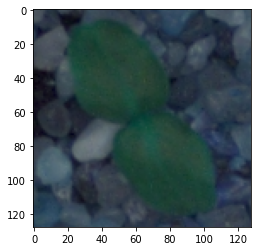

In [ ]:
#Image of resized to 128*128
plt.imshow(x_feature[1])

## Supervised Learning Algorithm

In [ ]:
#resizing the train image and save with one channel
from tqdm import tqdm
import cv2
x_sup_val = []
y_sup_val = []

i = 0 # initialisation

for f in tqdm(train_data.file):
     # f for format ,jpg
  train_img = cv2.imread(data_dir+'{}'.format(f),0)
  label = categorical_labels[i]
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols),interpolation=cv2.INTER_LINEAR) 
  x_sup_val.append(train_img_resize)
  y_sup_val.append(label)
  i += 1

100%|██████████| 4376/4376 [00:40<00:00, 107.66it/s]


In [ ]:
#Normalising th data and convert to float (one channel data)
x_sup_val = np.array(x_sup_val, np.float32) / 255.   # /= 255 for normalisation
print (x_sup_val.shape)

(4376, 128, 128)


In [ ]:
x_sup_val=x_sup_val.reshape(4376,-1)
x_sup_val.shape

(4376, 16384)

In [ ]:
#Split the dataset for supervised learning model
X_train_s1, X_test_s1, y_train_s1, y_test_s1=train_test_split(x_sup_val,y_sup_val,test_size=0.2,random_state=0)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, random_state=100,max_features=3)
rfc = rfc.fit(X_train_s1, y_train_s1)
rfc_test=rfc.predict(X_test_s1)
rfc_train=rfc.predict(X_train_s1)

rfc_acc=metrics.accuracy_score(y_test_s1, rfc_test)
#Accuracy score for Train and Test data
print("Train data accuracy for Random Forest Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_train_s1, rfc_train)*100))
print("Test data accuracy for Random Forest Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_test_s1, rfc_test)*100))

Train data accuracy for Random Forest Classifier: 80.57%
Test data accuracy for Random Forest Classifier: 0.46%


This clearly indicates that train data is overfitting and random forest classifier doesnt perform well

## Visualizing image with filters


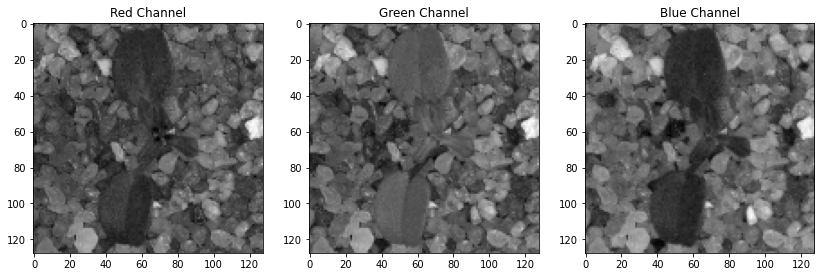

In [ ]:
Visualizing channel filter
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(x_feature[5][:,:,0],cmap='gray')

plt.subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(x_feature[5][:,:,1],cmap='gray')

plt.subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(x_feature[5][:,:,2],cmap='gray')

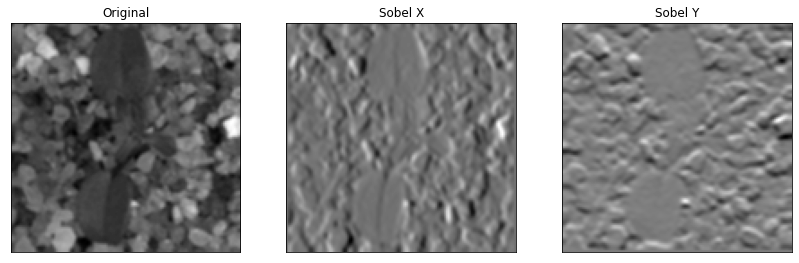

In [ ]:
# converting to gray scale
gray = cv2.cvtColor(x_feature[5], cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.figure(figsize=(14,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## NN Model

In [ ]:
#Normalising th data and convert to float
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normolisation
print (x_train_data.shape)

(4376, 128, 128, 3)


In [ ]:
# Normalization of the Image Data
x_test_data = np.array(x_test_feature, np.float32) / 255.   # /= 255 for normolisation
print (x_test_data.shape)

(794, 128, 128, 3)


In [ ]:
y_train_data = np.array(y_feature)
y_train_data.shape

(4376, 12)

In [ ]:
#Splitting train and validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (x_train.shape)
print (x_val.shape)

(3500, 128, 128, 3)
(876, 128, 128, 3)


In [ ]:
#Generating augmented images using image generator
datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                         width_shift_range=0.2,
                                                         height_shift_range=0.2,
                                                         zoom_range=[0.4,1.5],
                                                         horizontal_flip=True,
                                                         vertical_flip=True)

In [ ]:
datagen.fit(x_train)
print(datagen)

**NN model for plant seedling**

In [ ]:
#NN model for seedling data
nn_model=Sequential()
nn_model.add(Flatten(input_shape=(128,128,3)))
nn_model.add(Dense(units = 840, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units = 210, activation = 'relu'))
nn_model.add(Dense(units = 210, activation = 'relu'))
nn_model.add(Dropout(0.6))
nn_model.add(Dense(units = 105, activation = 'relu'))
nn_model.add(Dense(units = 17, activation = 'softmax'))
nn_model.summary()

In [ ]:
adam = Adam(lr=0.0001)
nn_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01)

In [ ]:
#fitting NN model
with tf.device('/device:GPU:0'):
  history = nn_model.fit(datagen.flow(x_train, y_train),
          epochs=300,
          steps_per_epoch= 100,  #Number of training images//batch_size
          validation_data=(x_val,y_val),
          validation_steps = 10, #Number of validation images//batch_size
          callbacks = [callback],
          verbose = 1)

**Convolution NN for plant seedling**

In [ ]:
tf.keras.backend.clear_session()
#initialising sequential model
model = Sequential()
#adding 1st convolution layer with 64 filter and imput shape 128 x 128x 3 with relu function
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
#normalising batch
model.add(BatchNormalization(axis=3))
#adding 2nd convolution layer with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#maxpooling
model.add(MaxPooling2D((2, 2)))
#normalising batch
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
#adding 3rd convolution layer with 32 filters
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#normalising batch
model.add(BatchNormalization(axis=3))
#adding 4th convolution layer with 32 filters
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#maxpooling
model.add(MaxPooling2D((2, 2)))
#normalising batch
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
# Global Max pooling layer
model.add(GlobalMaxPool2D())

#flattening layer
model.add(Flatten())
#Dense layer
#adding 1 st dense layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#adding 2 nd dense layer
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#adding dense layer with same output as no of cateogries, in our case 12 category with softmax function
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        1

In [ ]:
#compiling CNN model
learning_rate=0.001
epochs=50
opt = Adam(lr=learning_rate, decay=learning_rate / epochs)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting CNN model
with tf.device('/device:GPU:0'):
  history = model.fit(datagen.flow(x_train, y_train),
          epochs=300,
          steps_per_epoch= 100,  #Number of training images//batch_size
          validation_data=(x_val,y_val),
          validation_steps = 10, #Number of validation images//batch_size
          #callbacks = [model_checkpoint],
          verbose = 1)

Epoch 1/300
100/100 [==============================] - 15s 154ms/step - loss: 1.2295 - accuracy: 0.5956 - val_loss: 1.0610 - val_accuracy: 0.6324
Epoch 2/300
100/100 [==============================] - 13s 128ms/step - loss: 1.2093 - accuracy: 0.6091 - val_loss: 1.3701 - val_accuracy: 0.5502
Epoch 3/300
100/100 [==============================] - 13s 129ms/step - loss: 1.1538 - accuracy: 0.6094 - val_loss: 1.2018 - val_accuracy: 0.5845
Epoch 4/300
100/100 [==============================] - 13s 128ms/step - loss: 1.1464 - accuracy: 0.6220 - val_loss: 1.2347 - val_accuracy: 0.5833
Epoch 5/300
100/100 [==============================] - 13s 129ms/step - loss: 1.1372 - accuracy: 0.6340 - val_loss: 1.8086 - val_accuracy: 0.4932
Epoch 6/300
100/100 [==============================] - 13s 127ms/step - loss: 1.0970 - accuracy: 0.6469 - val_loss: 1.4324 - val_accuracy: 0.4783
Epoch 7/300
100/100 [==============================] - 13s 128ms/step - loss: 1.0504 - accuracy: 0.6594 - val_loss: 1.3560 -

In [ ]:
#saving model and weight of cnn in plant seedling dataset
model.save('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/cnn_model_plant.h5')
model.save_weights('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/cnn_model_plant_weights.h5')

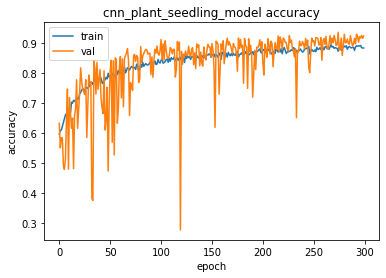

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn_plant_seedling_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

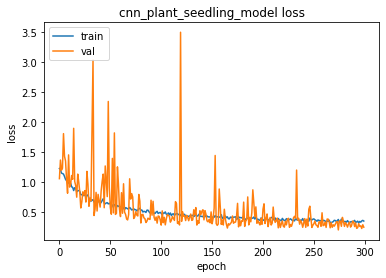

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn_plant_seedling_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

CNN model for plant seedling achieved 88% in test data and 87% in train data

**Predicting Test data**

In [ ]:
predictions = model.predict(x_test_data)

In [ ]:
#encoding dependent variable
encoder = LabelEncoder()
encoder.fit(plant_category)
preds = np.argmax(predictions, axis=1)
pred_cat=encoder.classes_[preds]

In [ ]:
Final prediction
final_predictions = {'file':test_data.filename, 'species':pred_cat}
final_predictions = pd.DataFrame(final_predictions)
final_prediction.head(_)
#final_predictions.to_csv(data_dir+"/cnn_model_submission.csv", index=False)

## **Tranfer Learning Model- seedling dataset**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(data_dir+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

In [ ]:
X=base_model.predict(x_train_data)#predicting data with the  vgg weights

In [ ]:
X.shape

(4750, 512)

In [ ]:
#preprocessing the X features to VGG input variable format 
X_arr = []

for f in tqdm(train_data.file):
    X_arr.append(base_model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(data_dir+'{}'.format(f), target_size=[128,128])), axis=0)))[0])
X = pd.DataFrame(X_arr)


100%|██████████| 4750/4750 [04:40<00:00, 16.92it/s]


In [ ]:
X.shape

(4750, 512)

In [ ]:
categorical_labels.shape

(4750, 12)

In [ ]:
## After VGG net prepocessing, applying to Dense nn model and obtaining predict value
from tensorflow.keras.layers import Activation
t_model = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    Dense(256, input_shape=(512,)),
    Activation('relu'),
    Dense(12),
    Activation('softmax'),
])

t_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train = X
y_train = np.asarray(y_feature)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_tr, x_val_tr, y_train_tr, y_val_tr = train_test_split(X, categorical_labels, test_size=0.2, random_state=2)

In [ ]:
history=t_model.fit(x_train_tr,y_train_tr,validation_data=(x_val_tr,y_val_tr), epochs=70, batch_size=10, verbose=True)

Epoch 1/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9932 - val_loss: 0.2481 - val_accuracy: 0.9505
Epoch 2/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9884 - val_loss: 0.1697 - val_accuracy: 0.9621
Epoch 3/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9942 - val_loss: 0.1874 - val_accuracy: 0.9705
Epoch 4/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9955 - val_loss: 0.1230 - val_accuracy: 0.9779
Epoch 5/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9897 - val_loss: 0.2816 - val_accuracy: 0.9526
Epoch 6/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9892 - val_loss: 0.2216 - val_accuracy: 0.9674
Epoch 7/70
380/380 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9937 - val_loss: 0.2052 - val_accuracy: 0.9653
Epoch 

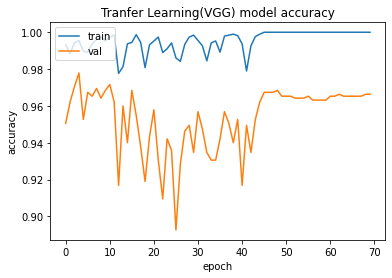

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Tranfer Learning(VGG) model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

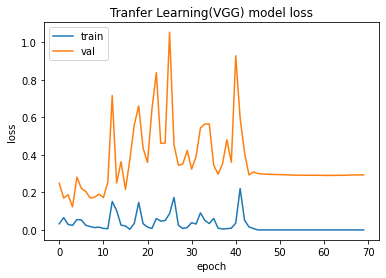

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Tranfer Learning(VGG) model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Conclusion for plant seedling dataset**

* Dataset contains 12 categories of plant seedling (ie: 12 labels to predict)
* All the images are resized 128*128 and saved it in the train and test variable
* In Supervised Algorithm, Random forest classifier is used 
  * Initially image converted to greyscale and reshaped according to supervised algorithm input
  *Model overfitted in training data around 80% but test performance was around 46%
* Fully connected neural network
We could see transfer learning VGG net achieved the best validation score of 96.63% 

## **Flower Dataset**

In [ ]:
import tarfile
import urllib
import os
def data_download(filename, source_url, work_dir):
    if not os.path.exists(work_dir):
        os.mkdir(work_dir)
    filepath=os.path.join(work_dir,filename)
    if not os.path.exists(filepath):
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename,filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_dir)
    return filepath

In [ ]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

In [ ]:
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

In [ ]:
data_download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  17category-flowers-py


'17category-flowers-py/17flowers.tgz'

In [ ]:
os.listdir("/content/17category-flowers-py/")

['jpg', '17flowers.tgz']

In [ ]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

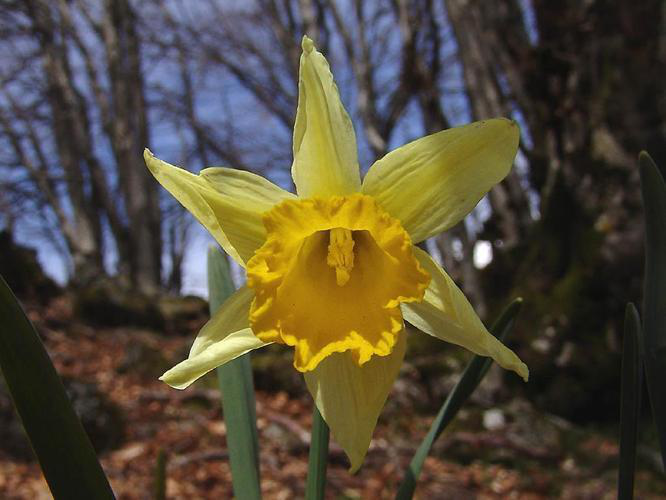

In [ ]:
from PIL import Image,ImageFilter#show one example of image
Image.open("/content/17category-flowers-py/jpg/image_0002.jpg")

In [ ]:
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=0
for i in range(1, total): 
    fname="/content/17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [ ]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
print(labels.shape)
print(images.shape)

(1360, 1)
(1360, 224, 224, 3)


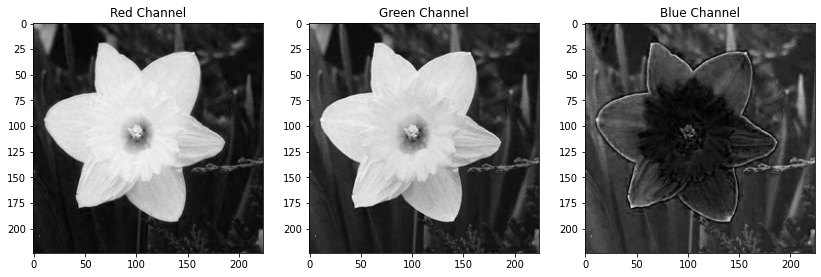

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(images[5][:,:,0],cmap='gray')

plt.subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(images[5][:,:,1],cmap='gray')

plt.subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(images[5][:,:,2],cmap='gray')

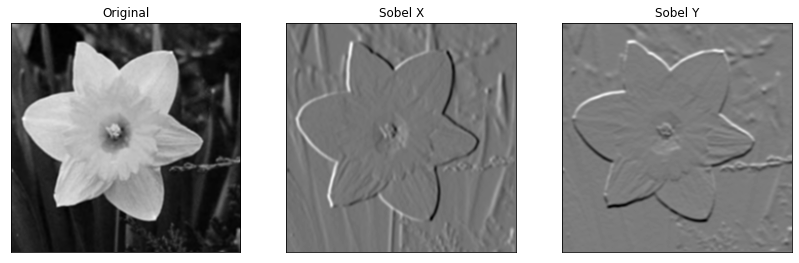

In [ ]:

# converting to gray scale
gray = cv2.cvtColor(images[5], cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.figure(figsize=(14,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
#Loading image with one channel
from tqdm import tqdm
import cv2
x_ch1 = []
y_ch1 = []

j=0 # initialisation
for i in range(1, total): # f for format ,jpg
    fname="/content/17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    train_img = cv2.imread(fpath,0)
    train_img_resize = cv2.resize(train_img, (128, 128)) 
    x_ch1.append(train_img_resize)
    y_ch1.append(j)
    if i%80==0: j+=1

In [ ]:
x_ch1 = np.asarray(x_ch1) # all of the images are converted to np array of (1360,224,224,1)
y_ch1 = np.asarray(y_ch1).reshape(1360,1) # labels are also converted to (1360,1)
print(x_ch1.shape)
print(y_ch1.shape)

(1360, 128, 128)
(1360, 1)


In [ ]:
#reshaping data for supervised algorithm
x_sup=x_ch1.reshape(1360,-1)
x_sup.shape

(1360, 16384)

In [ ]:
#Split the dataset for supervised learning model
X_train_s, X_test_s, y_train_s, y_test_s=train_test_split(x_sup,labels,test_size=0.2,random_state=0)

In [ ]:
#normalizing data
X_train_s=X_train_s/255
X_test_s=X_test_s/255

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
scores=[]

for k in range(1,10):
    KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    KNN.fit(X_train_s,y_train_s)
    knn_test=KNN.predict(X_test_s)
    scores.append(KNN.score(X_test_s,y_test_s))

Text(0.5, 1.0, 'Accuracy plot for different K value')

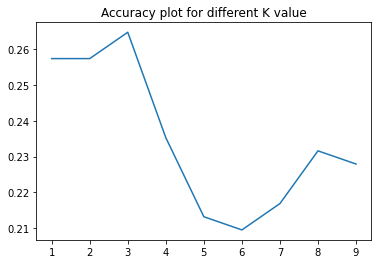

In [ ]:
plt.plot(range(1,10),scores)
plt.title("Accuracy plot for different K value")

In [ ]:
#K Neighbor Classifier
KNN=KNeighborsClassifier(n_neighbors=6,weights="distance")
KNN.fit(X_train_s,y_train_s)
knn_test=KNN.predict(X_test_s)
knn_acc=KNN.score(X_test_s,y_test_s)
print("Accuracy for test data:{}".format(KNN.score(X_test_s,y_test_s)))
print("Accuracy for train data:{}".format(KNN.score(X_train_s,y_train_s)))

Accuracy for test data:0.20955882352941177
Accuracy for train data:1.0


In [ ]:
print(metrics.classification_report(y_test_s, knn_test))

              precision    recall  f1-score   support

           0       0.50      0.22      0.30        23
           1       1.00      0.09      0.17        11
           2       0.25      0.08      0.12        13
           3       0.16      0.39      0.22        18
           4       0.00      0.00      0.00        10
           5       0.32      0.57      0.41        21
           6       0.29      0.09      0.13        23
           7       0.12      0.38      0.19         8
           8       0.09      0.20      0.12        15
           9       0.60      0.20      0.30        15
          10       0.50      0.06      0.11        16
          11       0.80      0.29      0.42        14
          12       0.22      0.27      0.24        22
          13       0.00      0.00      0.00        11
          14       0.11      0.35      0.17        17
          15       0.20      0.07      0.10        15
          16       0.67      0.10      0.17        20

    accuracy              

** NN Models - Flower Dataset**

In [ ]:
#Split the dataset-NN models
X_train, X_test, y_train, y_test=train_test_split(images,labels,test_size=0.2,random_state=0)

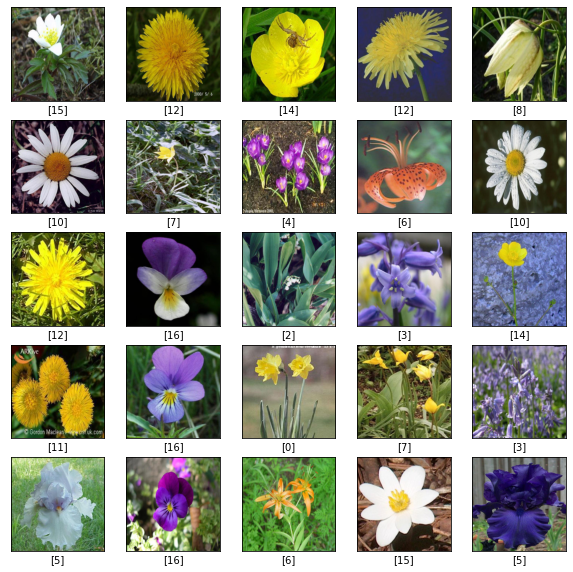

In [ ]:
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i]/255,cmap='gray')
    plt.xlabel(y_train[i])

In [ ]:
# dividing images into train and test folders by creating images from arrays

def create_images(data, labels, folder):
    dirname=folder
    
    if not os.path.exists(dirname): #check if the folder exists; if not make dir
        os.mkdir(dirname)
    n=0
    
    for i in data:
        label_n=labels[n]
        subfolder = folder + "/" + str(label_n) 
        if not os.path.exists(subfolder): # create subfolders with categories
            os.mkdir(subfolder)  
        filepath =  subfolder + "/" + str(n)+ ".jpg"
        cv2.imwrite(filepath, data[n]) #save image to corresponding subfolders
        n+=1

In [ ]:
create_images(X_train, y_train, 'train') #save image to corresponding subfolders
create_images(X_test, y_test, 'test')

In [ ]:
train_dir =os.path.realpath('train')
validation_dir = os.path.realpath('test')
image_size = 224

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


**Neural network model**

In [ ]:
nn_model=Sequential()
nn_model.add(Flatten(input_shape=(224,224,3)))
nn_model.add(Dense(units = 840, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units = 210, activation = 'relu'))
nn_model.add(Dense(units = 210, activation = 'relu'))
nn_model.add(Dropout(0.6))
nn_model.add(Dense(units = 105, activation = 'relu'))
nn_model.add(Dense(units = 17, activation = 'softmax'))
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 840)               126444360 
_________________________________________________________________
dropout (Dropout)            (None, 840)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 210)               176610    
_________________________________________________________________
dense_17 (Dense)             (None, 210)               44310     
_________________________________________________________________
dropout_1 (Dropout)          (None, 210)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 105)              

In [ ]:
adam = Adam(lr=0.0001)
nn_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#with tf.device('/device:GPU:0'): # NN model from scratch fit
history = nn_model.fit_generator(
train_generator,
steps_per_epoch=train_generator.samples/train_generator.batch_size ,
epochs=100,
validation_data=validation_generator,
validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/100
10/10 [==============================] - 26s 2s/step - loss: 4.6204 - accuracy: 0.0632 - val_loss: 2.8980 - val_accuracy: 0.0993
Epoch 2/100
10/10 [==============================] - 25s 2s/step - loss: 3.9336 - accuracy: 0.0580 - val_loss: 2.8201 - val_accuracy: 0.0699
Epoch 3/100
10/10 [==============================] - 25s 2s/step - loss: 3.4180 - accuracy: 0.0850 - val_loss: 2.8195 - val_accuracy: 0.1360
Epoch 4/100
10/10 [==============================] - 25s 2s/step - loss: 3.0722 - accuracy: 0.0488 - val_loss: 2.8193 - val_accuracy: 0.0625
Epoch 5/100
10/10 [==============================] - 25s 2s/step - loss: 2.9766 - accuracy: 0.0653 - val_loss: 2.7755 - val_accuracy: 0.1176
Epoch 6/100
10/10 [==============================] - 25s 2s/step - loss: 2.8692 - accuracy: 0.0894 - val_loss: 2.7926 - val_accuracy: 0.1103
Epoch 7/100
10/10 [==============================] - 25s 2s/step - loss: 2.9825 - accuracy: 0.0739 - val_loss: 2.7962 - val_accuracy: 0.1324
Epoch 8/100
1

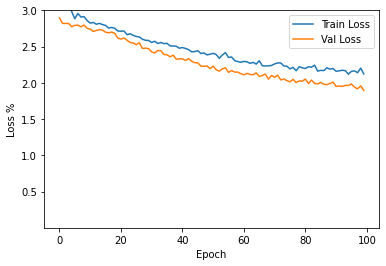

In [ ]:
def plot_history_loss(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss %')
    plt.plot(history.epoch, np.array(history.history['loss']),
    label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
    label = 'Val Loss')
    plt.legend()
    plt.ylim([0.001, 3])
plot_history_loss(history)

**CNN Model**

In [ ]:
# CNN from Scratch

cnn_model=Sequential()

cnn_model.add(Conv2D(112,(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(112,(3,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(112,(3,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
#cnn_model.add(Dense(units = 3375, activation = 'relu'))
#cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 840, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 210, activation = 'relu'))
cnn_model.add(Dense(units = 17, activation = 'softmax'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 112)     3136      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 112)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 112)     113008    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 112)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 112)       113008    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 112)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87808)            

In [ ]:
adam = Adam(lr=0.0001)
cnn_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'): # CNN model from scratch fit
  history = cnn_model.fit_generator(
  train_generator,
  steps_per_epoch=train_generator.samples/train_generator.batch_size ,
  epochs=200,
  validation_data=validation_generator,
  validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/200
10/10 [==============================] - 14s 1s/step - loss: 0.9141 - accuracy: 0.7013 - val_loss: 1.1004 - val_accuracy: 0.6544
Epoch 2/200
10/10 [==============================] - 14s 1s/step - loss: 0.8848 - accuracy: 0.6949 - val_loss: 1.0817 - val_accuracy: 0.6654
Epoch 3/200
10/10 [==============================] - 14s 1s/step - loss: 0.9015 - accuracy: 0.6921 - val_loss: 1.1214 - val_accuracy: 0.6360
Epoch 4/200
10/10 [==============================] - 14s 1s/step - loss: 0.8284 - accuracy: 0.7362 - val_loss: 1.0833 - val_accuracy: 0.6397
Epoch 5/200
10/10 [==============================] - 14s 1s/step - loss: 0.8216 - accuracy: 0.7233 - val_loss: 1.1241 - val_accuracy: 0.6581
Epoch 6/200
10/10 [==============================] - 14s 1s/step - loss: 0.8901 - accuracy: 0.6866 - val_loss: 1.1159 - val_accuracy: 0.6544
Epoch 7/200
10/10 [==============================] - 14s 1s/step - loss: 0.8044 - accuracy: 0.7371 - val_loss: 1.0909 - val_accuracy: 0.6618
Epoch 8/200
1

In [ ]:
#saving model and weight of cnn in flower seedling dataset
cnn_model.save('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/cnn_model_flower.h5')
cnn_model.save_weights('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/cnn_model_flower_weights.h5')

In [ ]:
# plot the accuracy history
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy %')
    plt.plot(history.epoch, np.array(history.history['acc']),
    label='Train Accuracy')
    plt.plot(history.epoch, np.array(history.history['val_acc']),
    label = 'Val Accuracy')
    plt.legend()
    plt.ylim([0.5, 1])
plot_history(history)

In [ ]:
def plot_history_loss(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss %')
    plt.plot(history.epoch, np.array(history.history['loss']),
    label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
    label = 'Val Loss')
    plt.legend()
    plt.ylim([0.001, 3])
plot_history_loss(history)

Transfer Learning Model for Flower Dataset

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(data_dir+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

In [ ]:
X=base_model.predict(images)

In [ ]:
flower_category=os.listdir("/content/train")
flower_category

['[12]',
 '[3]',
 '[6]',
 '[11]',
 '[2]',
 '[9]',
 '[16]',
 '[10]',
 '[8]',
 '[14]',
 '[5]',
 '[15]',
 '[13]',
 '[0]',
 '[7]',
 '[4]',
 '[1]']

In [ ]:
train_data=[]
if not train_data:
  for category_id, category in enumerate(flower_category):
    for file in os.listdir(os.path.join("/content/train",category)):
      train_data.append(['train/{}/{}'.format(category,file),file,category_id,category])
  train_data = pd.DataFrame(train_data, columns=['file','filename', 'category_id', 'category'])
  train_data.shape
else:
  print("train data already extracted")

In [ ]:
train_data.head()

,file,filename,category_id,category
0,train/[12]/356.jpg,356.jpg,0,[12]
1,train/[12]/739.jpg,739.jpg,0,[12]
2,train/[12]/3.jpg,3.jpg,0,[12]
3,train/[12]/389.jpg,389.jpg,0,[12]
4,train/[12]/407.jpg,407.jpg,0,[12]


In [ ]:
from tensorflow.keras.preprocessing import image
X_arr = []
path="/content/"
for f in train_data.file:
    X_arr.append(base_model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(path+f, target_size=[128,128])), axis=0)))[0])
X = pd.DataFrame(X_arr)

In [ ]:
from tensorflow.keras.layers import Activation
model = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    Dense(256, input_shape=(512,)),
    Activation('relu'),
    Dense(17),
    Activation('softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
enc=LabelEncoder()
y_feature=enc.fit_transform(y_train)
y_feature=np_utils.to_categorical(y_feature,num_classes=17)
X.shape

(1088, 512)

In [ ]:
y_t = y_feature

(1088, 17)

In [ ]:
model.fit(X,np.asarray(y_t), epochs=100, batch_size=100, verbose=True)

Epoch 1/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0775 - accuracy: 0.9540
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0733 - accuracy: 0.9494
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0786 - accuracy: 0.9540
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0785 - accuracy: 0.9531
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0698 - accuracy: 0.9586
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0805 - accuracy: 0.9540
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0765 - accuracy: 0.9550
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0709 - accuracy: 0.9531
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0741 - accuracy: 0.9596
Epoch 10/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0804 - accuracy: 0.9504

Transfer Learning with VGG achieved the best train accuracy of 95%

**Prediction file GUI**

In [ ]:
pred_img=cv2.imread("/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Prediction - Flower.jpg")

In [ ]:
predict_image = cv2.resize(pred_img,(224,224))

In [ ]:
print(predict_image.shape)

(224, 224, 3)


In [ ]:

# If not compatible expand the dimensions to match with the Keras Input
predict_image = np.expand_dims(predict_image, axis = 0)
predict_image =predict_image*1/255.0
#Check the size of the Image array again
print('After expand_dims: '+ str(predict_image.shape))

After expand_dims: (1, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

pretrained_model = load_model('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/cnn_model_flower.h5')
pretrained_model.load_weights('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/cnn_model_flower_weights.h5')

In [ ]:
#Predict the result of the test image
result = pretrained_model.predict(predict_image)

# Check the indices Image Data Generator has allotted to each folder
classes_dict = train_generator.class_indices
print(classes_dict)

# Creating a list of classes in test set for showing the result as the folder name
prediction_class = []
for class_name,index in classes_dict.items():
  prediction_class.append(class_name)
  
print(result)

# Index of the class with maximum probability
predicted_index = np.argmax(result)
print(predicted_index)
# Print the name of the class
print(prediction_class[predicted_index])

{'[0]': 0, '[10]': 1, '[11]': 2, '[12]': 3, '[13]': 4, '[14]': 5, '[15]': 6, '[16]': 7, '[1]': 8, '[2]': 9, '[3]': 10, '[4]': 11, '[5]': 12, '[6]': 13, '[7]': 14, '[8]': 15, '[9]': 16}
[[7.4846275e-12 9.9999988e-01 4.1435073e-16 1.1532089e-21 3.9669957e-24
  8.1916747e-16 6.0005476e-08 6.4193260e-09 1.1790895e-13 1.4447360e-17
  6.3118694e-19 2.8676930e-09 3.1426199e-09 6.5532019e-18 1.9264459e-17
  1.0908076e-14 4.9924744e-25]]
1
[10]
